In [9]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import os

In [3]:
!pip install kagglehub


In [18]:
path = "/kaggle/input/india-air-quality-data"
files = os.listdir(path)
print("Files: ",files)
for f in files:
  if ".csv" in f:
    csv_file = f
    break

df = pd.read_csv(path + "/" + csv_file , encoding = 'latin1')
print(df.head())

Files:  ['data.csv']
  stn_code       sampling_date           state   location agency  \
0    150.0  February - M021990  Andhra Pradesh  Hyderabad    NaN   
1    151.0  February - M021990  Andhra Pradesh  Hyderabad    NaN   
2    152.0  February - M021990  Andhra Pradesh  Hyderabad    NaN   
3    150.0     March - M031990  Andhra Pradesh  Hyderabad    NaN   
4    151.0     March - M031990  Andhra Pradesh  Hyderabad    NaN   

                                 type  so2   no2  rspm  spm  \
0  Residential, Rural and other Areas  4.8  17.4   NaN  NaN   
1                     Industrial Area  3.1   7.0   NaN  NaN   
2  Residential, Rural and other Areas  6.2  28.5   NaN  NaN   
3  Residential, Rural and other Areas  6.3  14.7   NaN  NaN   
4                     Industrial Area  4.7   7.5   NaN  NaN   

  location_monitoring_station  pm2_5        date  
0                         NaN    NaN  1990-02-01  
1                         NaN    NaN  1990-02-01  
2                         NaN    NaN  

/tmp/ipython-input-3671736021.py:9: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path + "/" + csv_file , encoding = 'latin1')


In [28]:
print(df.columns)

Index(['stn_code', 'sampling_date', 'state', 'location', 'agency', 'type',
       'so2', 'no2', 'rspm', 'spm', 'location_monitoring_station', 'pm2_5',
       'date'],
      dtype='object')


In [29]:
x = df["no2"].dropna().values

In [31]:
z = x + 0.5 * np.sin(0.3 * x)
z = torch.tensor(z, dtype = torch.float32).view(-1, 1)
G = nn.Sequential(nn.Linear(5,12),nn.ReLU(),nn.Linear(12,1))
D = nn.Sequential(nn.Linear(1,12),nn.LeakyReLU(0.2),nn.Linear(12,1),nn.Sigmoid())

In [32]:
loss = nn.BCELoss()
go = optim.Adam(G.parameters(),0.001)
do = optim.Adam(D.parameters(),0.001)


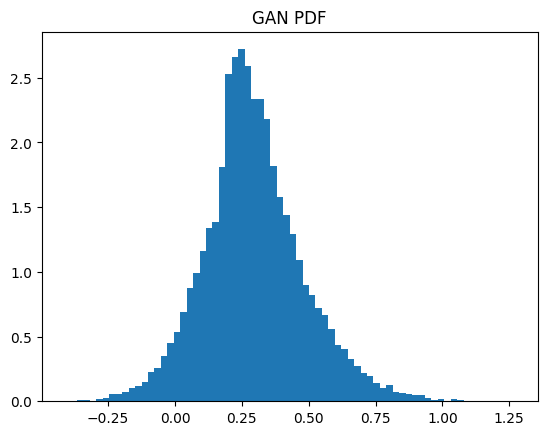

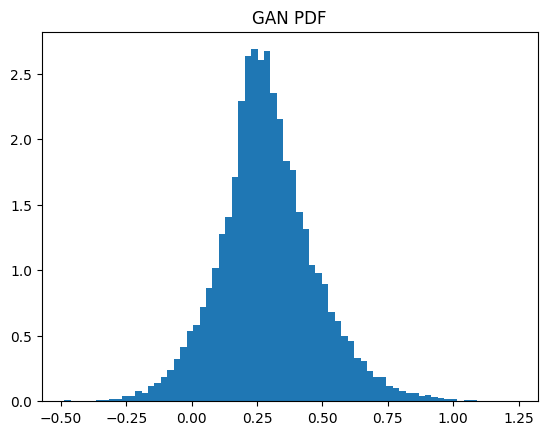

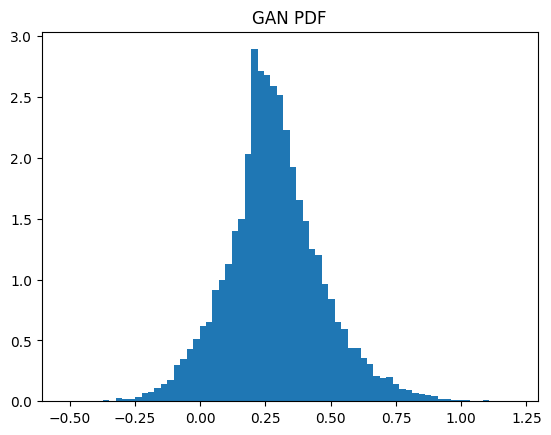

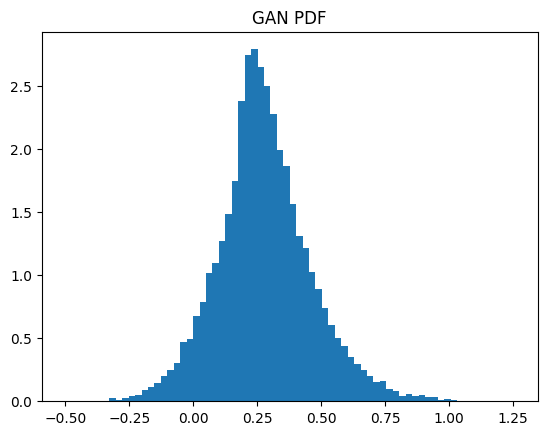

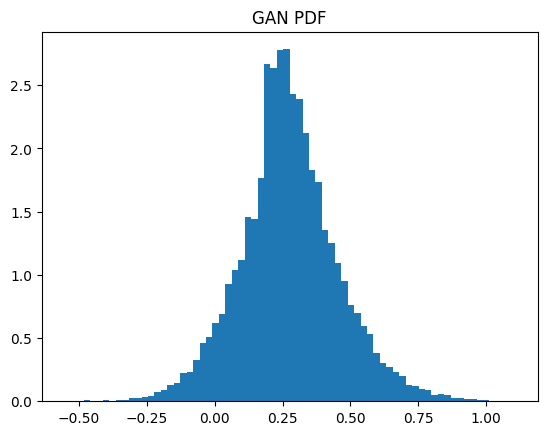

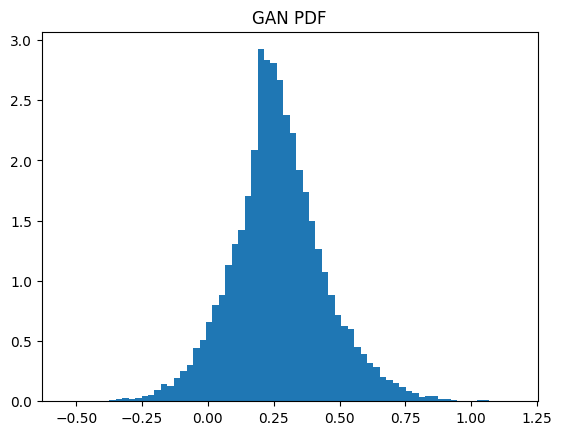

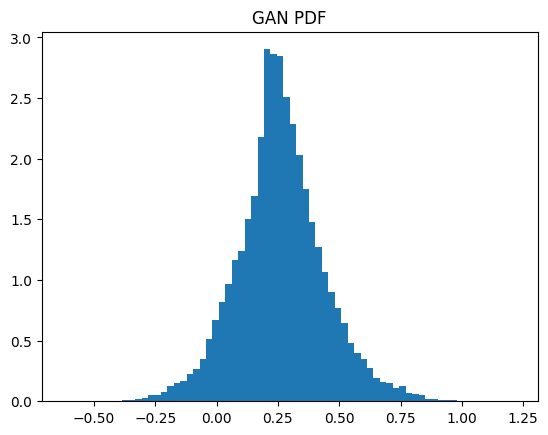

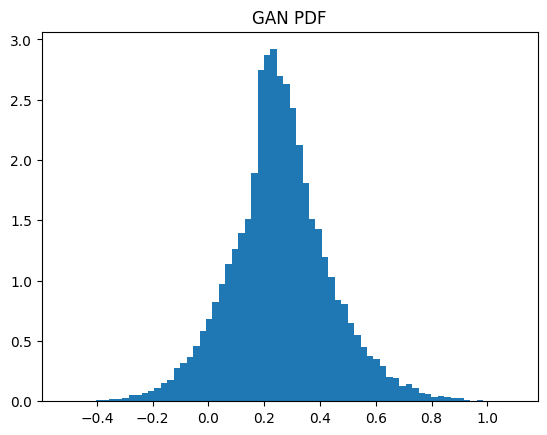

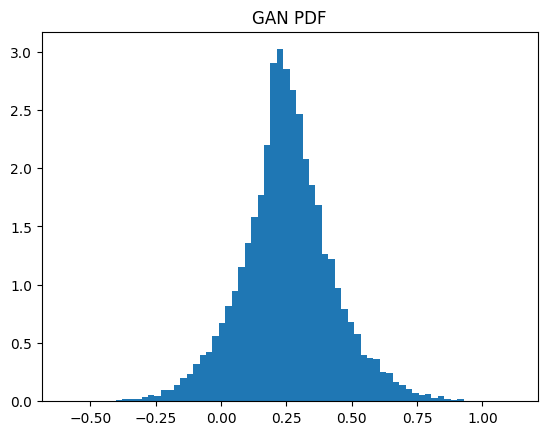

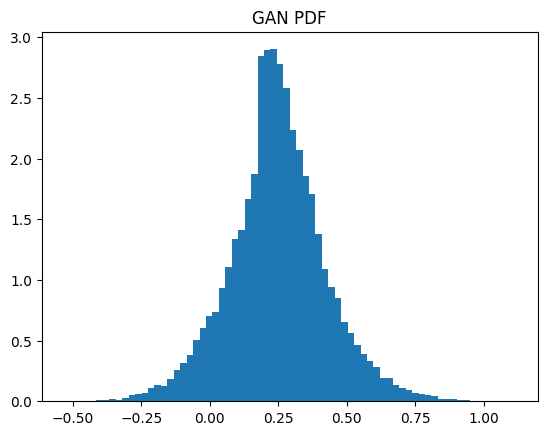

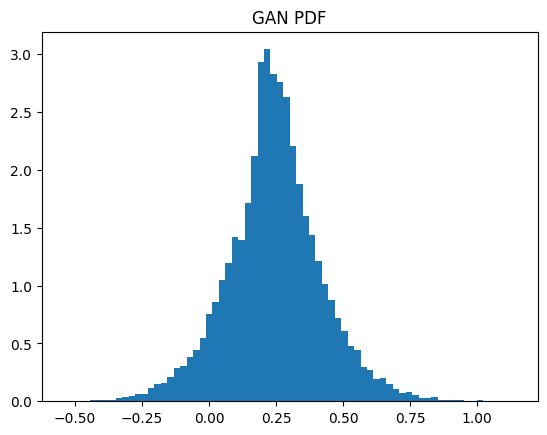

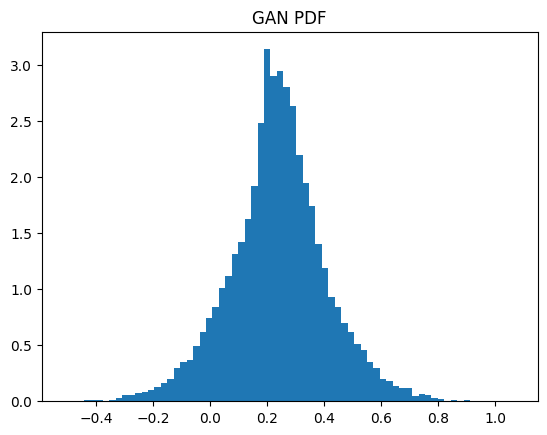

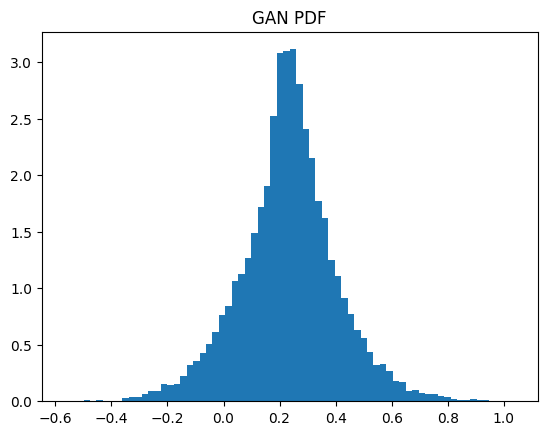

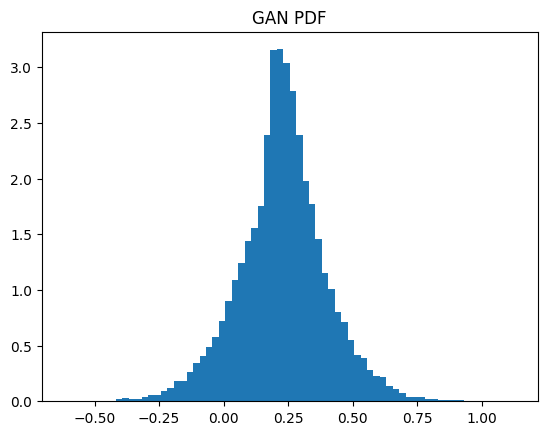

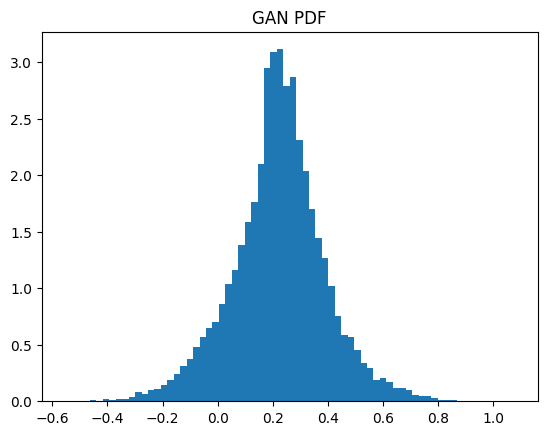

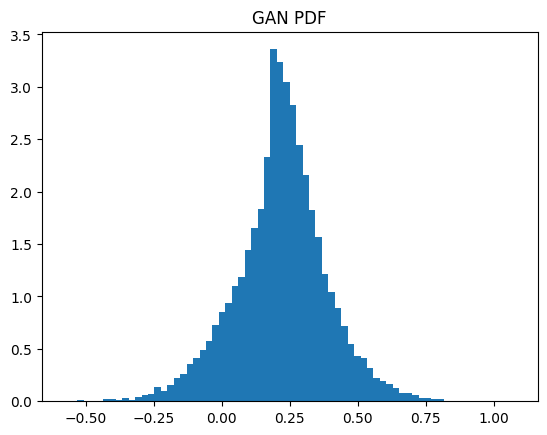

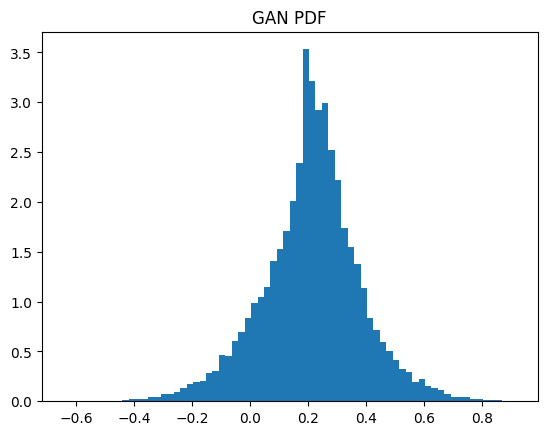

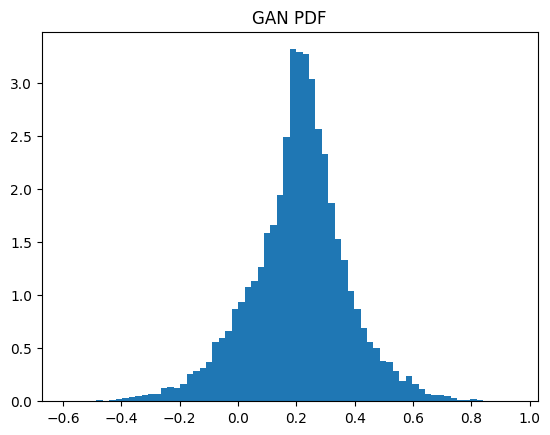

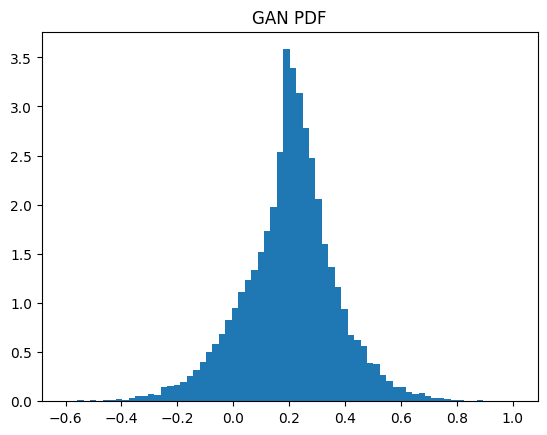

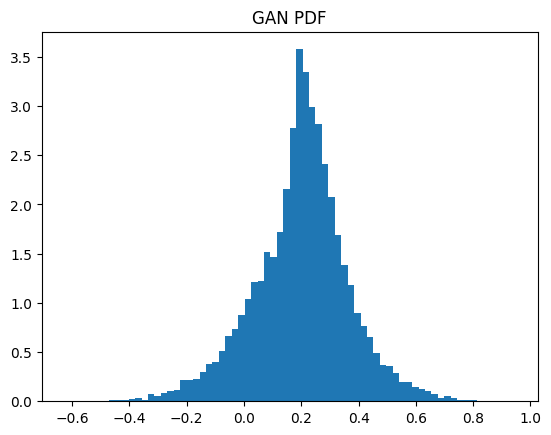

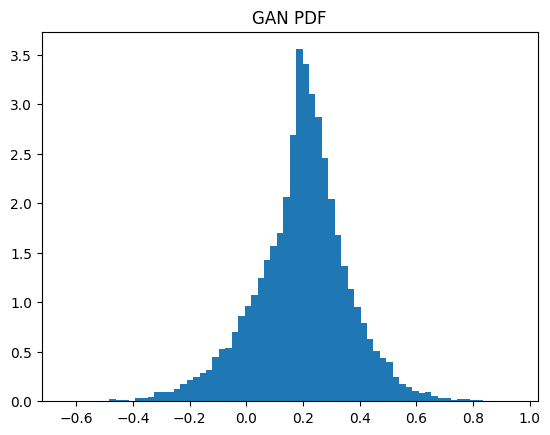

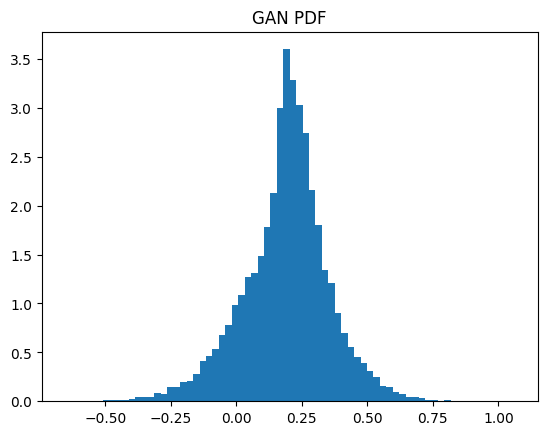

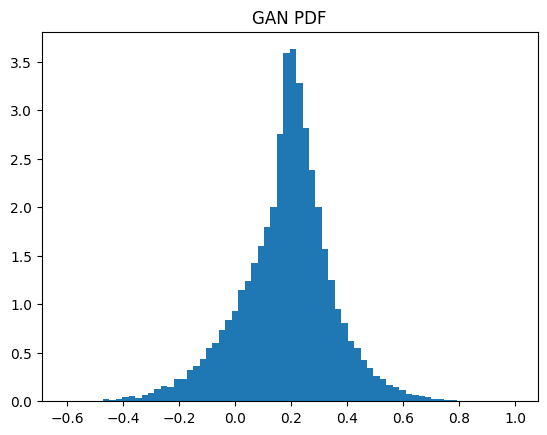

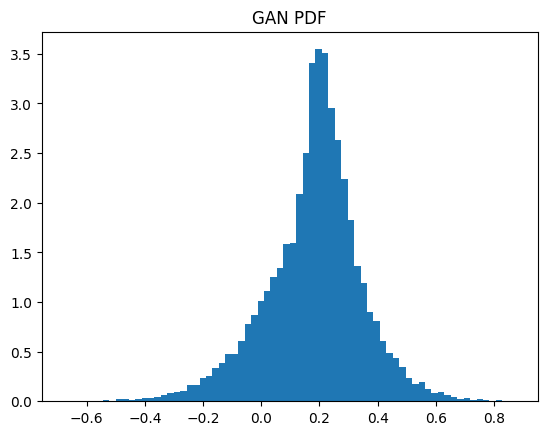

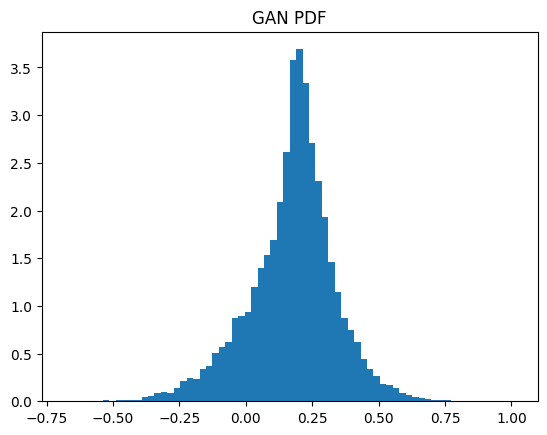

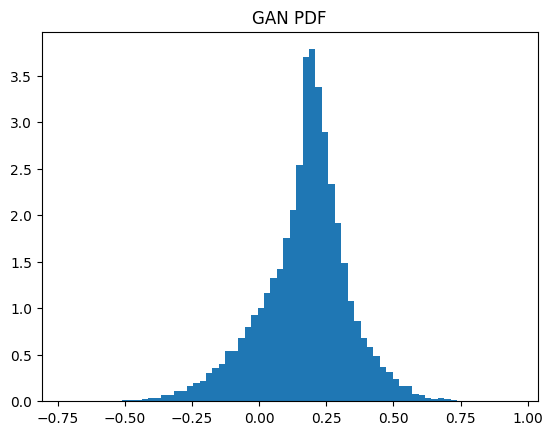

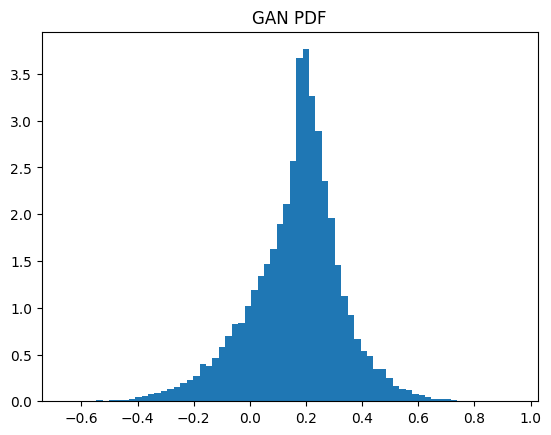

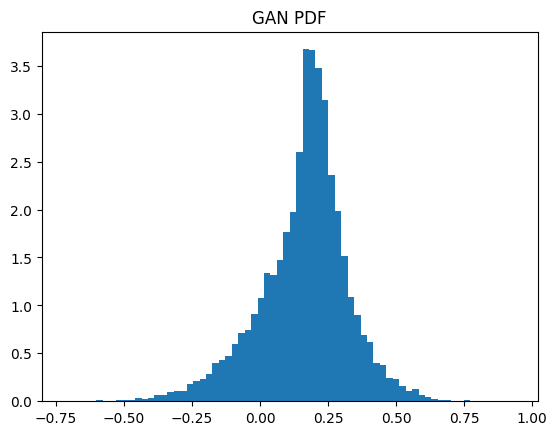

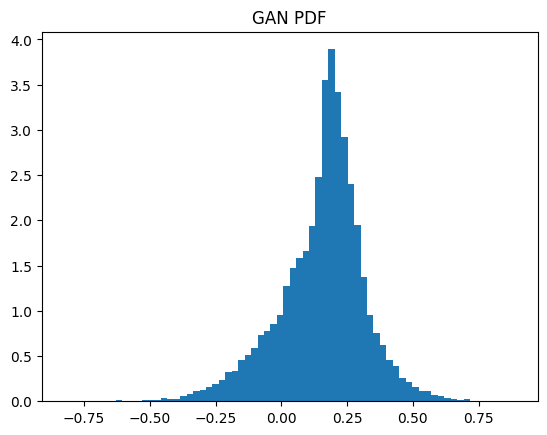

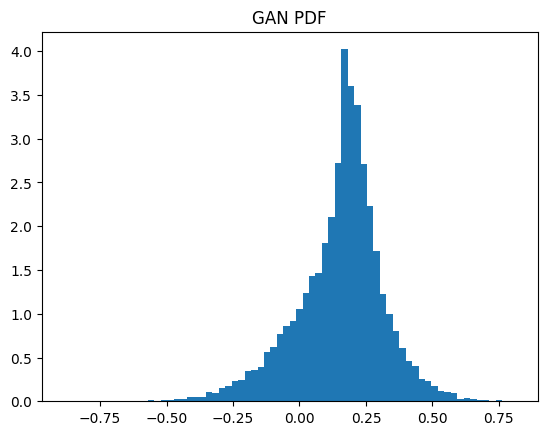

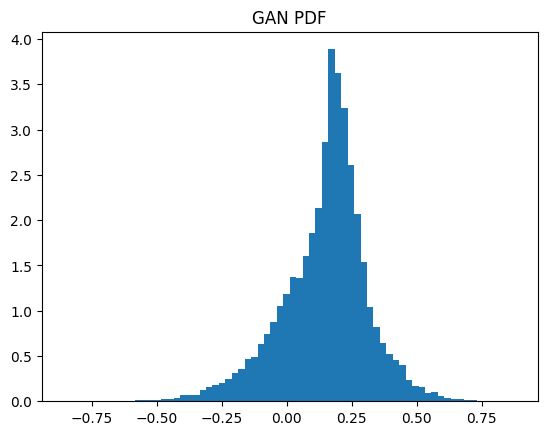

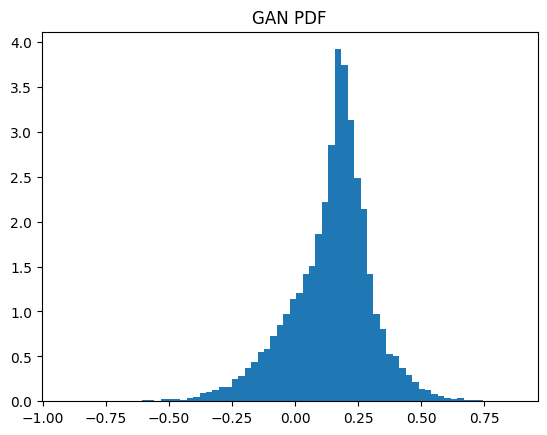

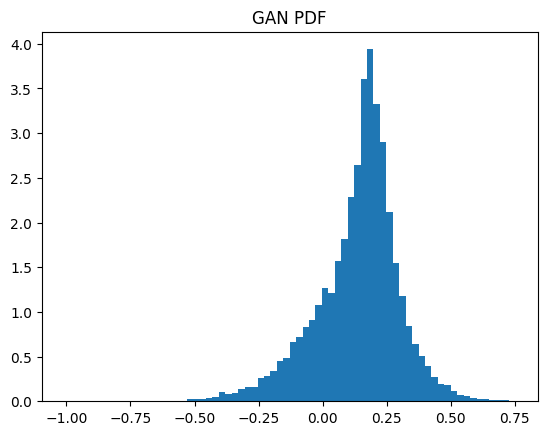

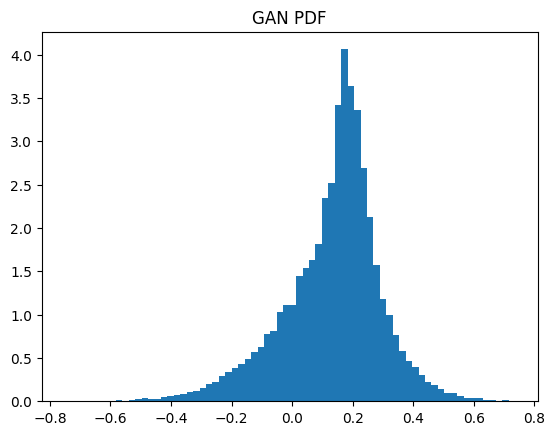

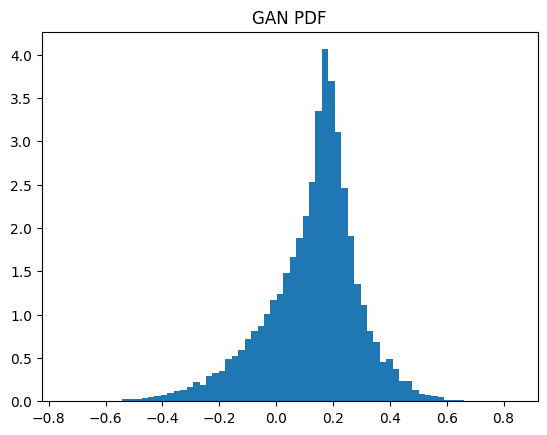

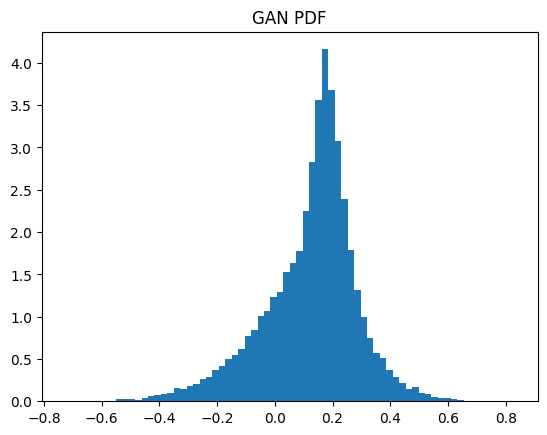

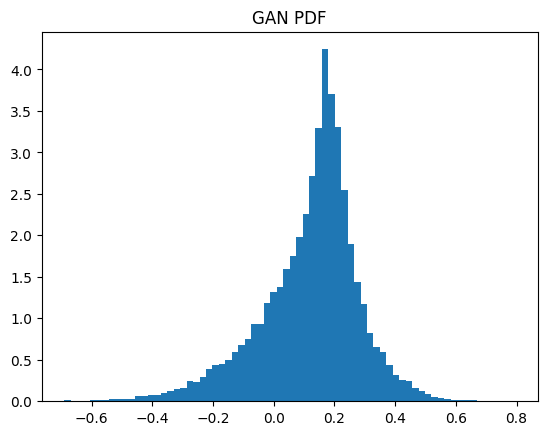

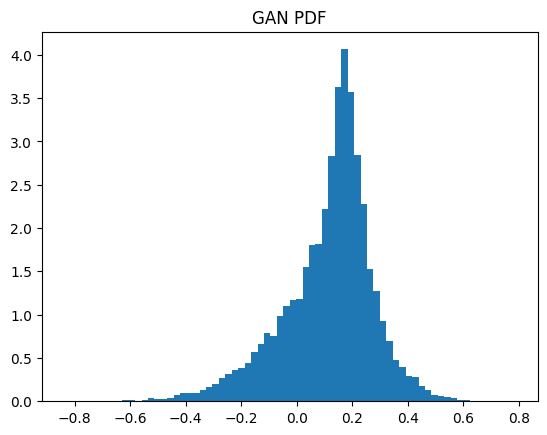

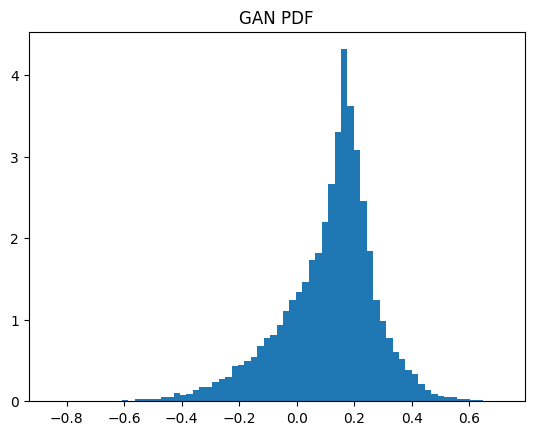

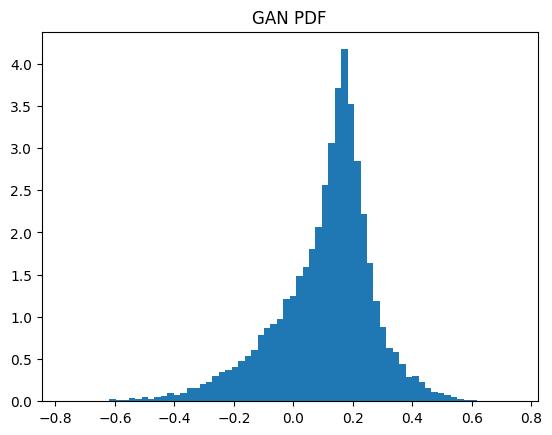

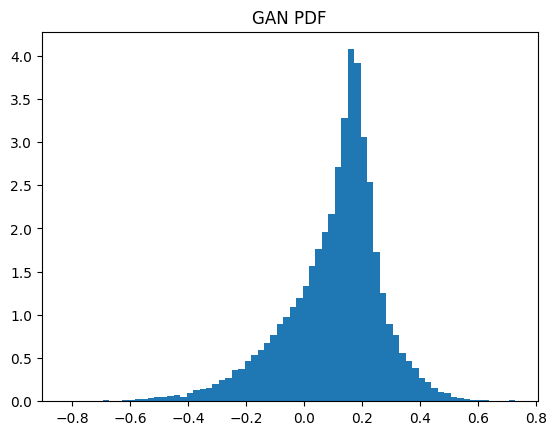

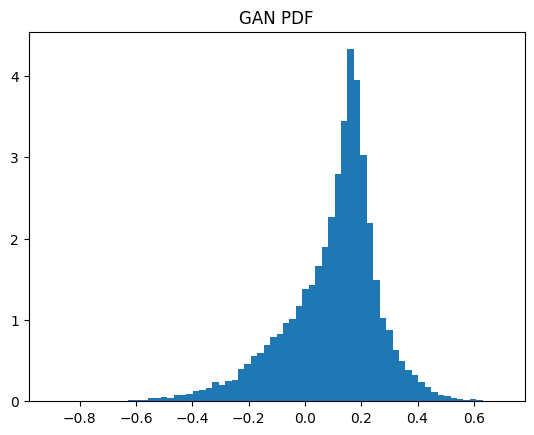

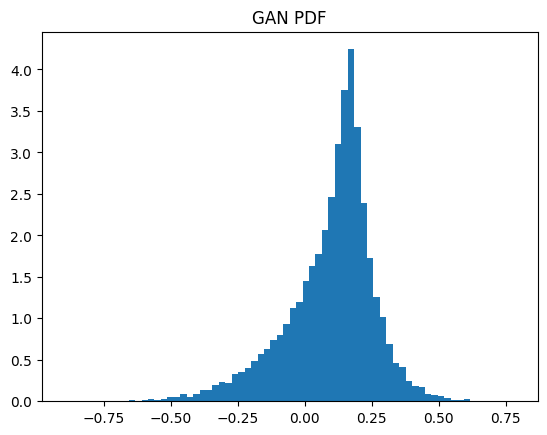

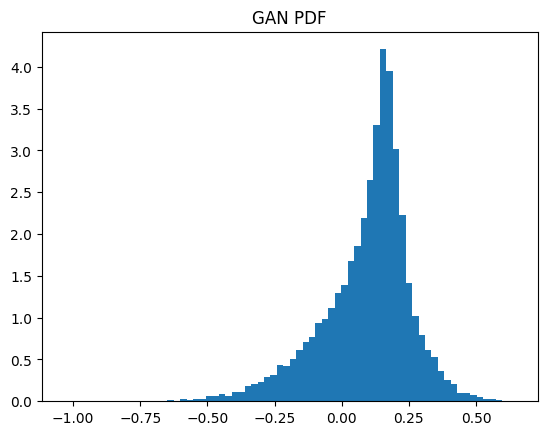

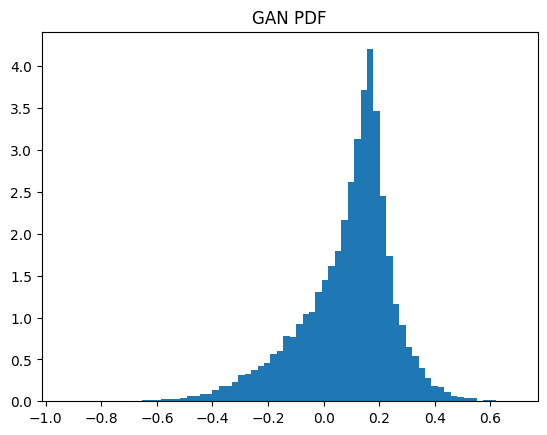

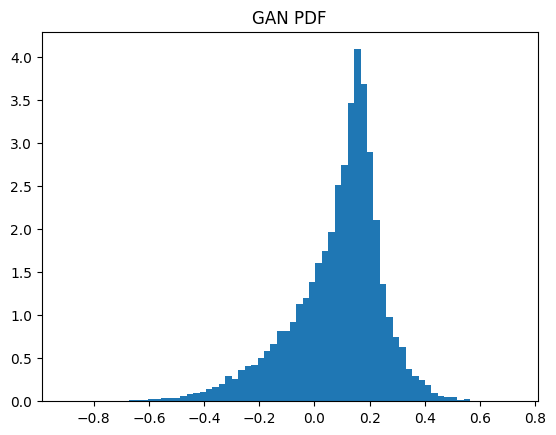

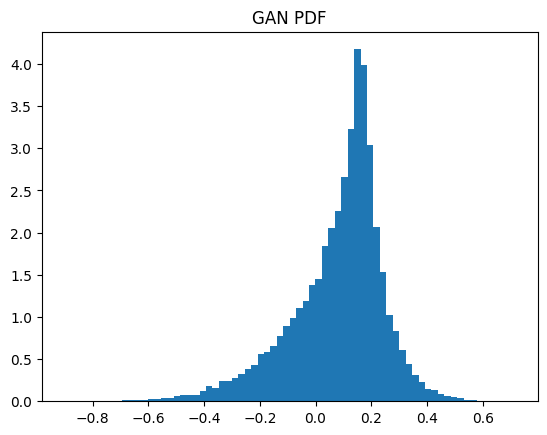

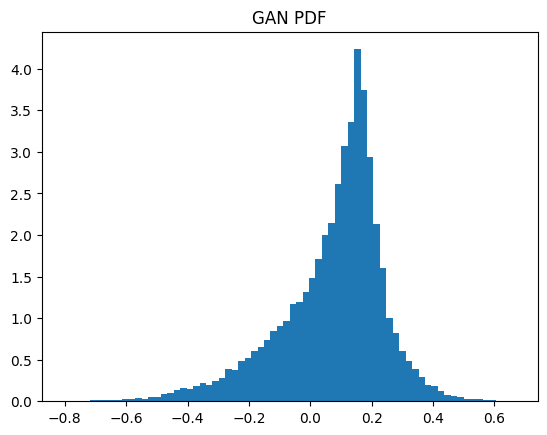

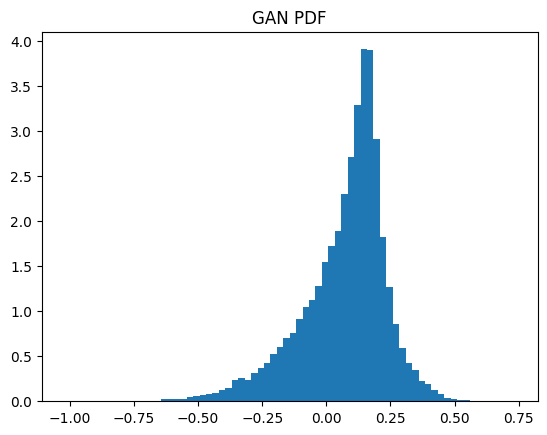

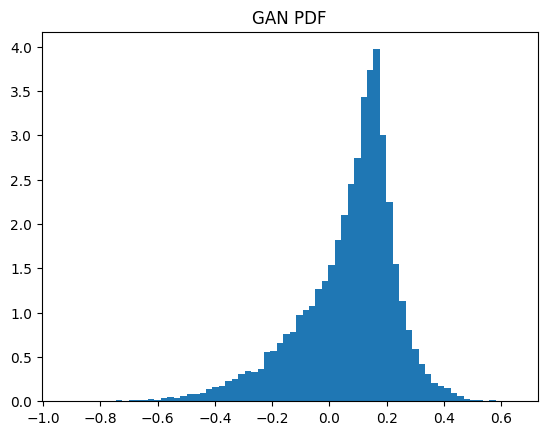

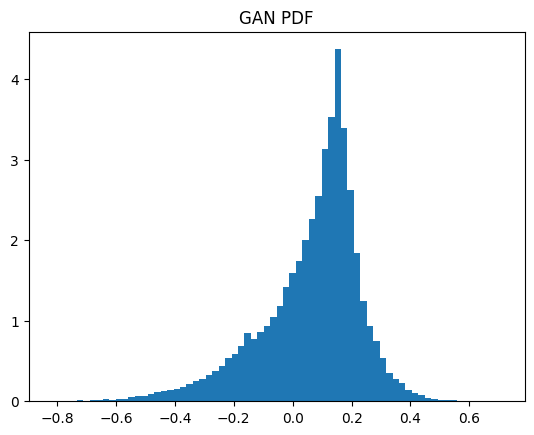

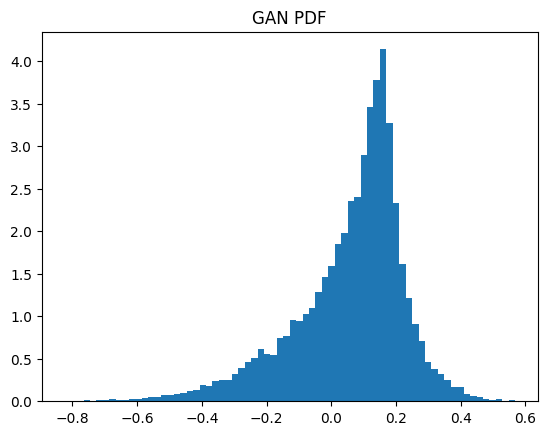

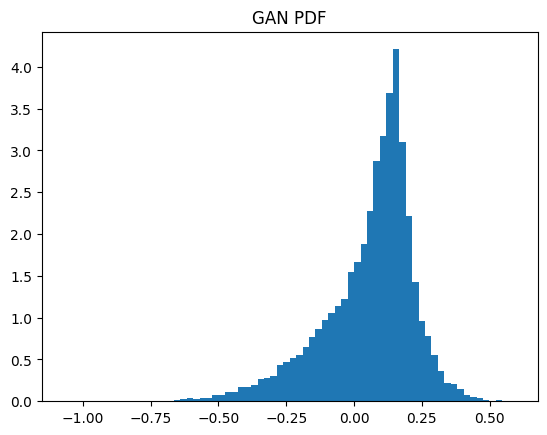

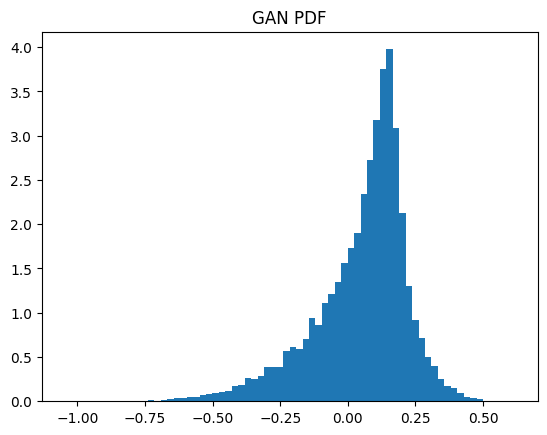

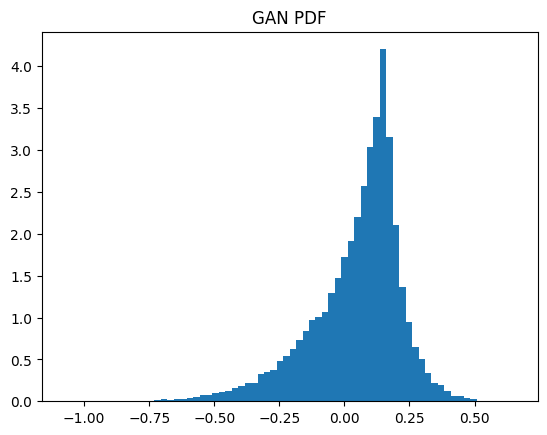

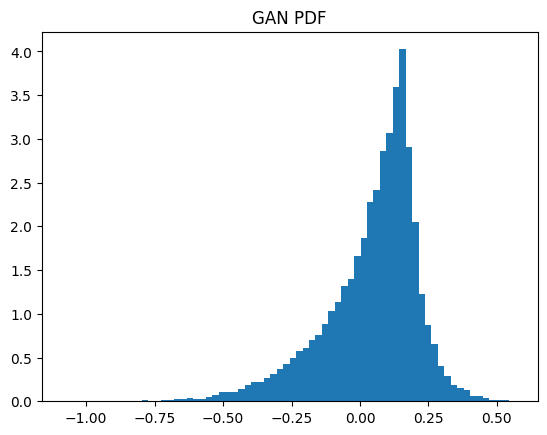

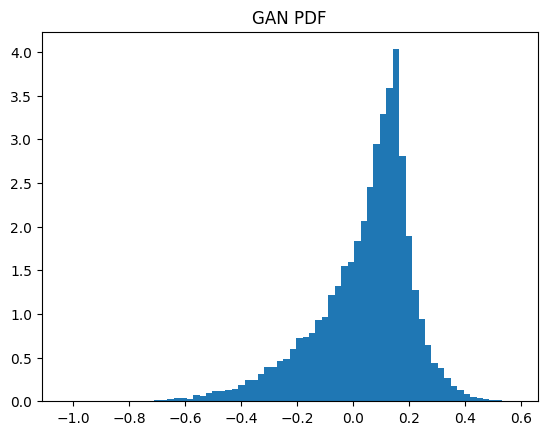

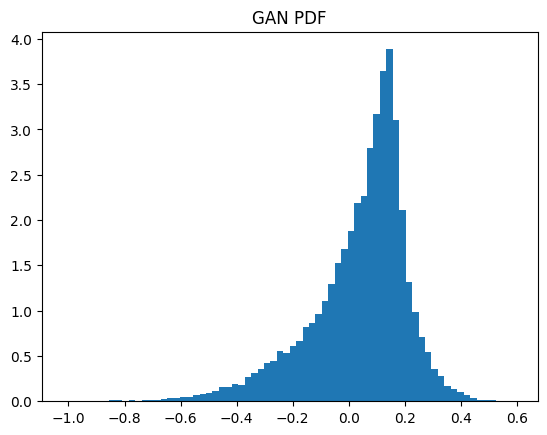

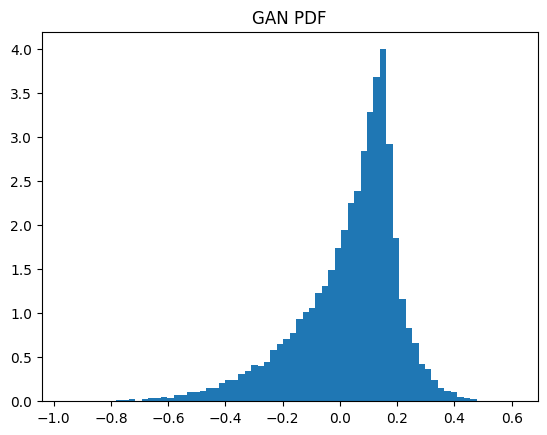

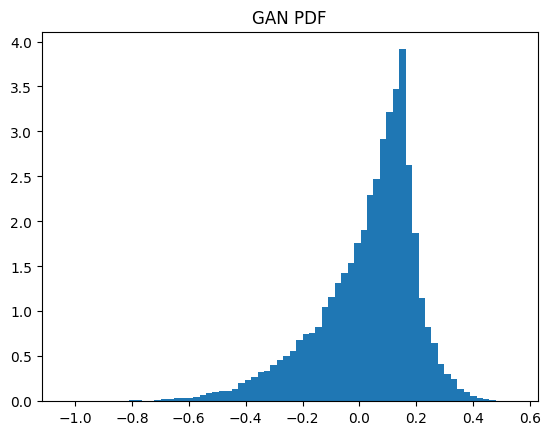

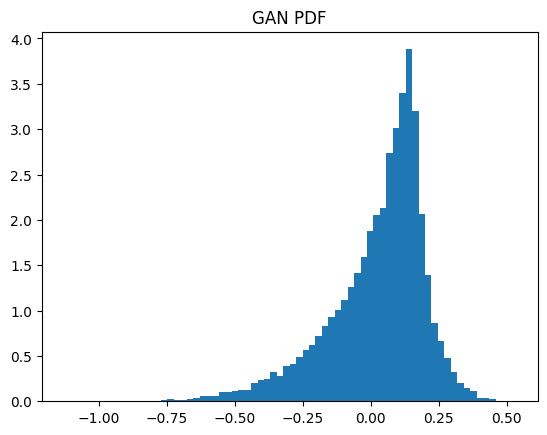

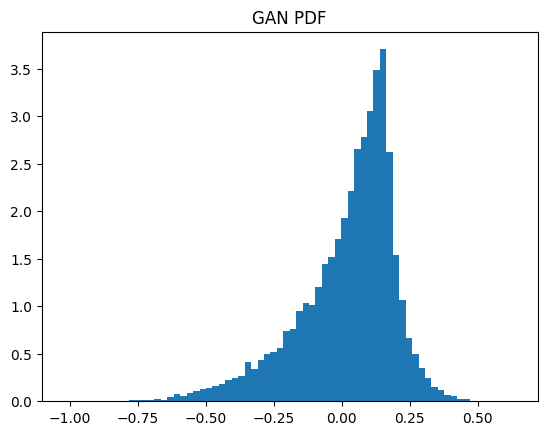

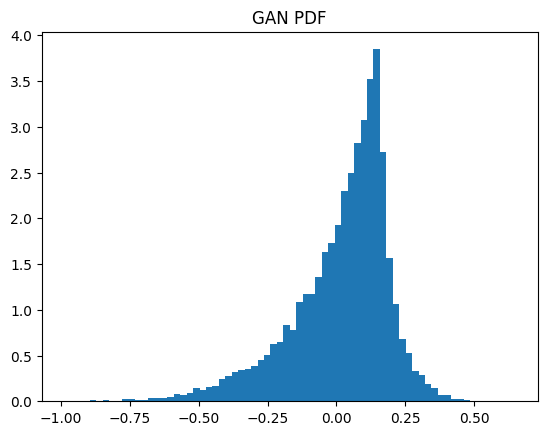

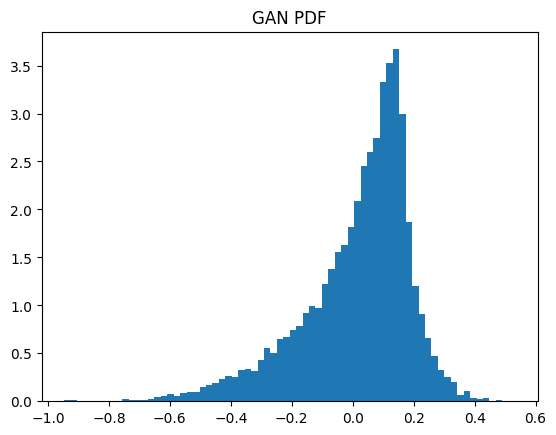

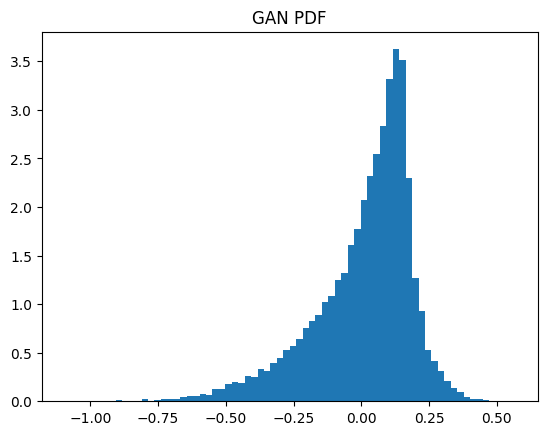

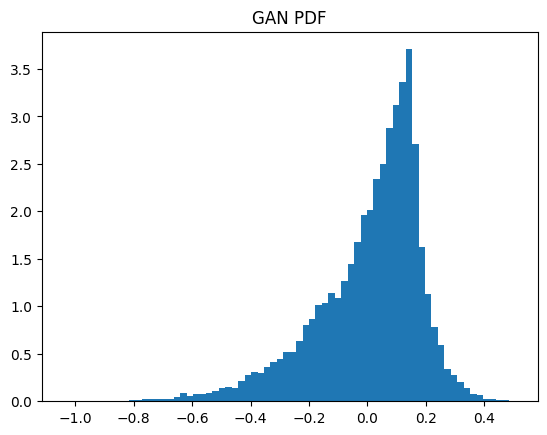

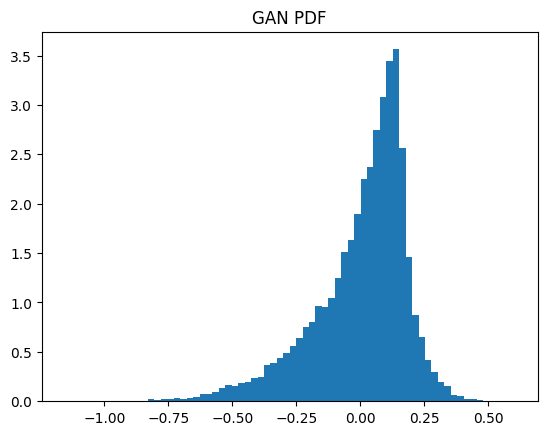

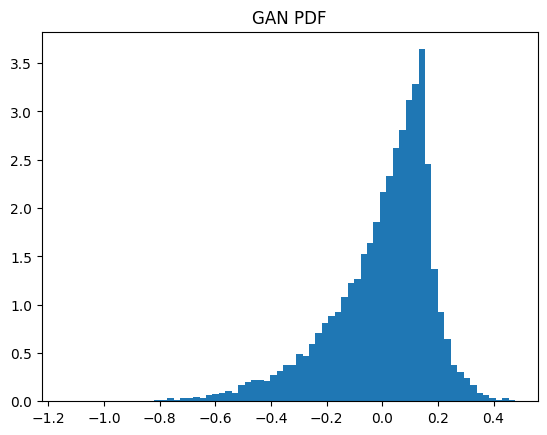

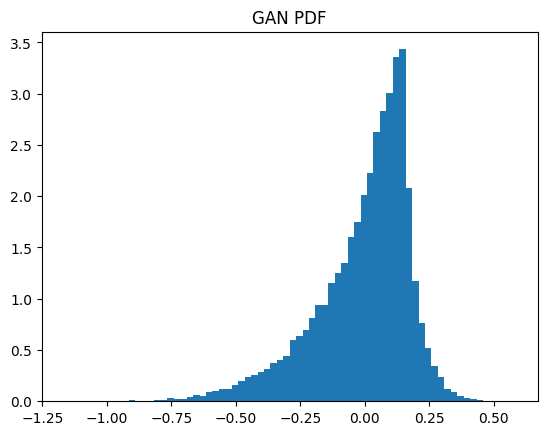

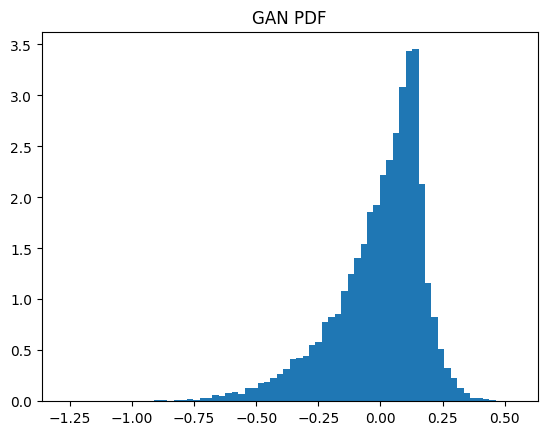

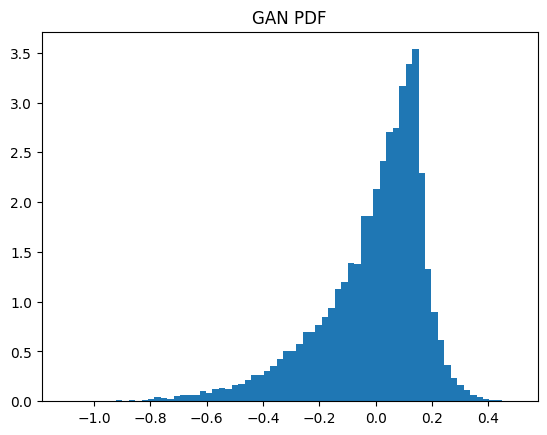

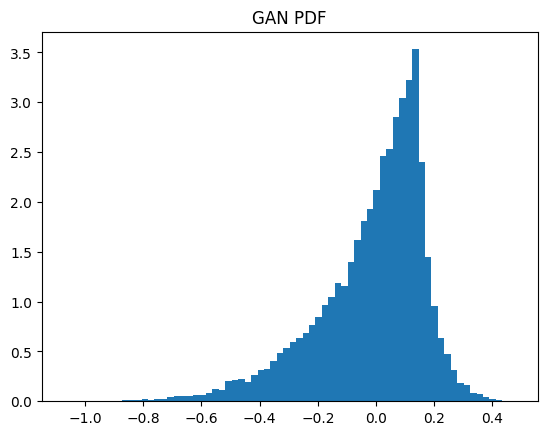

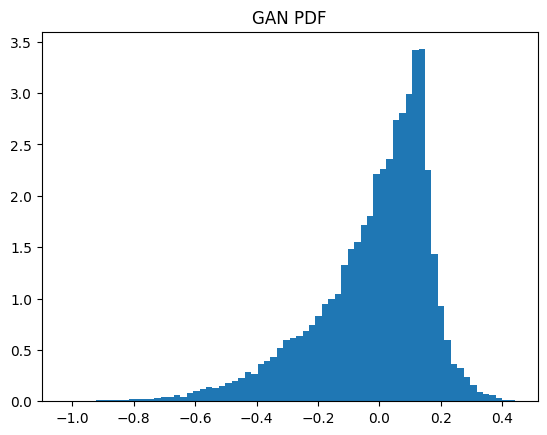

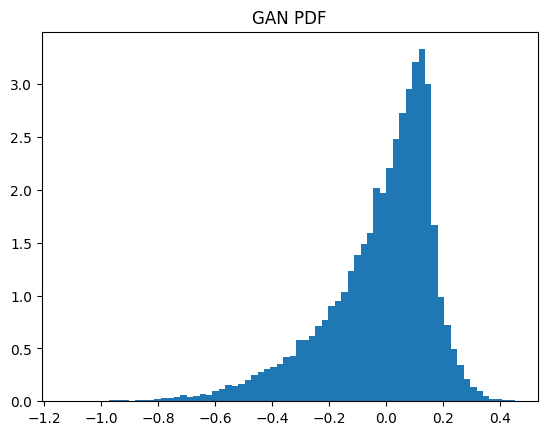

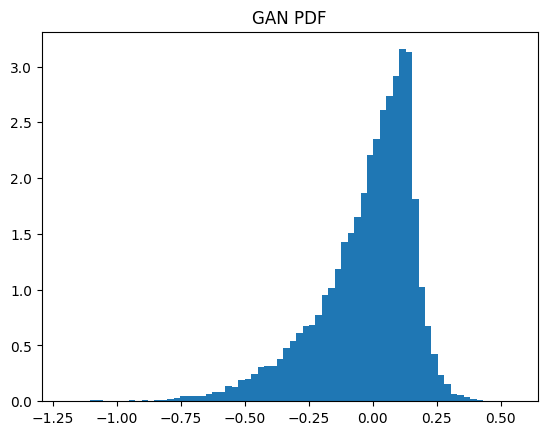

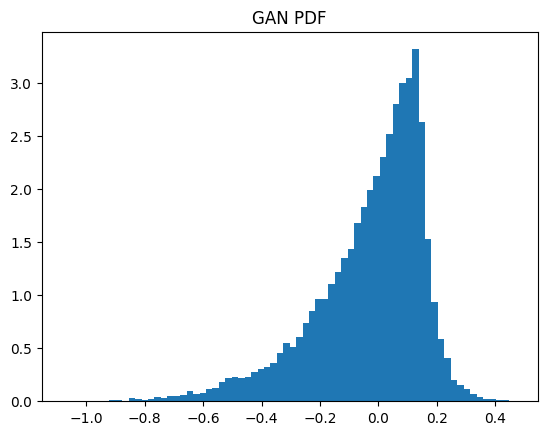

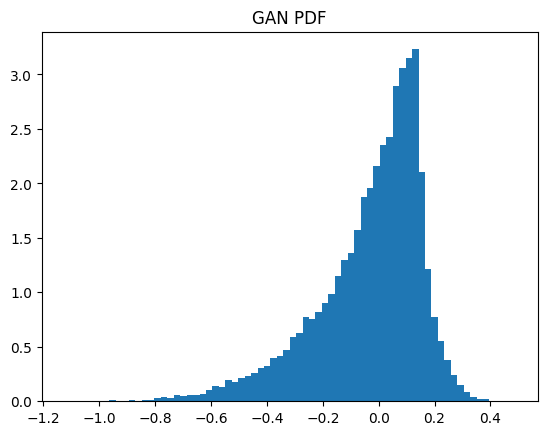

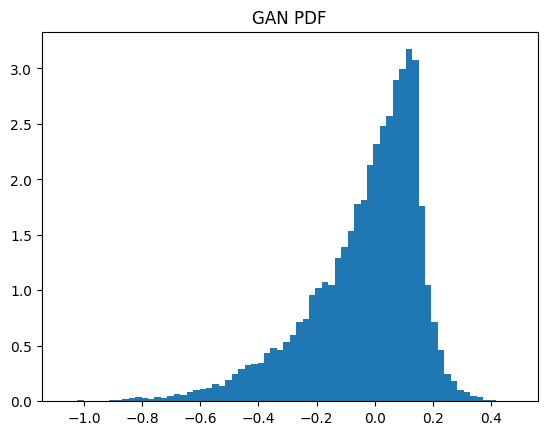

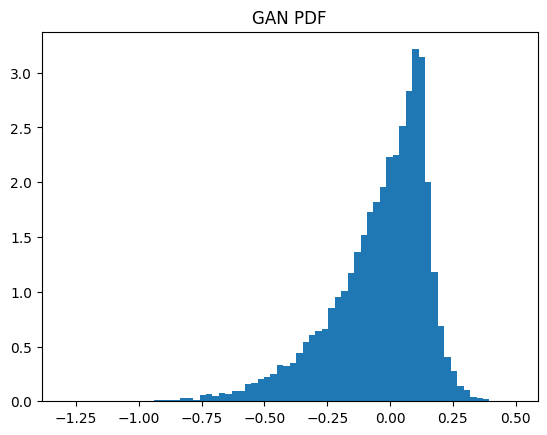

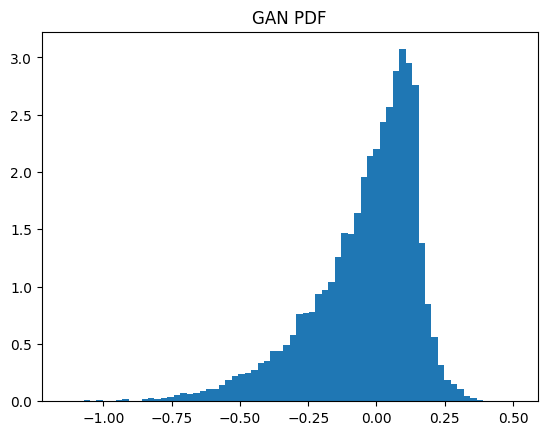

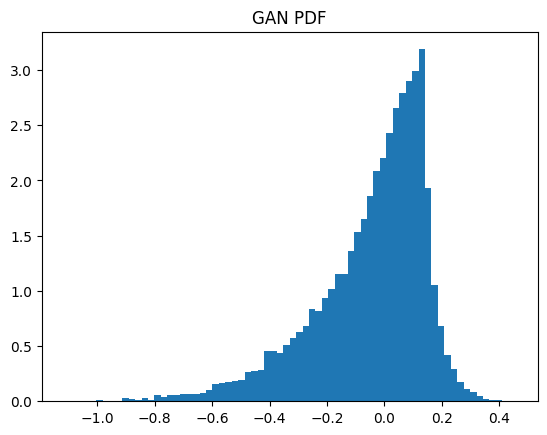

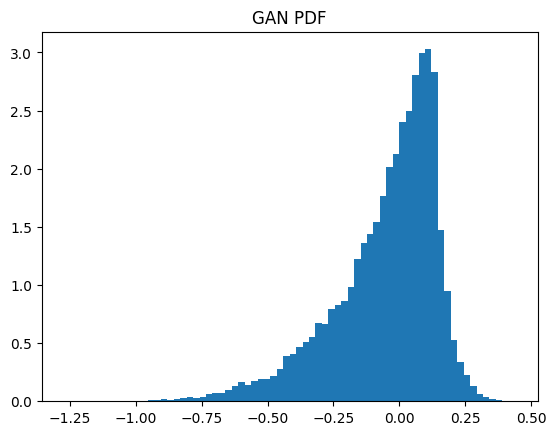

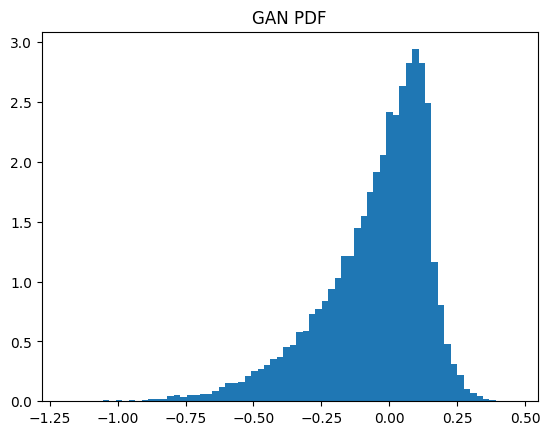

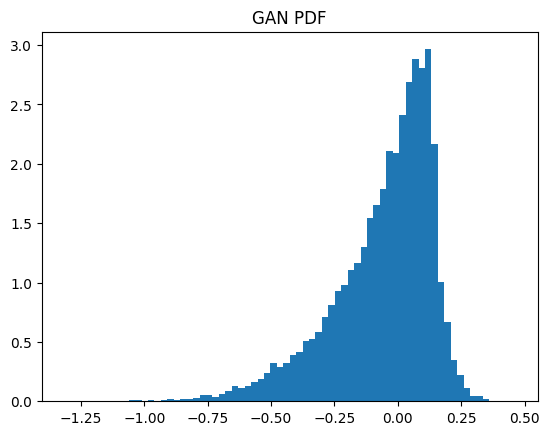

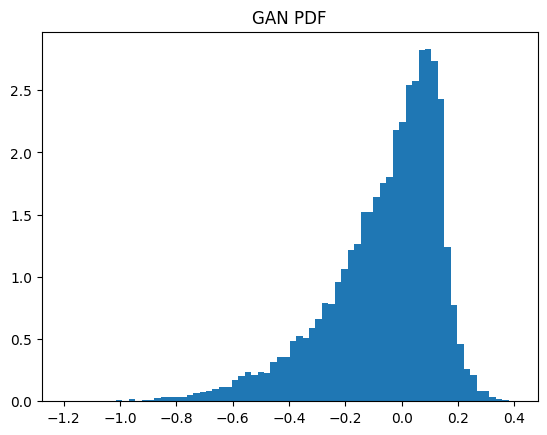

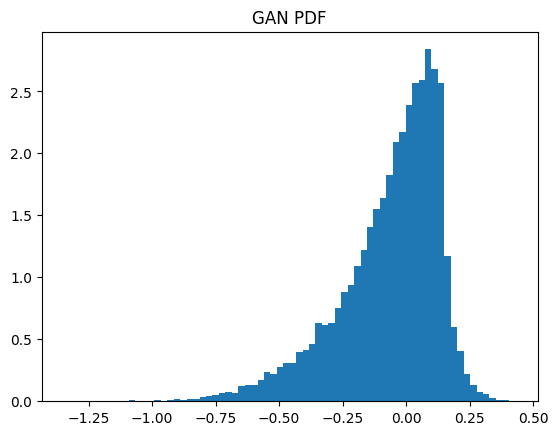

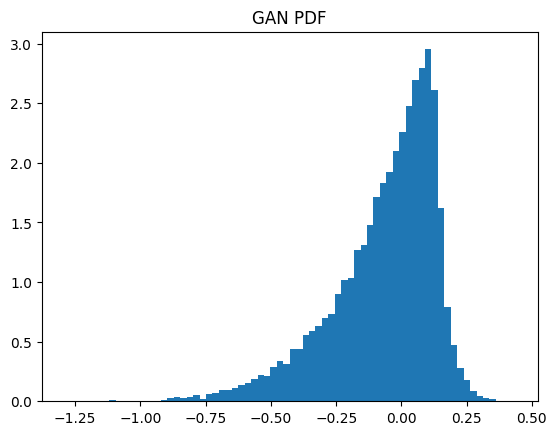

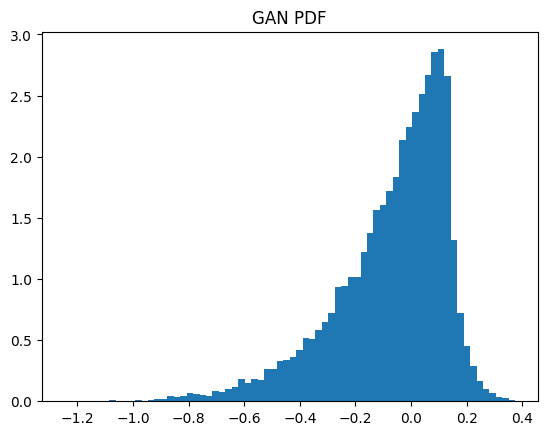

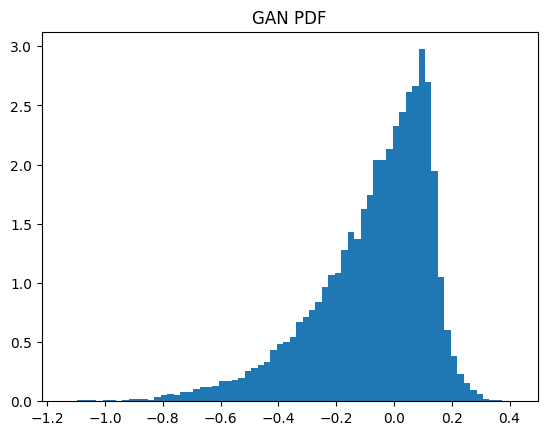

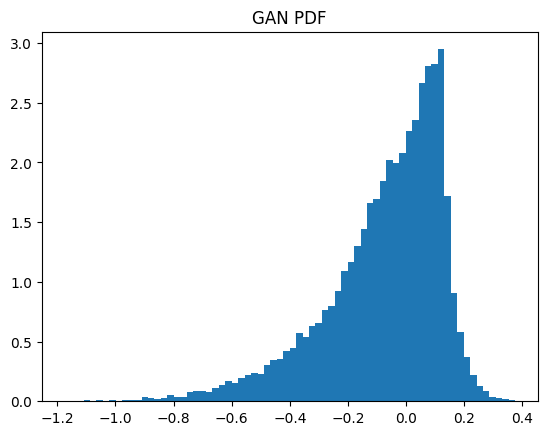

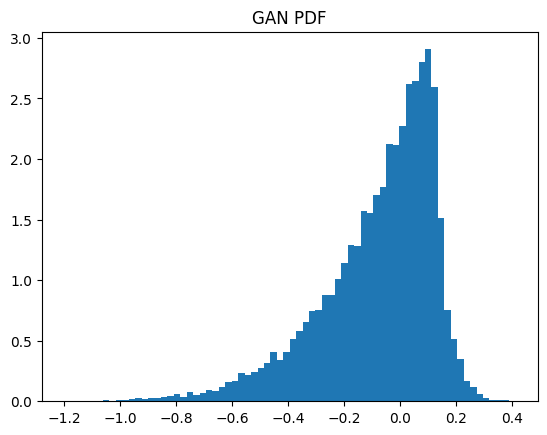

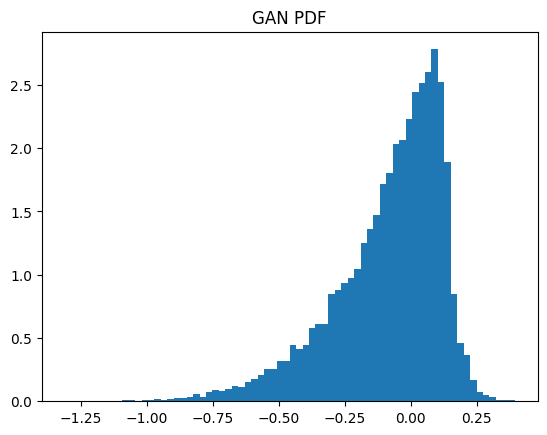

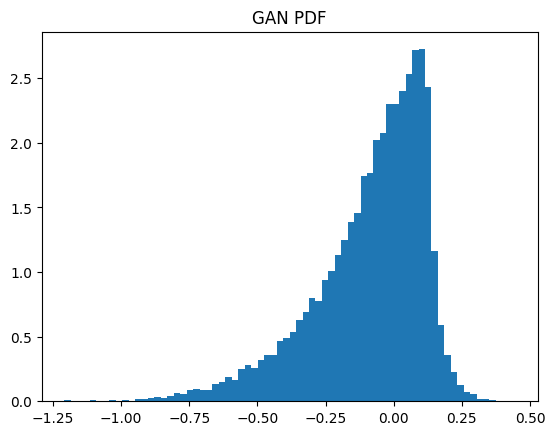

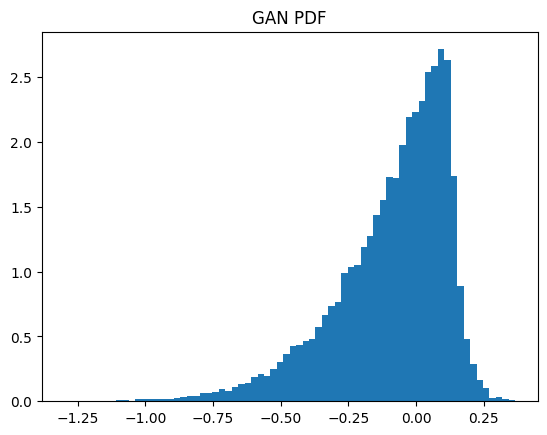

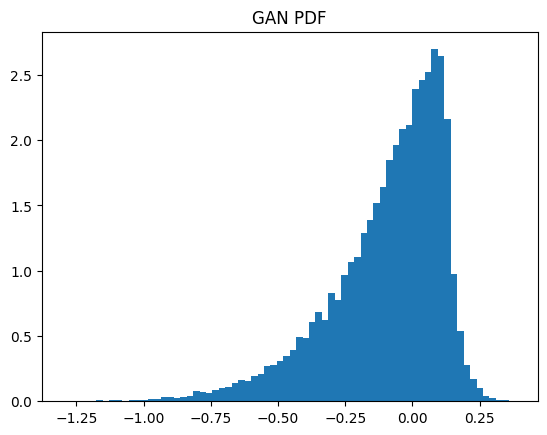

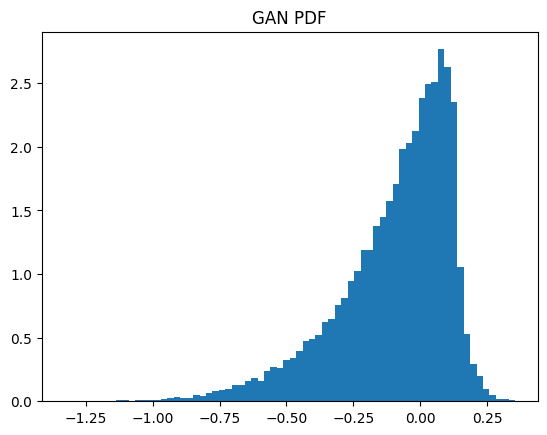

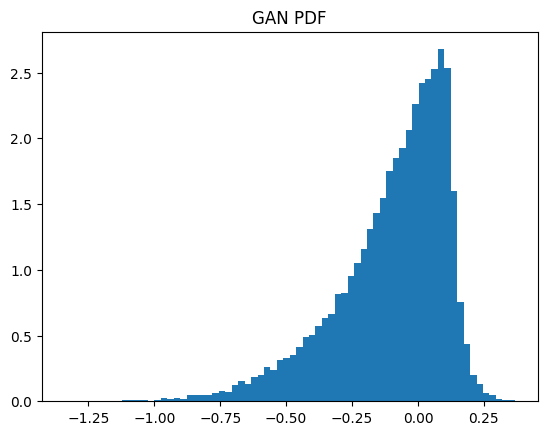

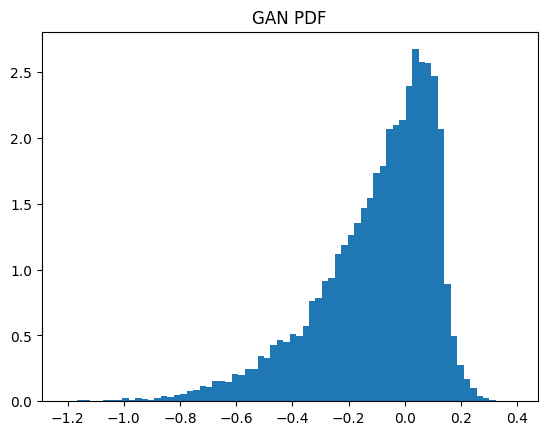

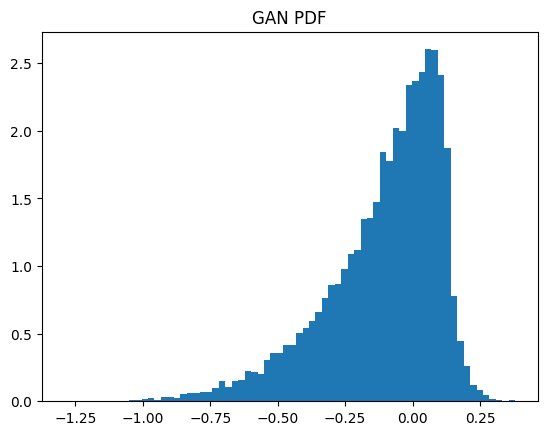

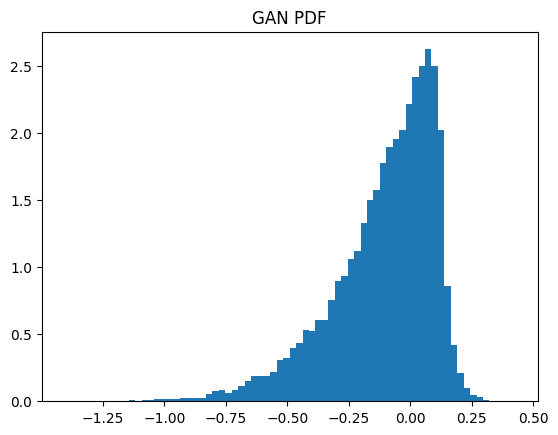

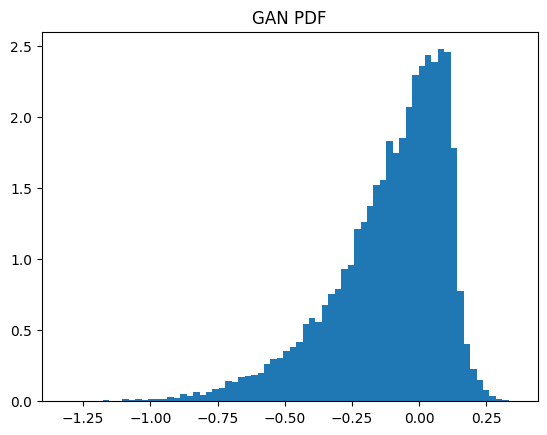

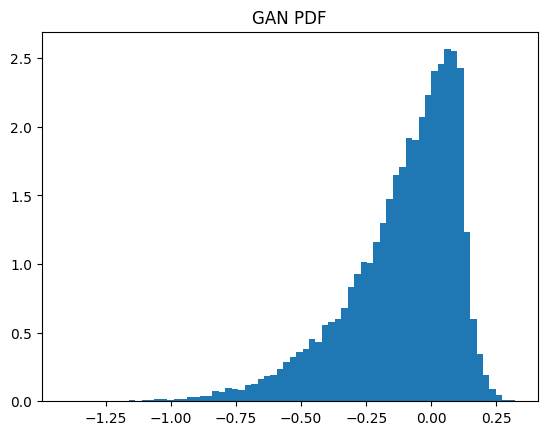

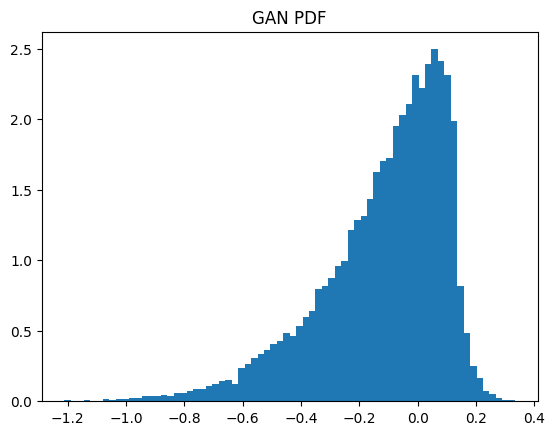

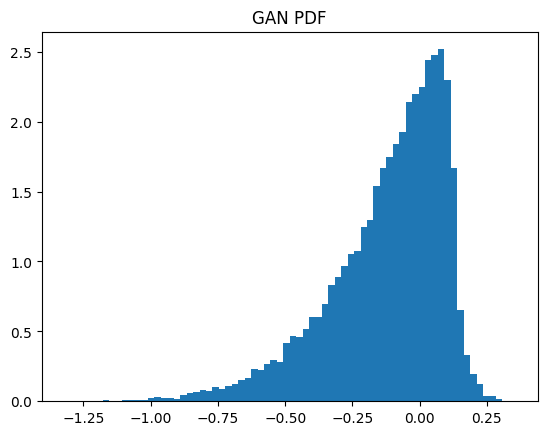

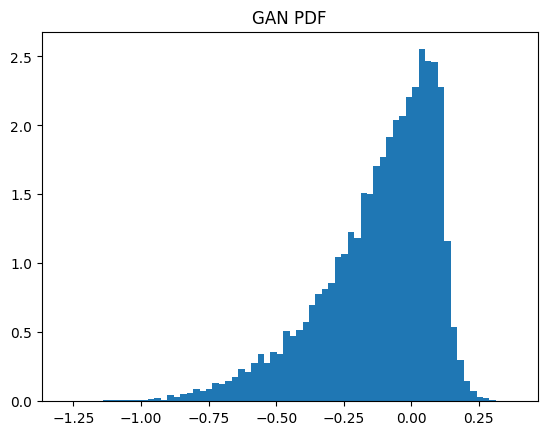

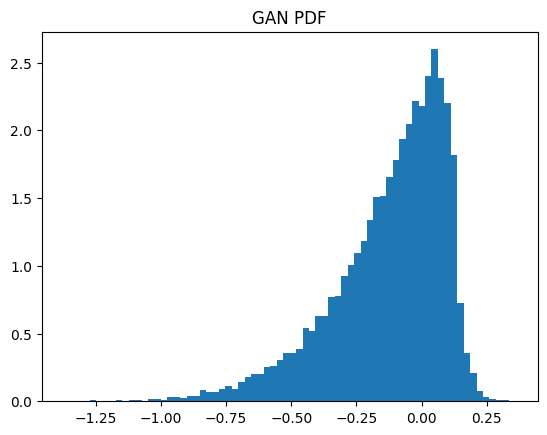

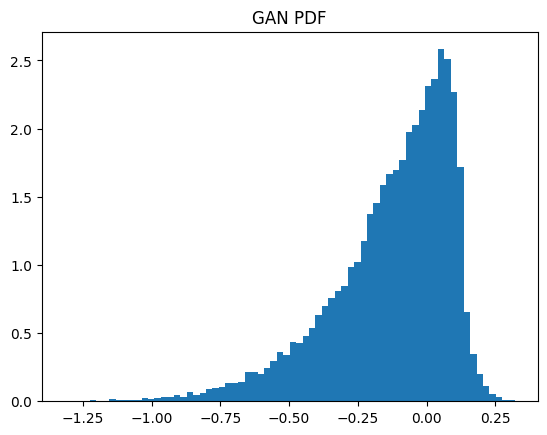

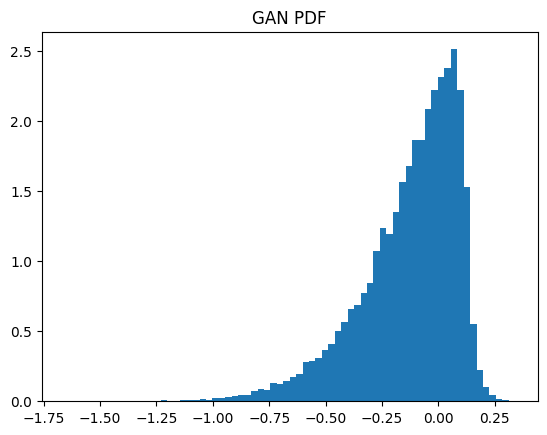

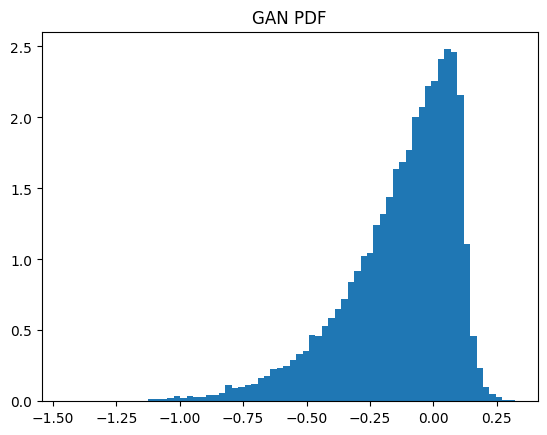

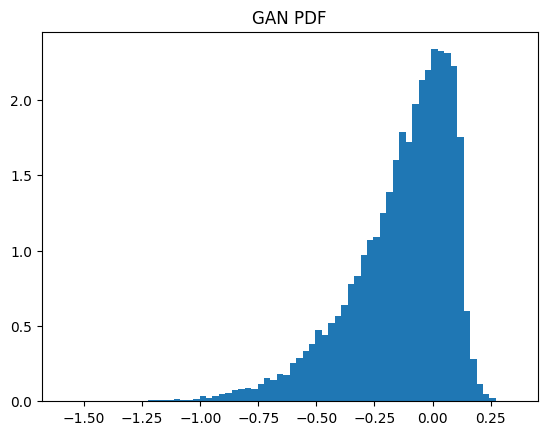

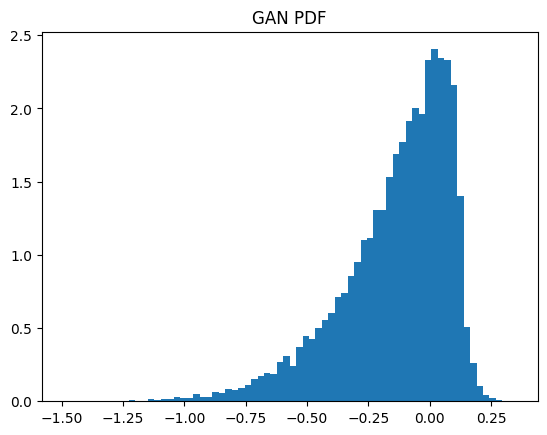

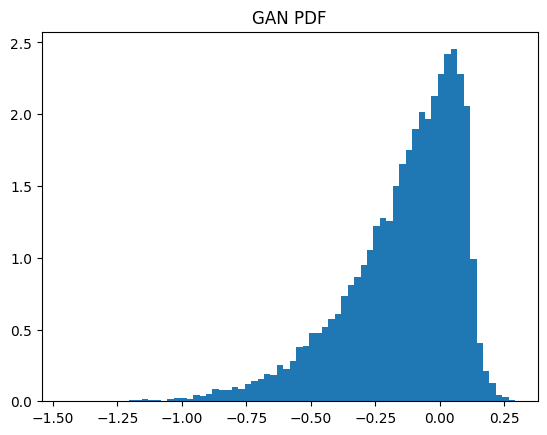

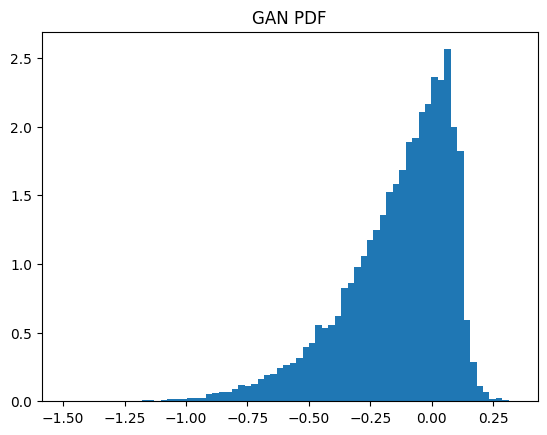

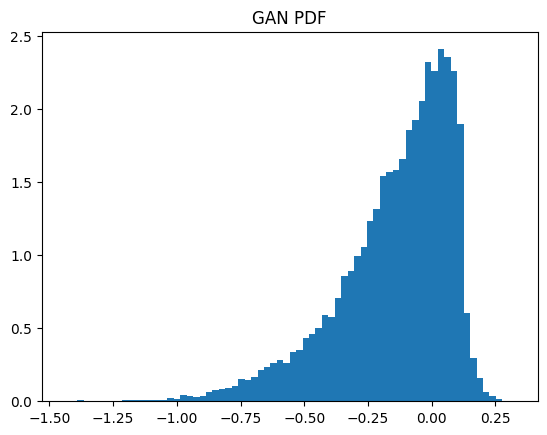

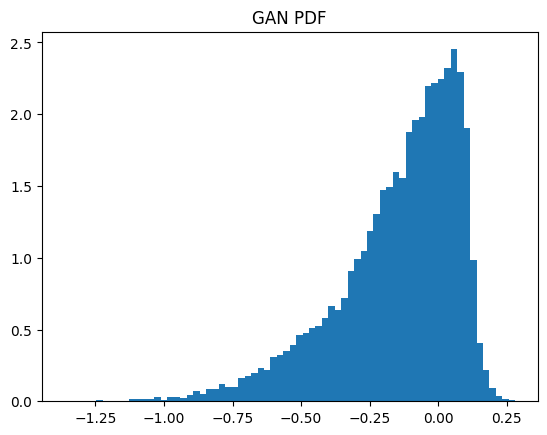

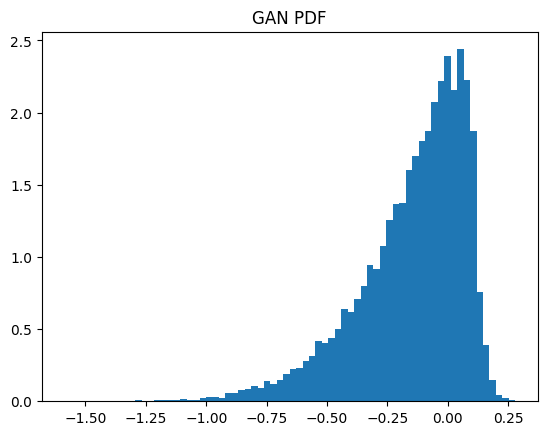

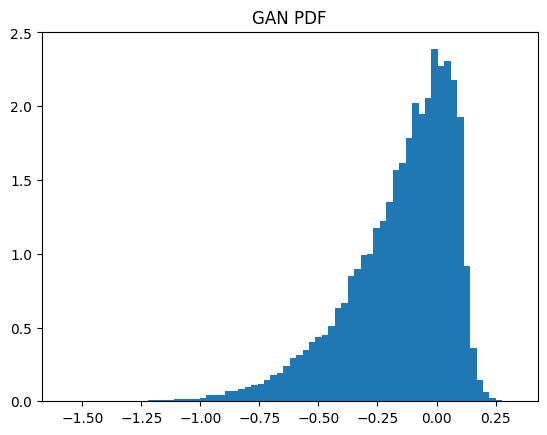

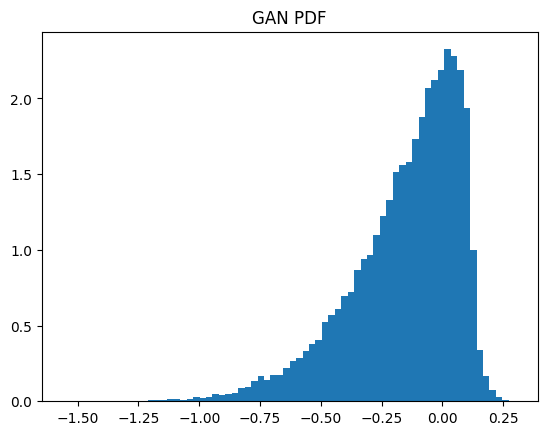

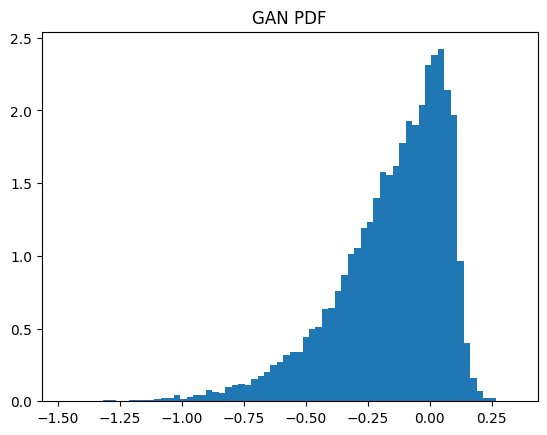

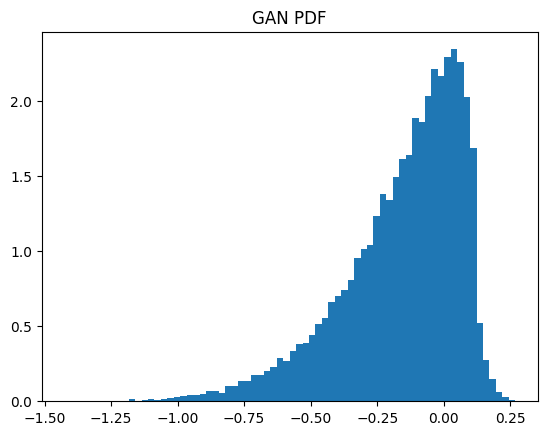

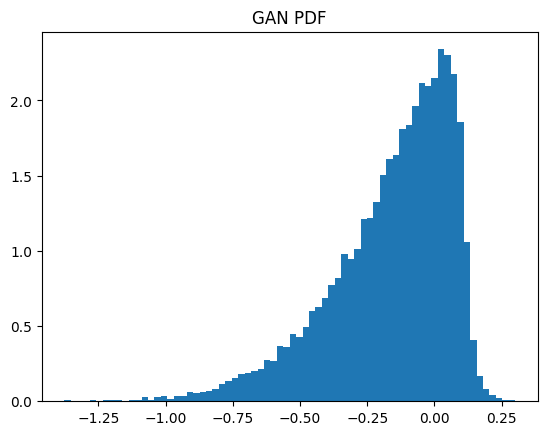

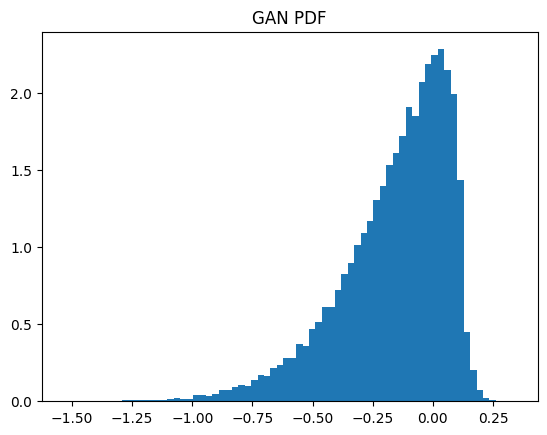

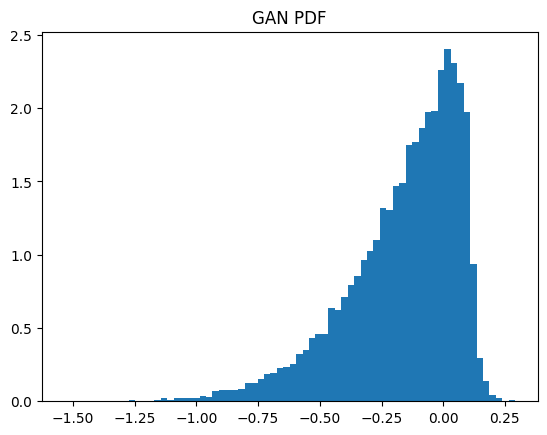

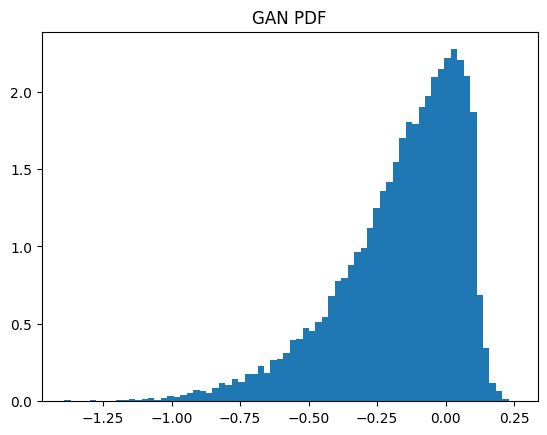

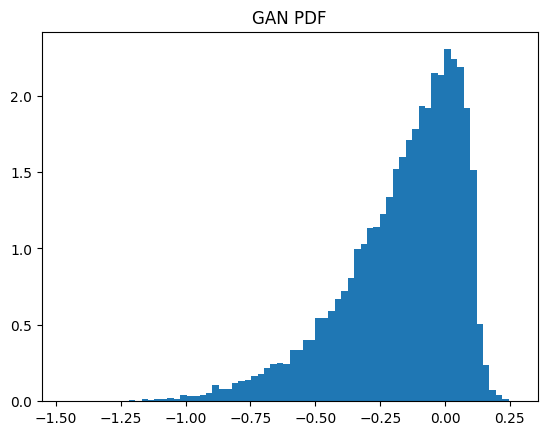

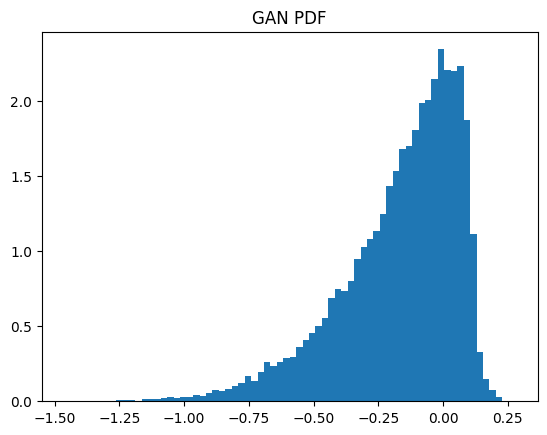

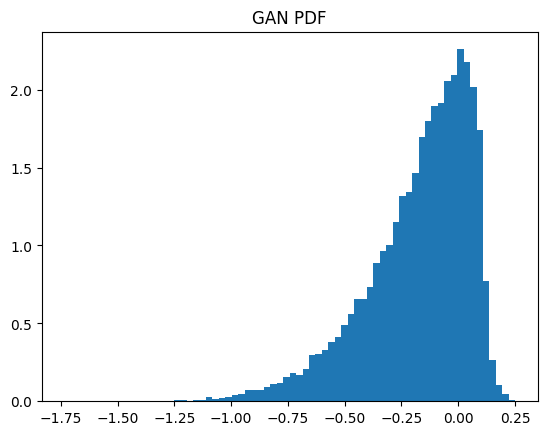

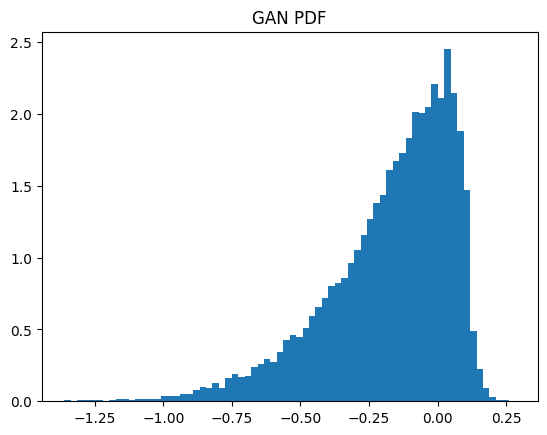

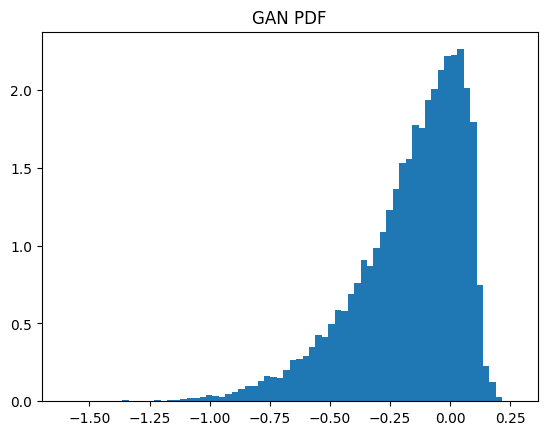

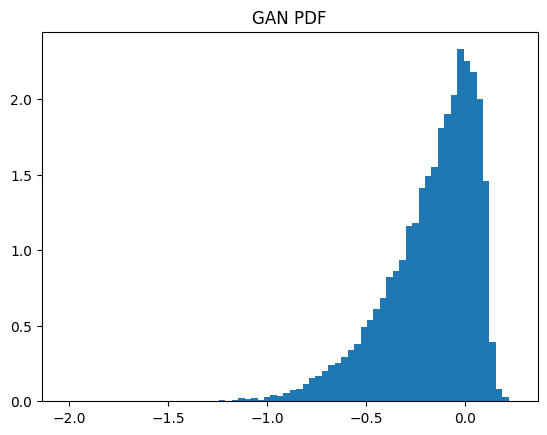

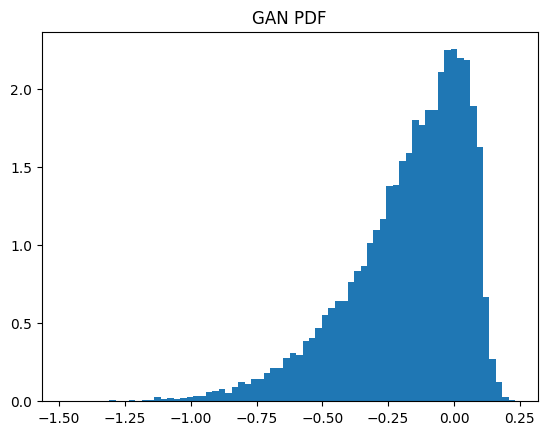

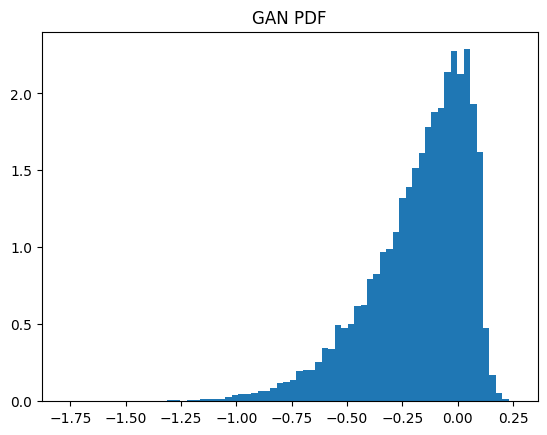

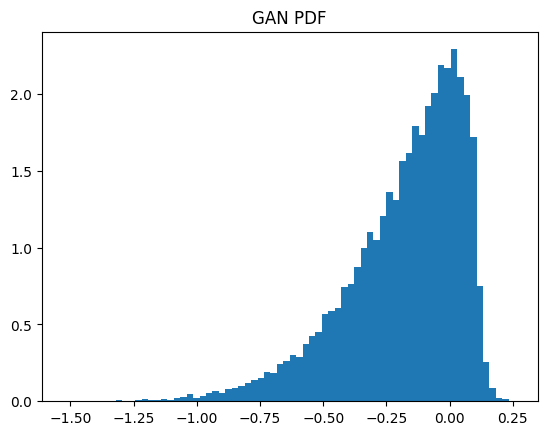

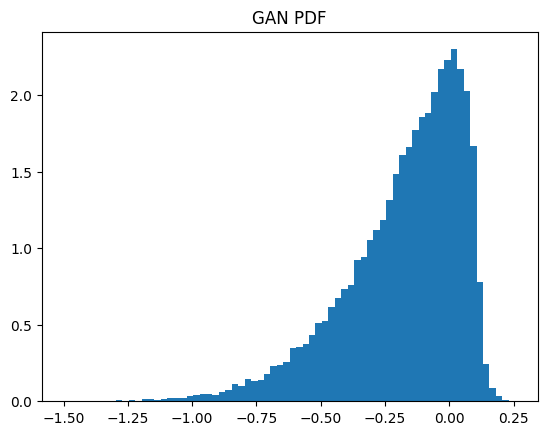

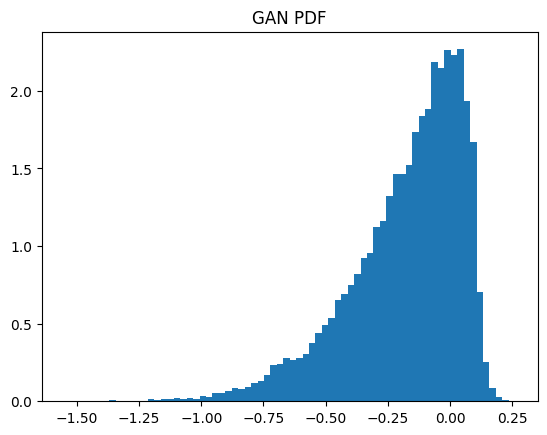

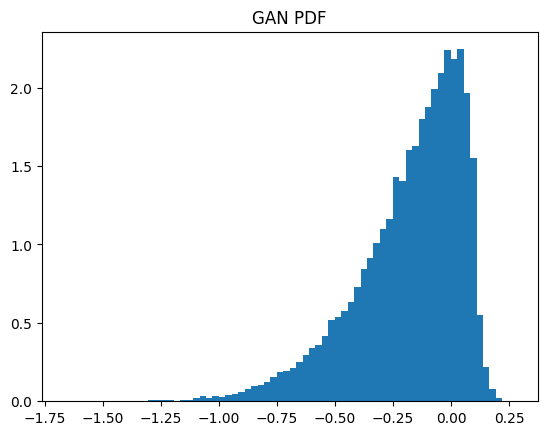

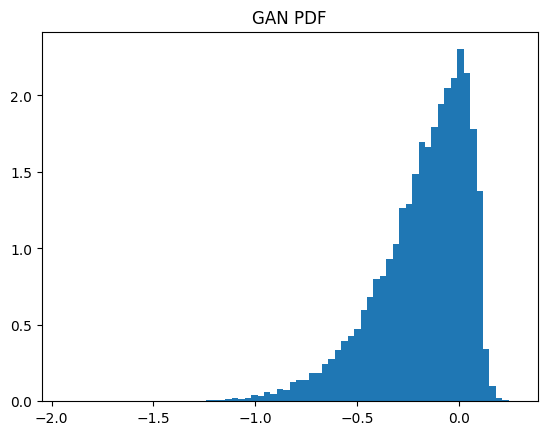

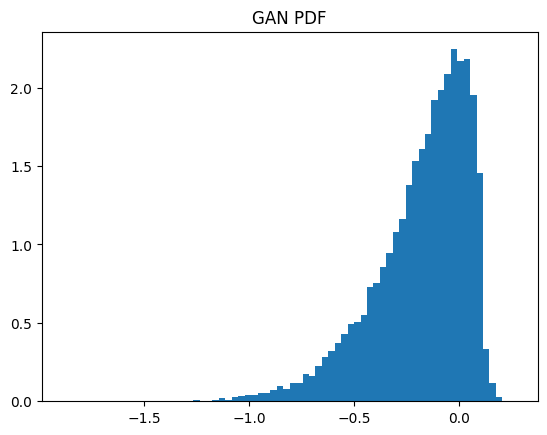

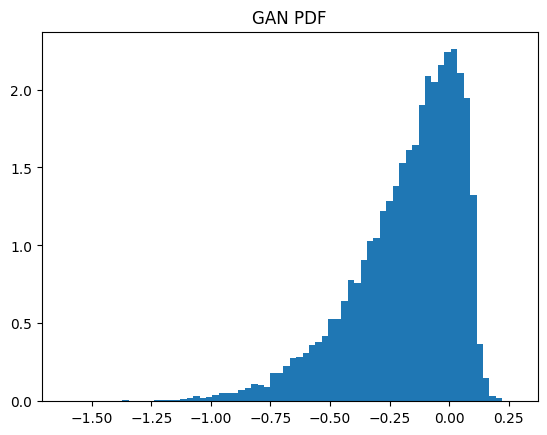

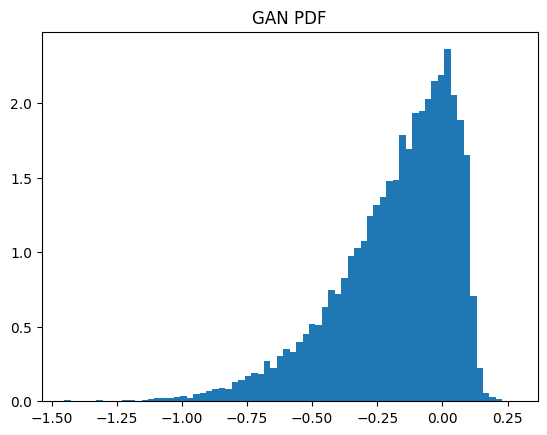

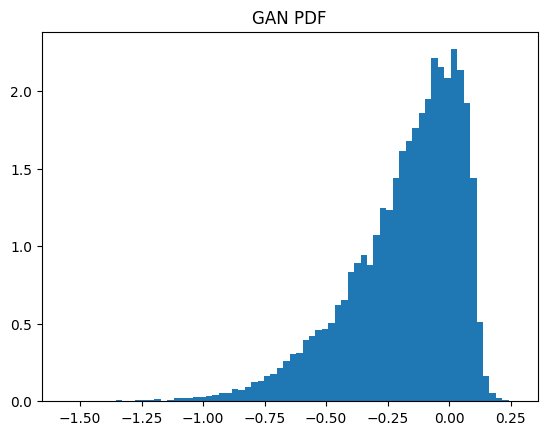

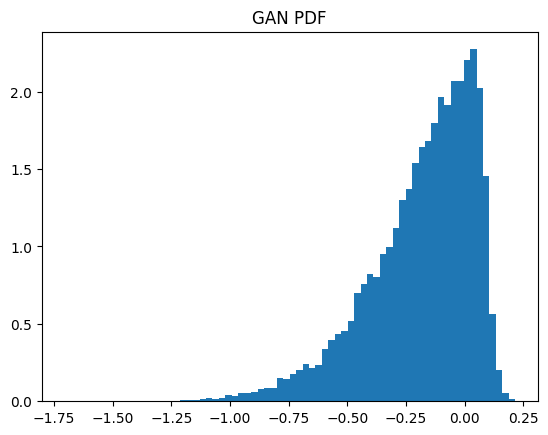

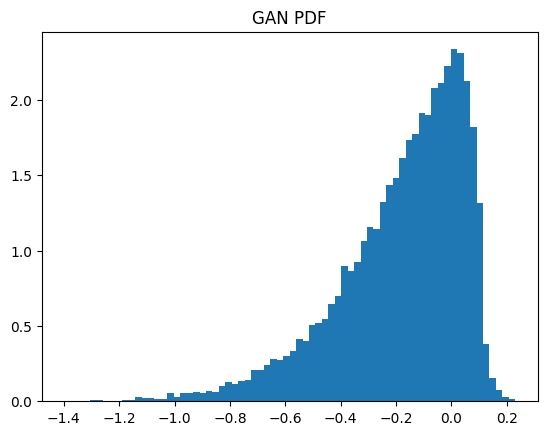

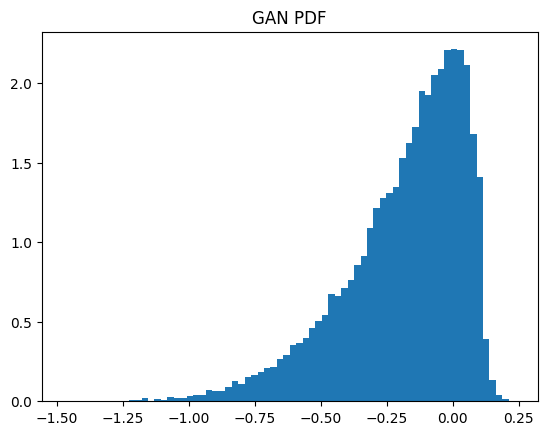

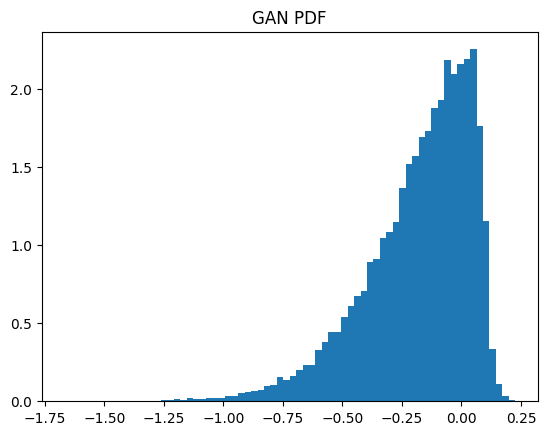

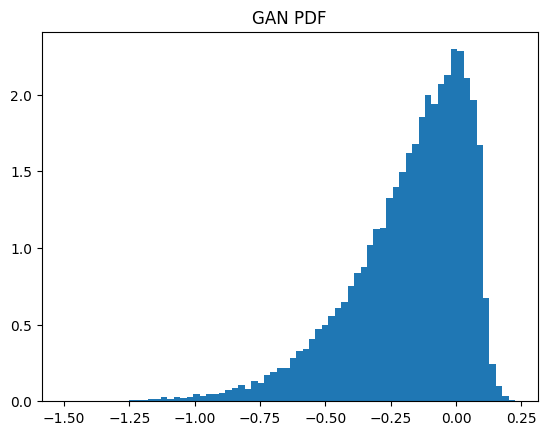

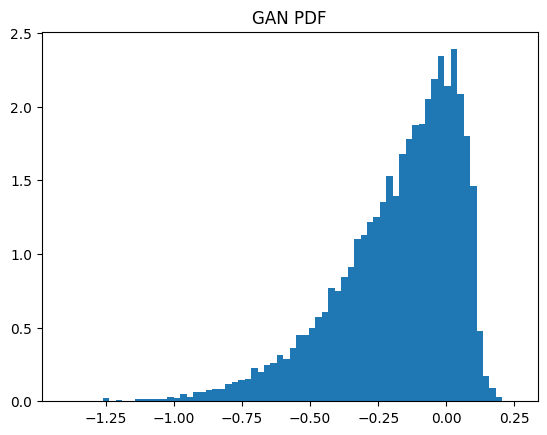

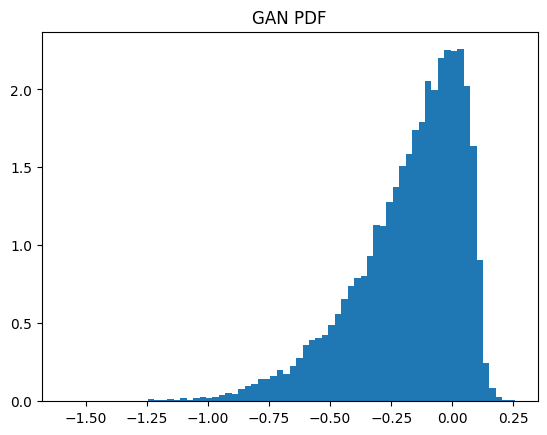

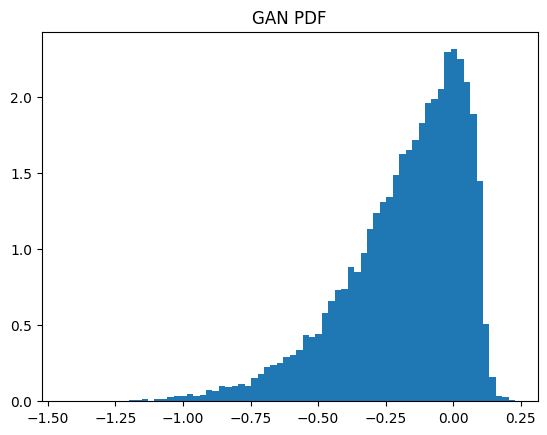

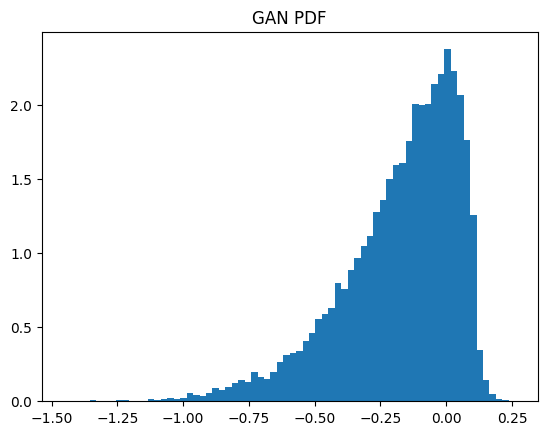

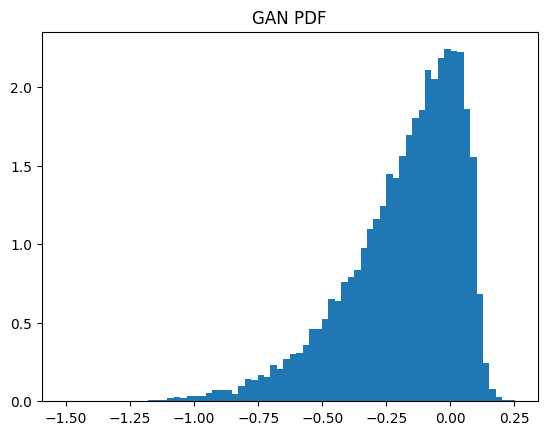

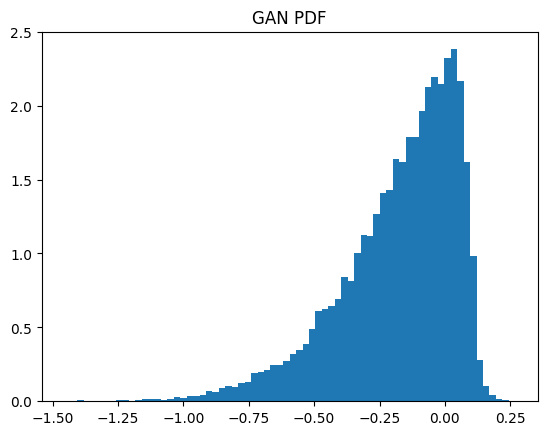

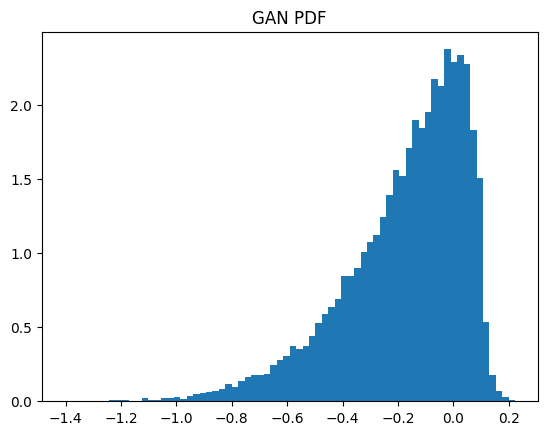

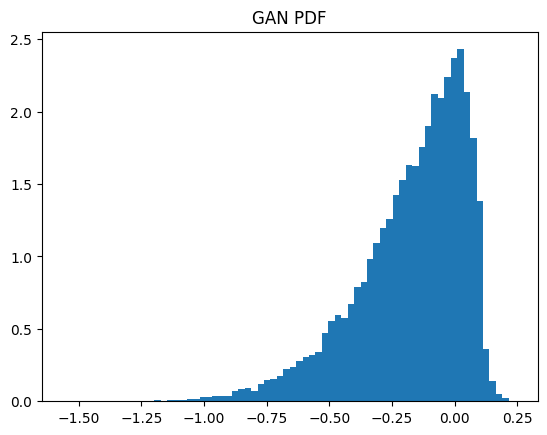

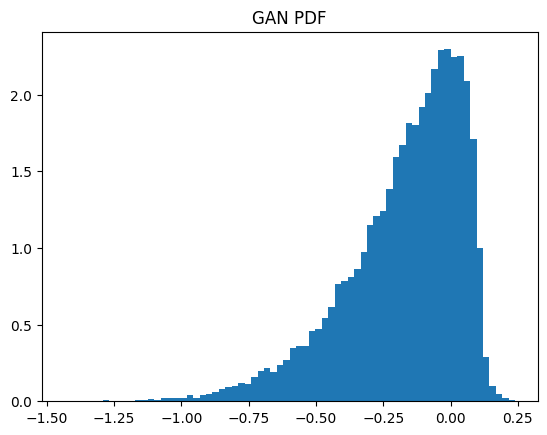

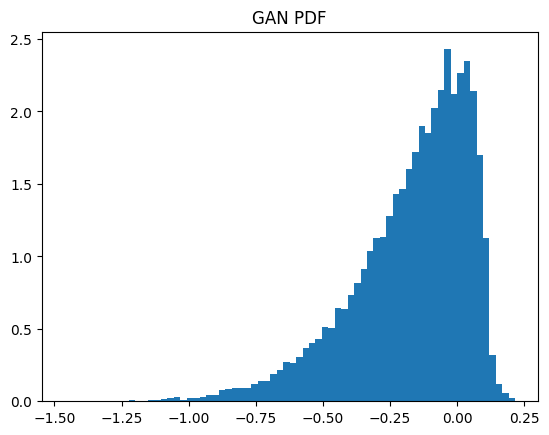

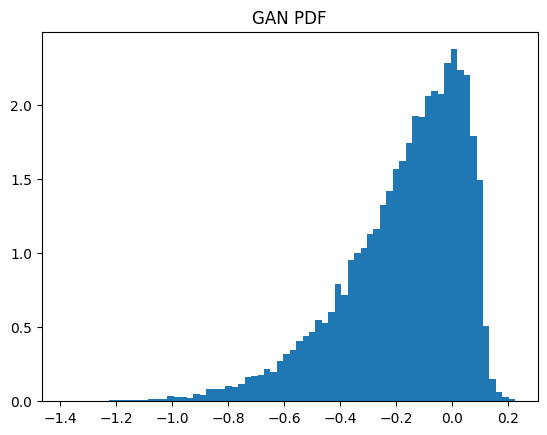

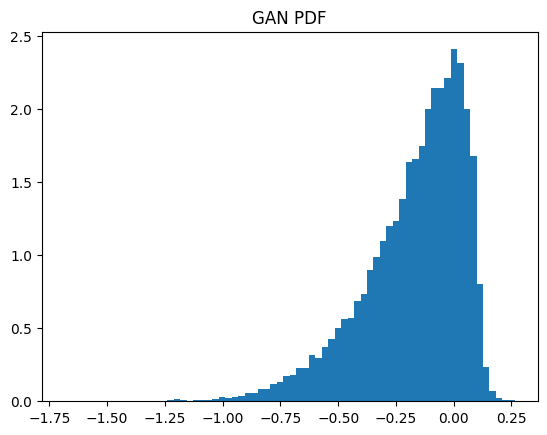

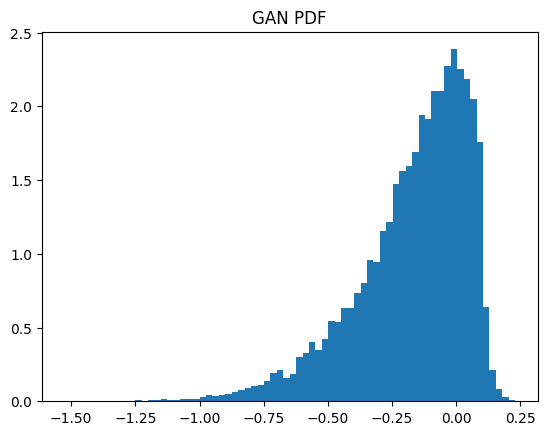

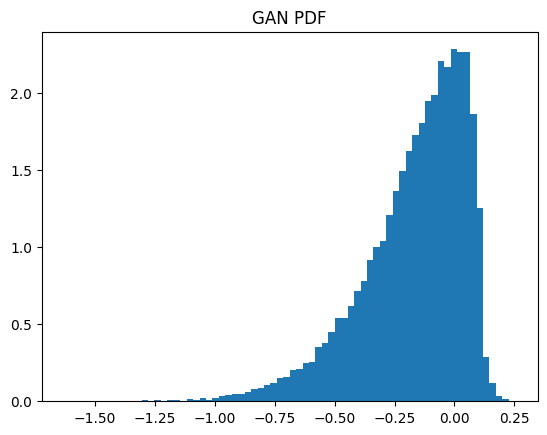

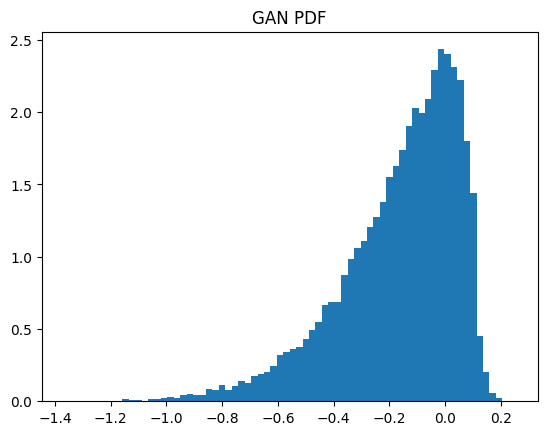

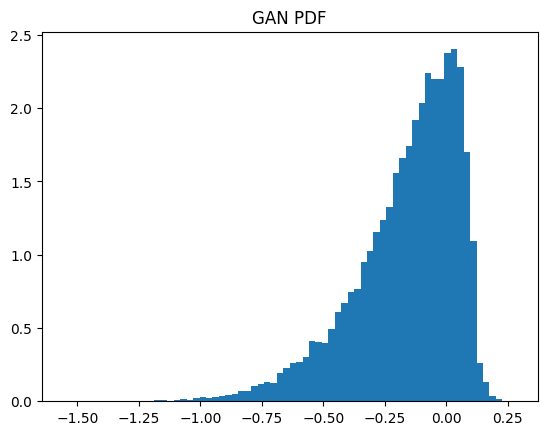

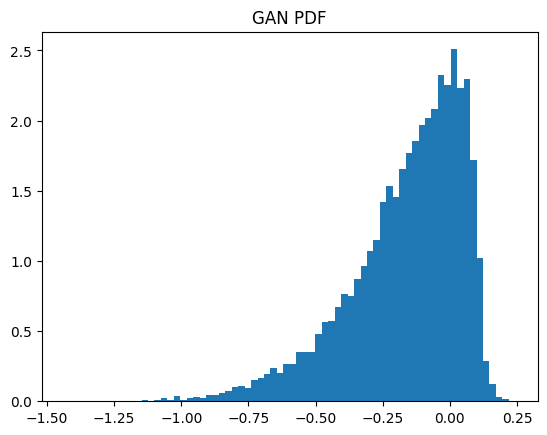

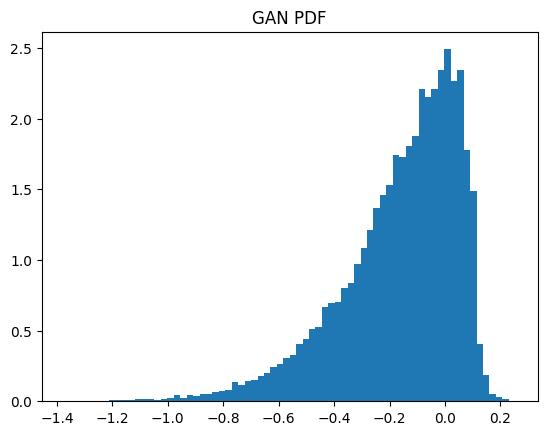

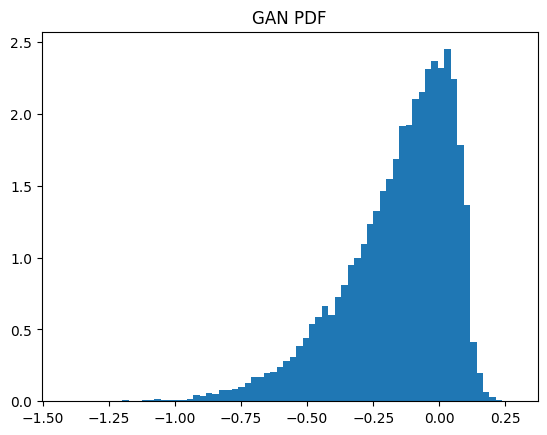

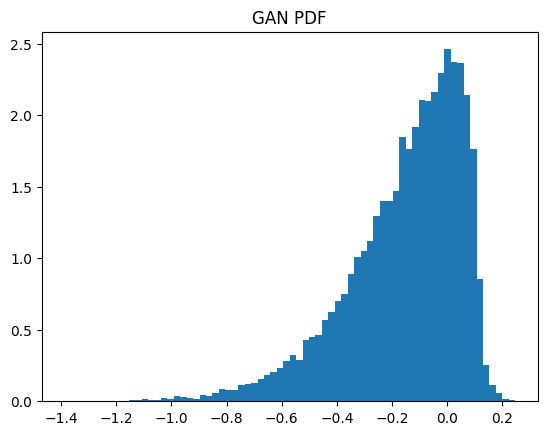

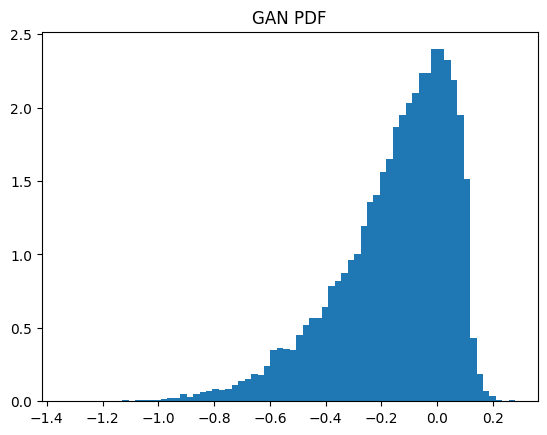

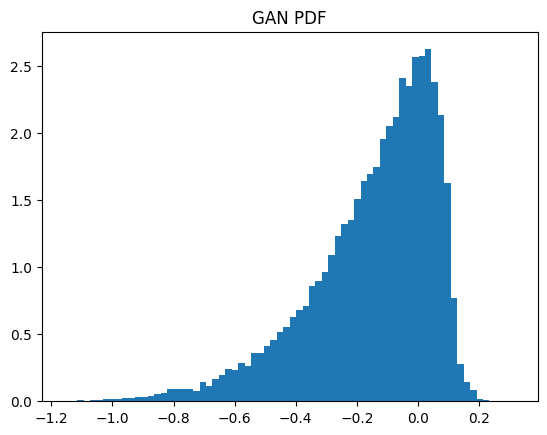

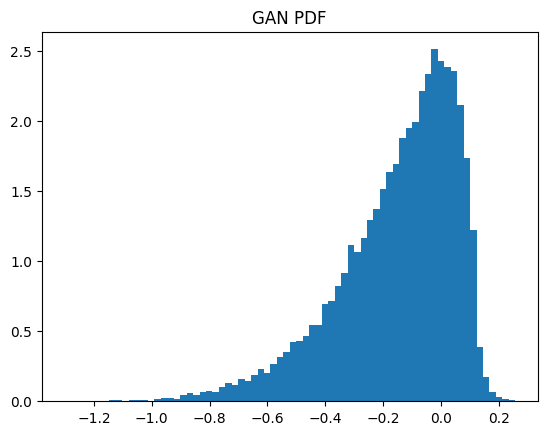

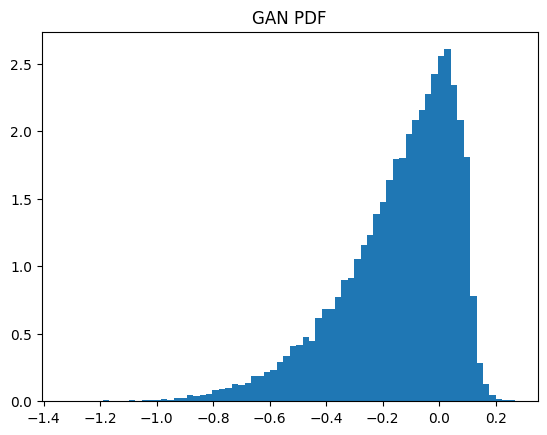

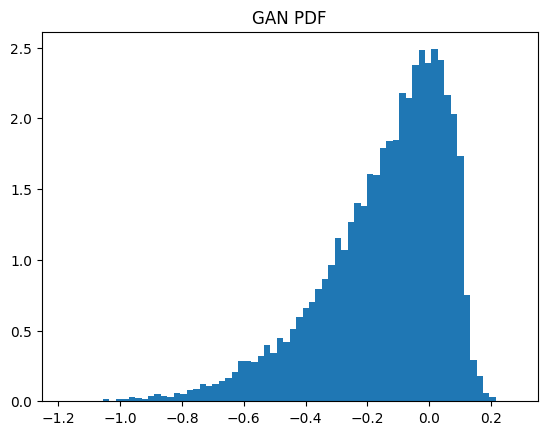

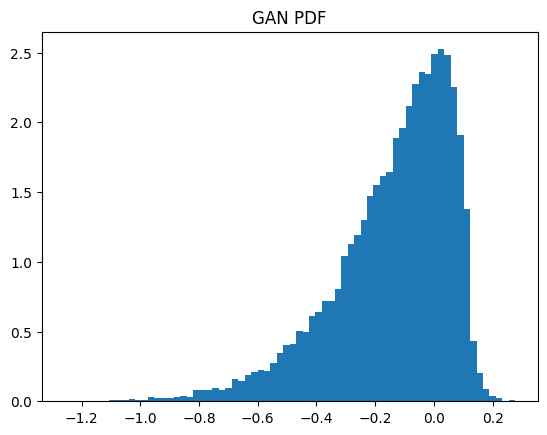

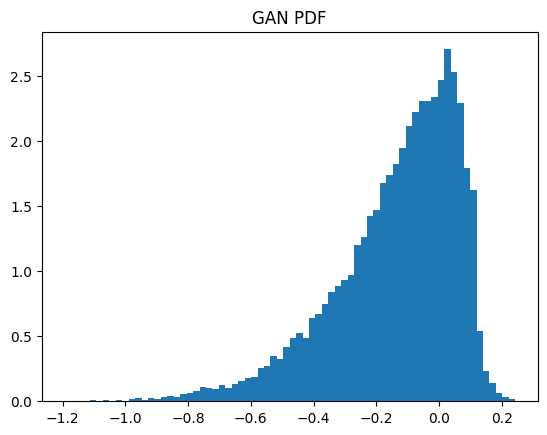

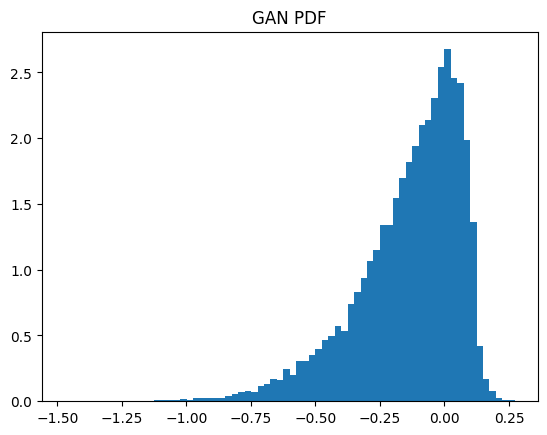

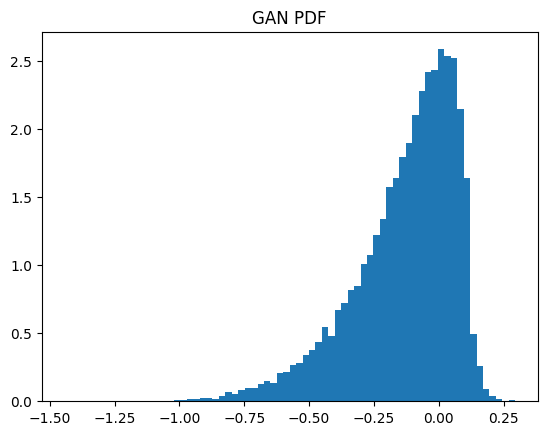

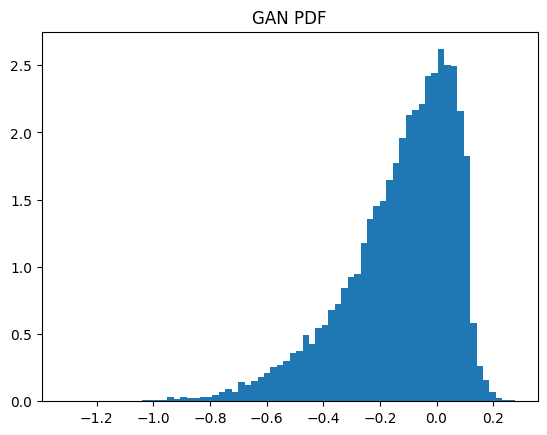

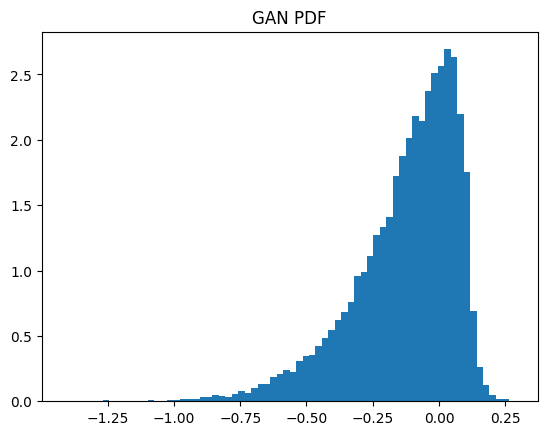

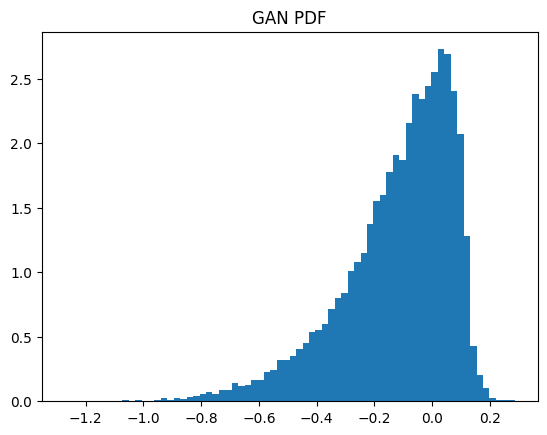

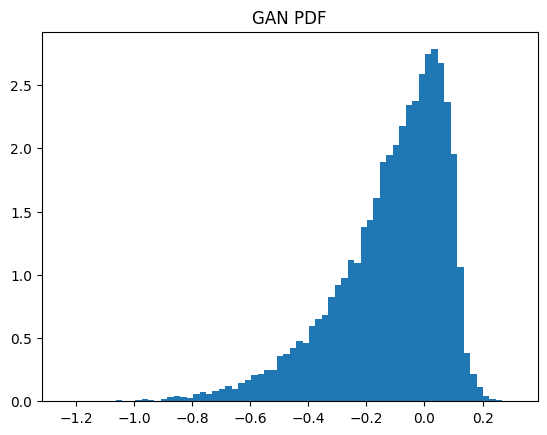

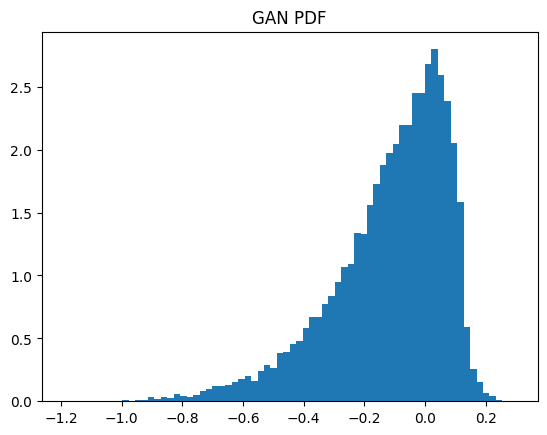

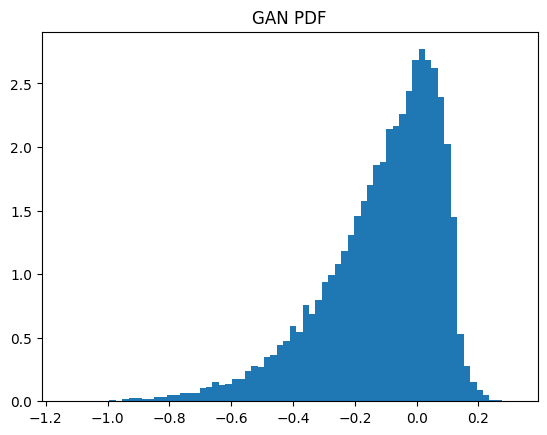

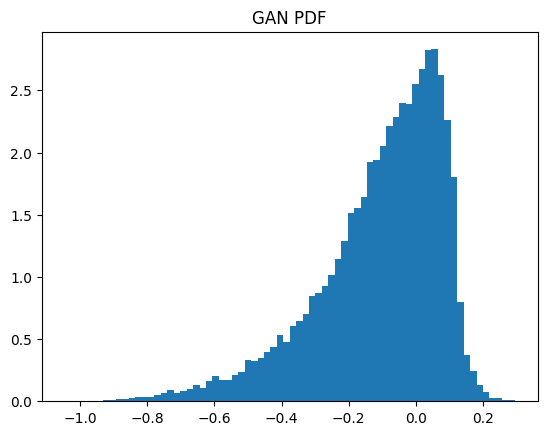

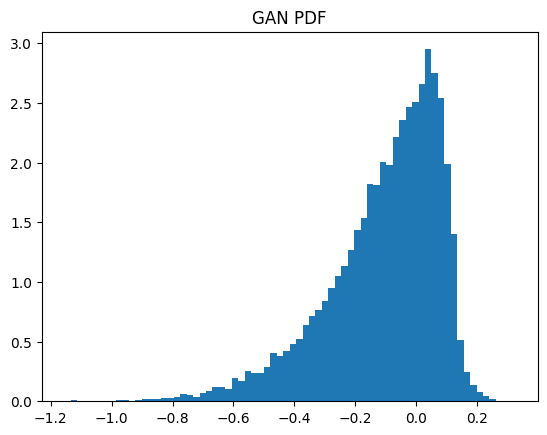

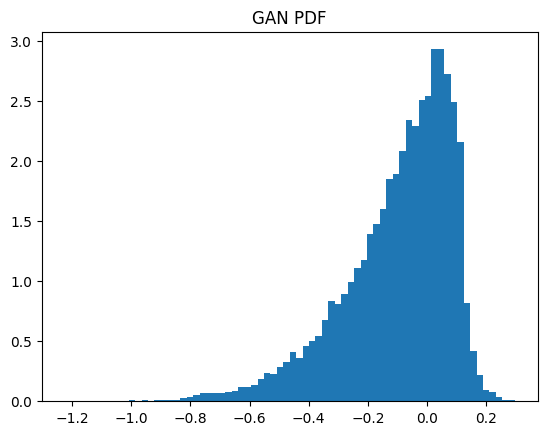

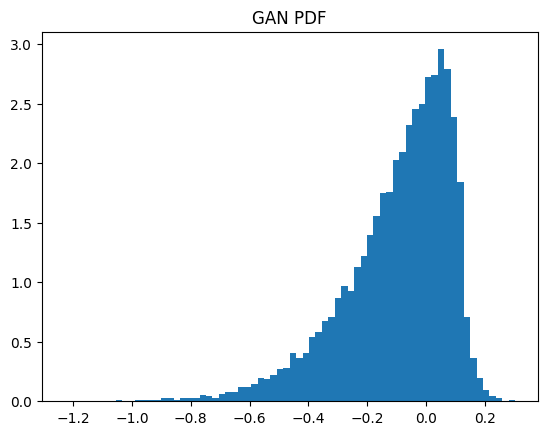

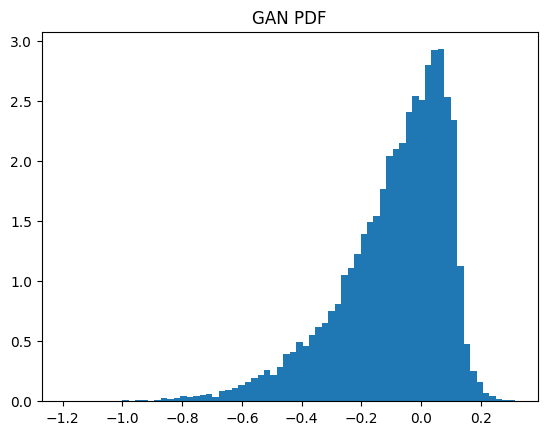

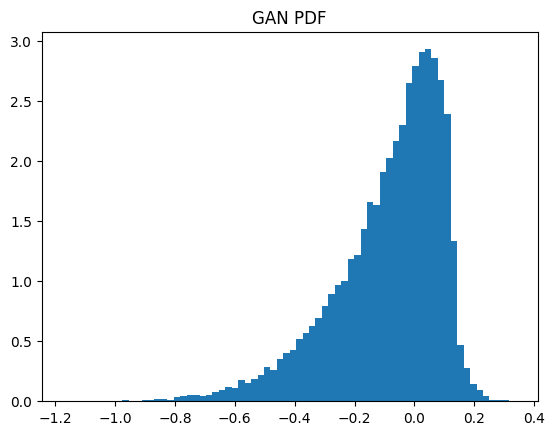

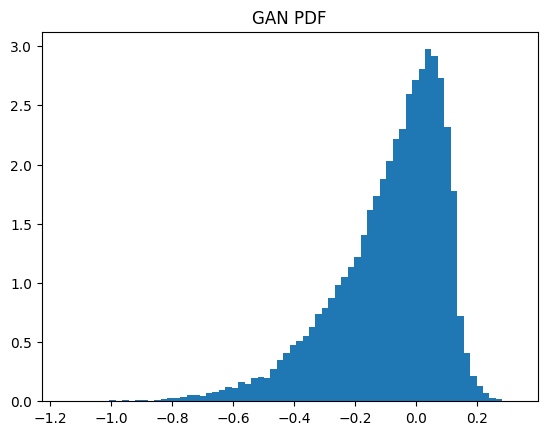

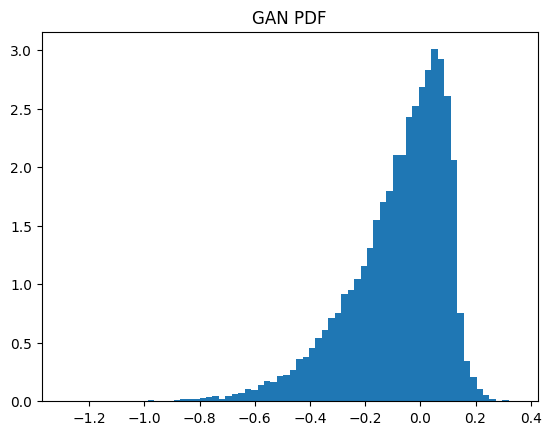

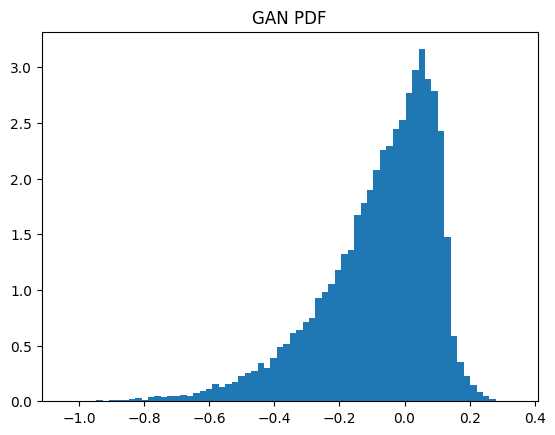

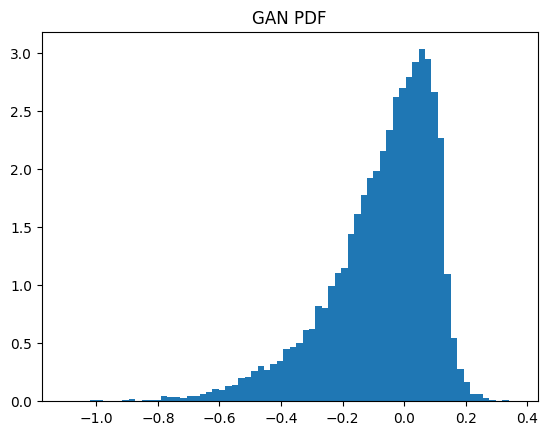

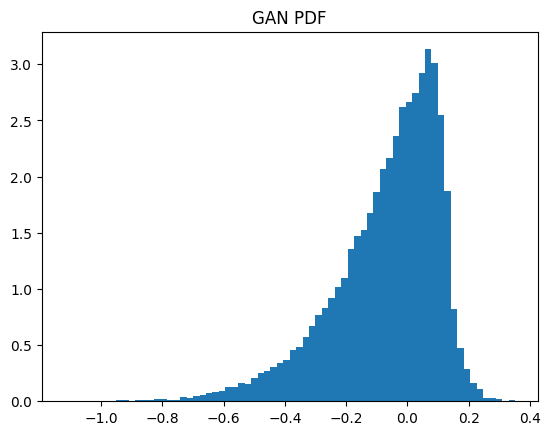

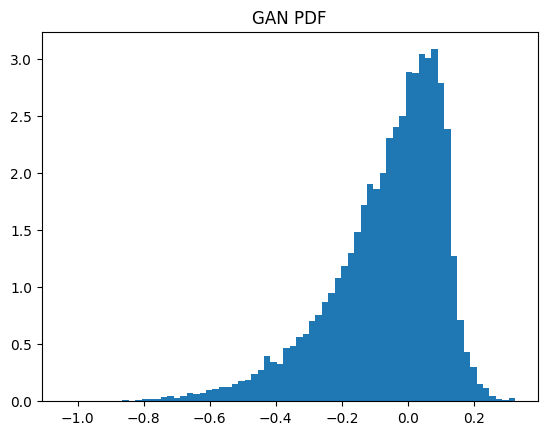

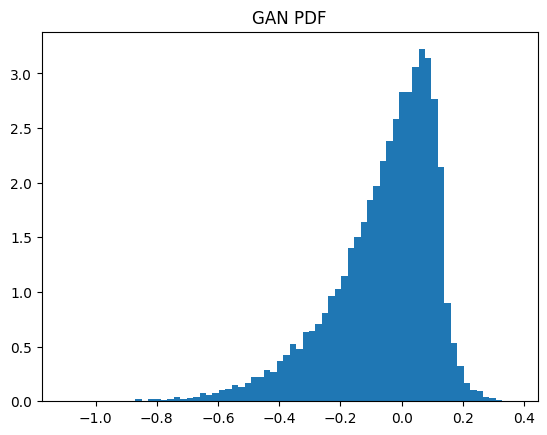

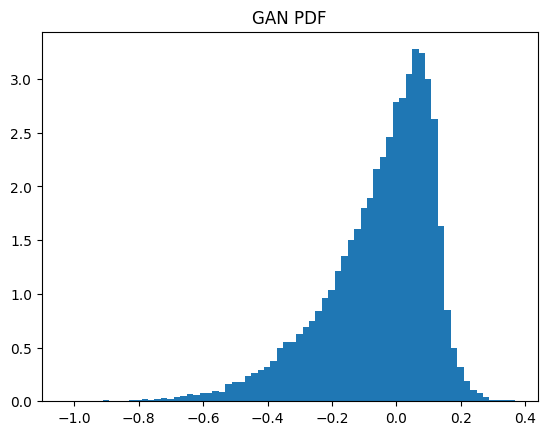

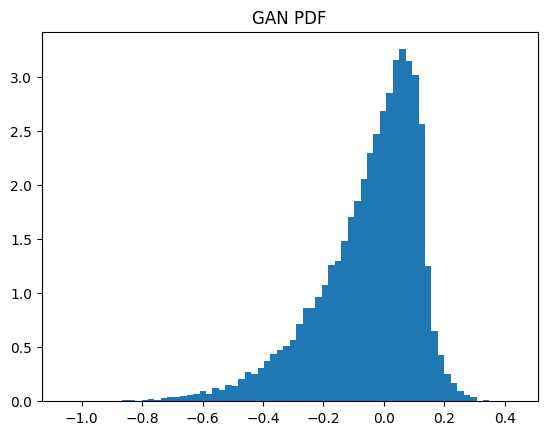

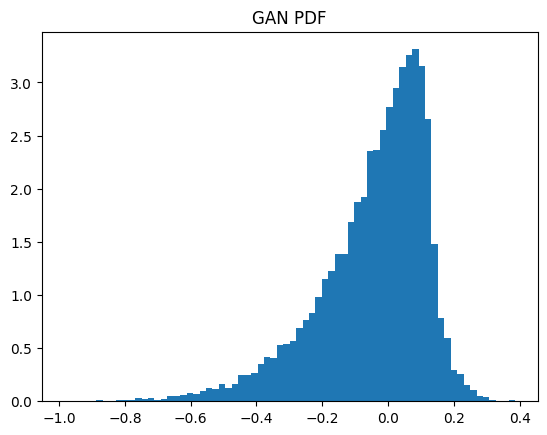

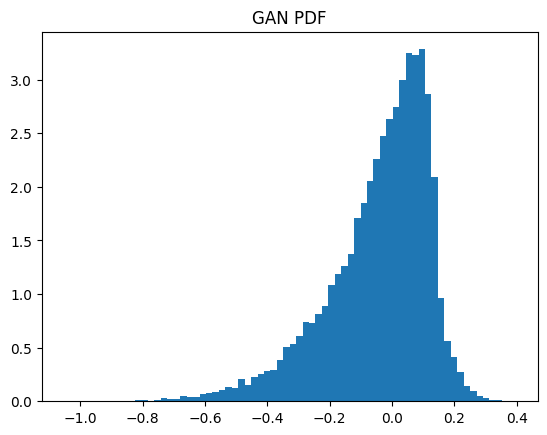

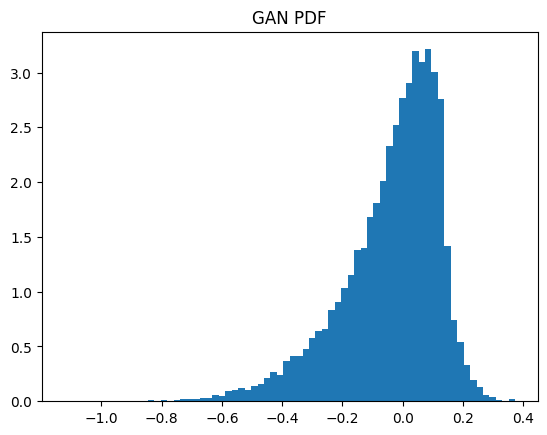

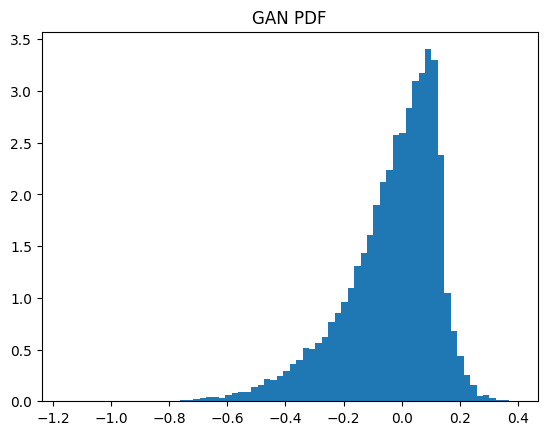

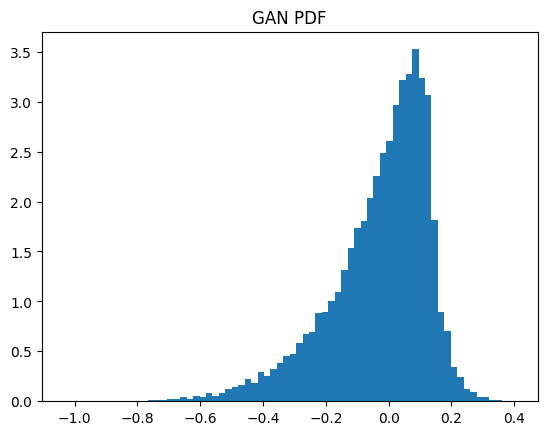

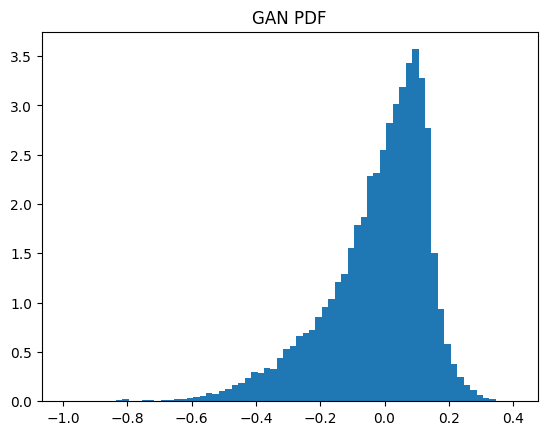

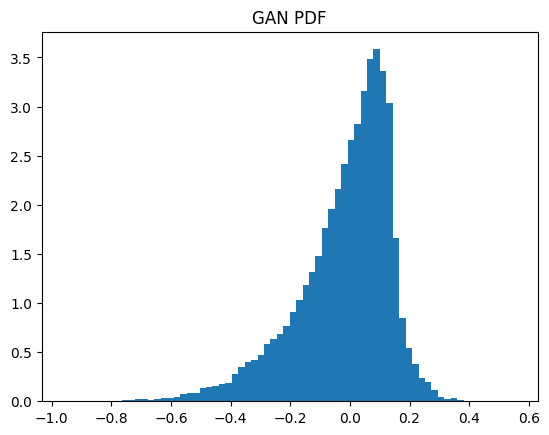

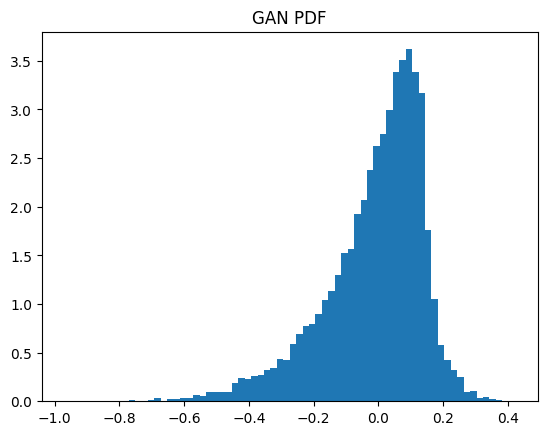

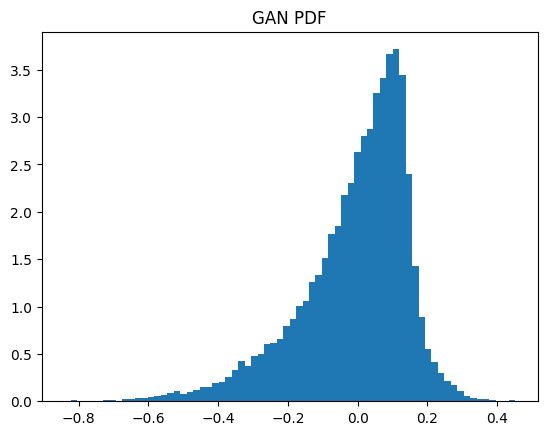

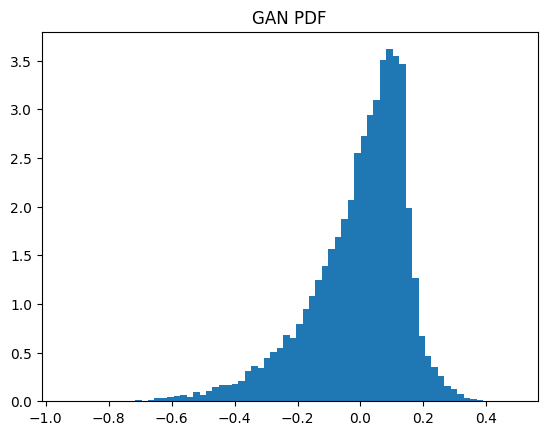

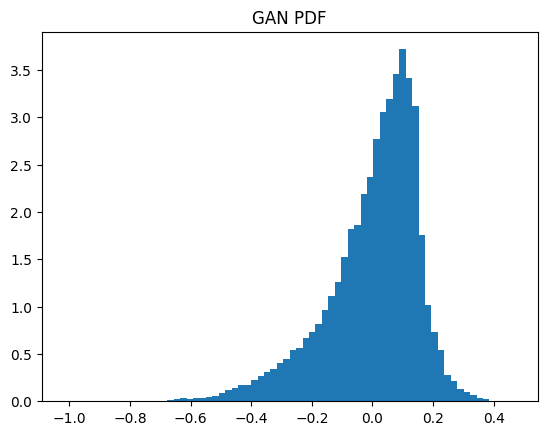

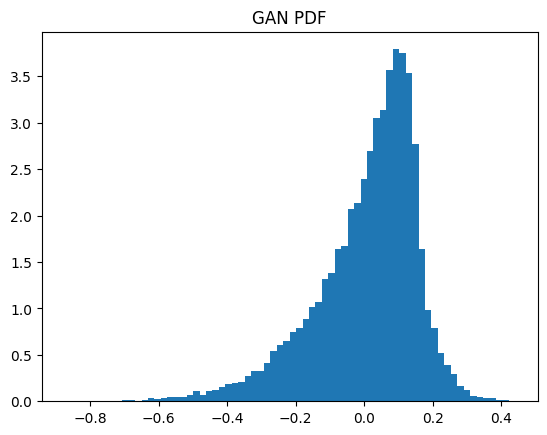

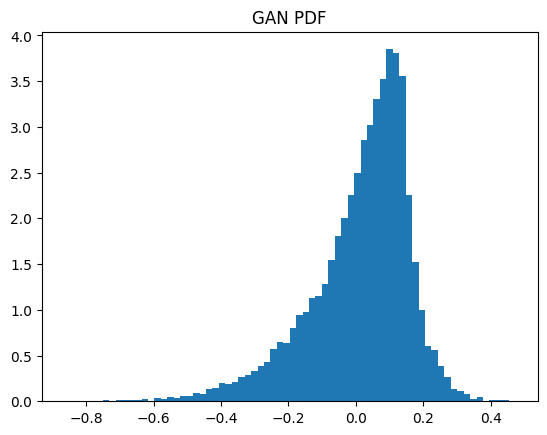

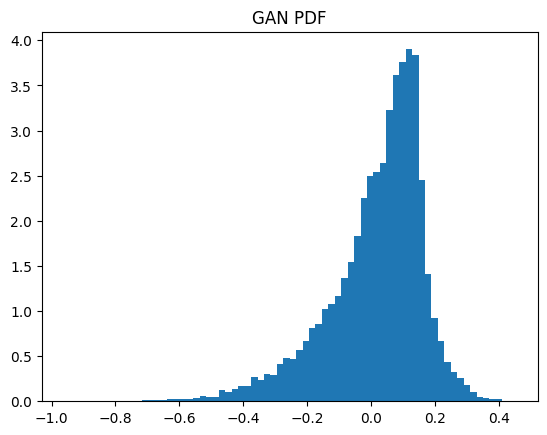

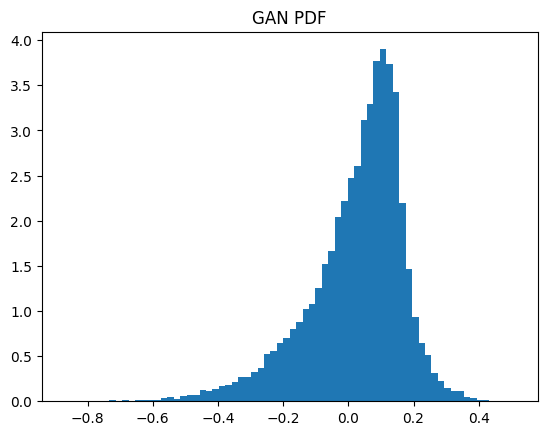

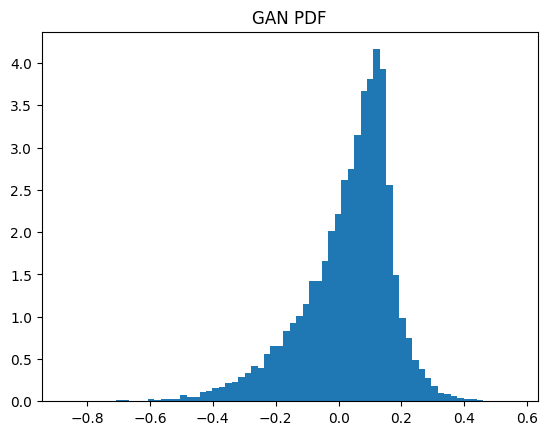

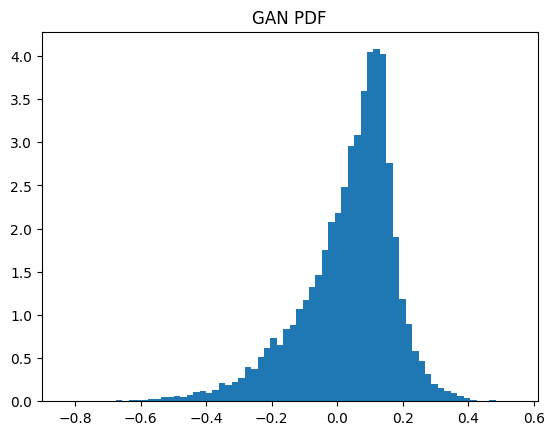

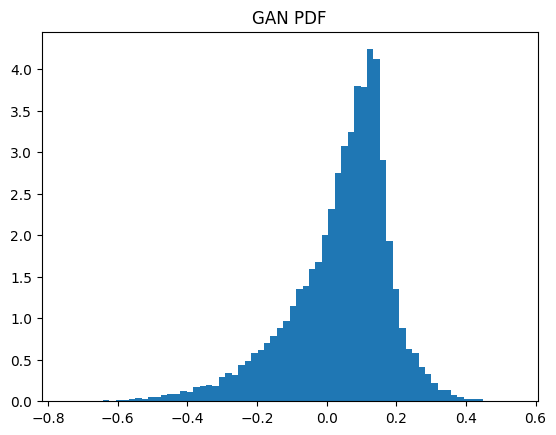

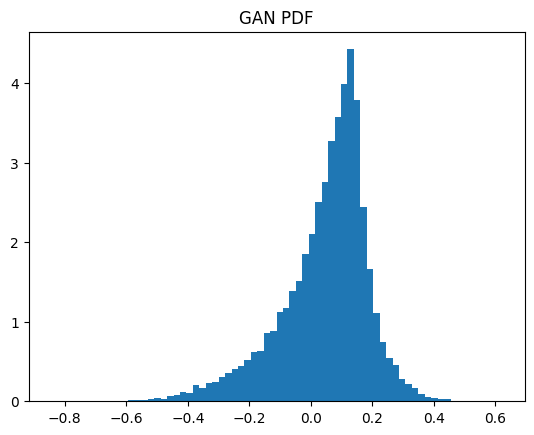

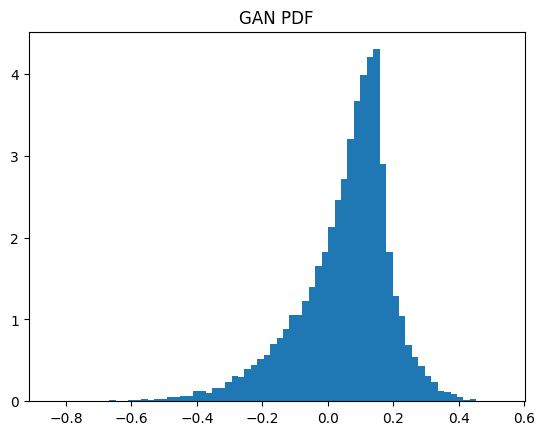

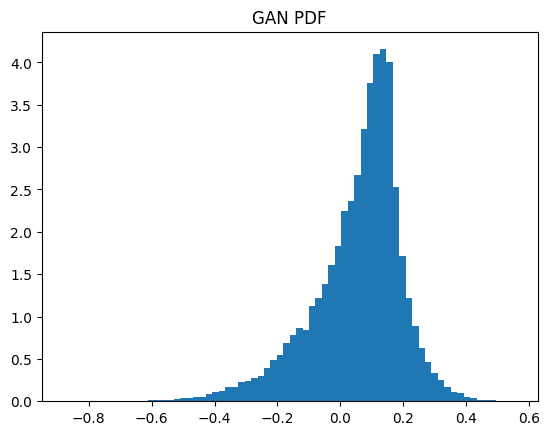

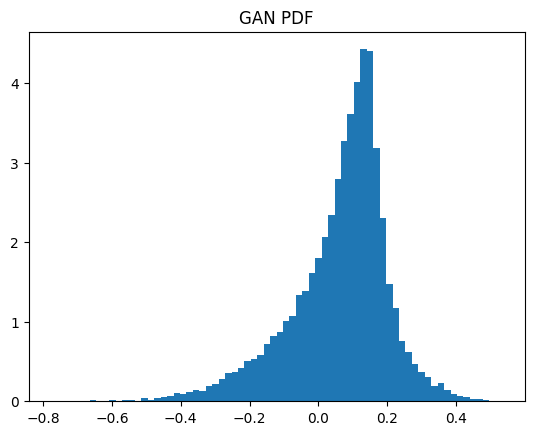

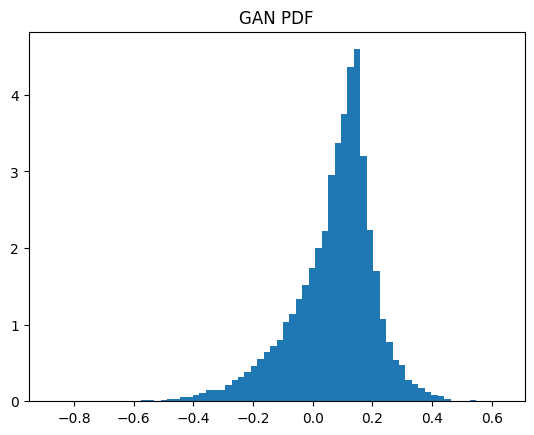

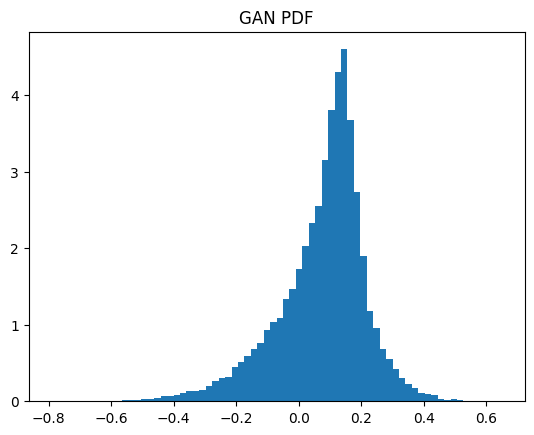

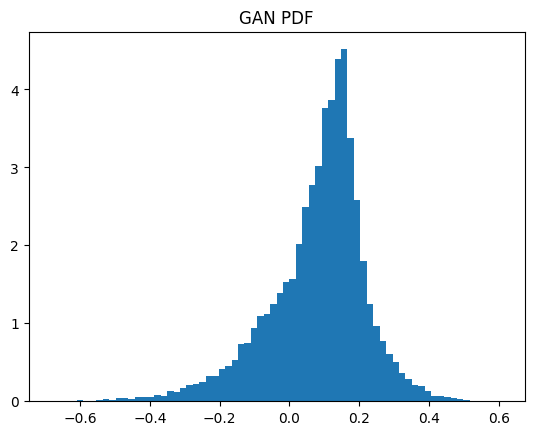

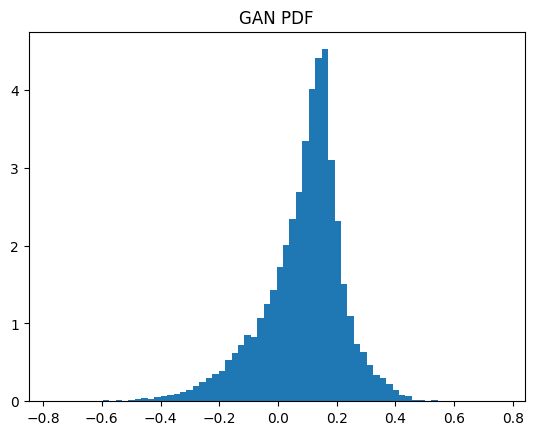

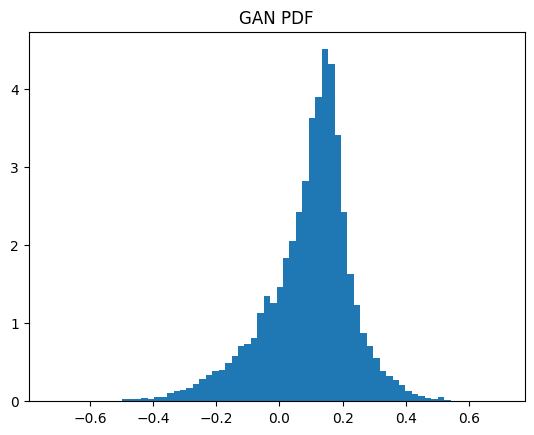

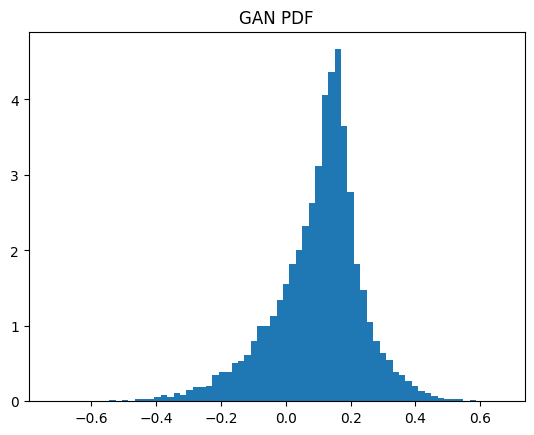

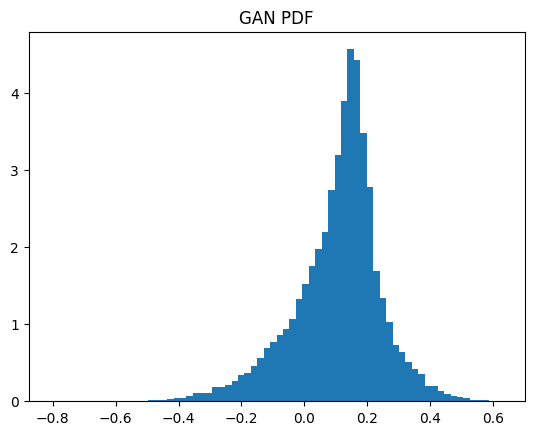

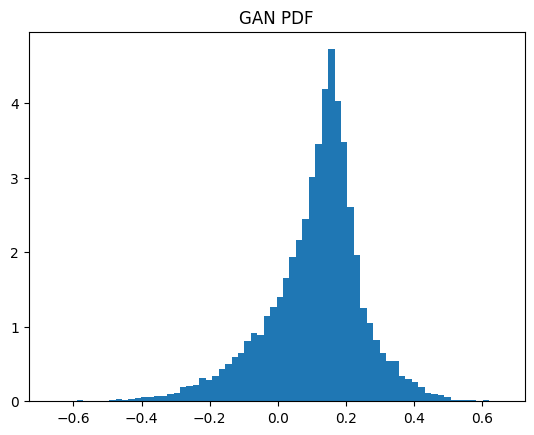

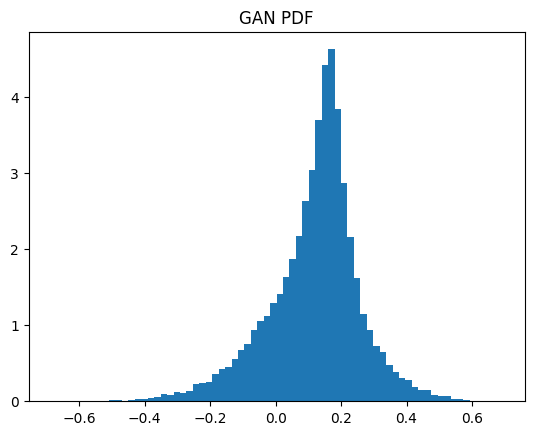

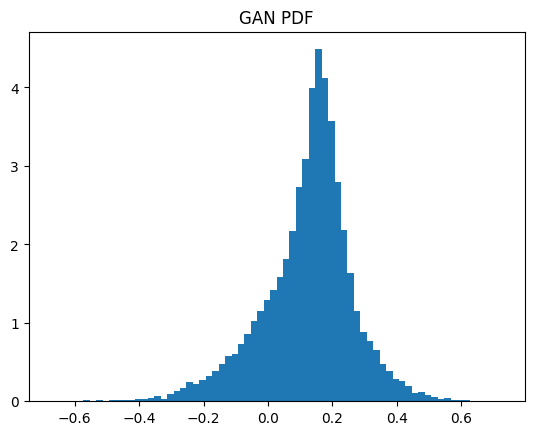

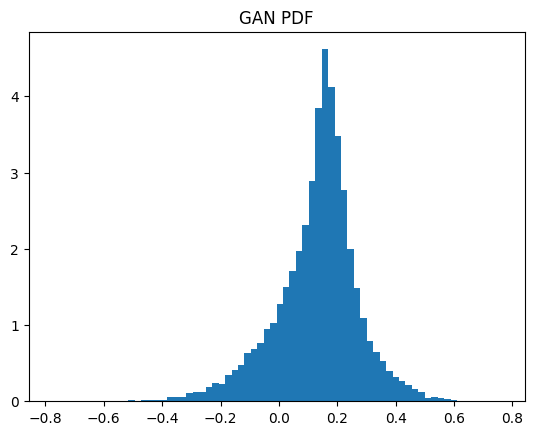

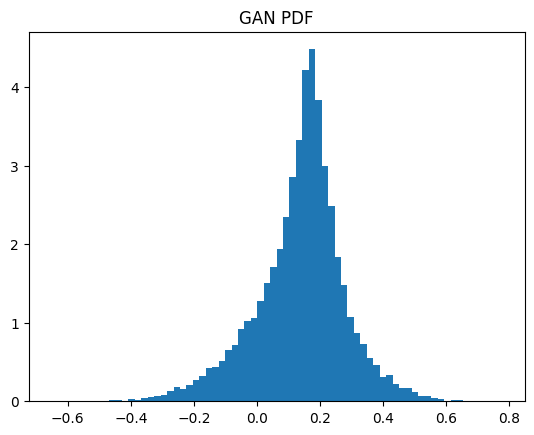

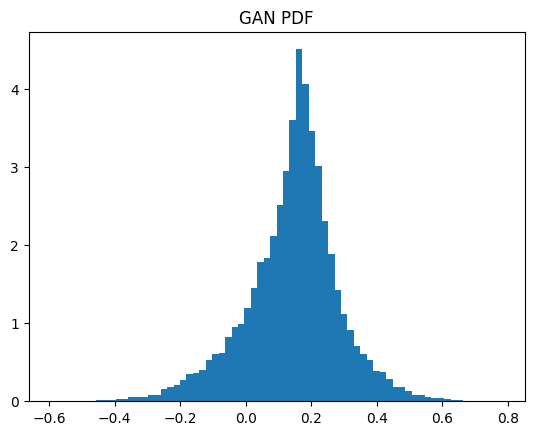

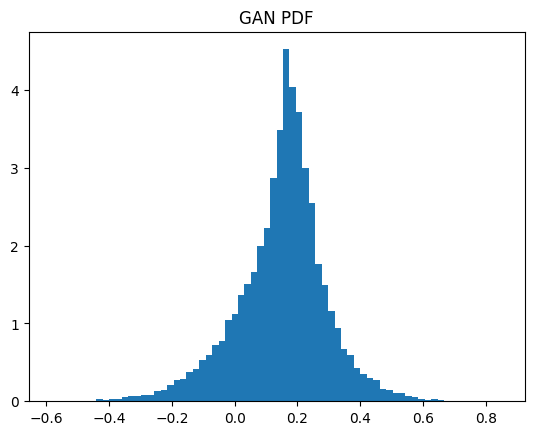

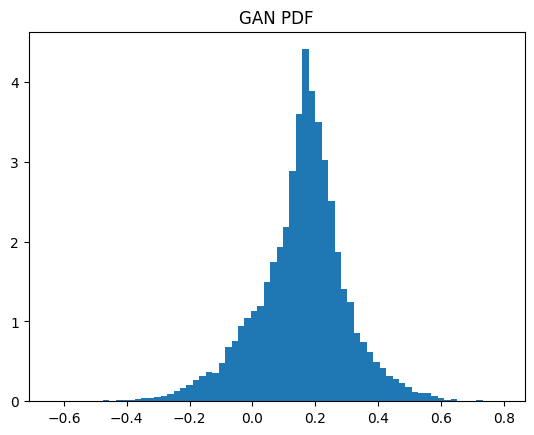

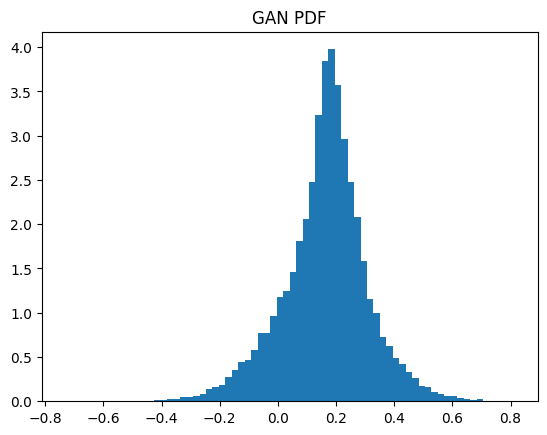

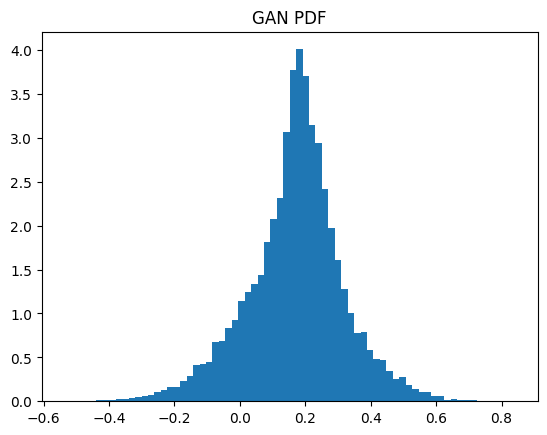

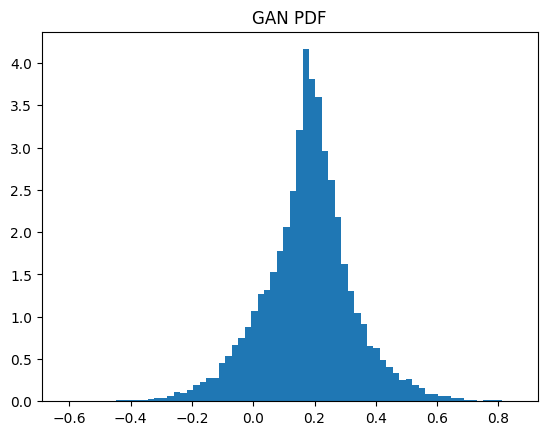

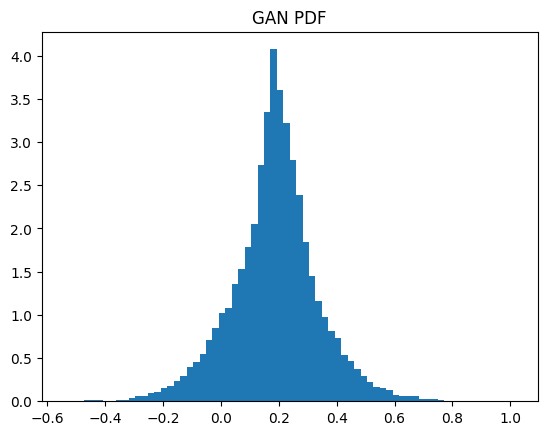

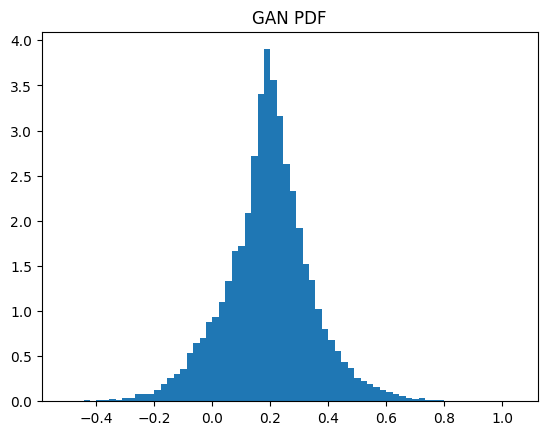

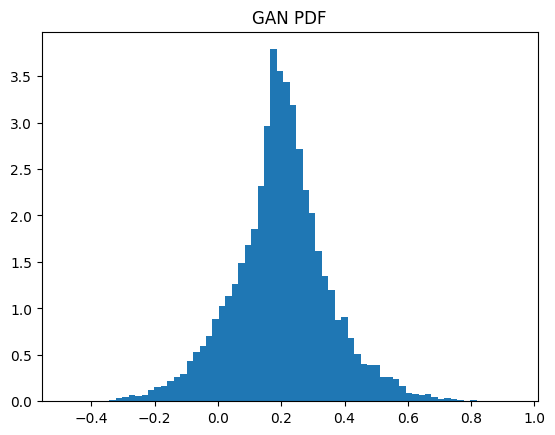

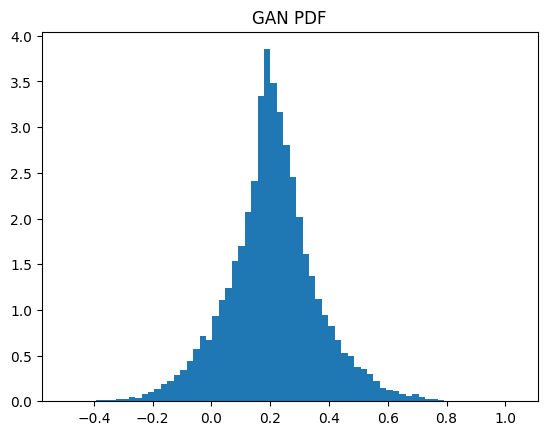

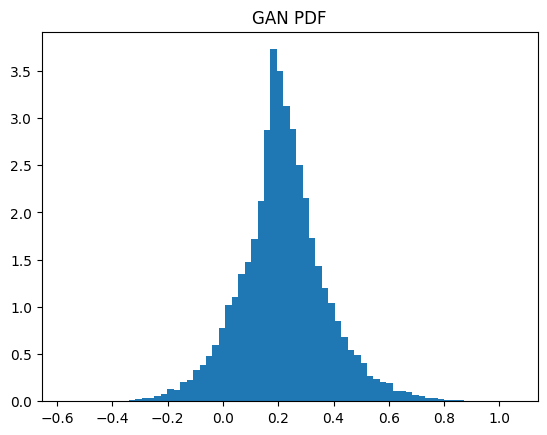

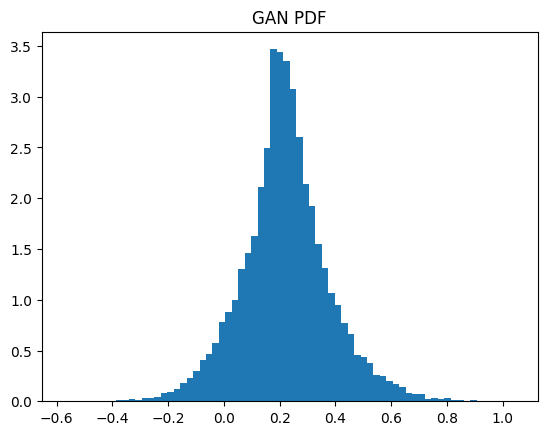

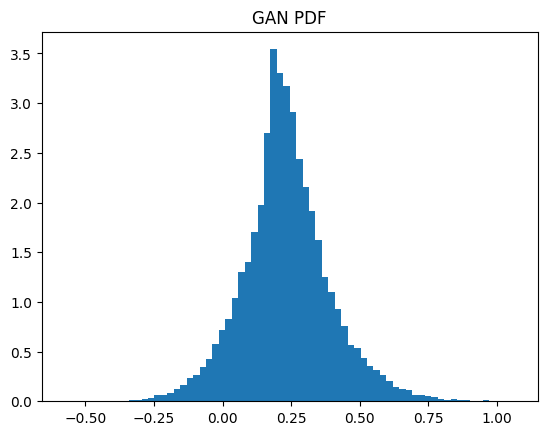

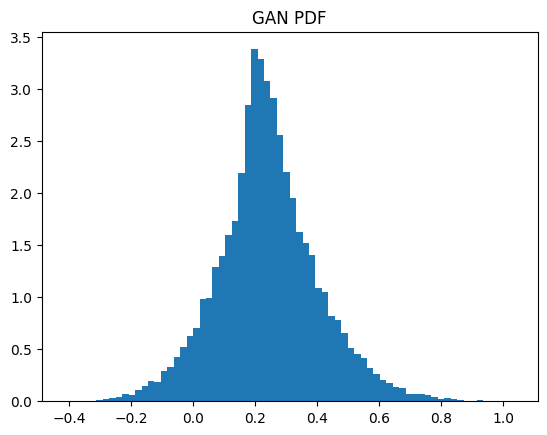

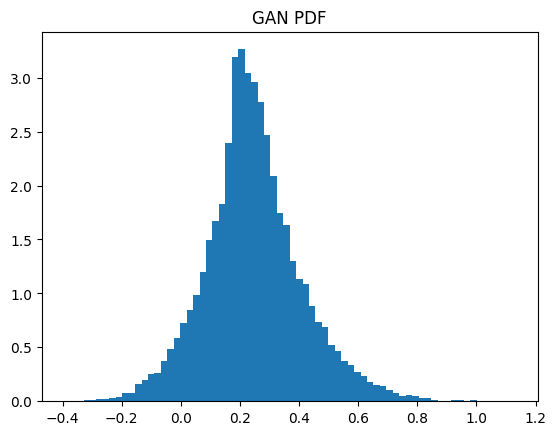

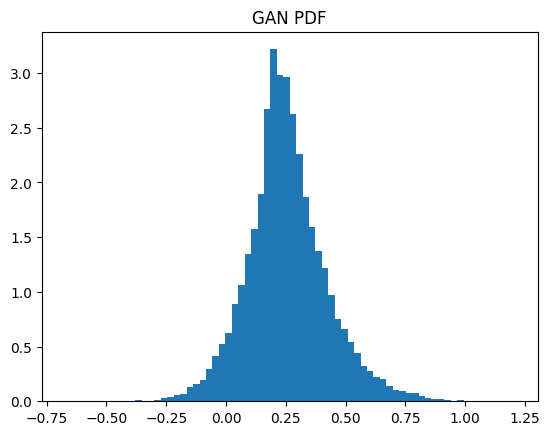

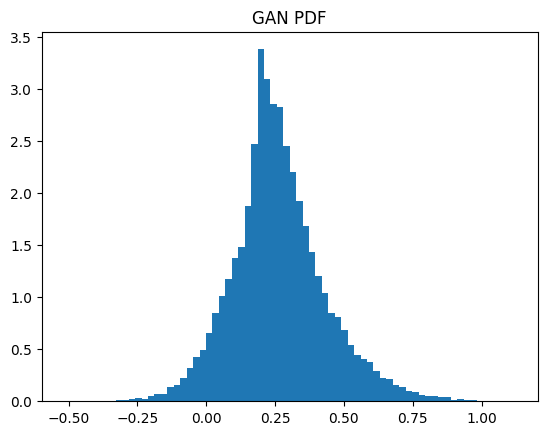

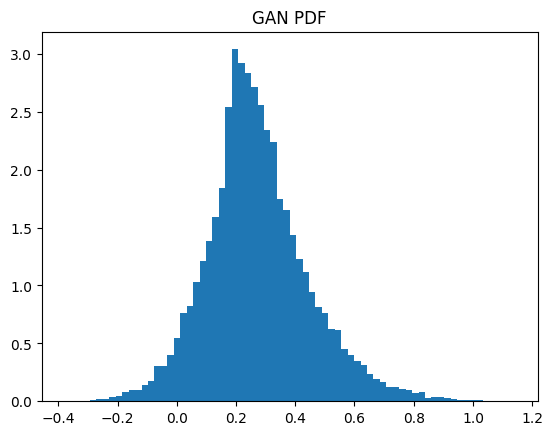

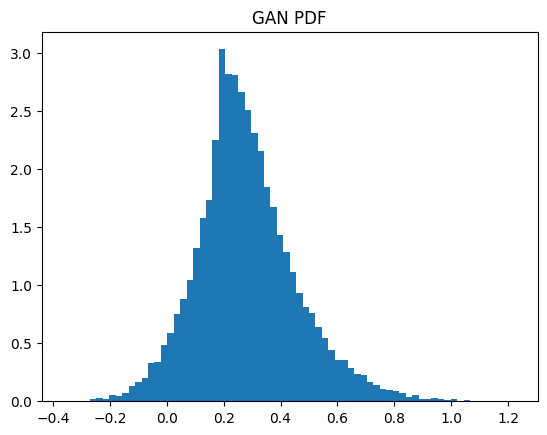

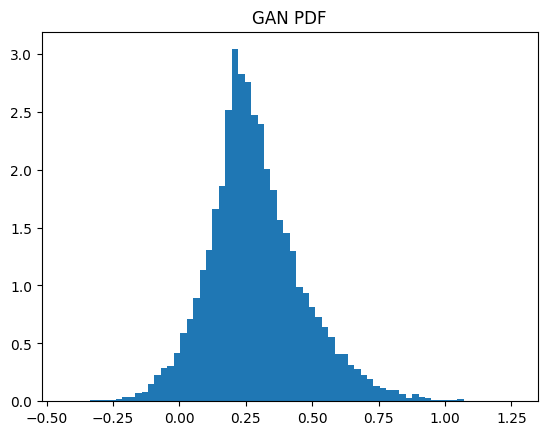

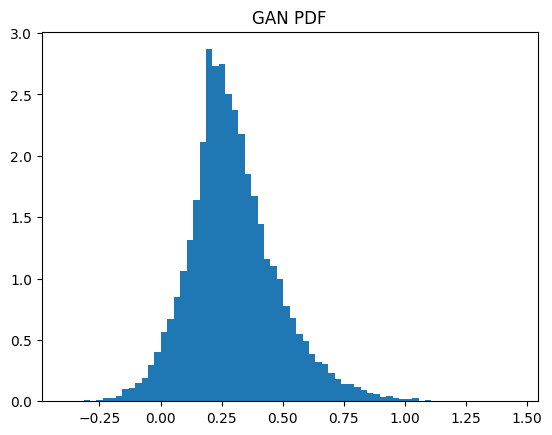

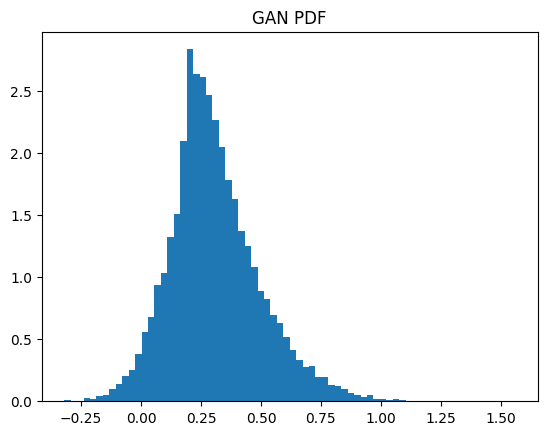

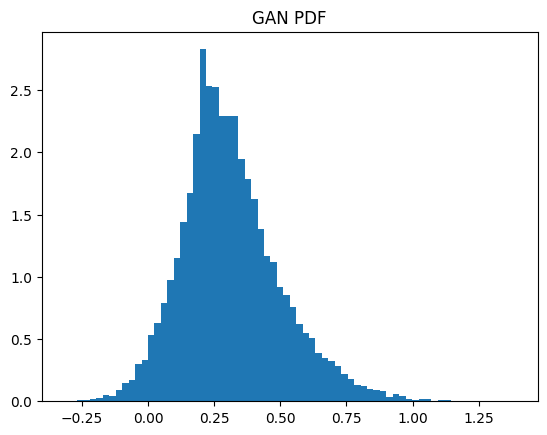

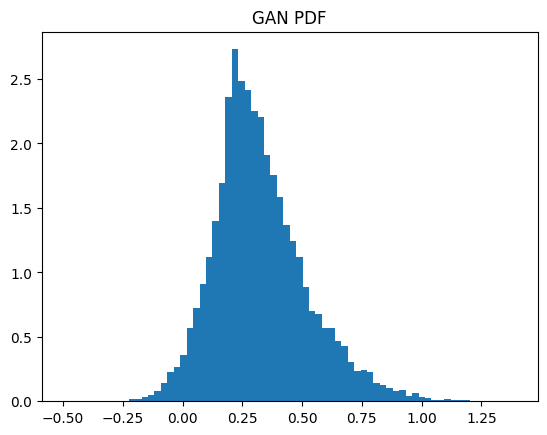

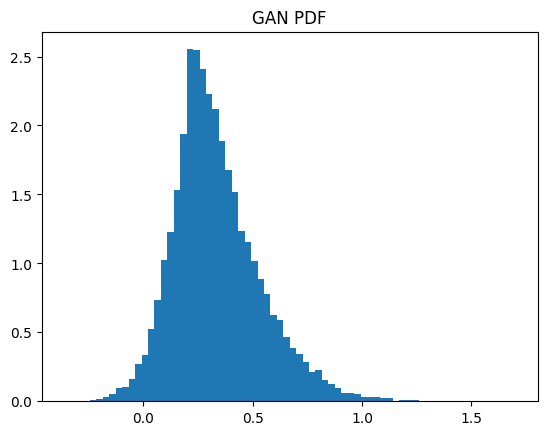

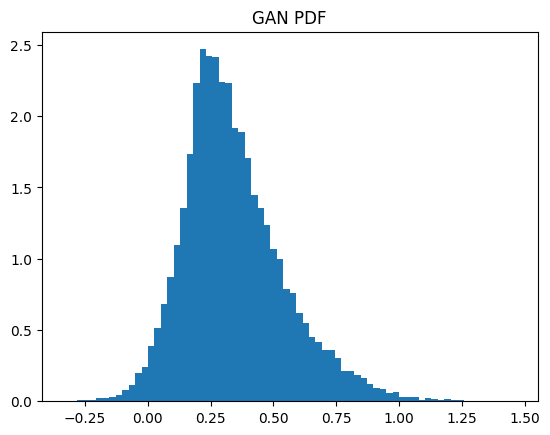

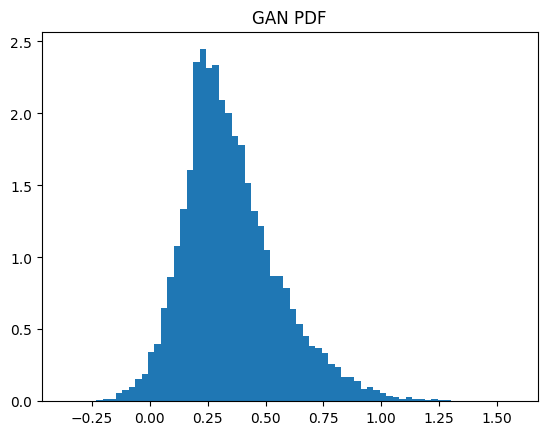

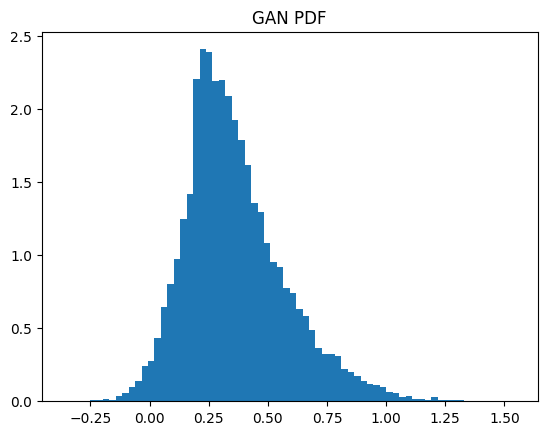

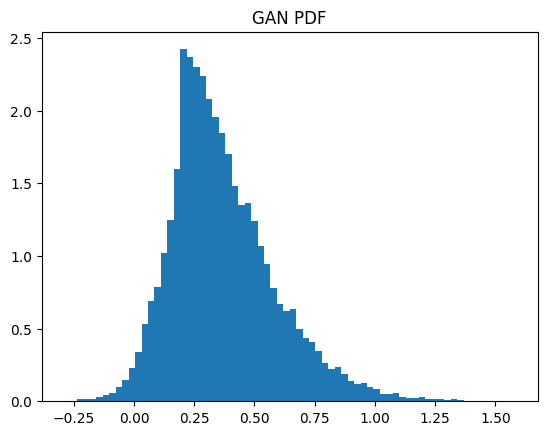

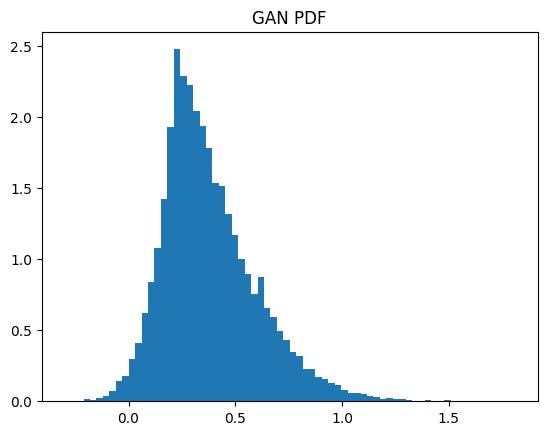

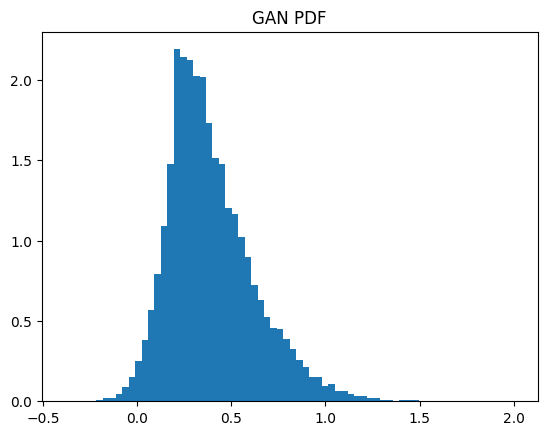

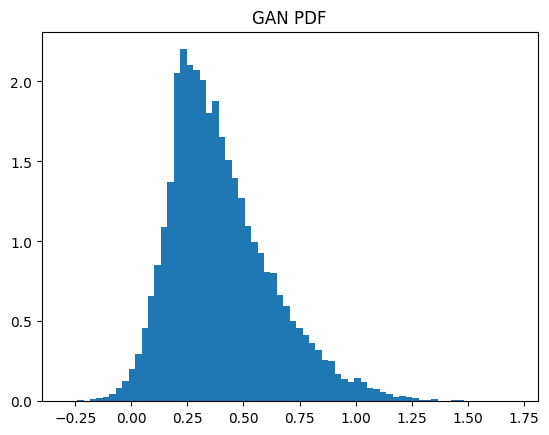

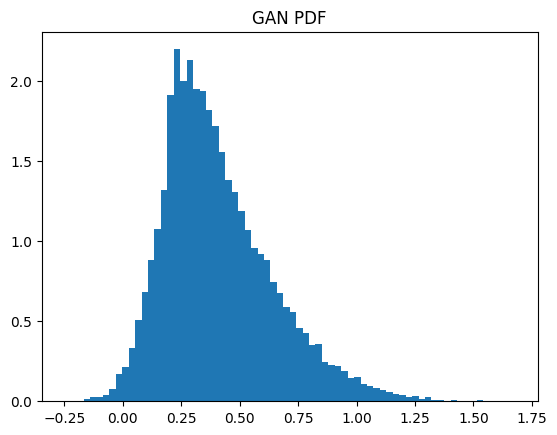

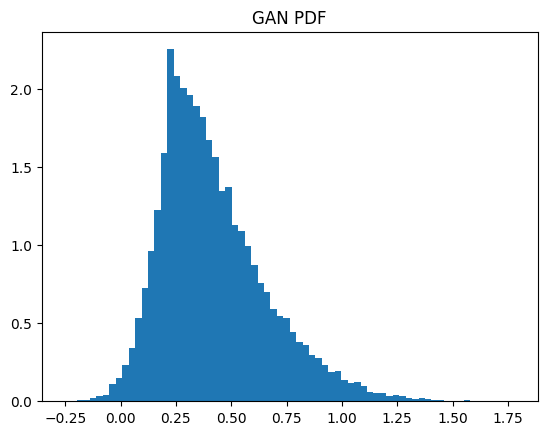

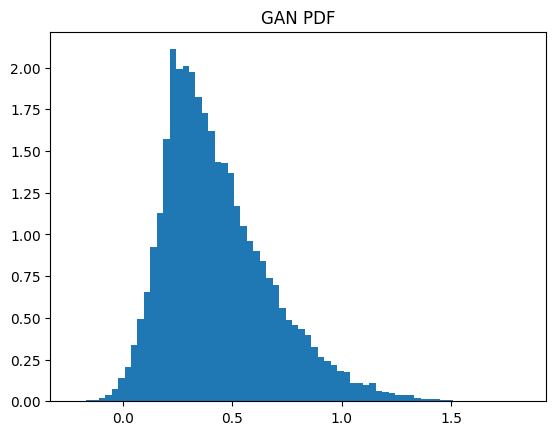

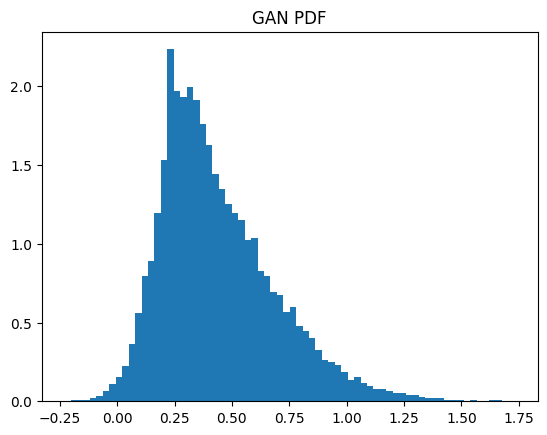

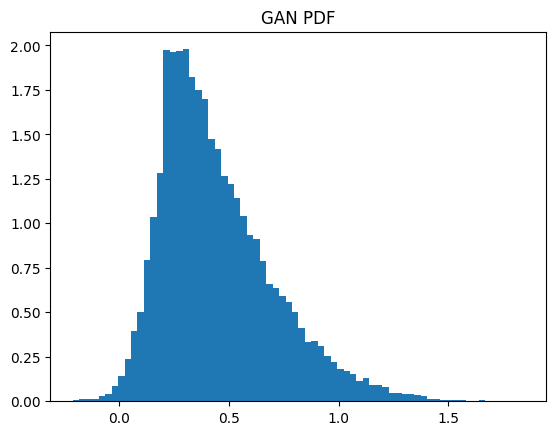

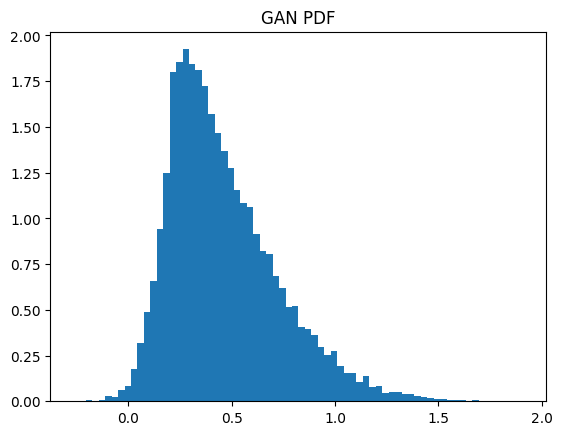

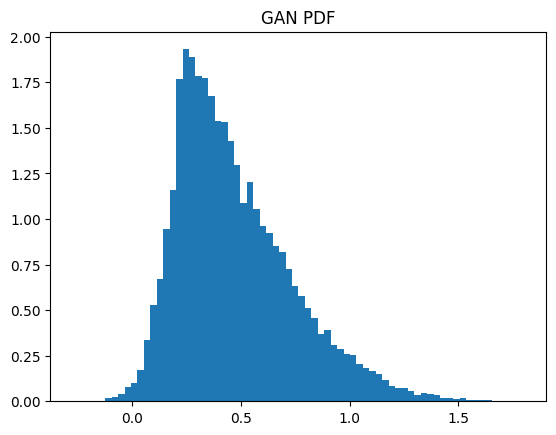

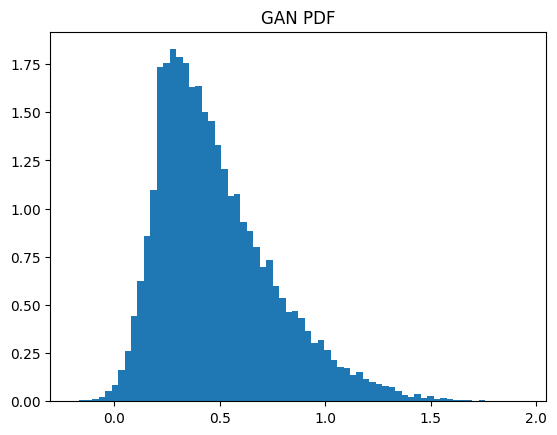

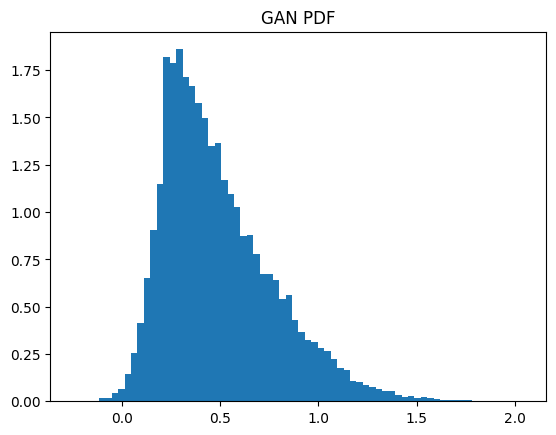

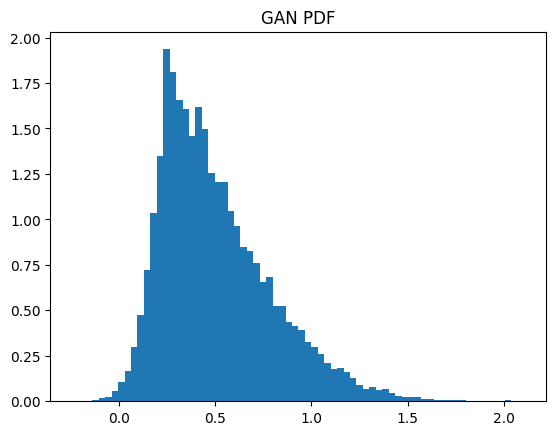

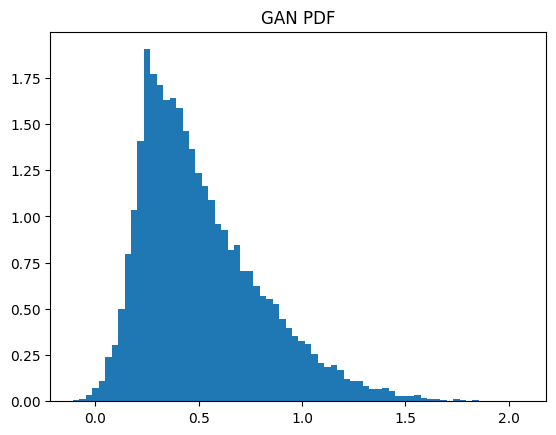

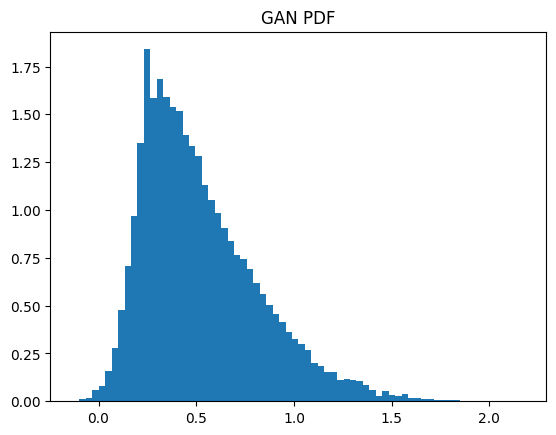

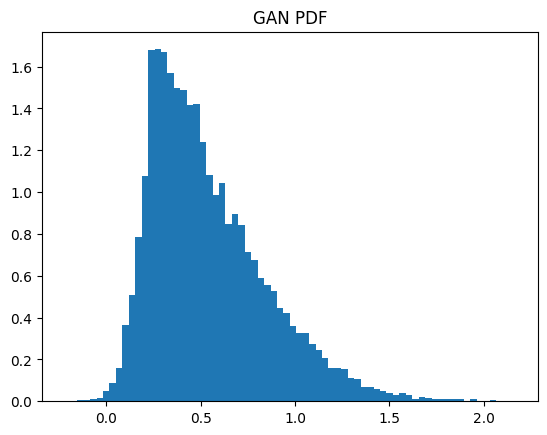

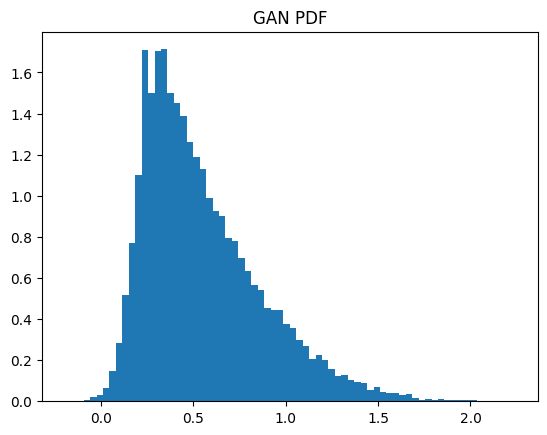

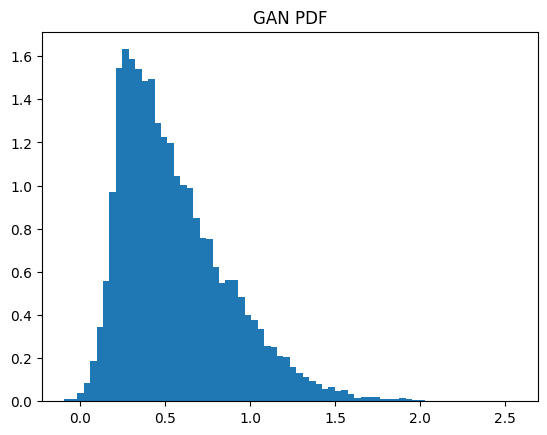

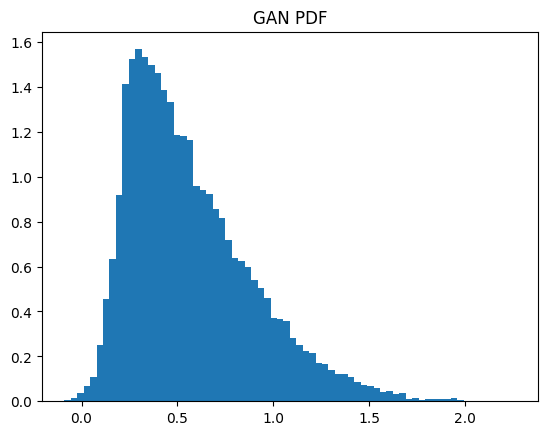

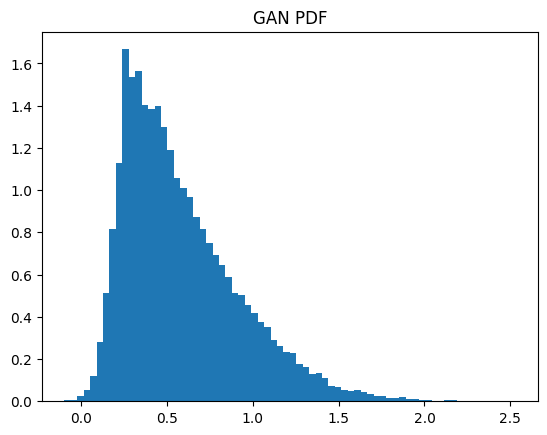

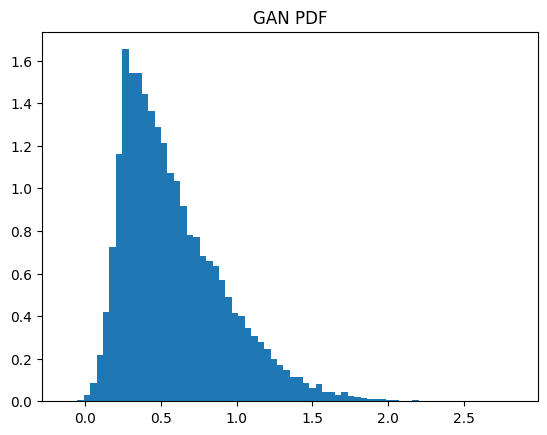

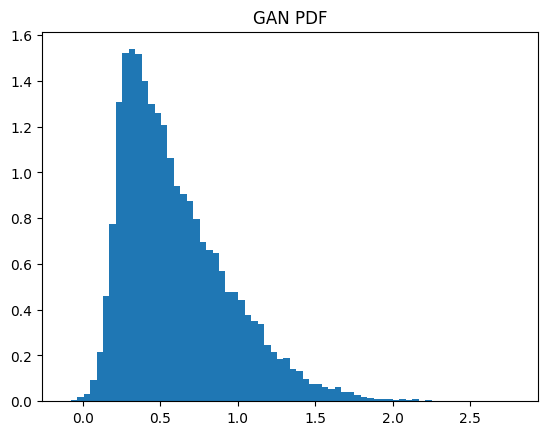

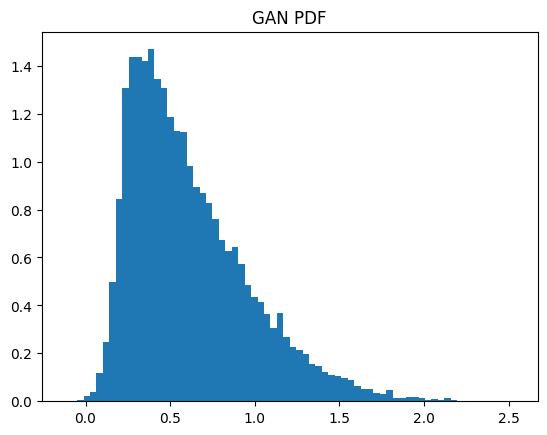

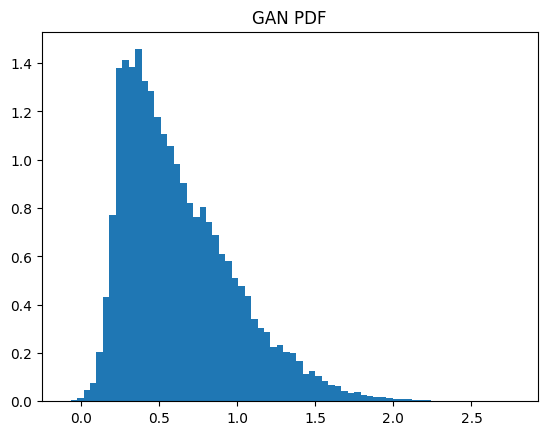

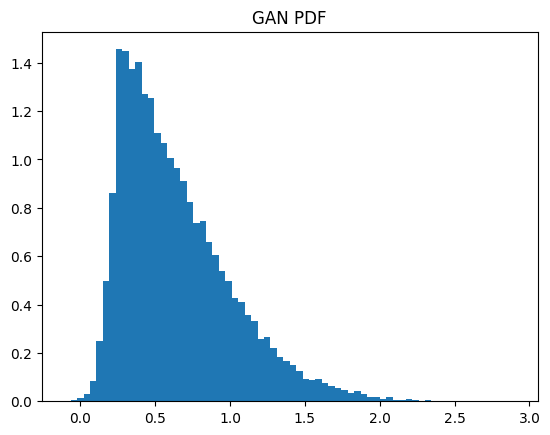

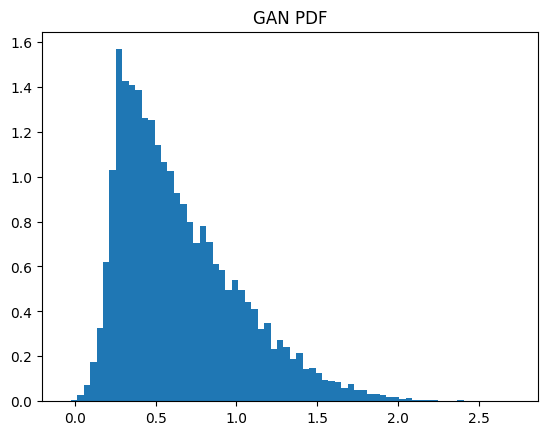

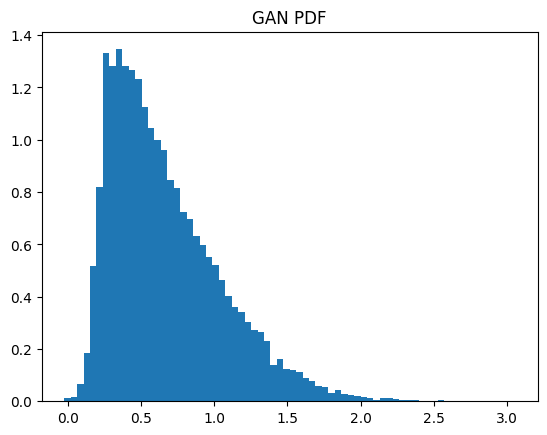

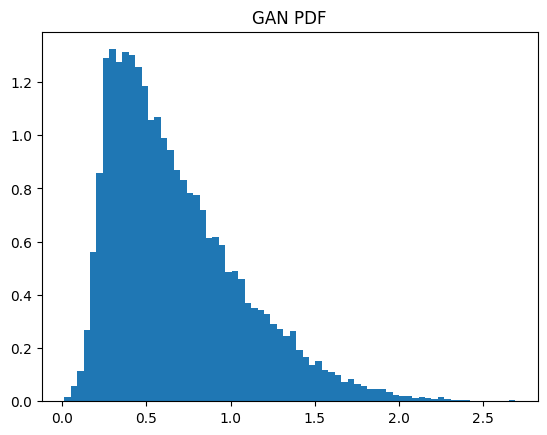

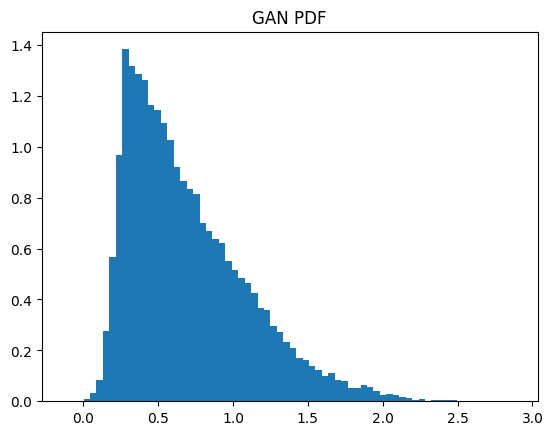

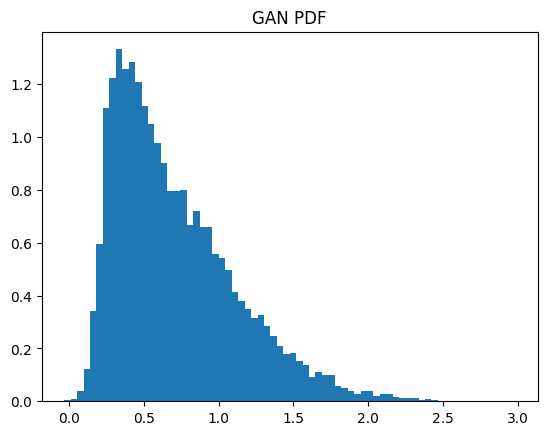

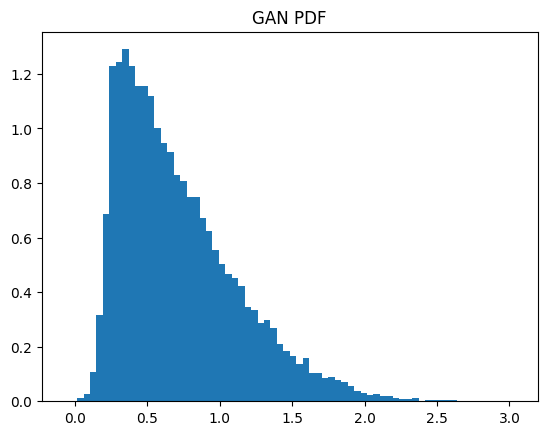

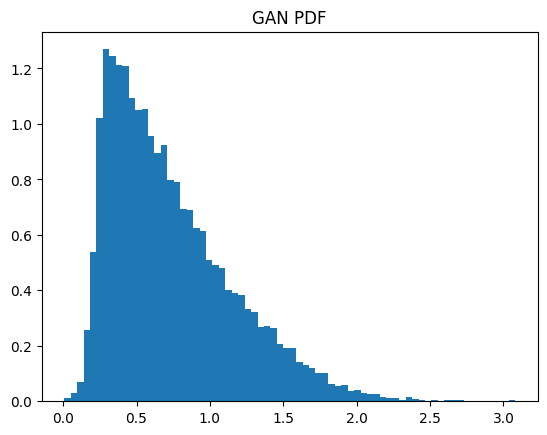

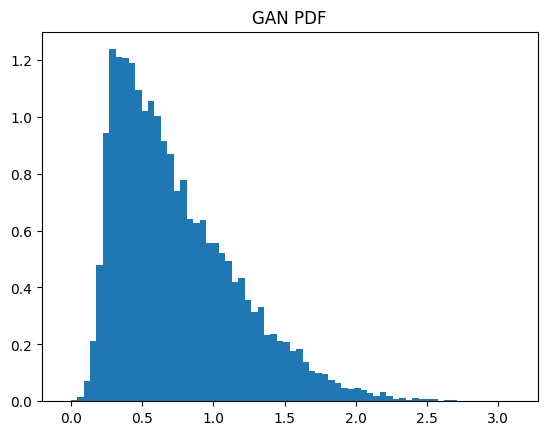

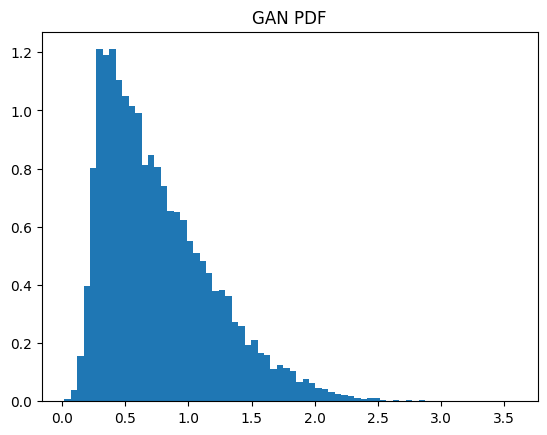

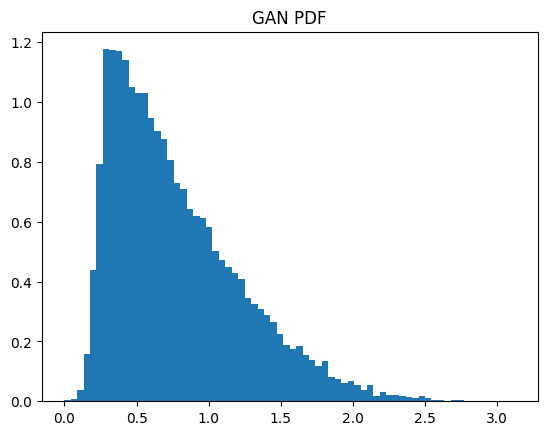

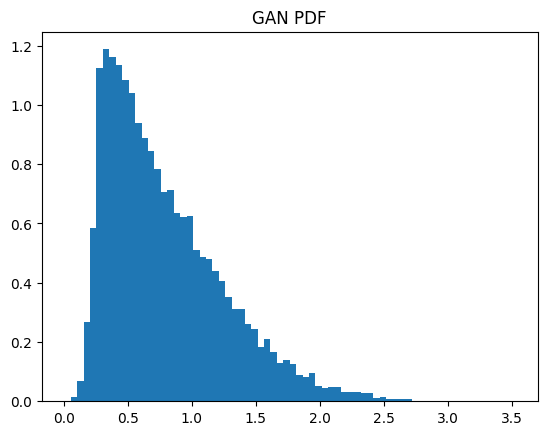

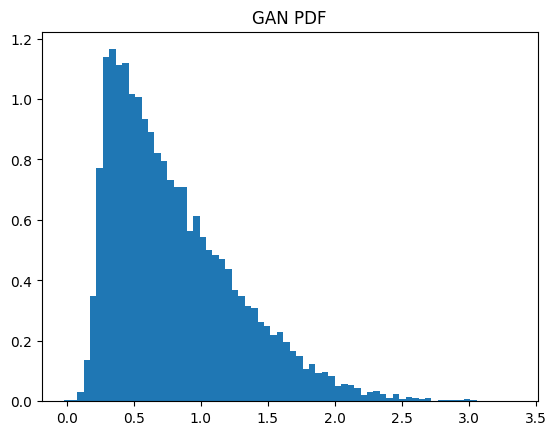

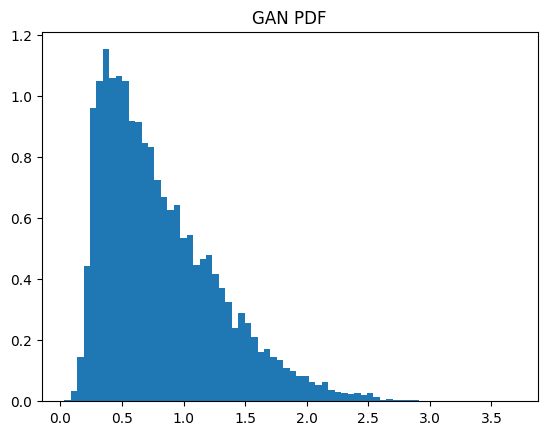

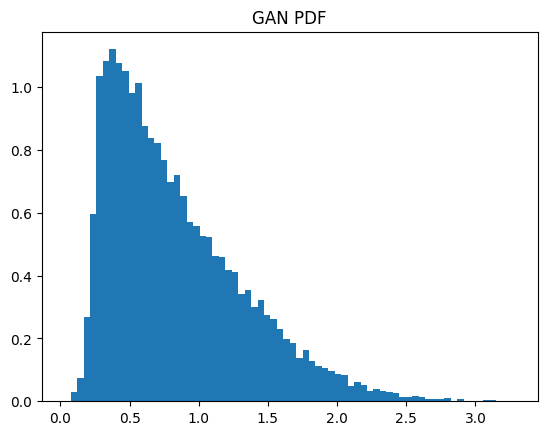

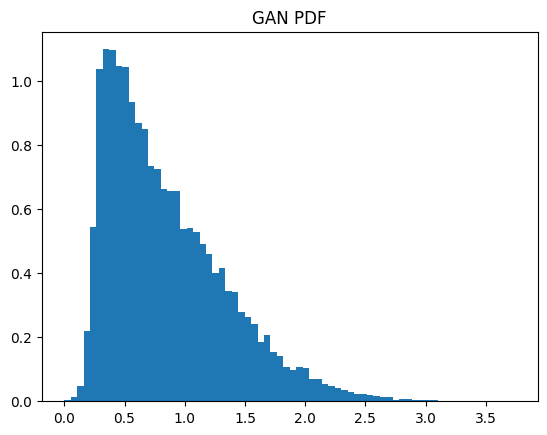

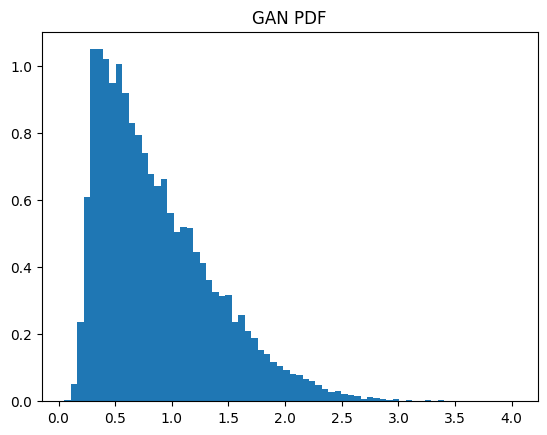

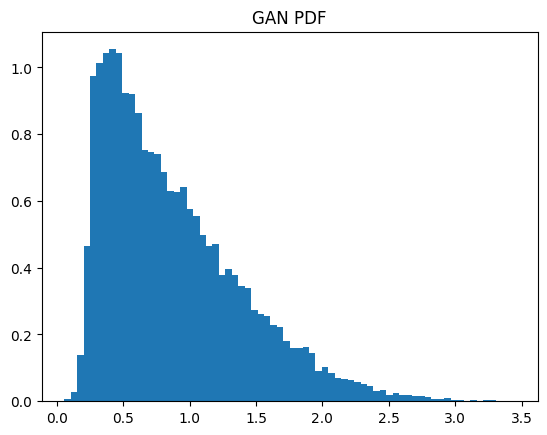

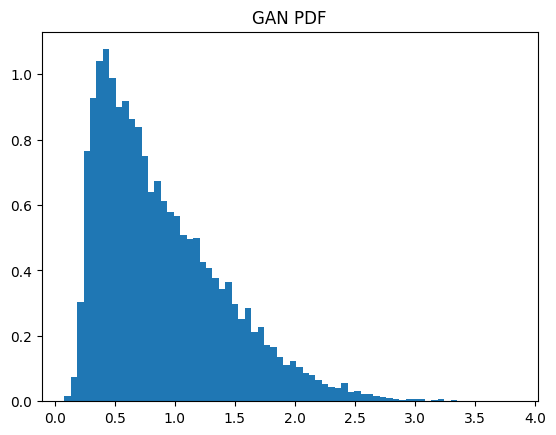

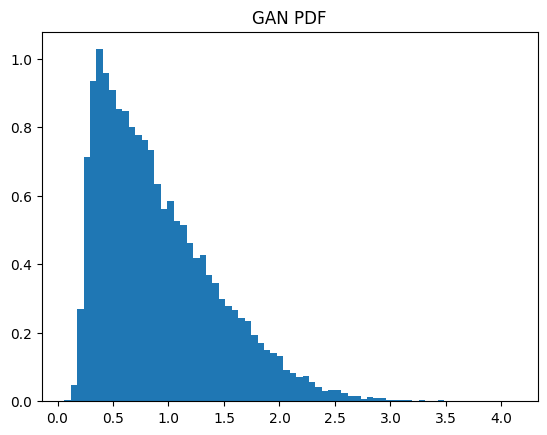

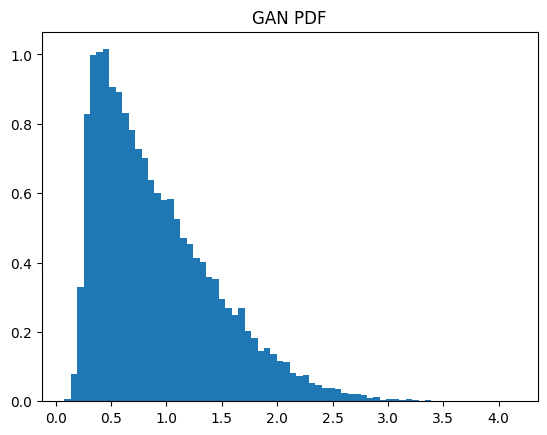

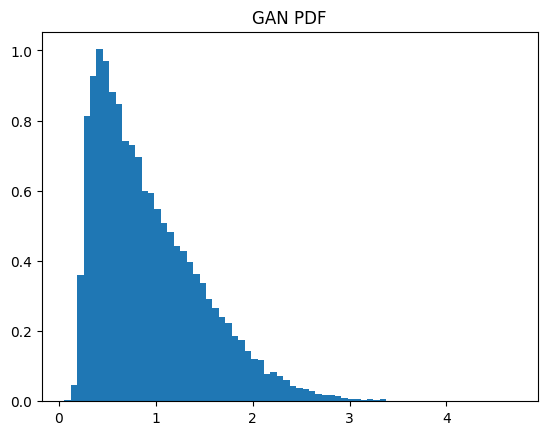

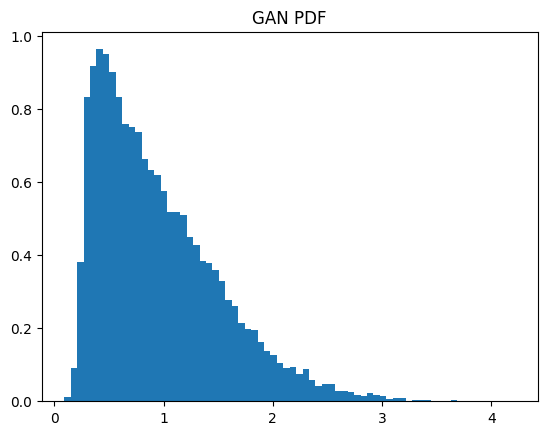

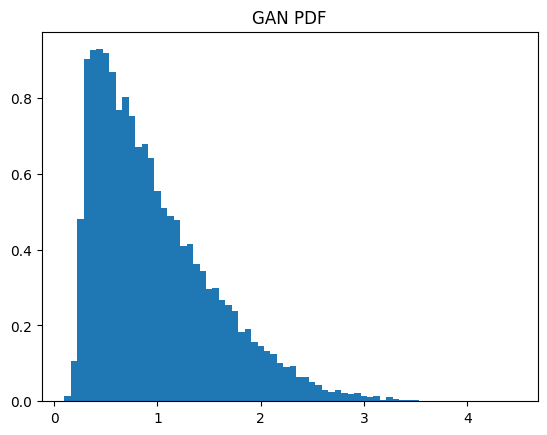

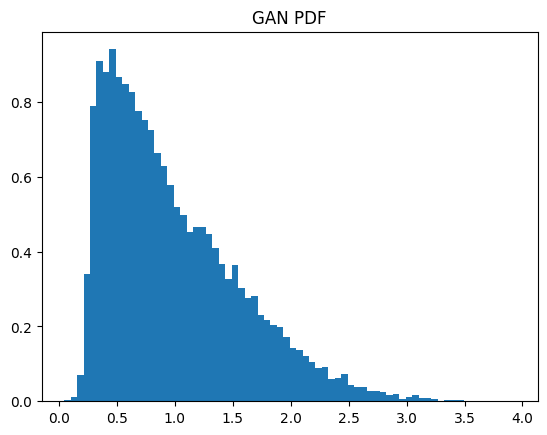

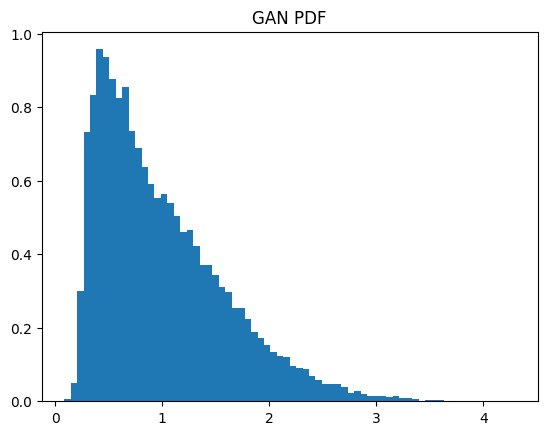

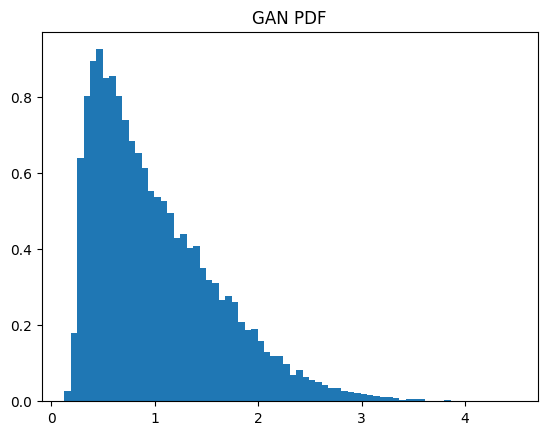

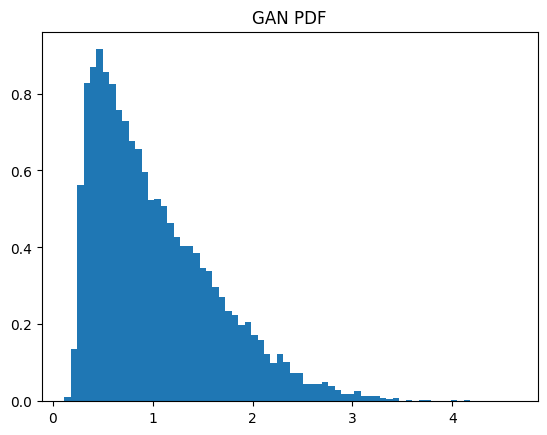

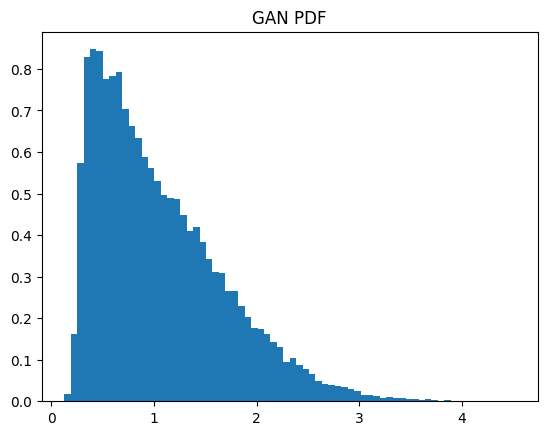

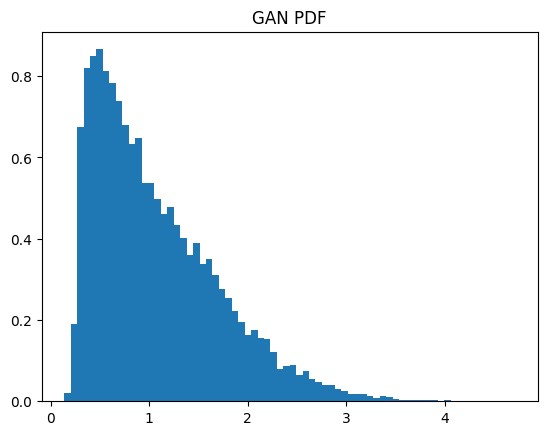

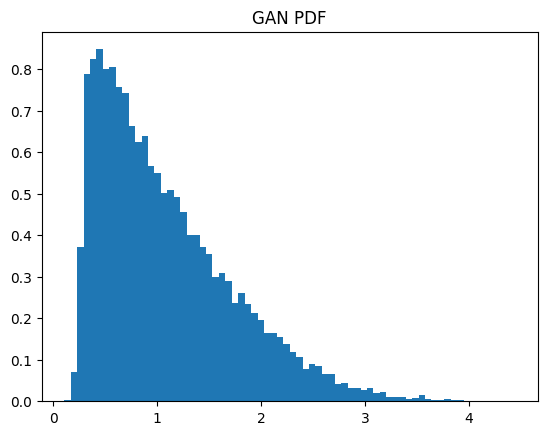

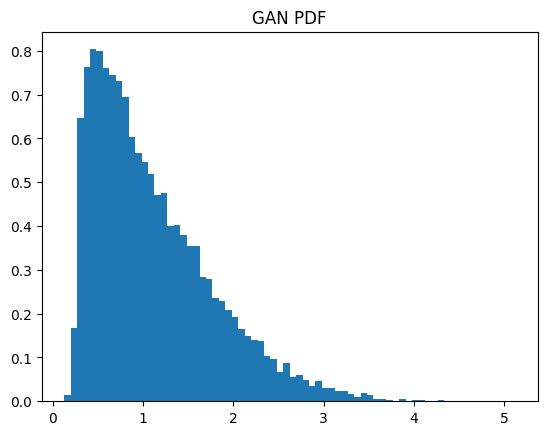

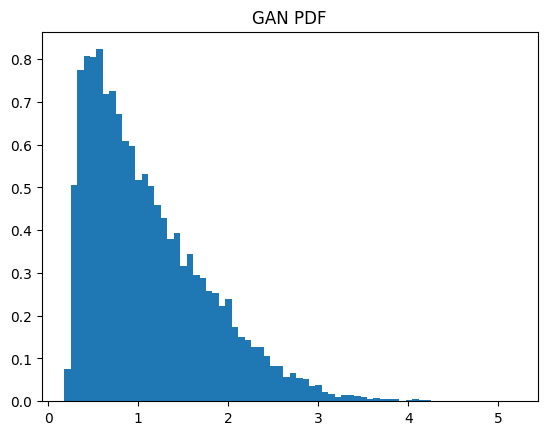

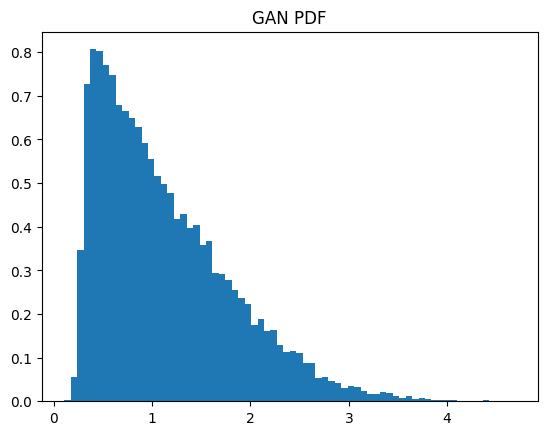

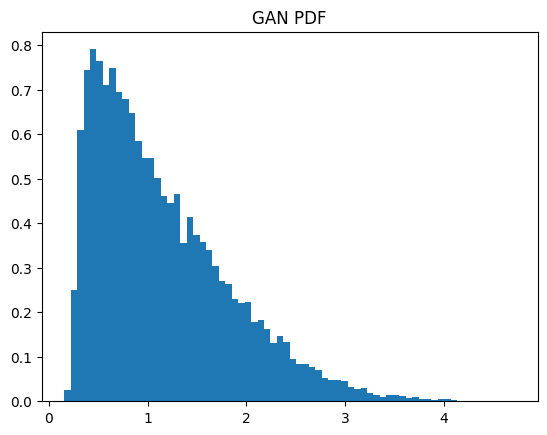

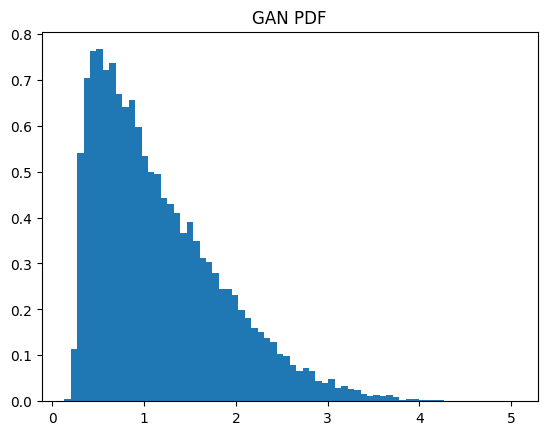

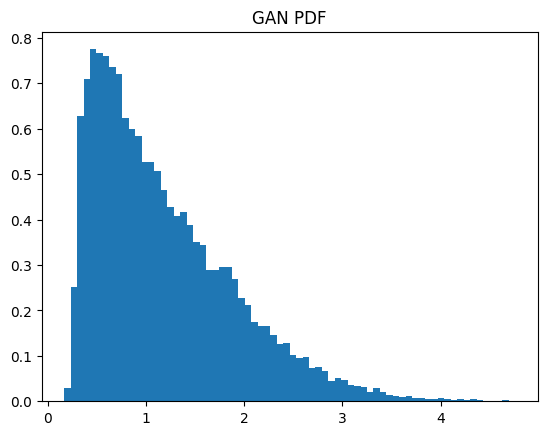

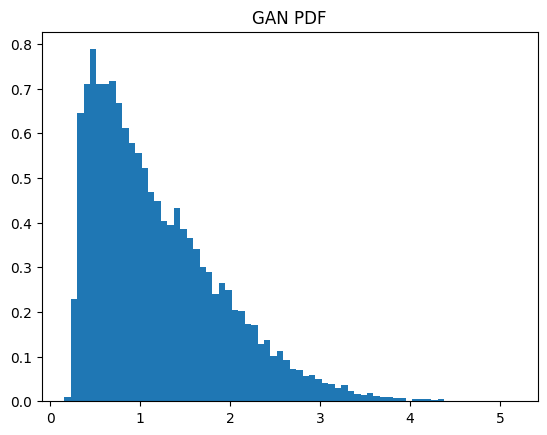

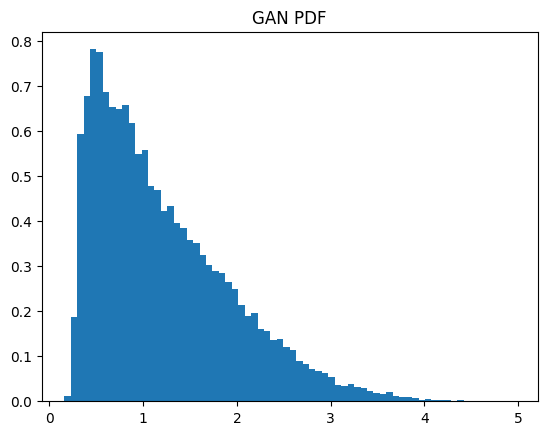

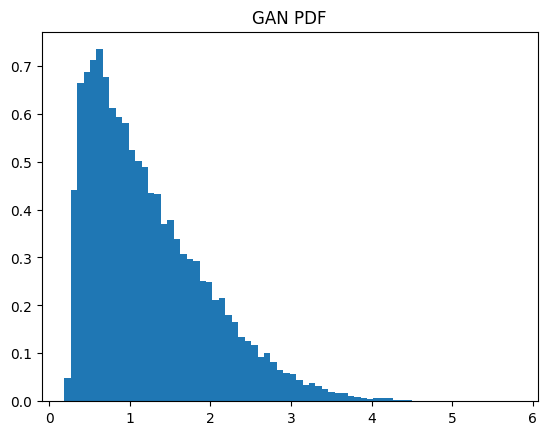

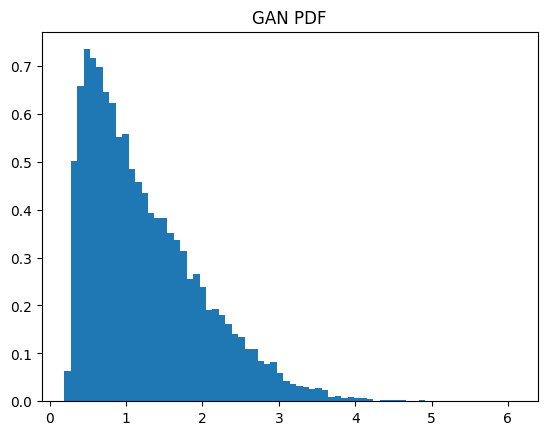

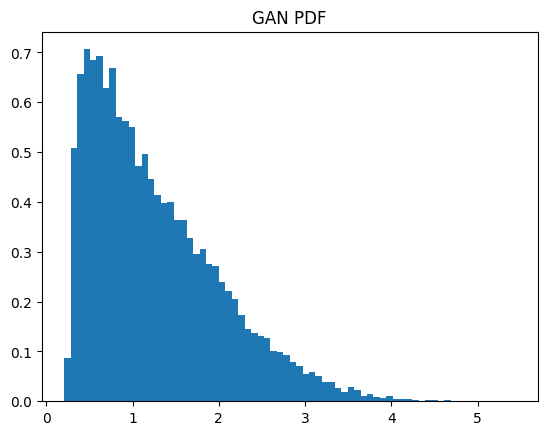

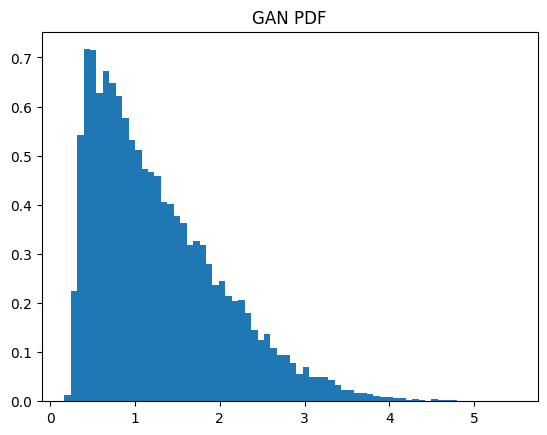

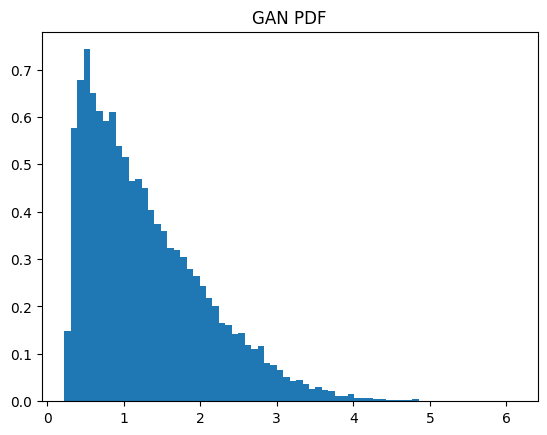

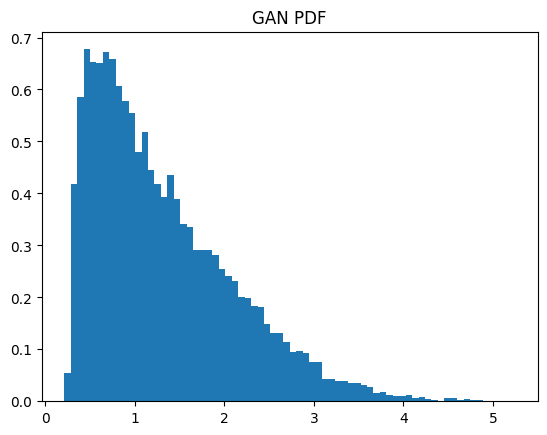

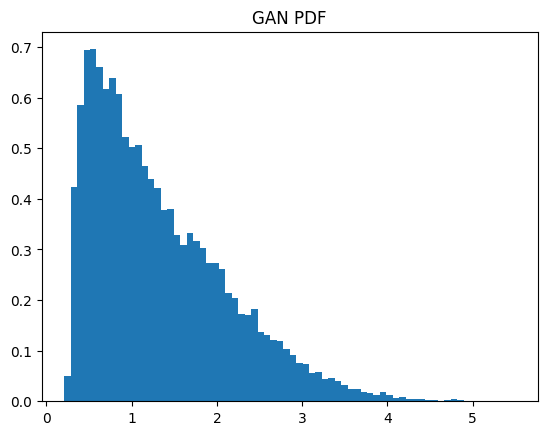

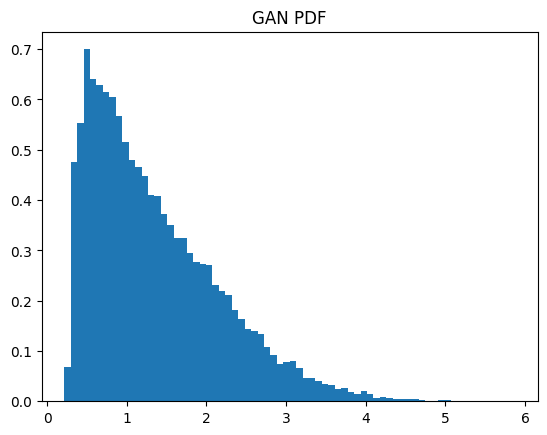

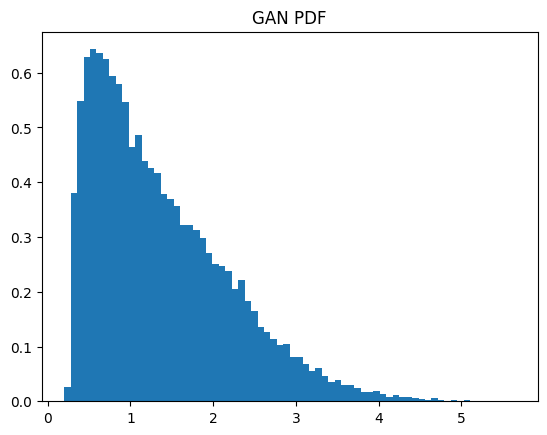

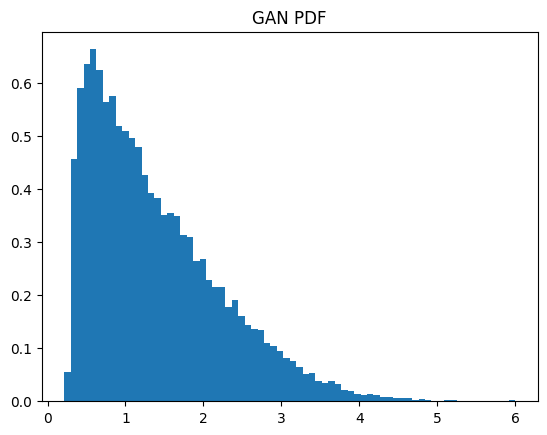

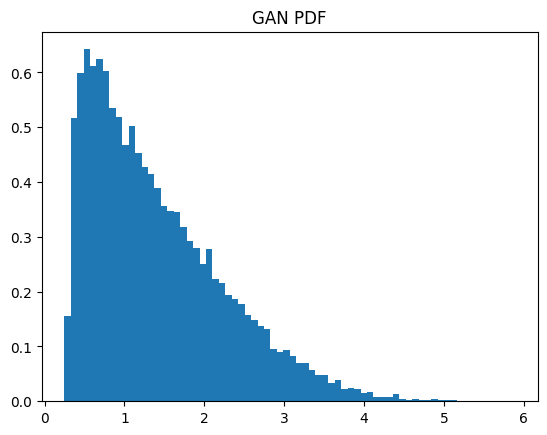

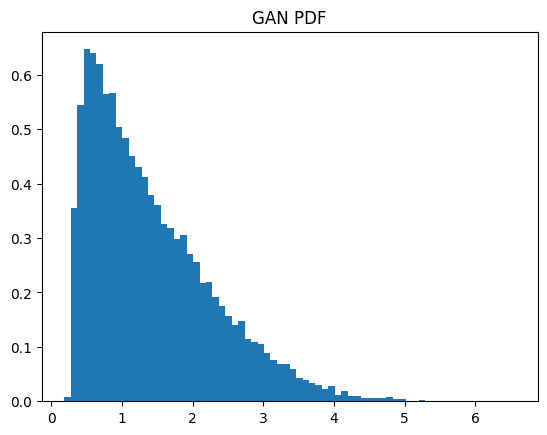

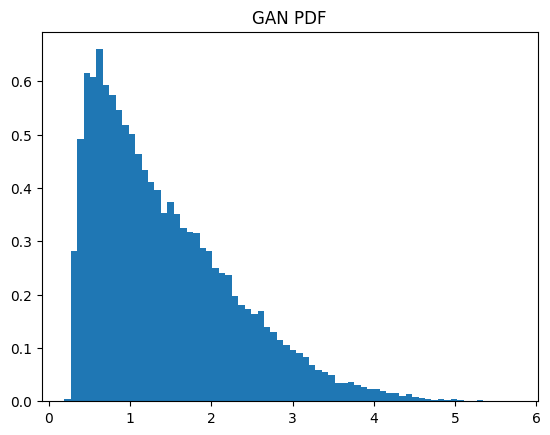

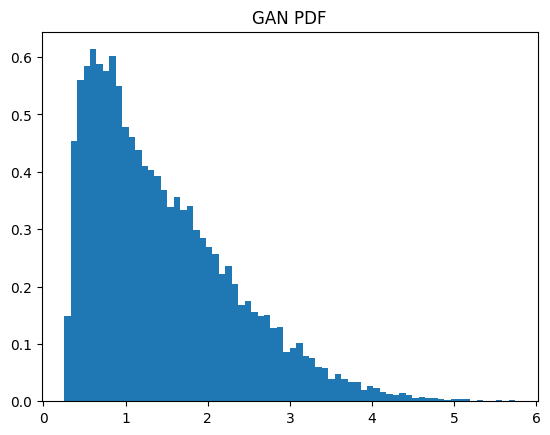

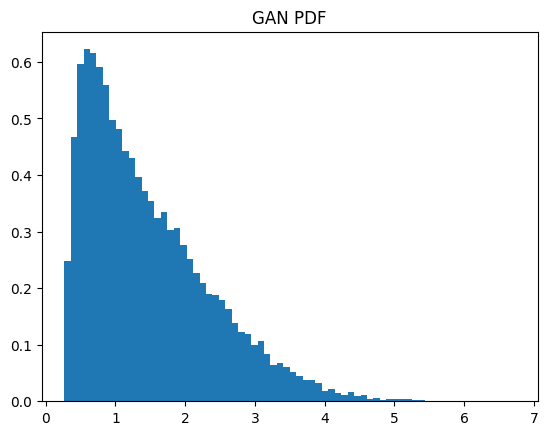

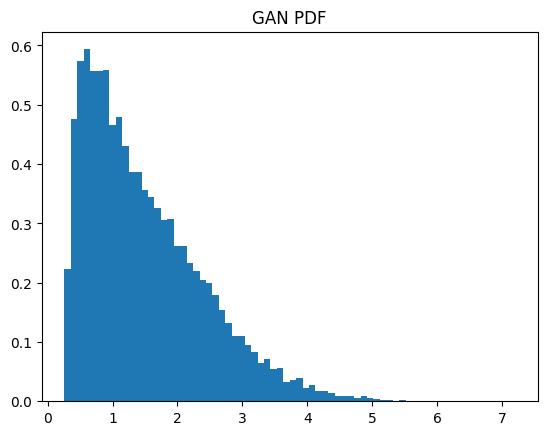

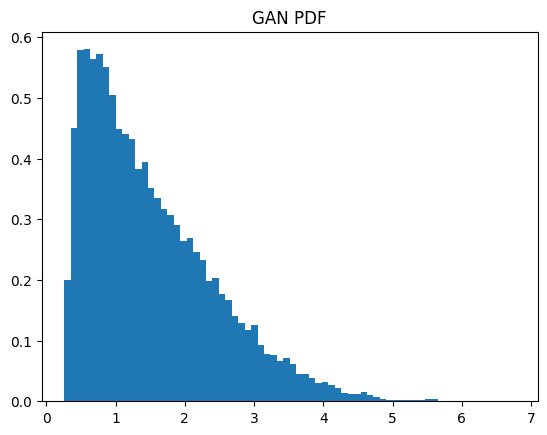

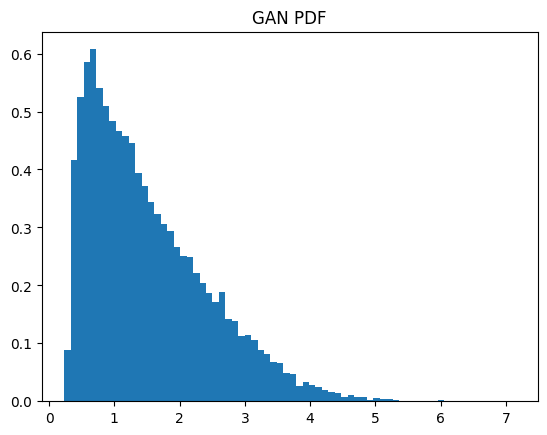

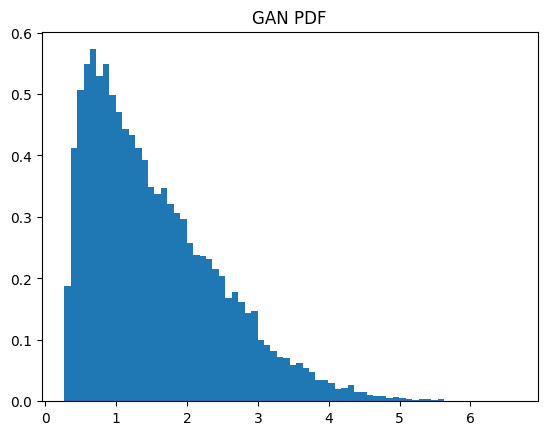

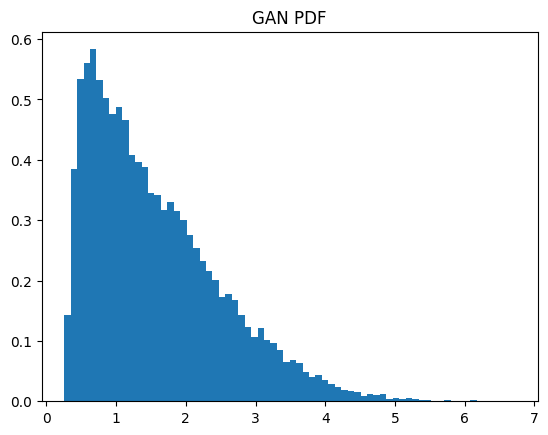

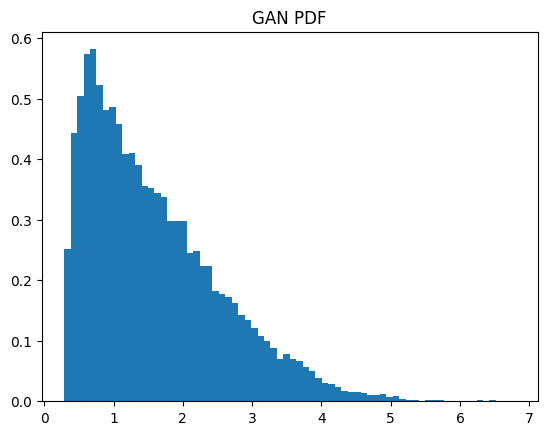

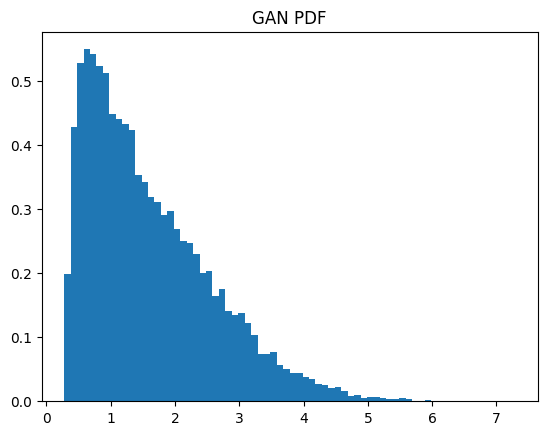

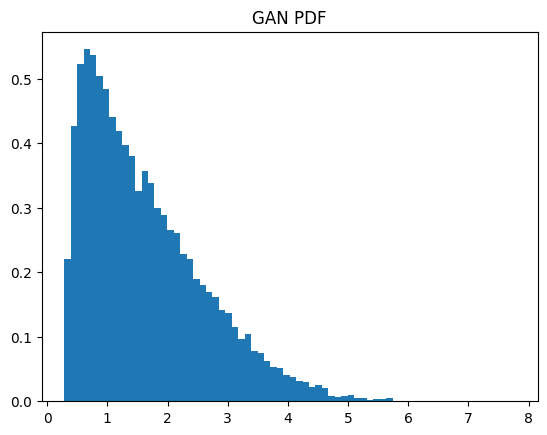

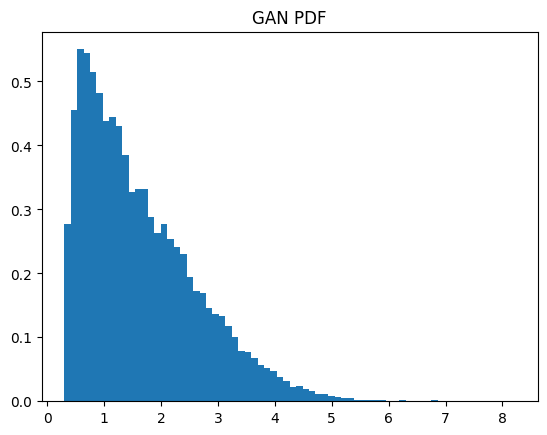

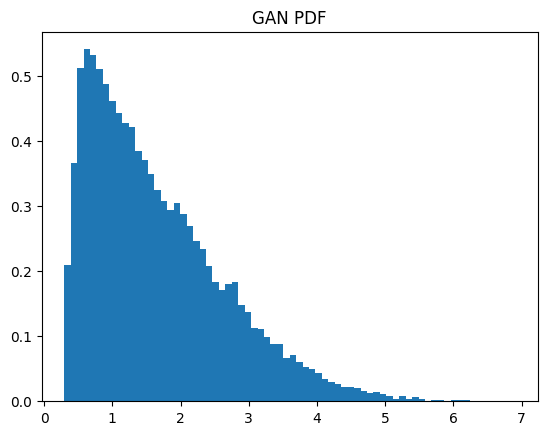

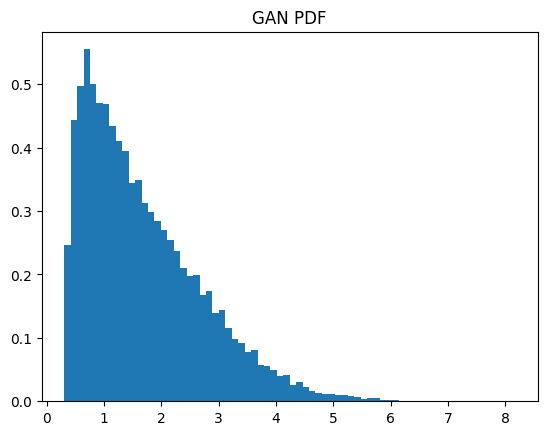

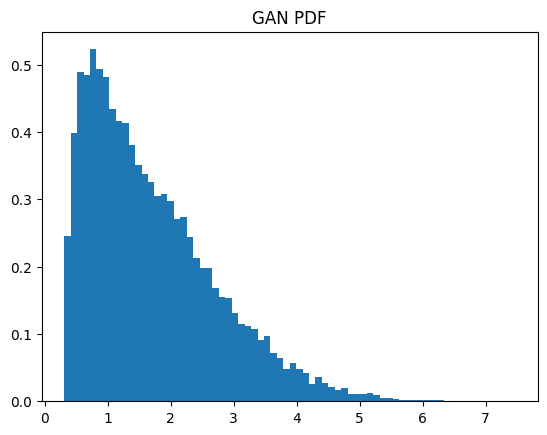

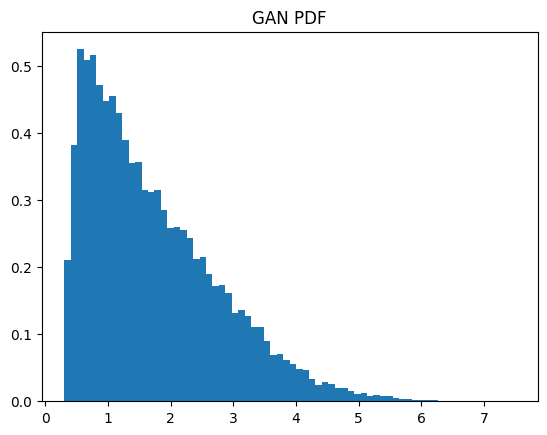

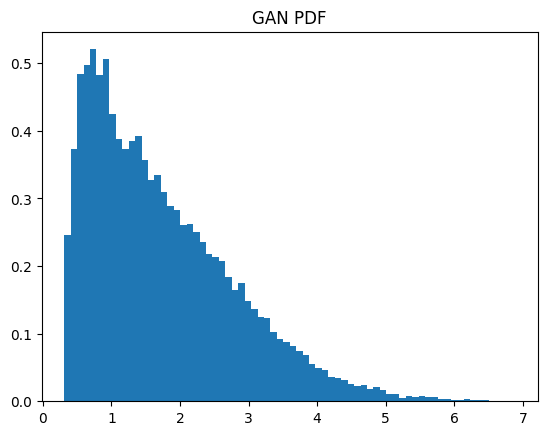

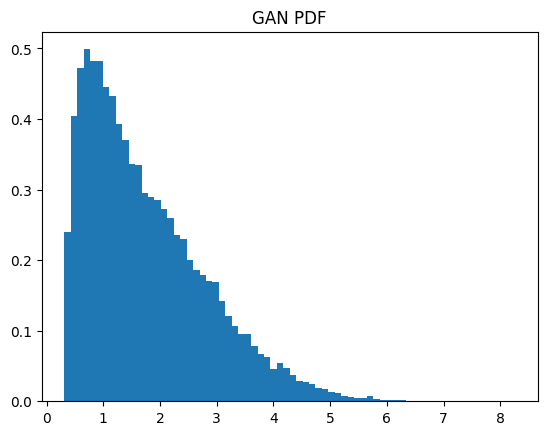

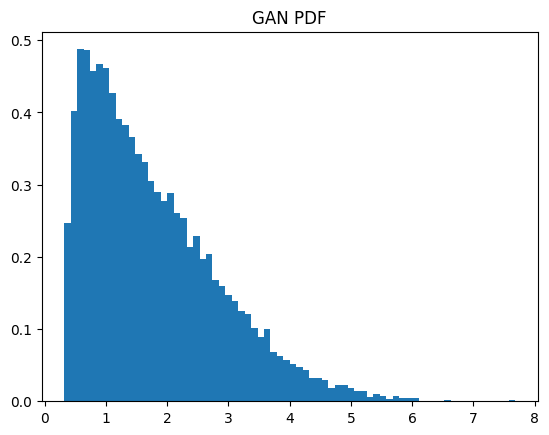

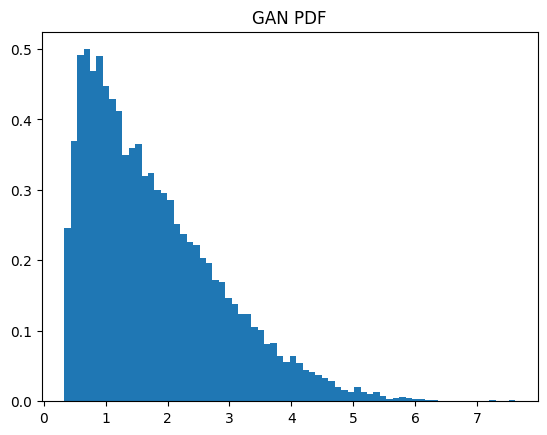

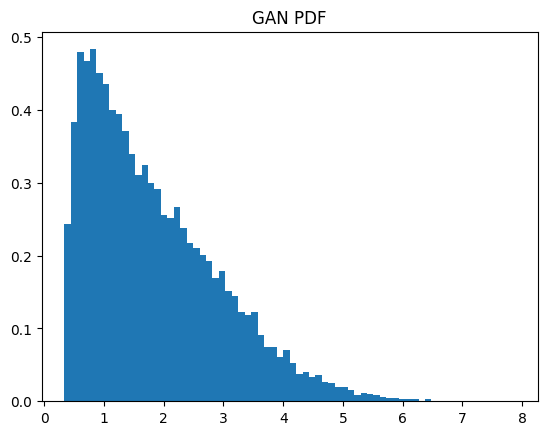

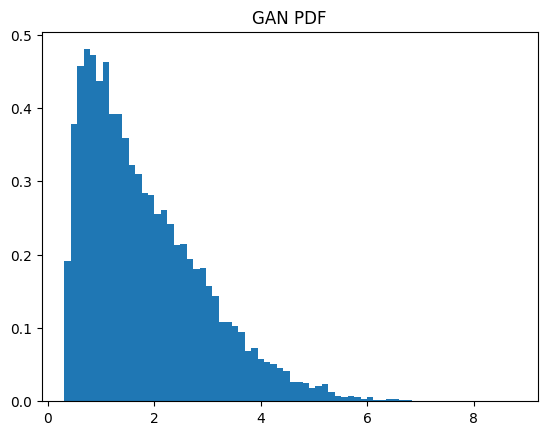

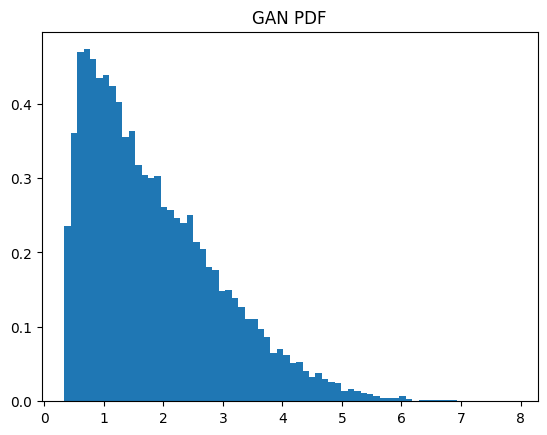

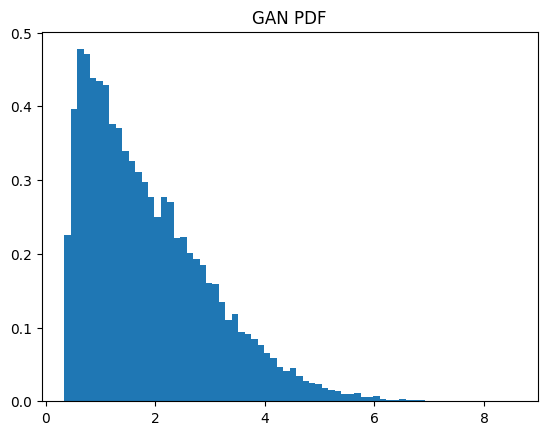

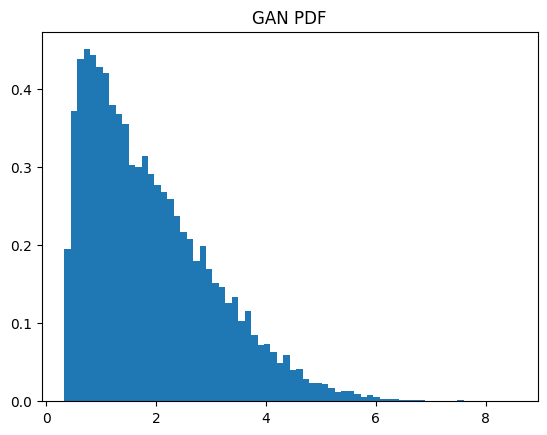

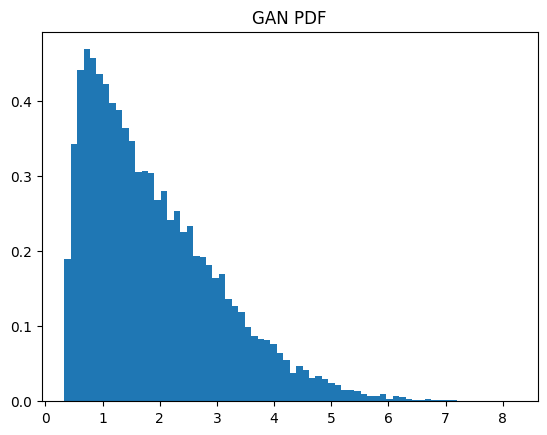

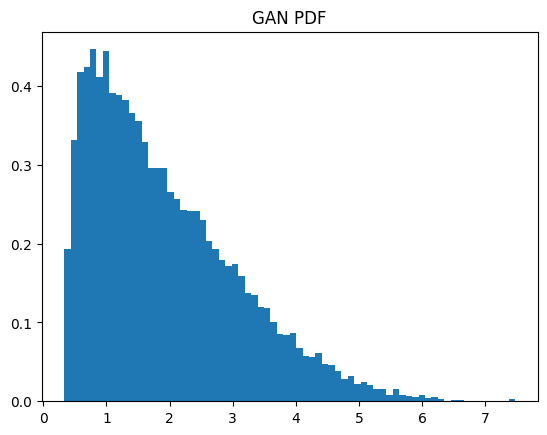

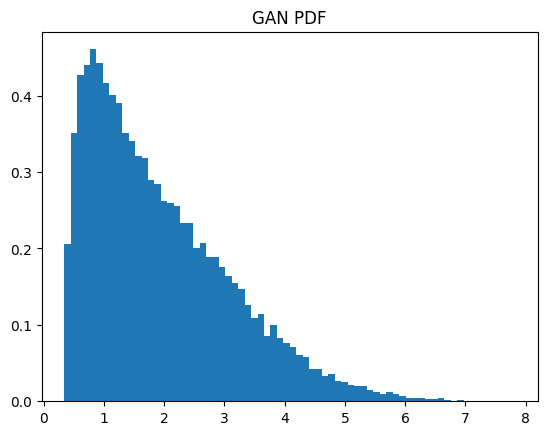

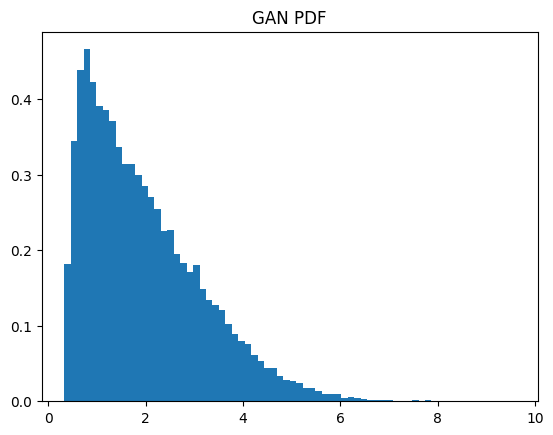

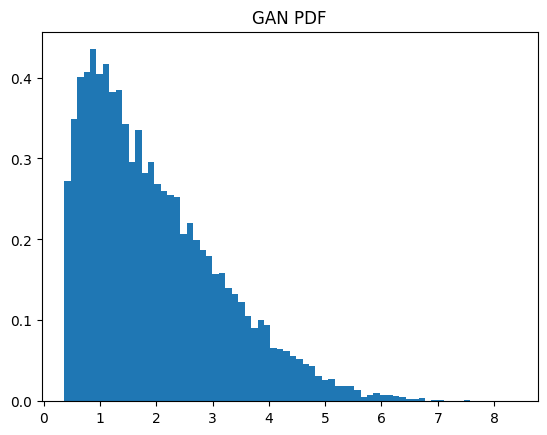

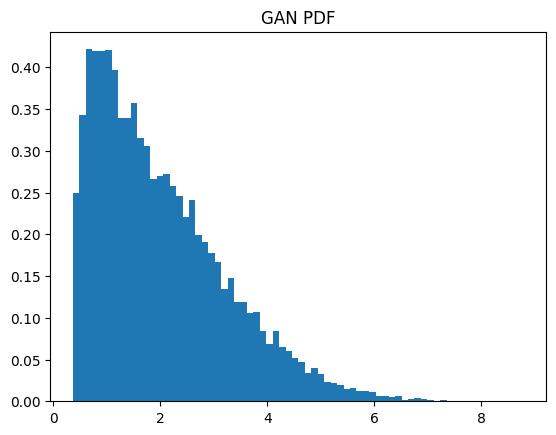

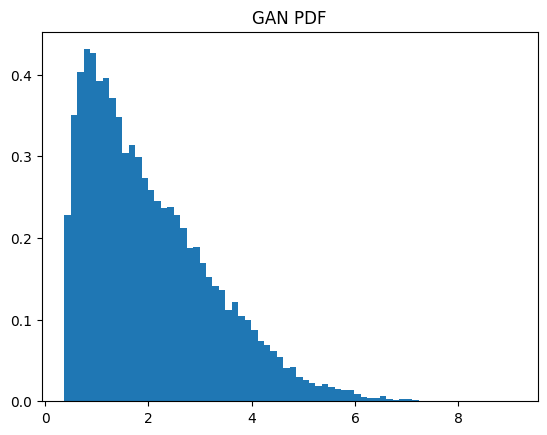

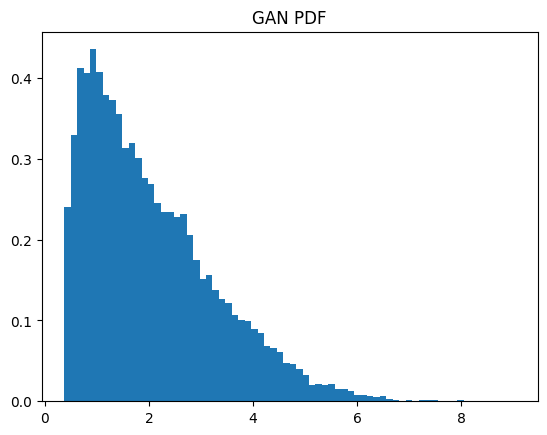

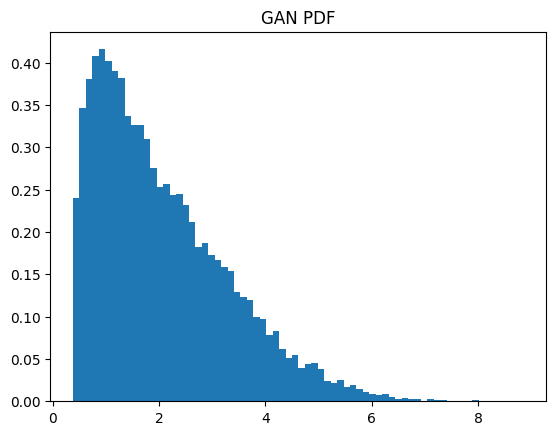

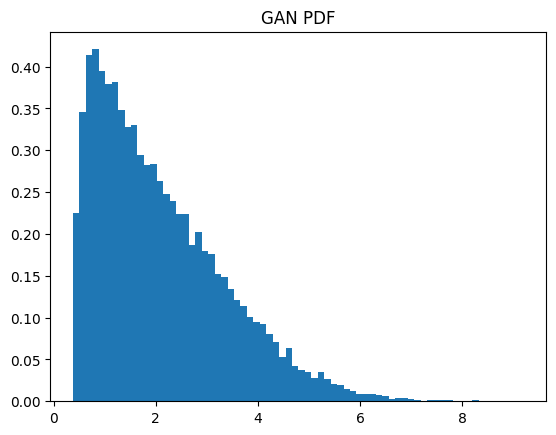

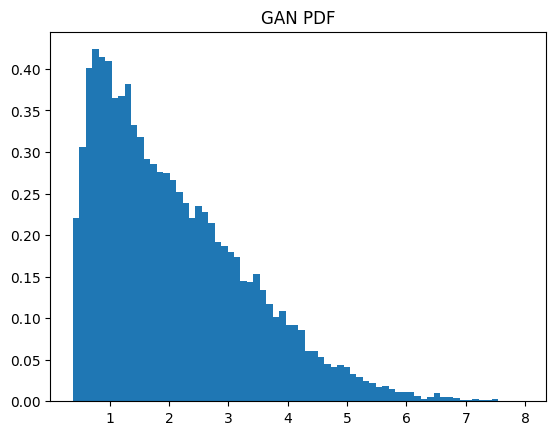

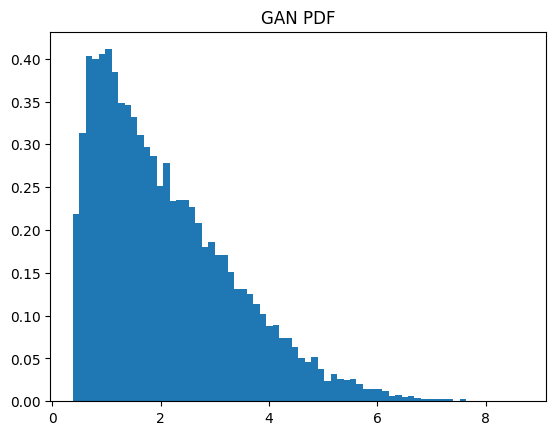

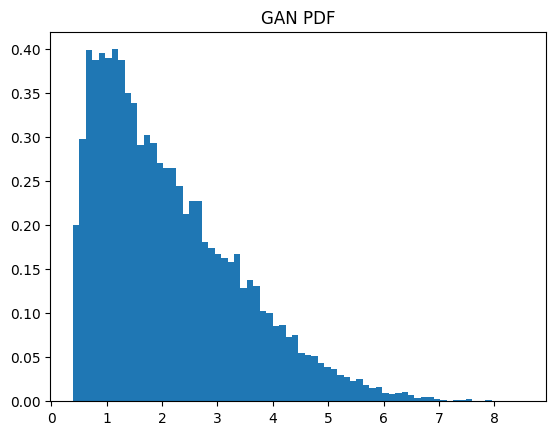

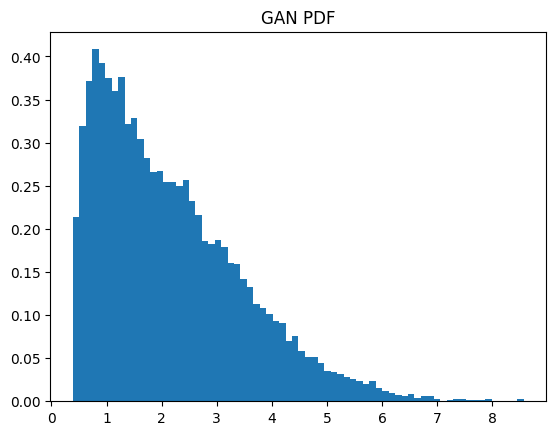

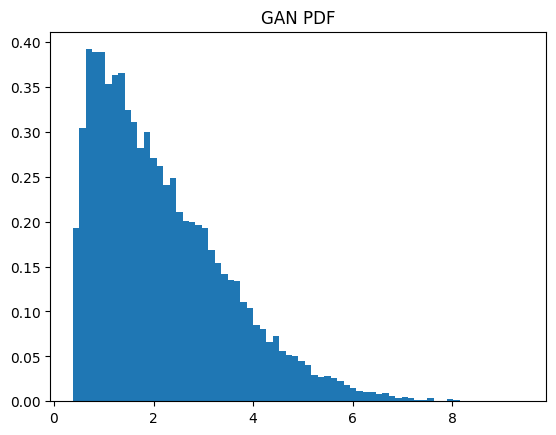

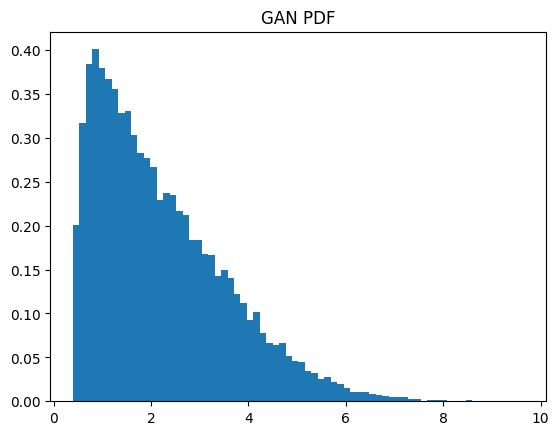

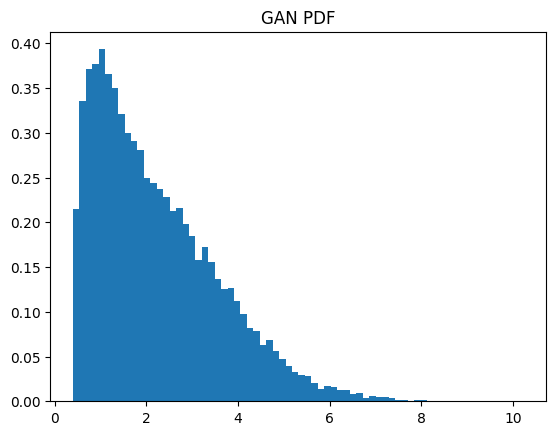

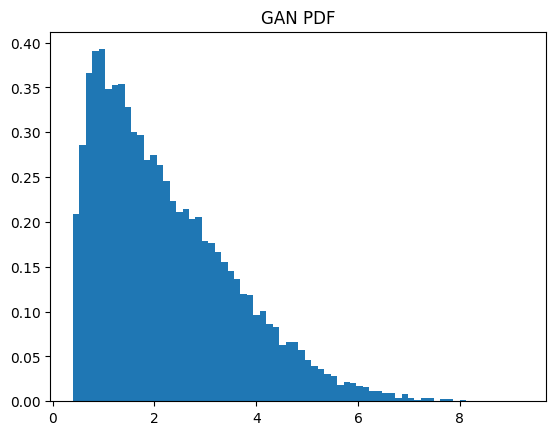

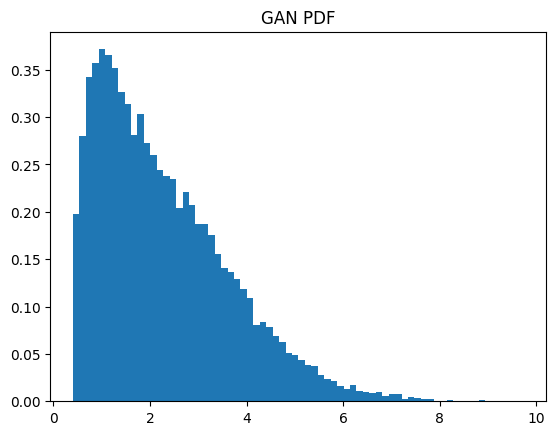

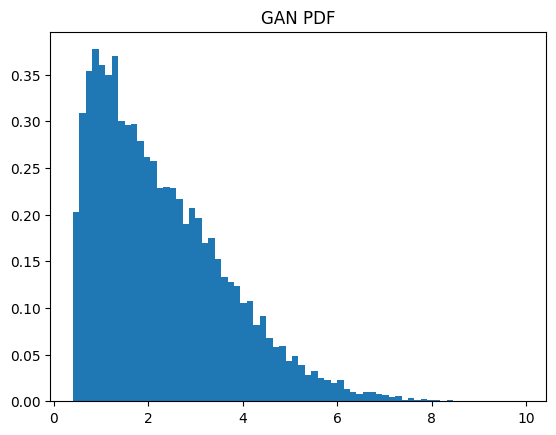

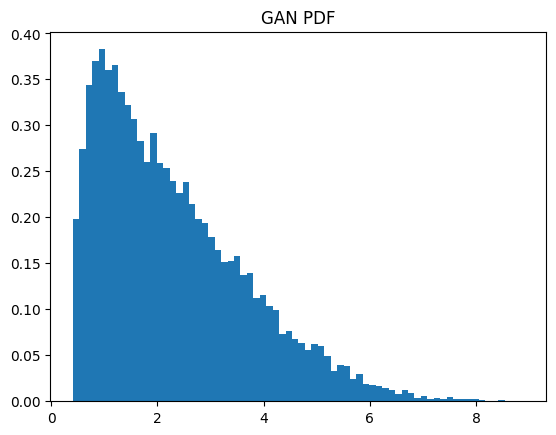

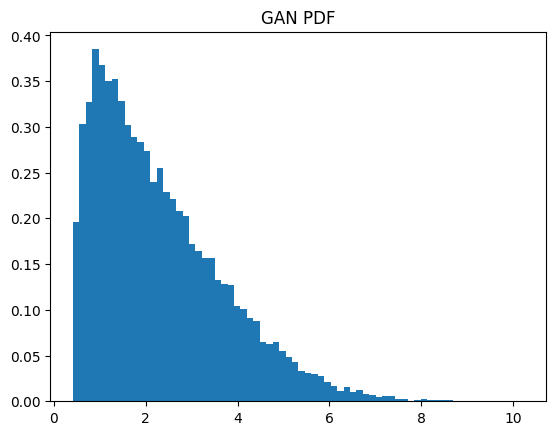

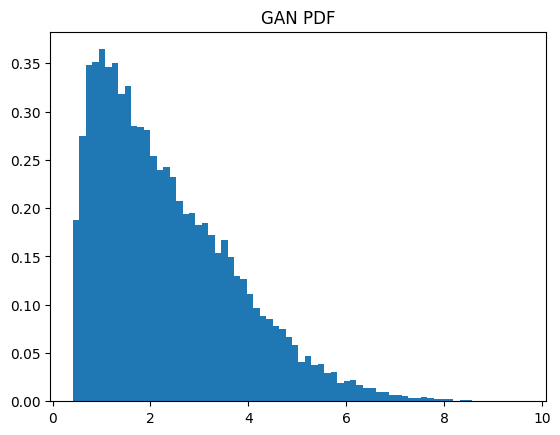

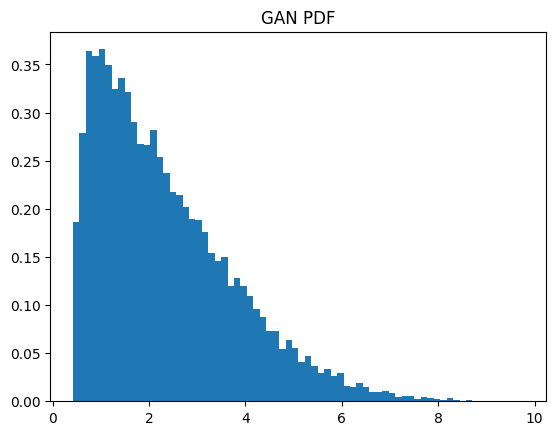

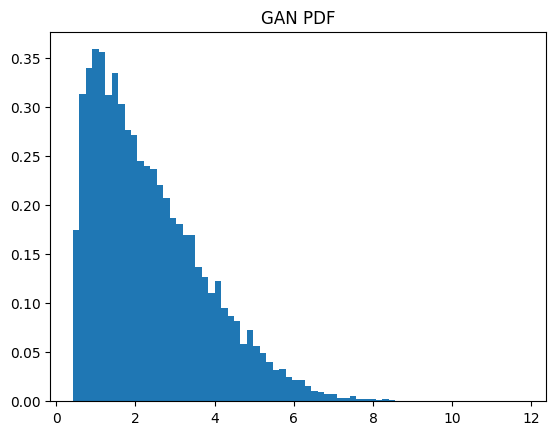

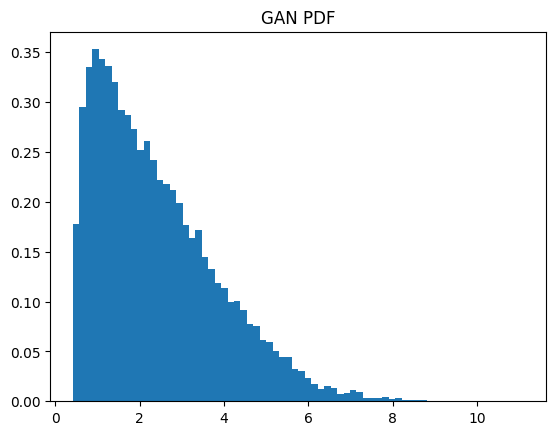

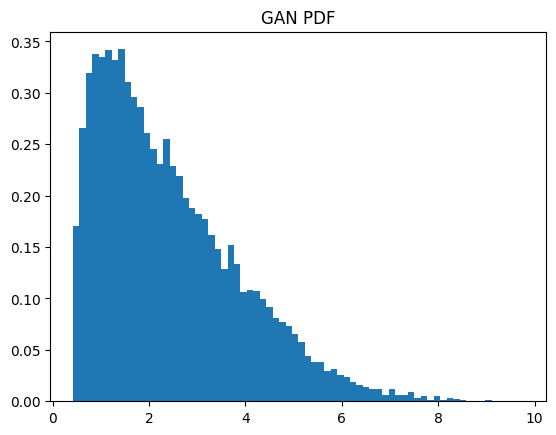

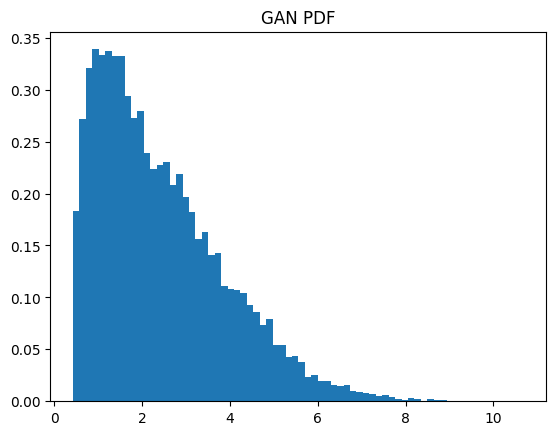

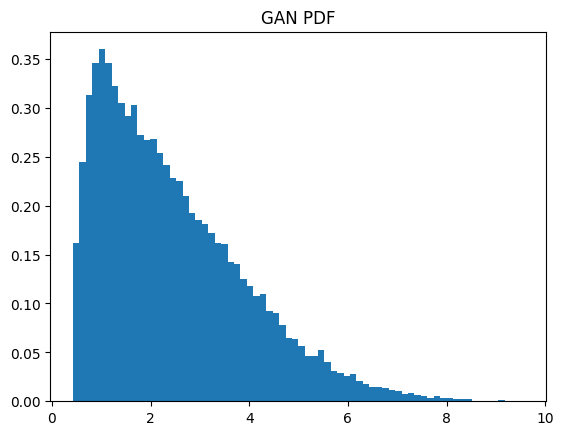

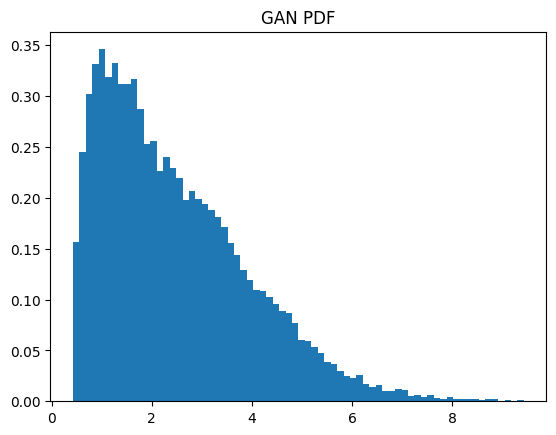

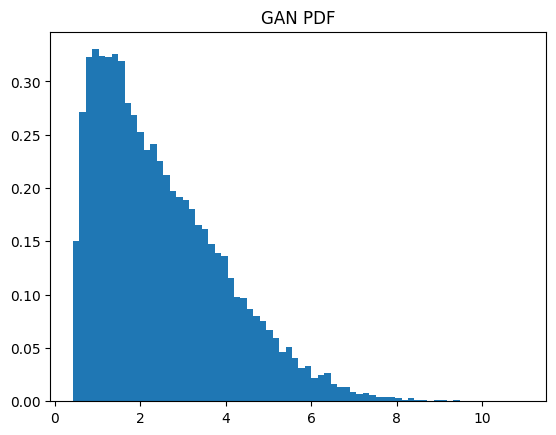

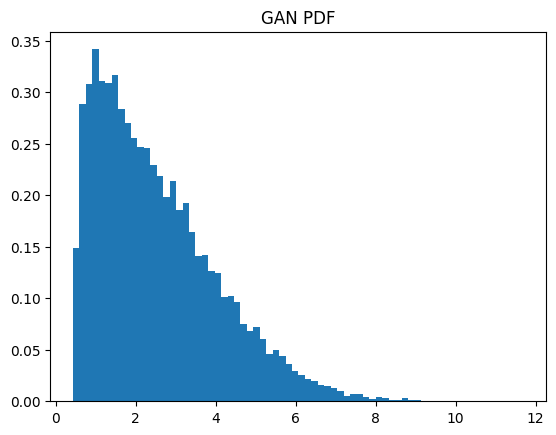

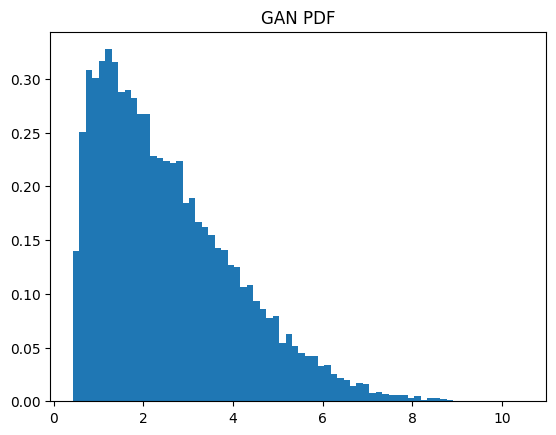

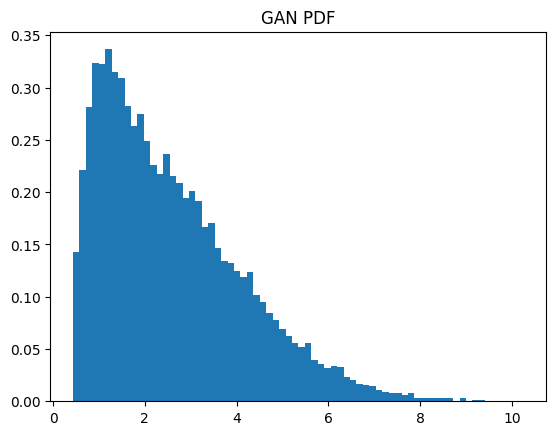

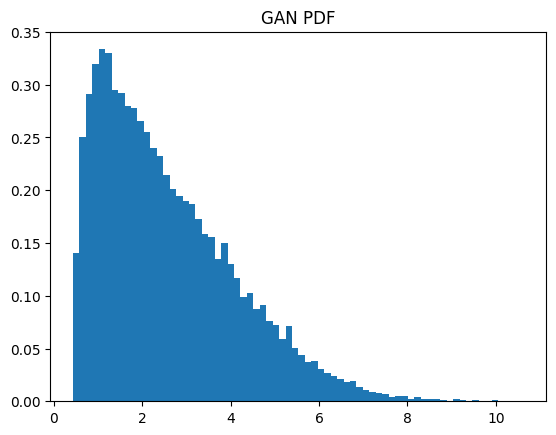

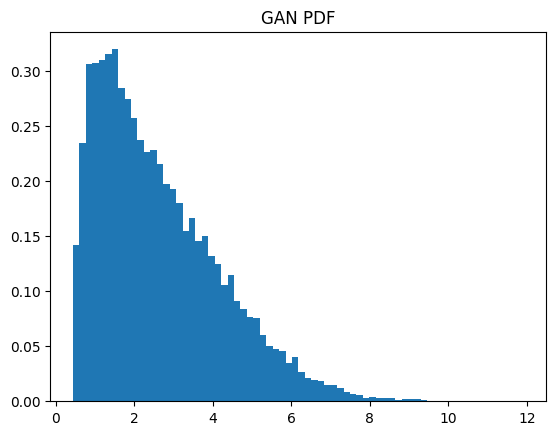

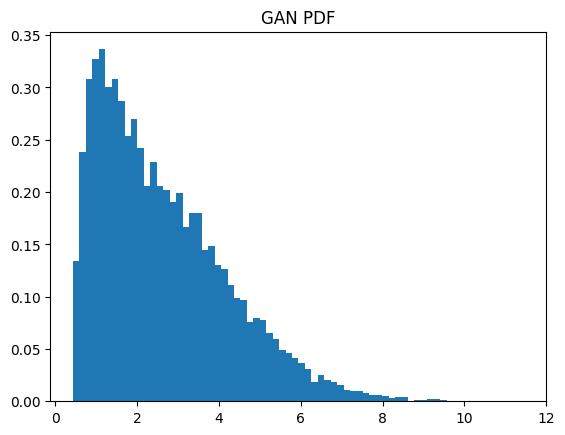

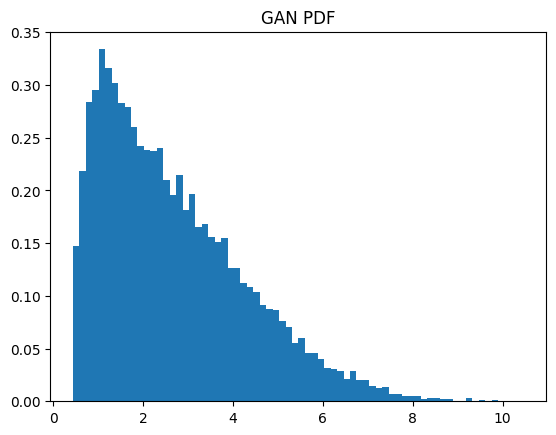

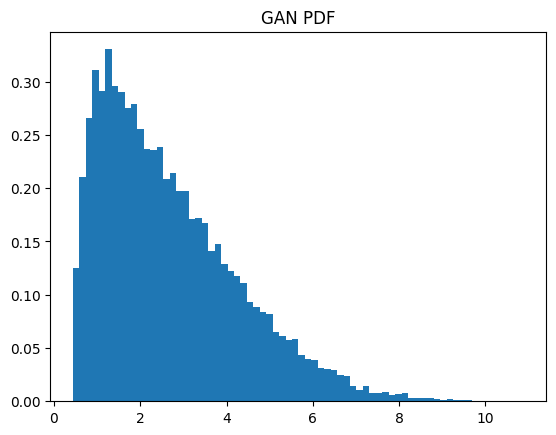

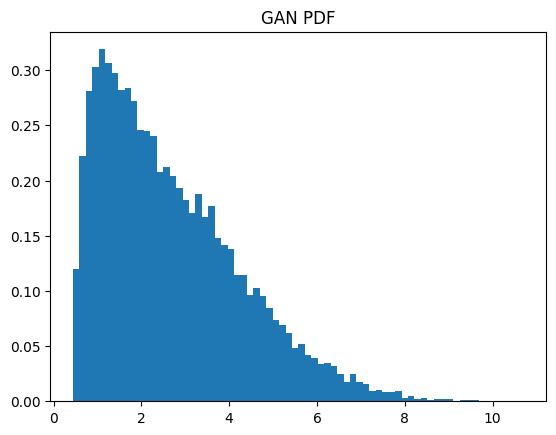

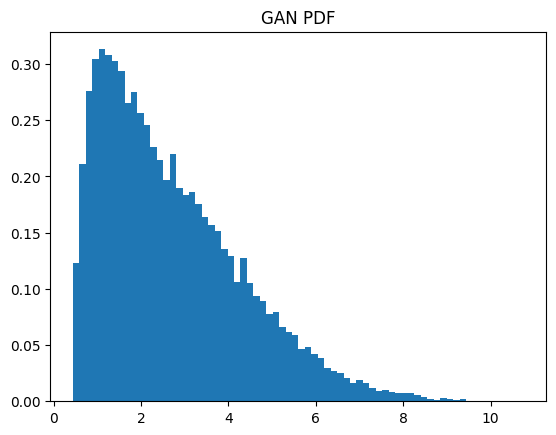

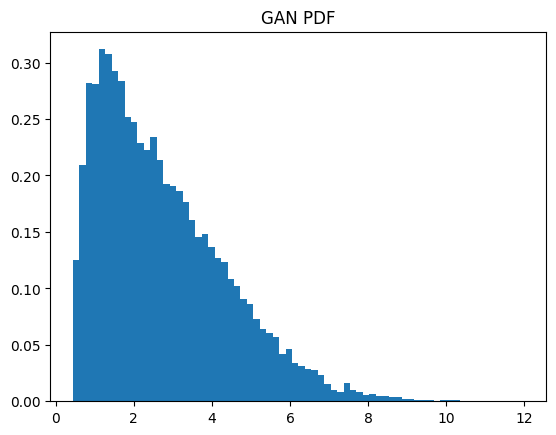

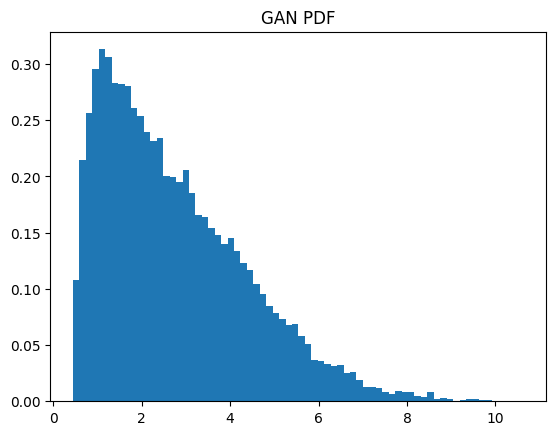

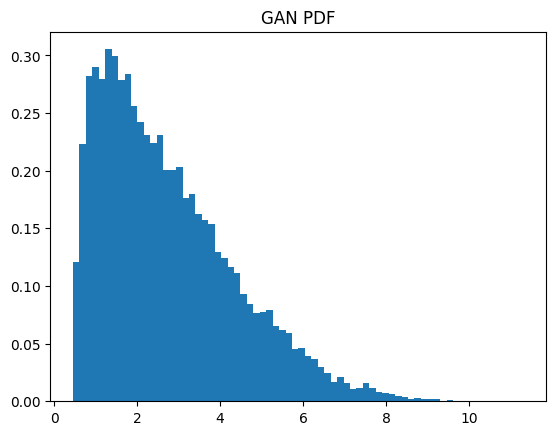

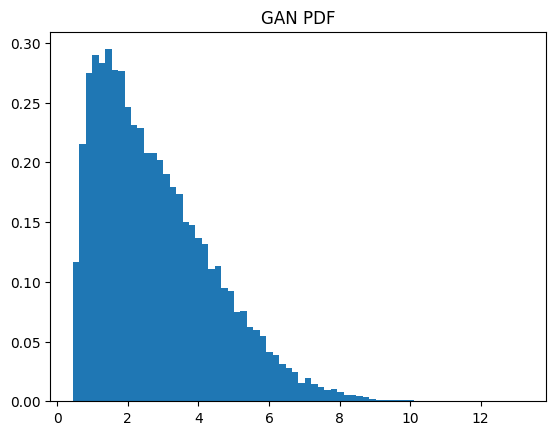

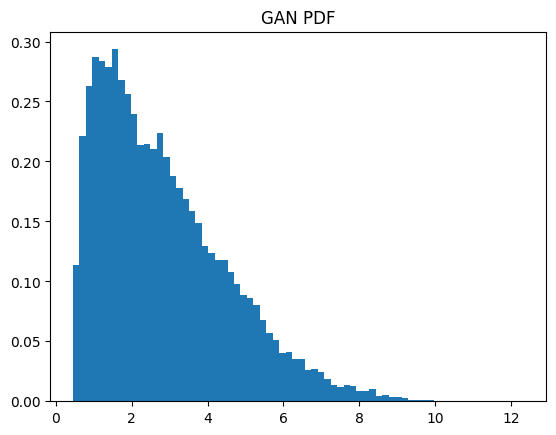

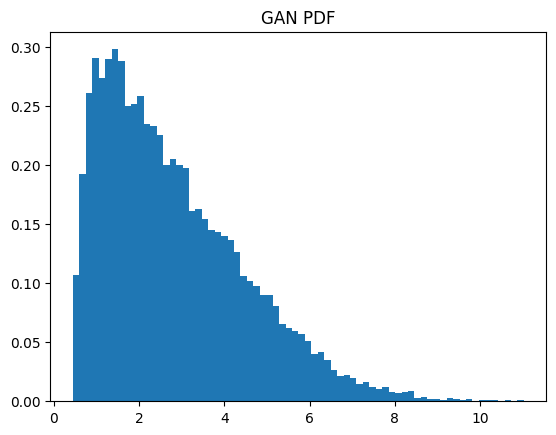

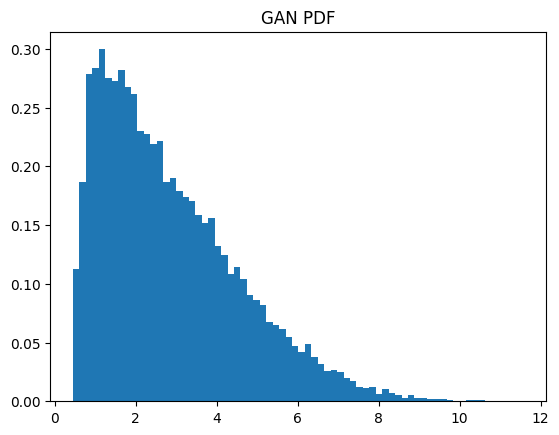

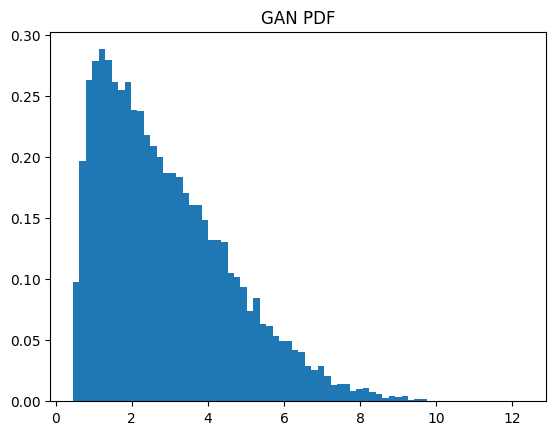

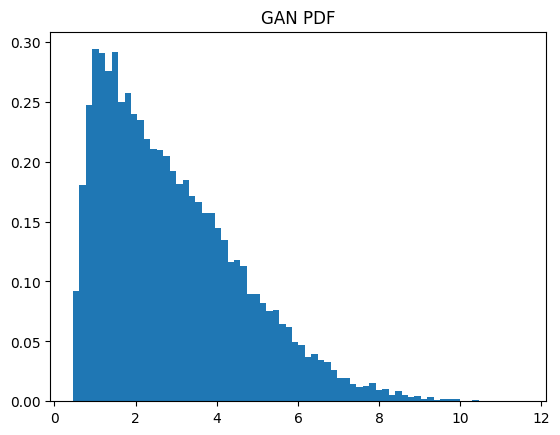

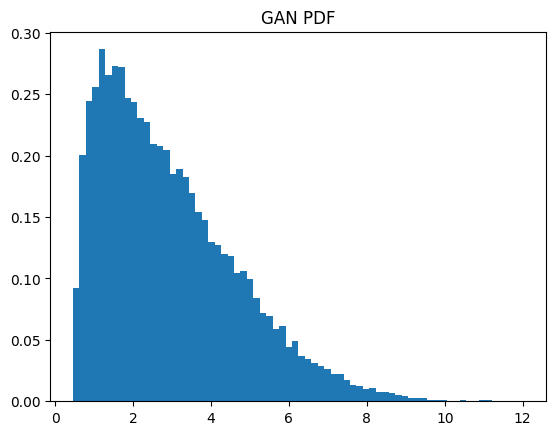

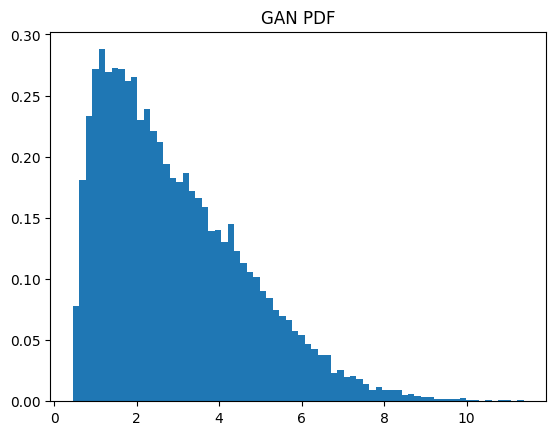

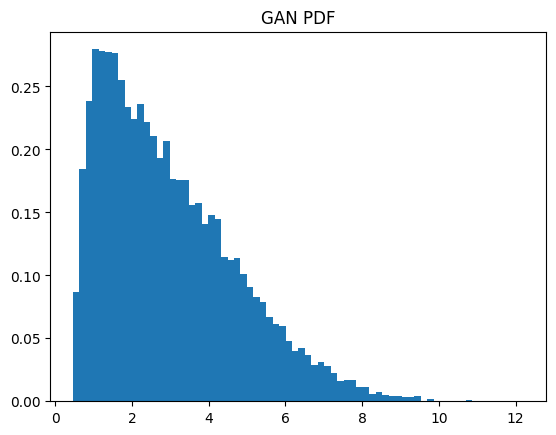

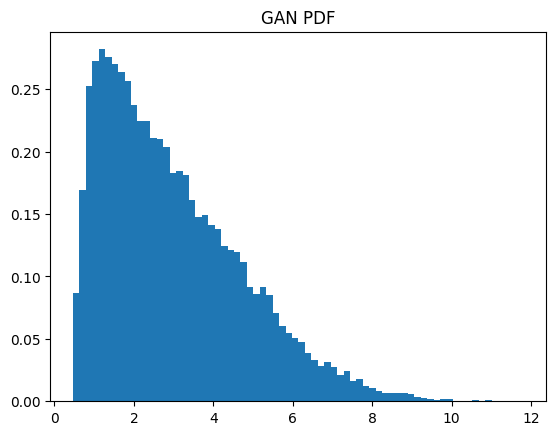

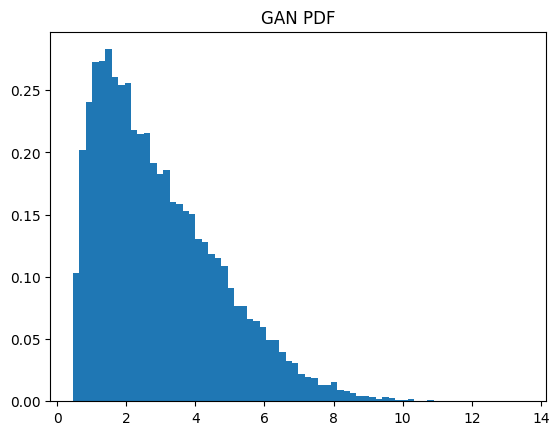

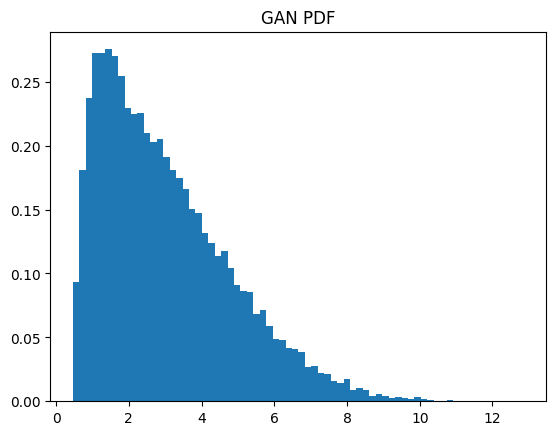

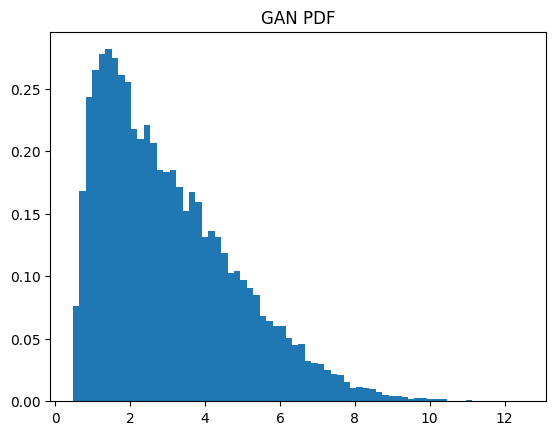

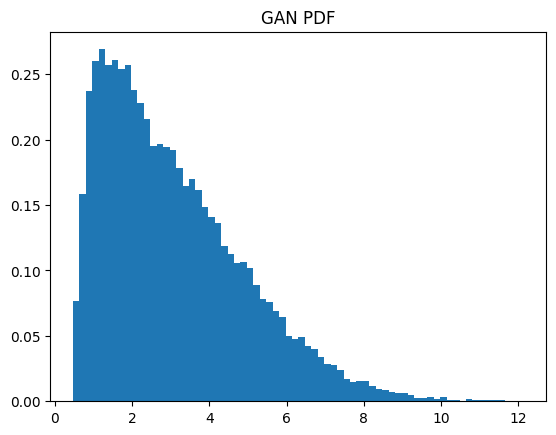

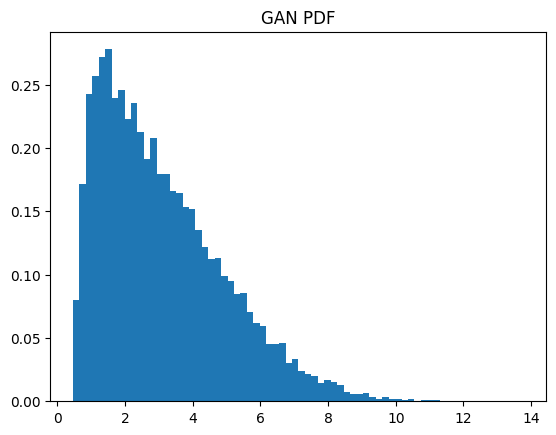

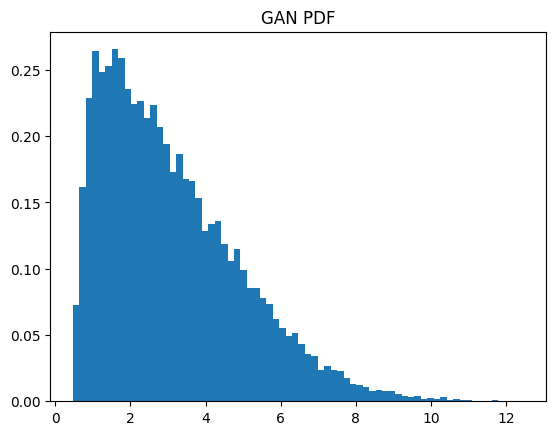

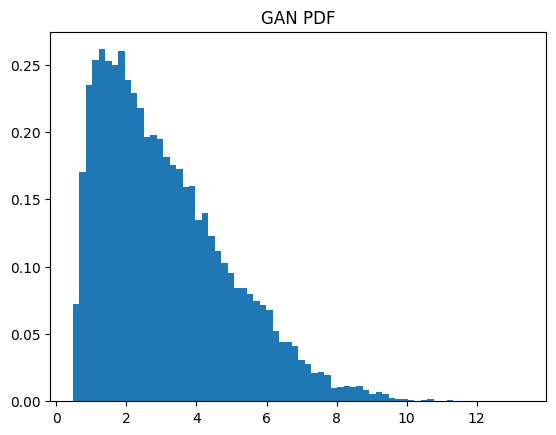

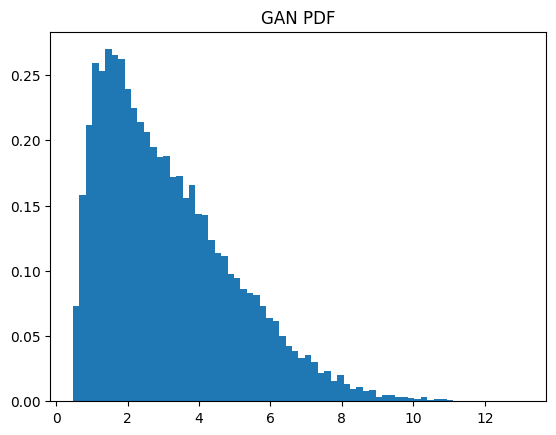

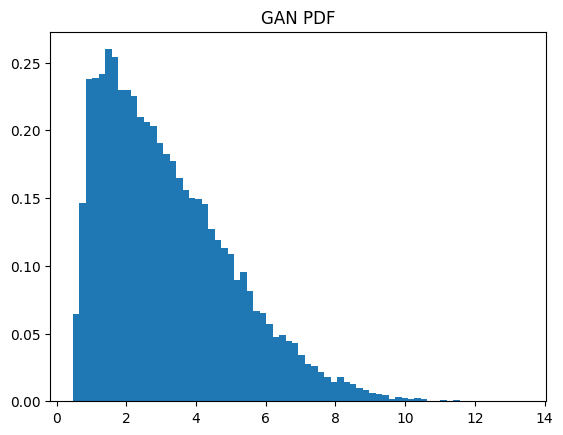

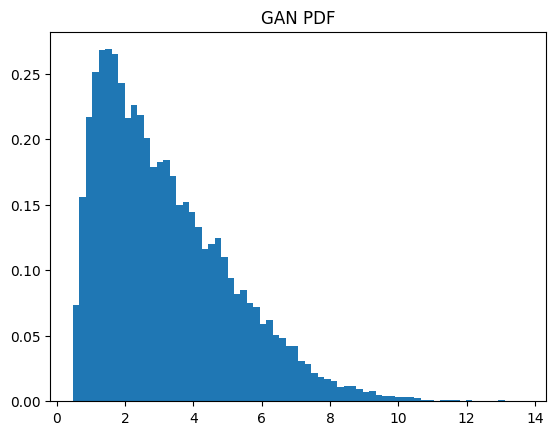

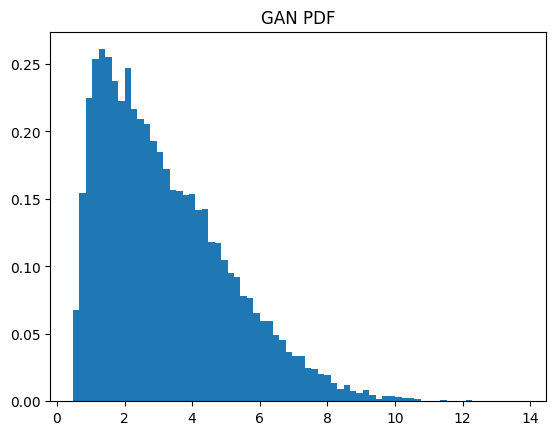

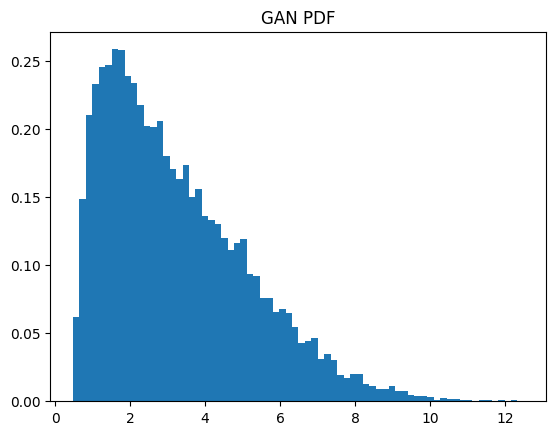

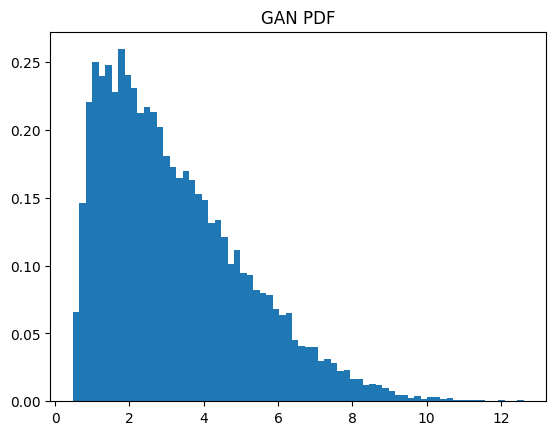

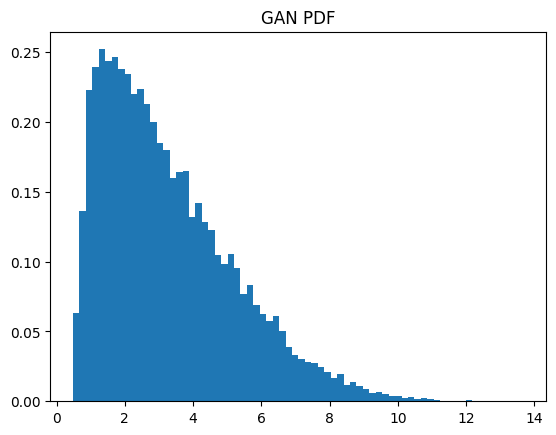

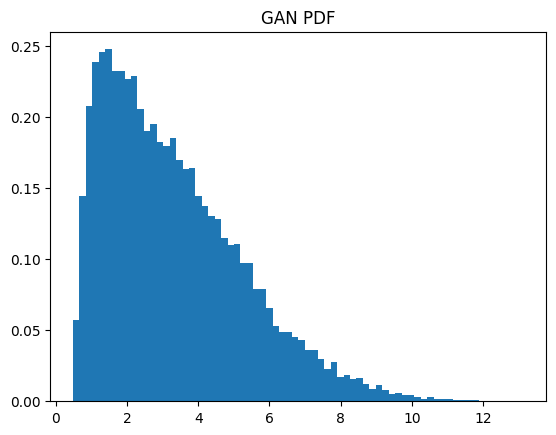

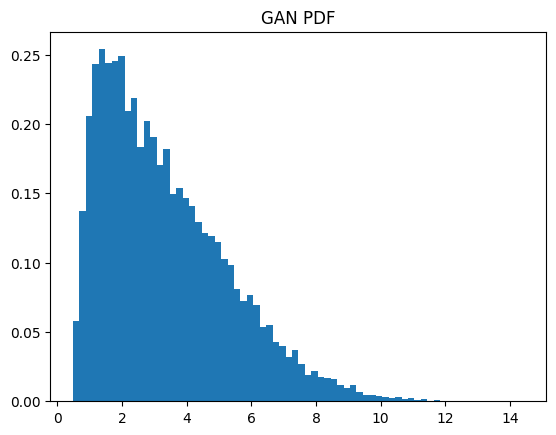

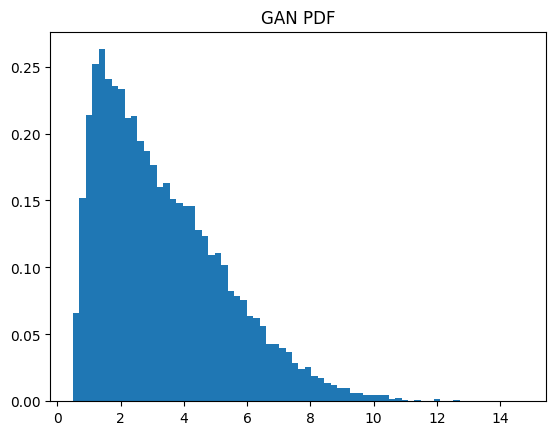

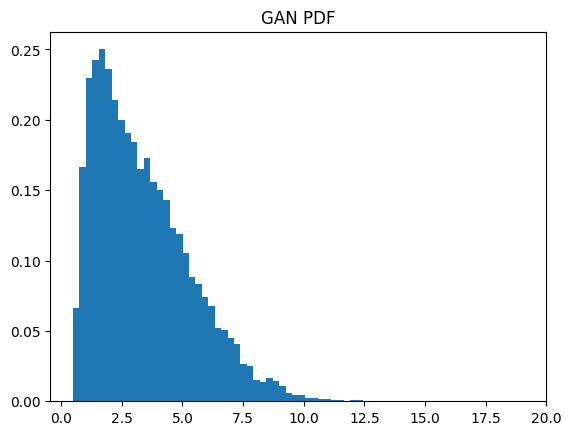

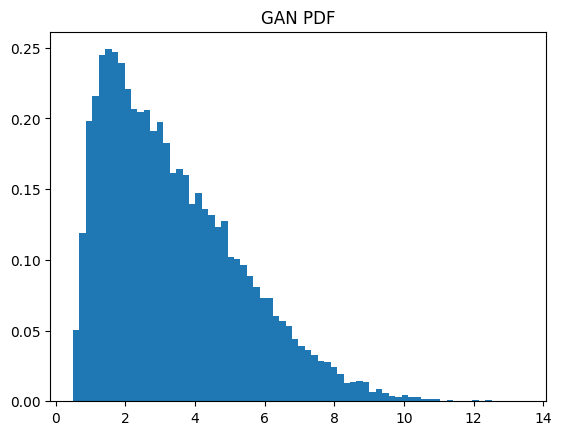

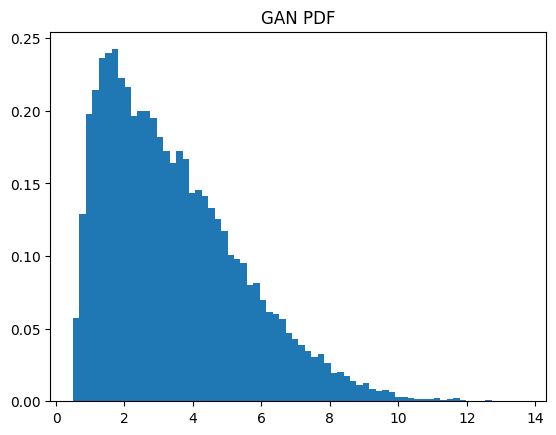

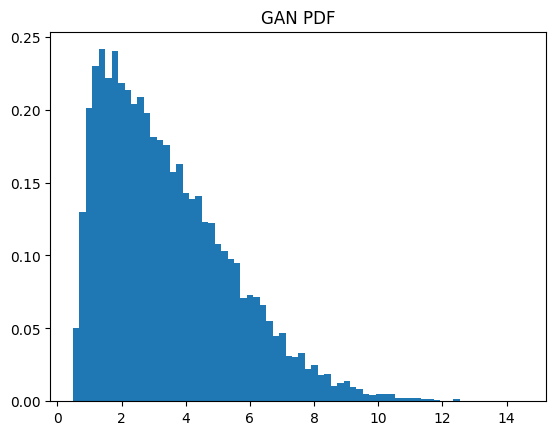

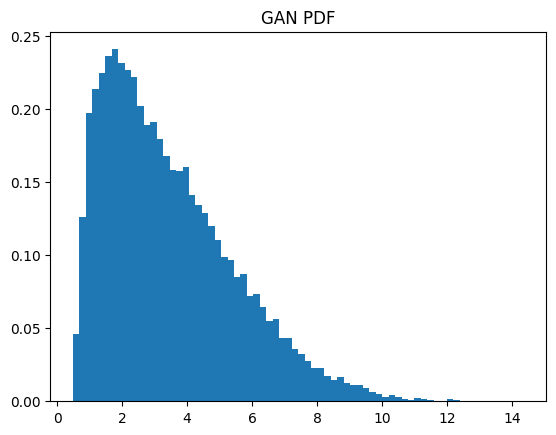

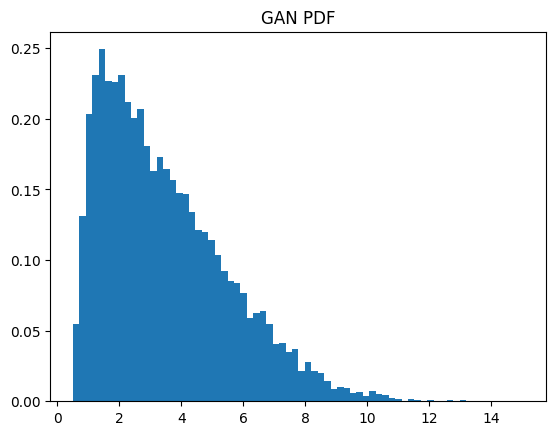

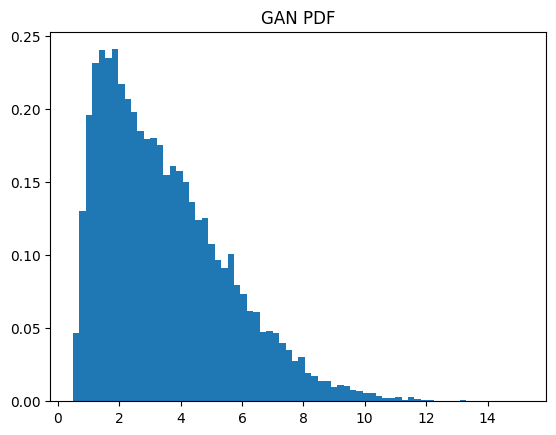

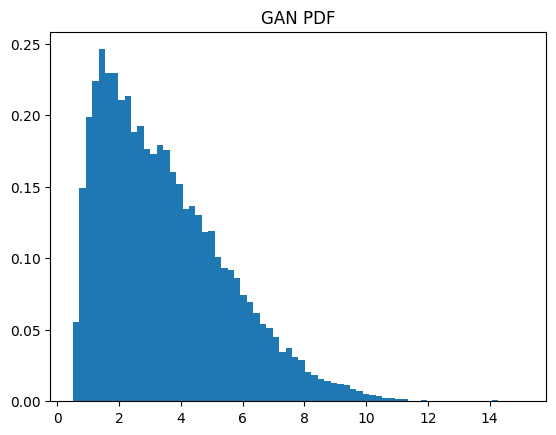

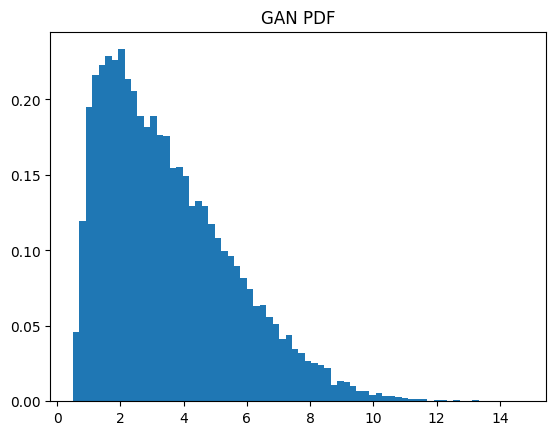

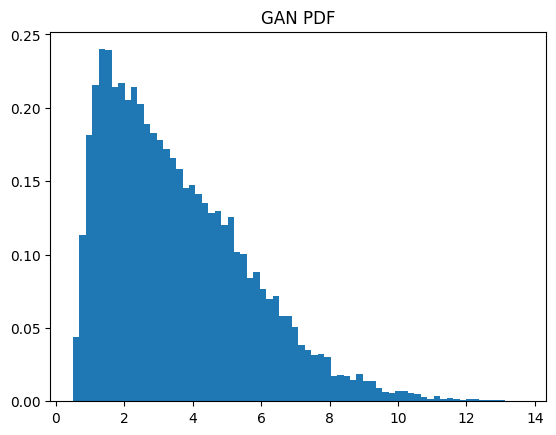

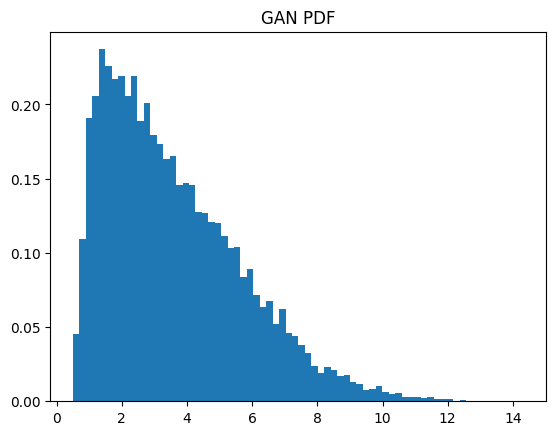

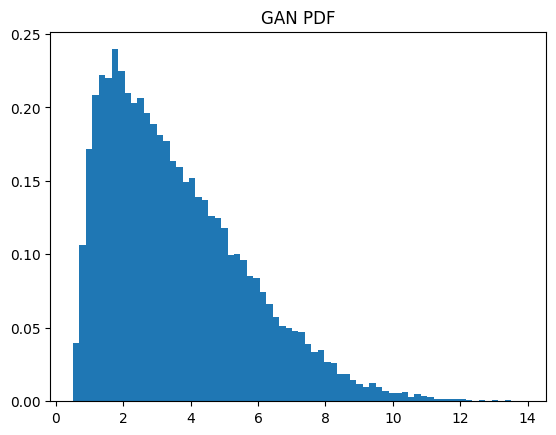

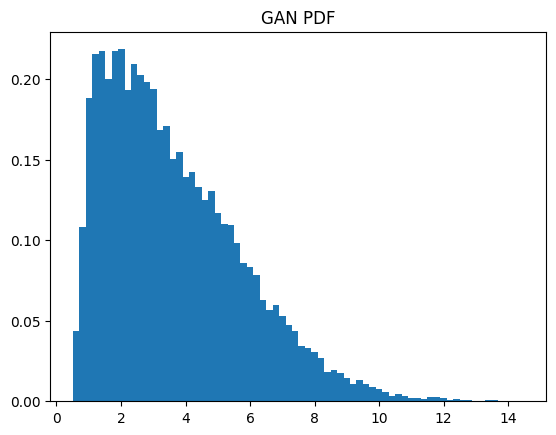

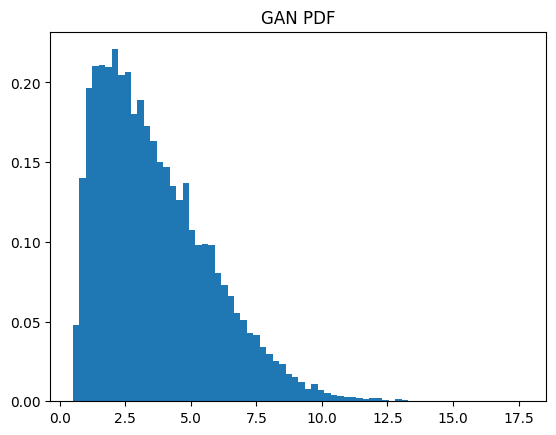

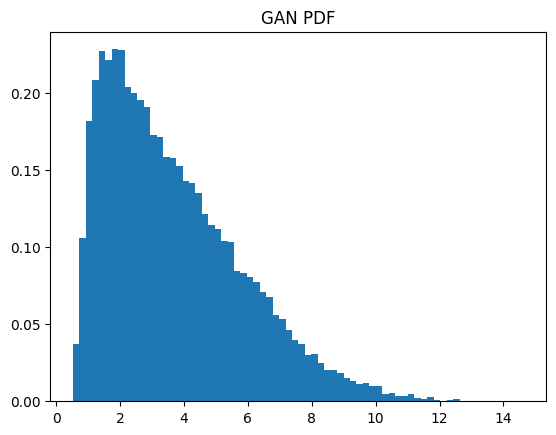

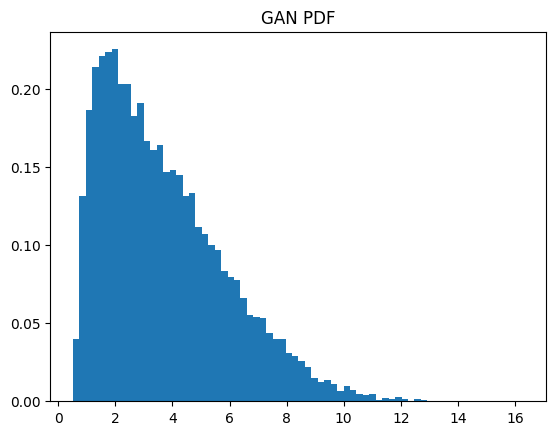

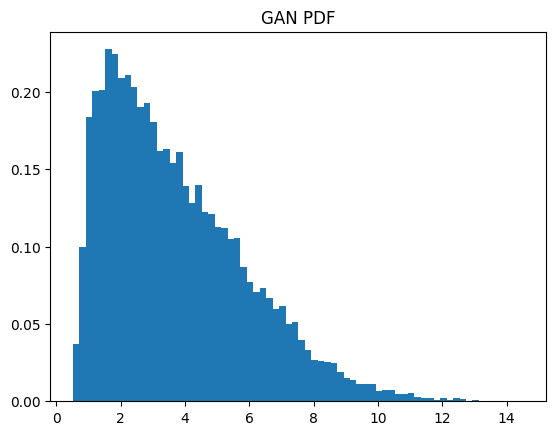

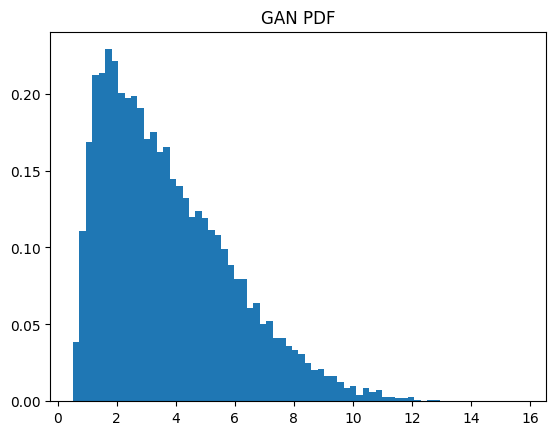

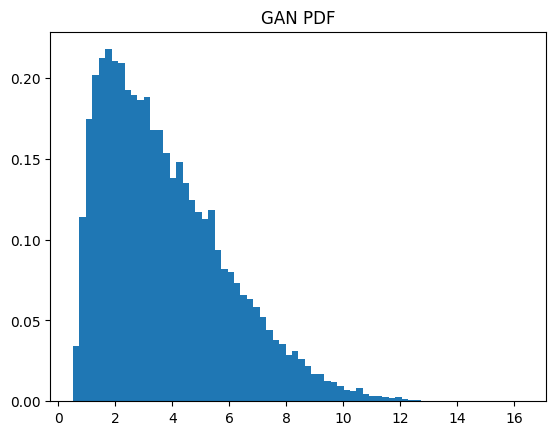

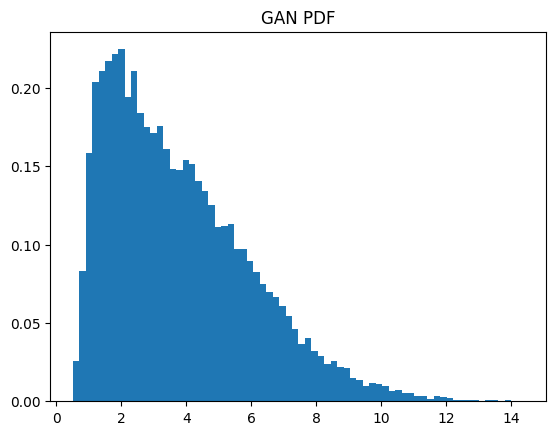

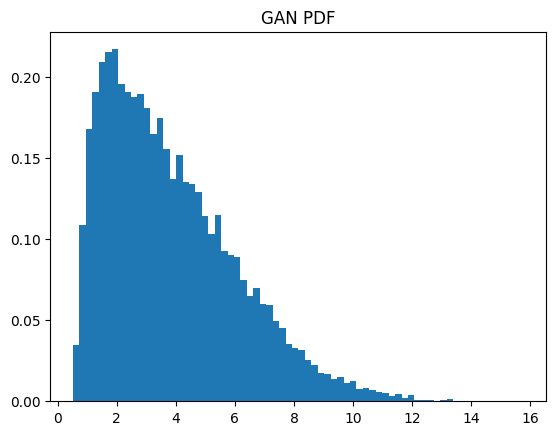

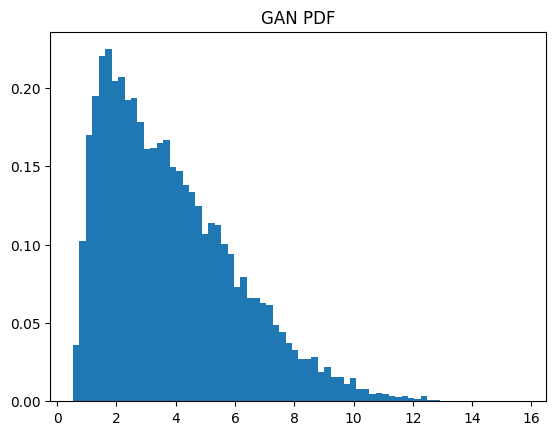

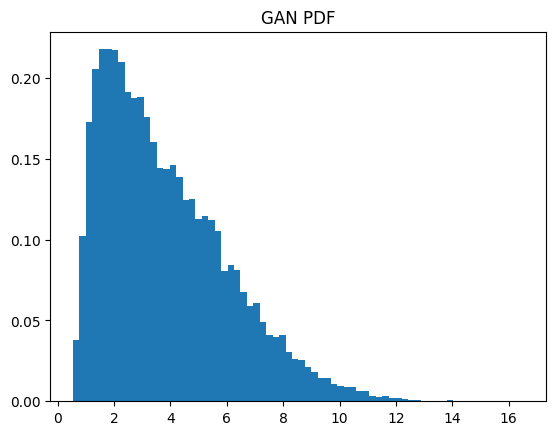

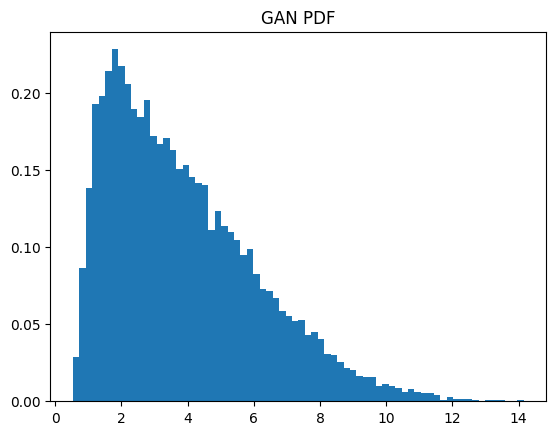

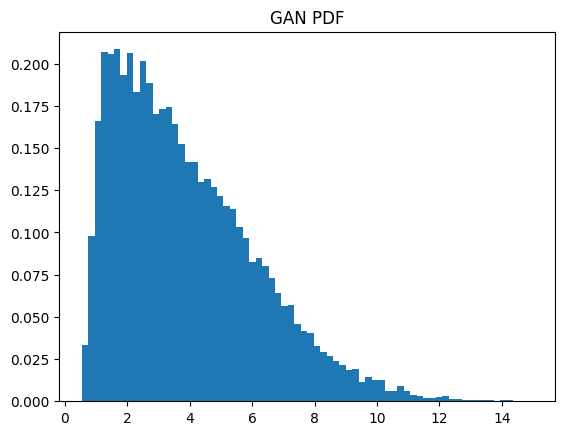

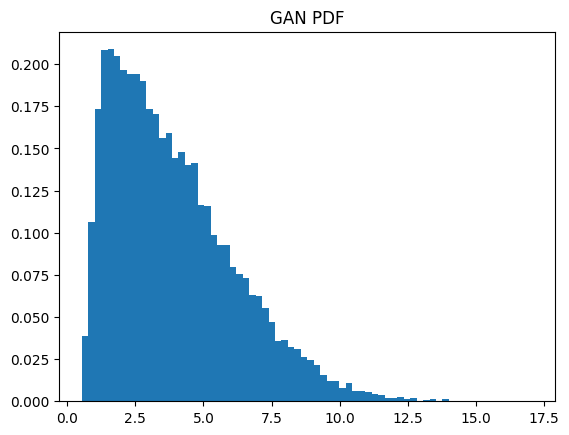

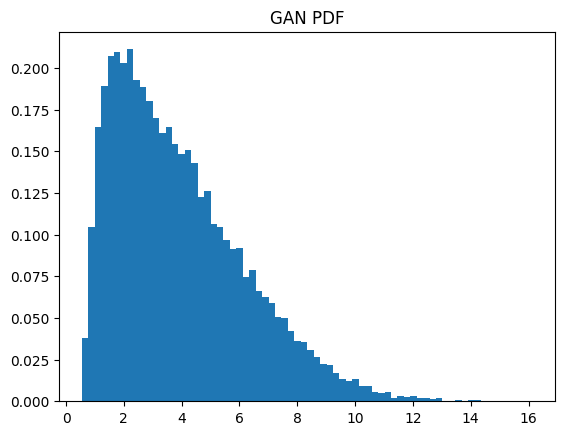

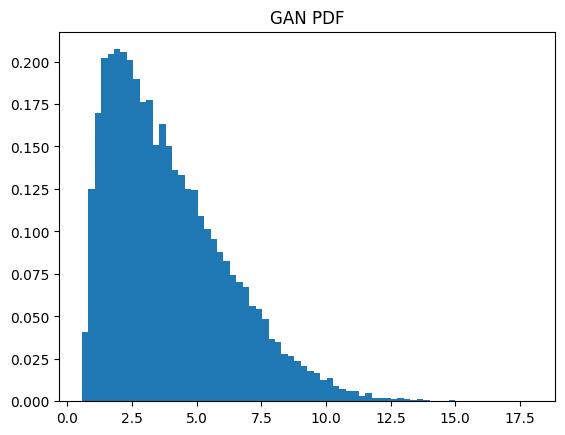

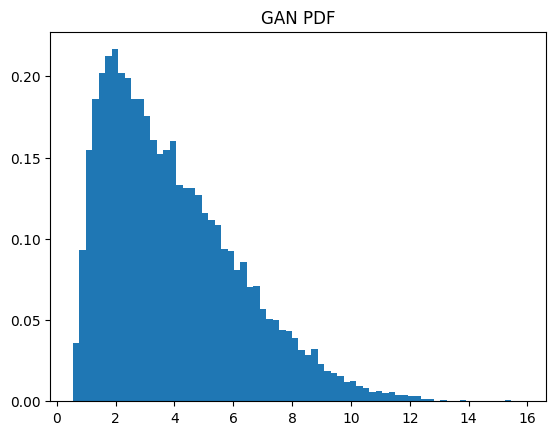

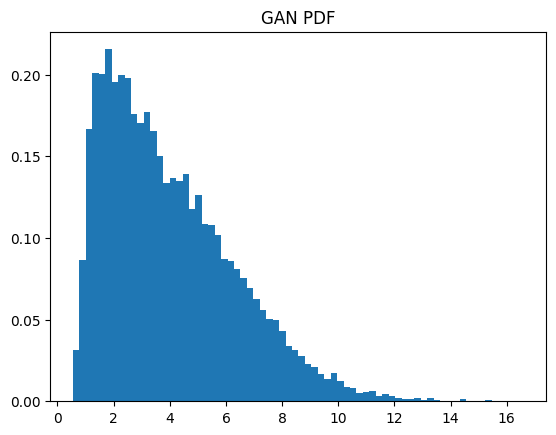

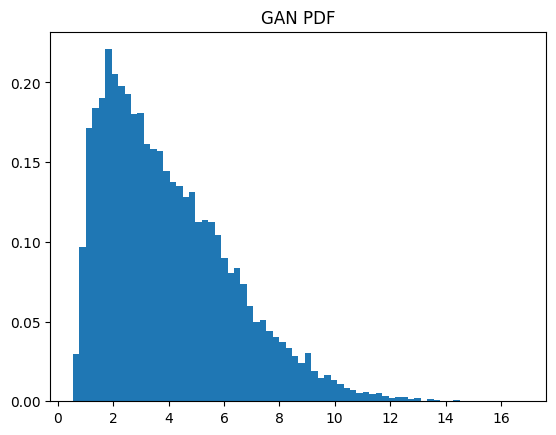

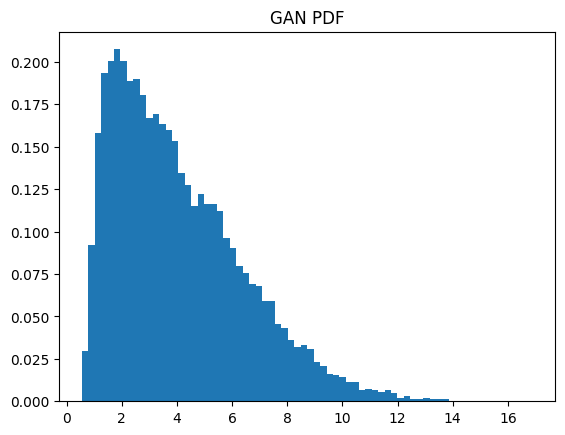

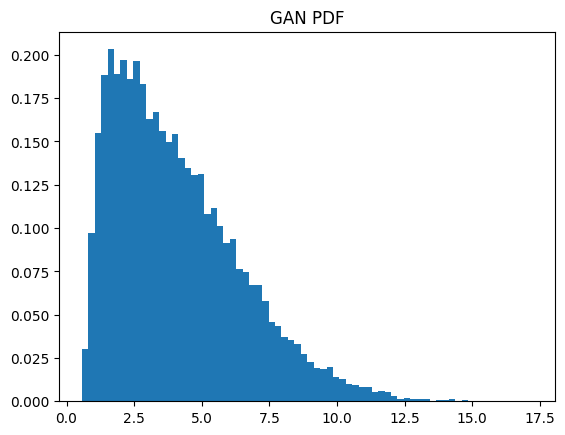

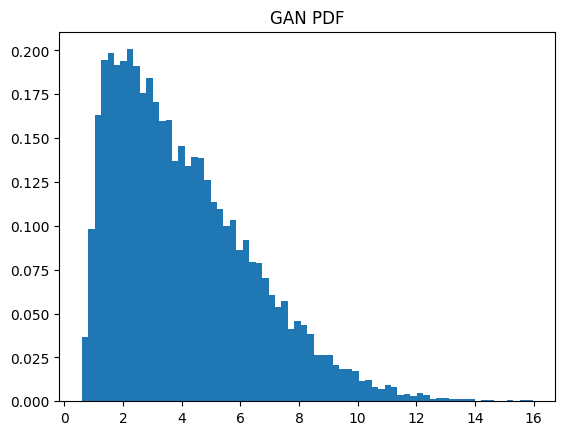

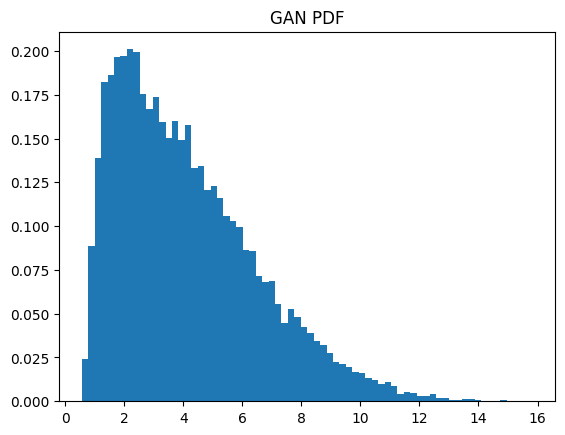

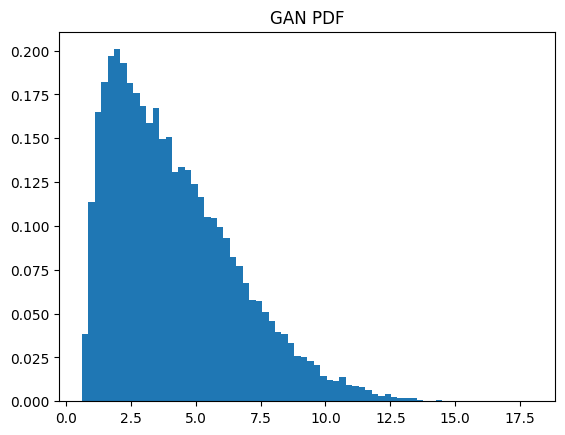

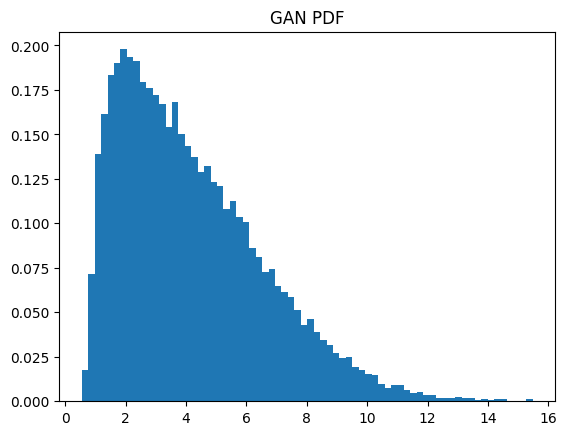

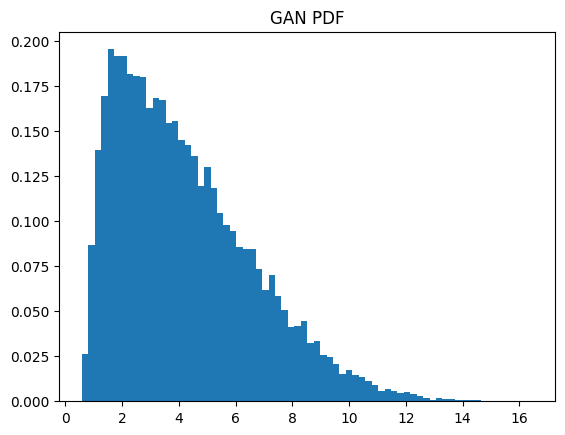

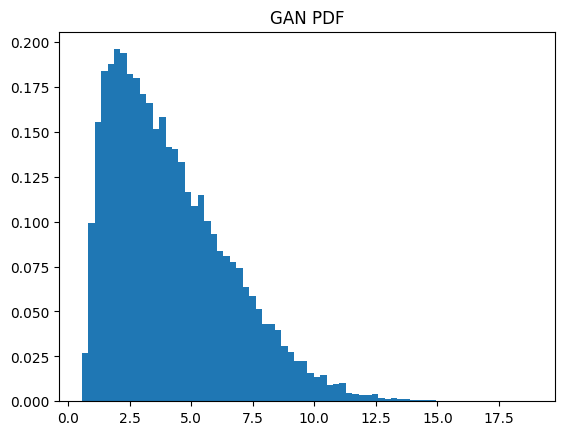

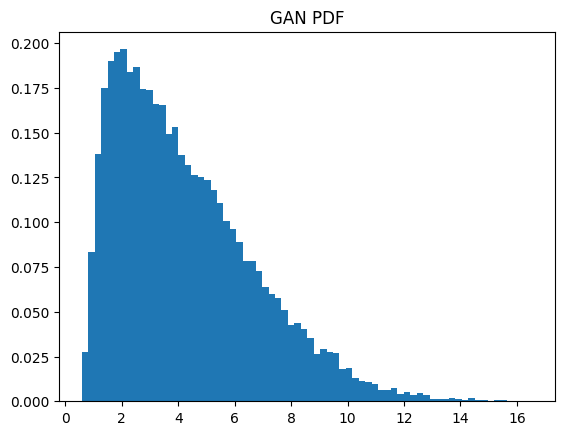

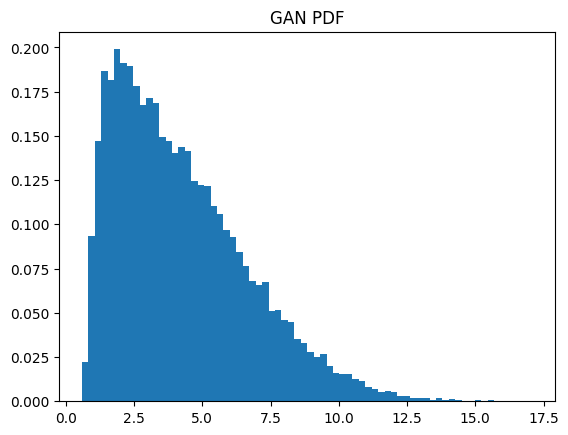

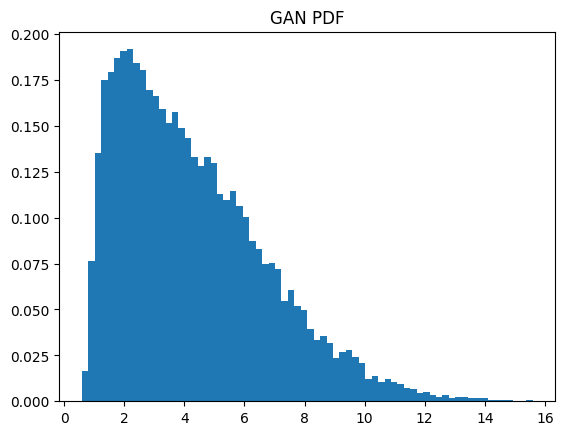

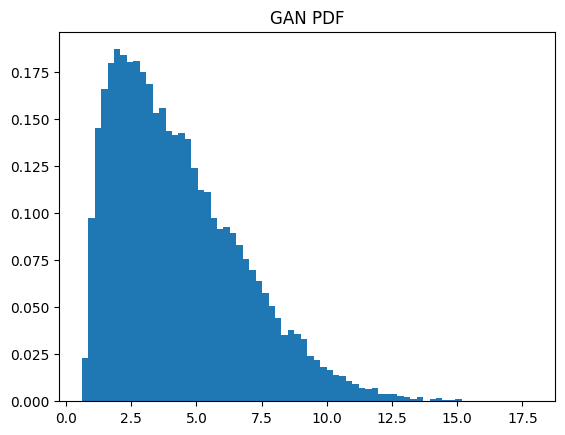

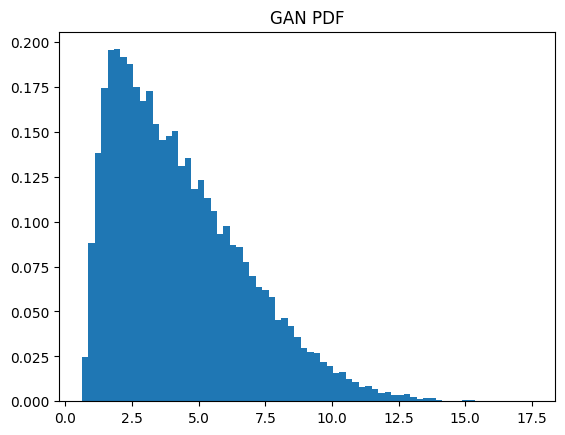

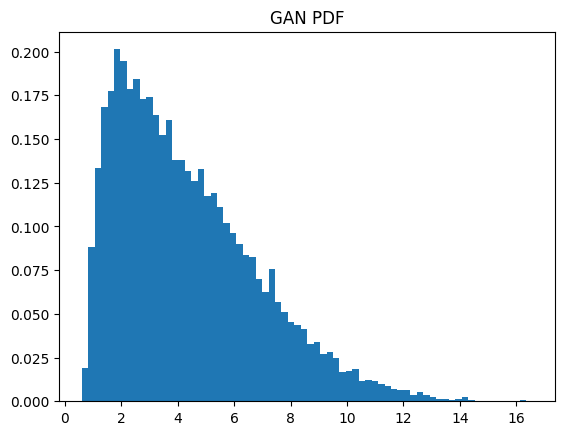

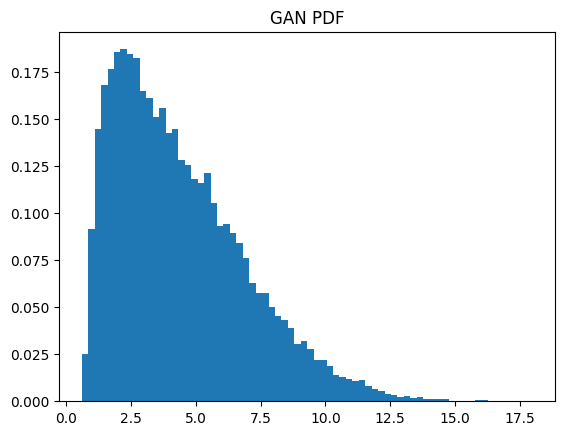

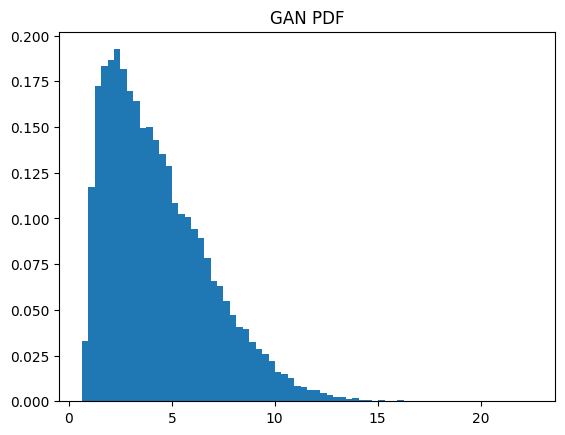

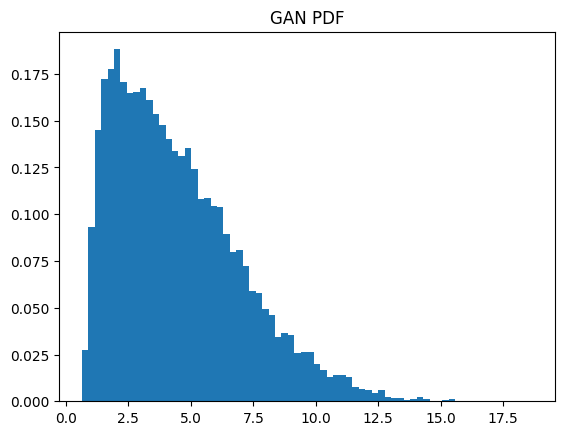

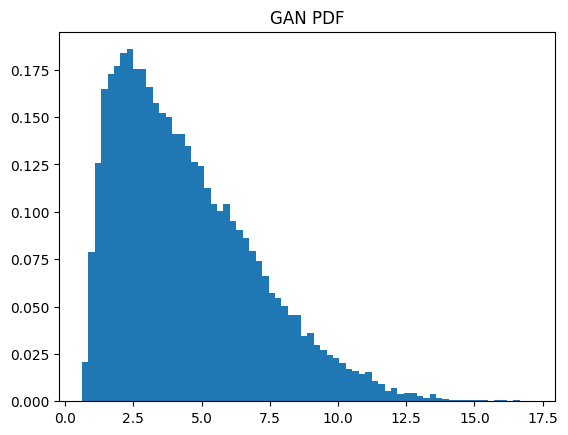

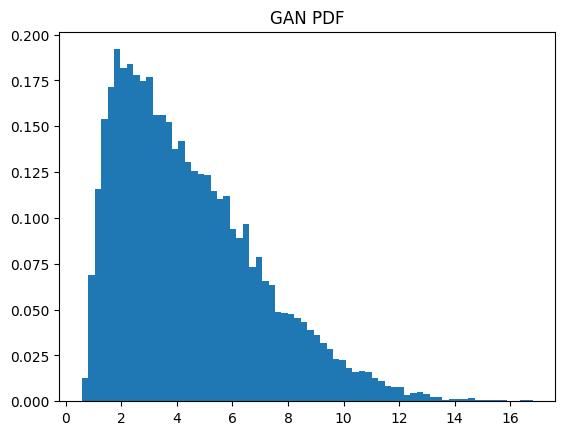

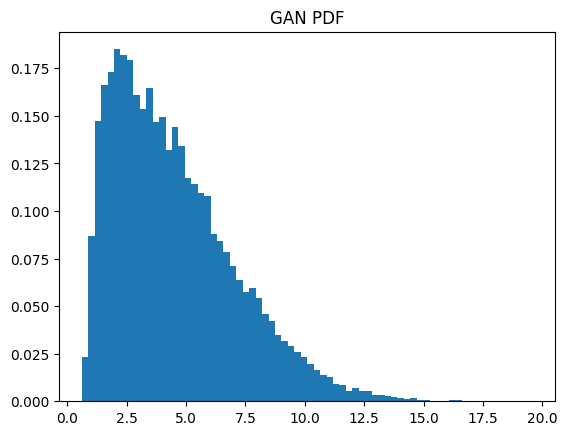

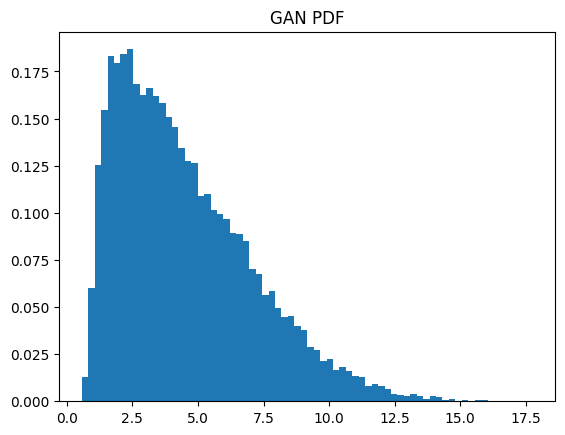

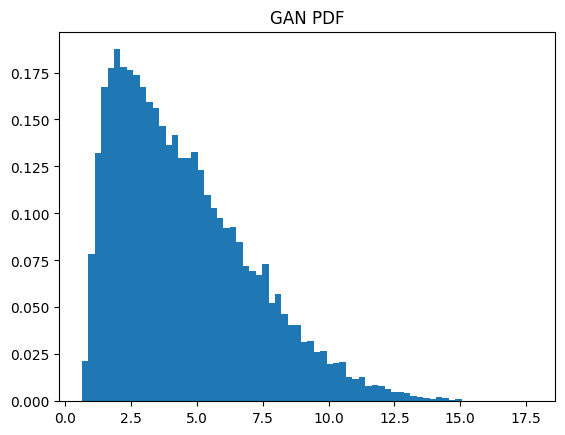

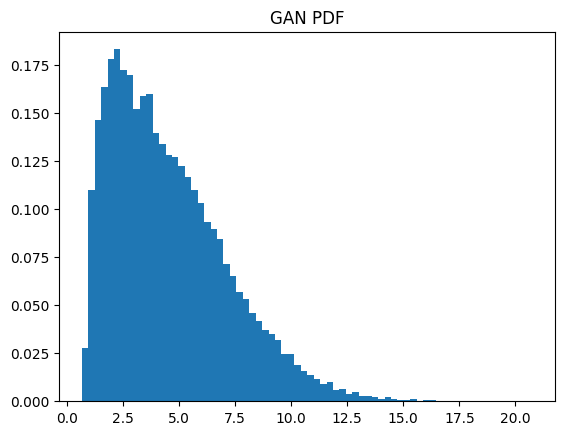

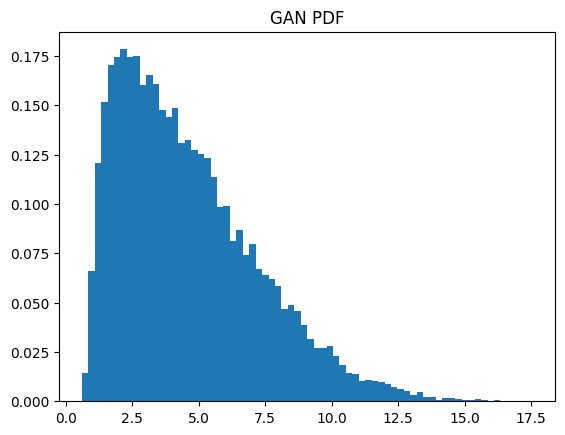

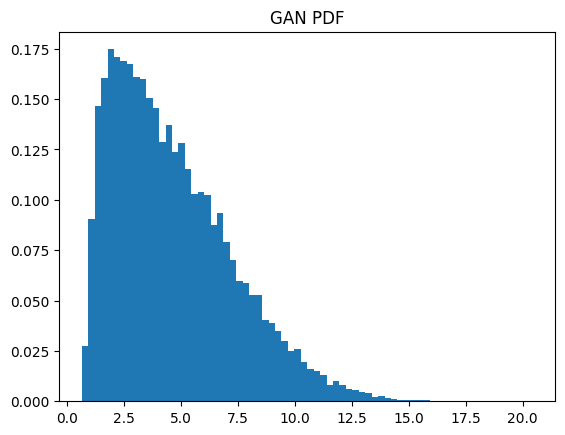

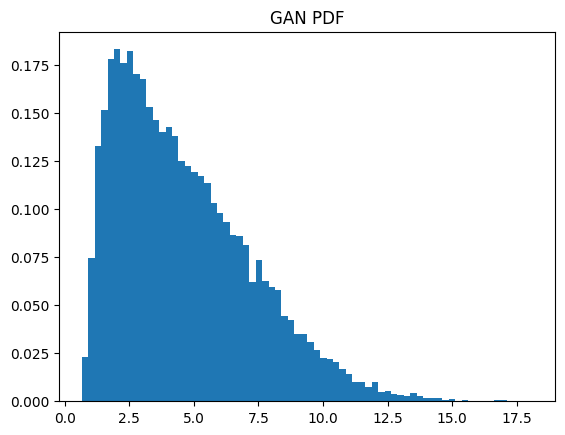

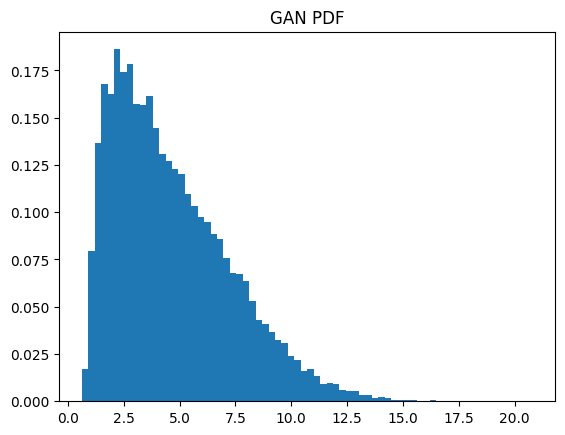

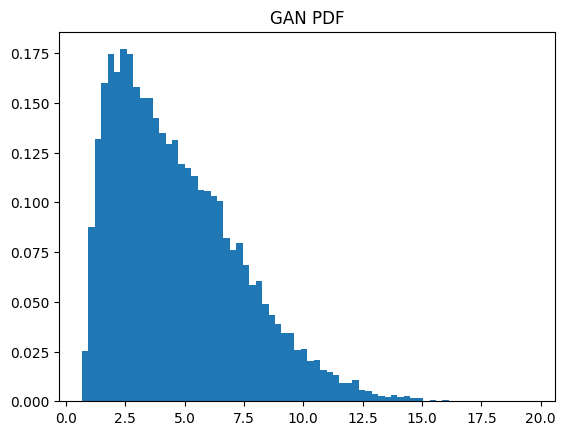

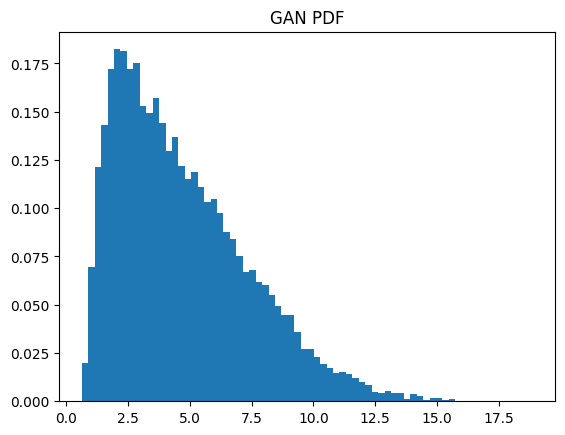

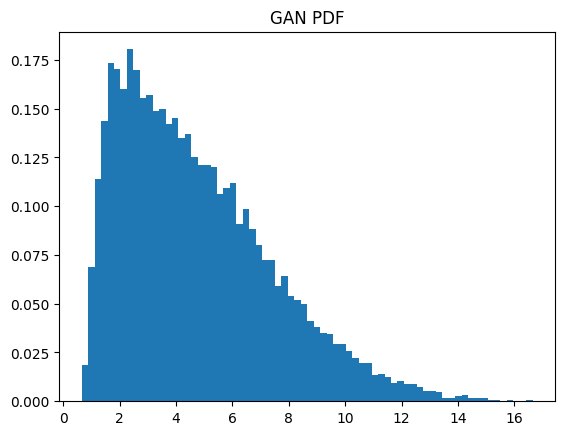

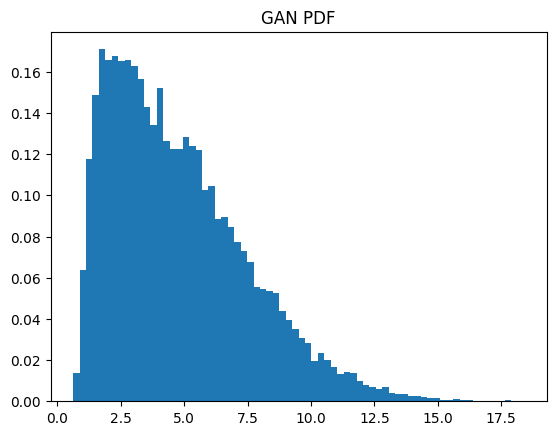

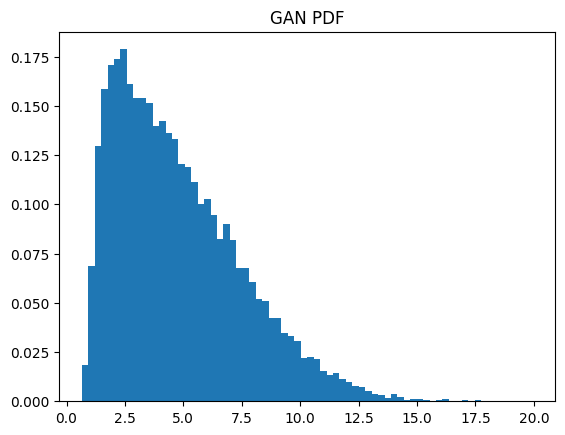

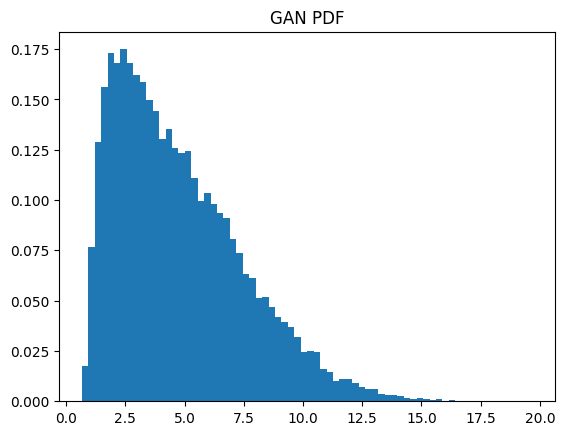

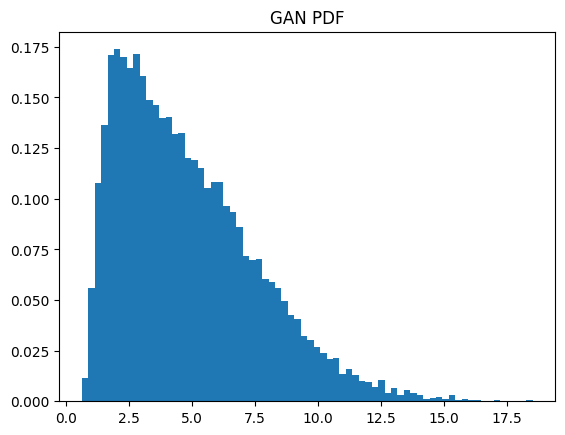

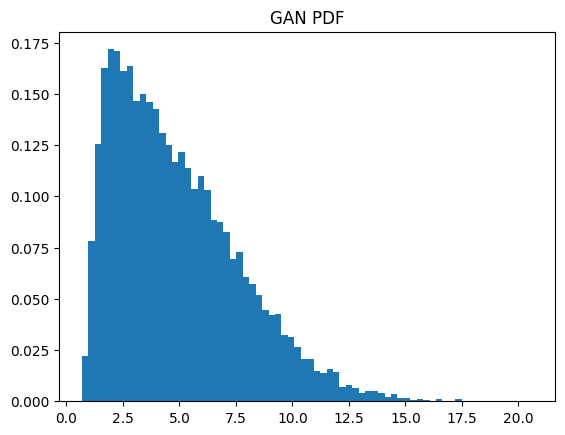

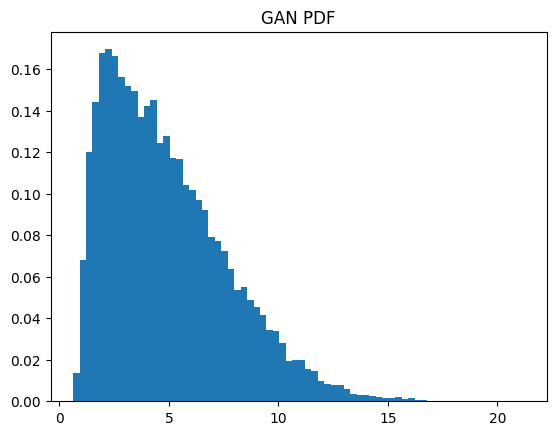

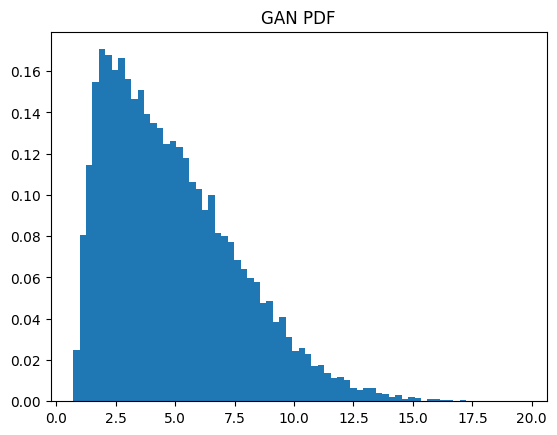

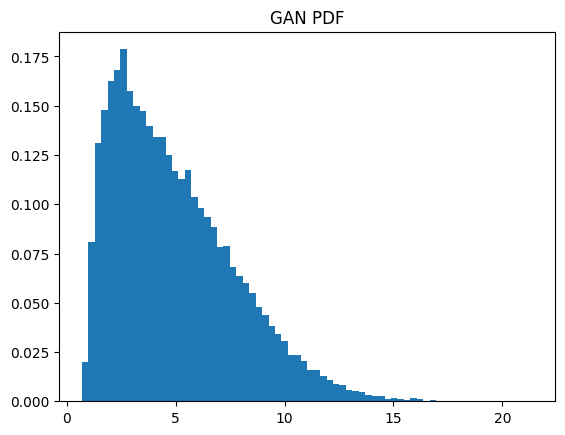

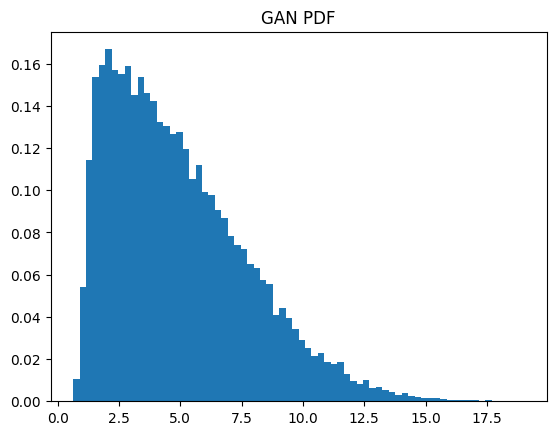

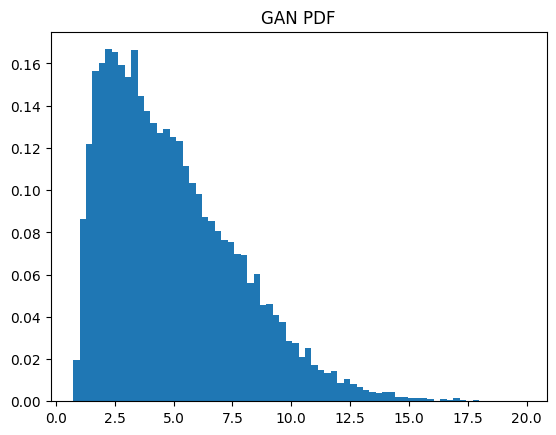

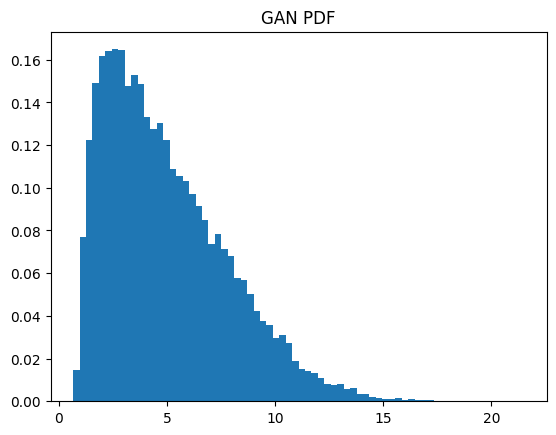

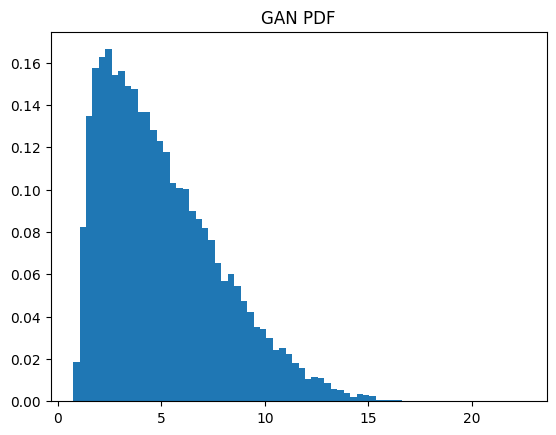

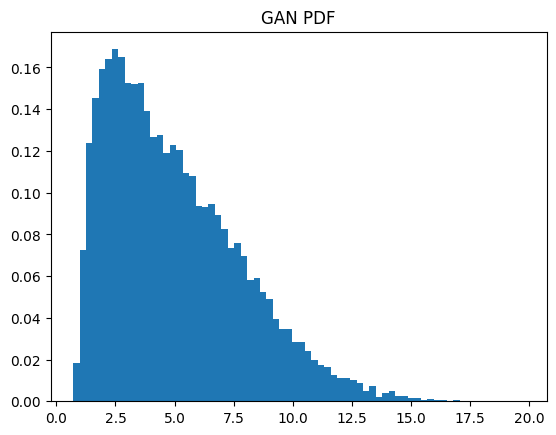

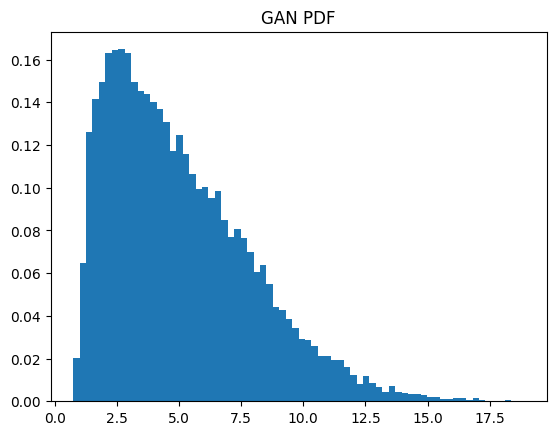

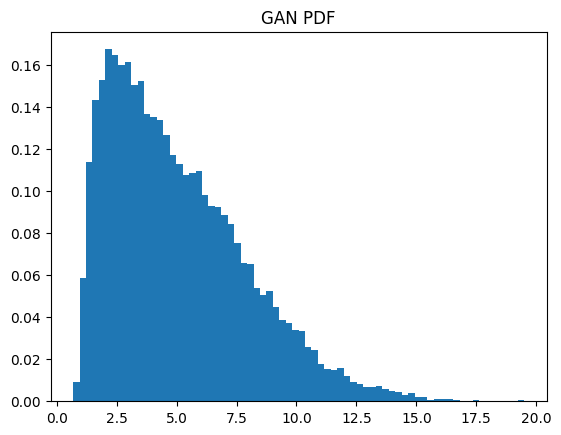

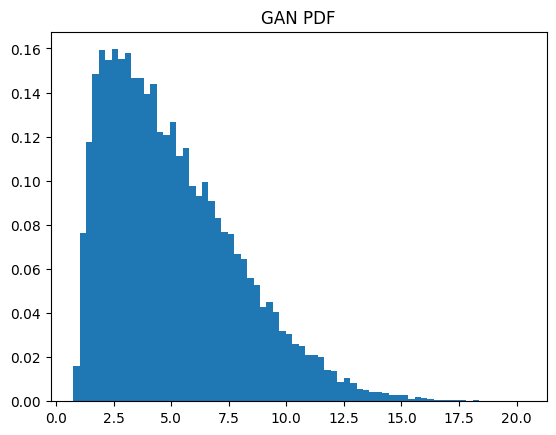

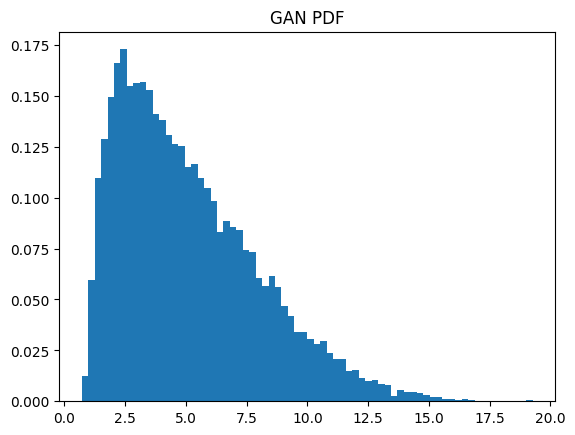

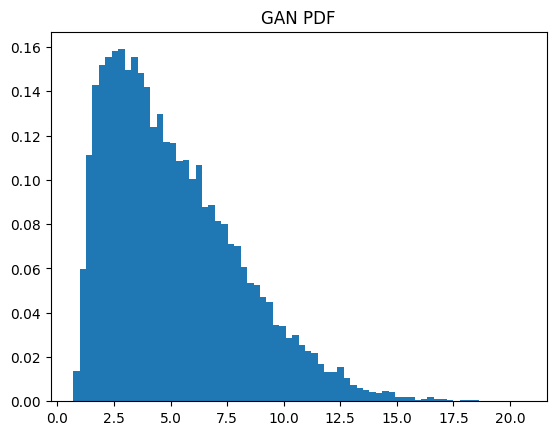

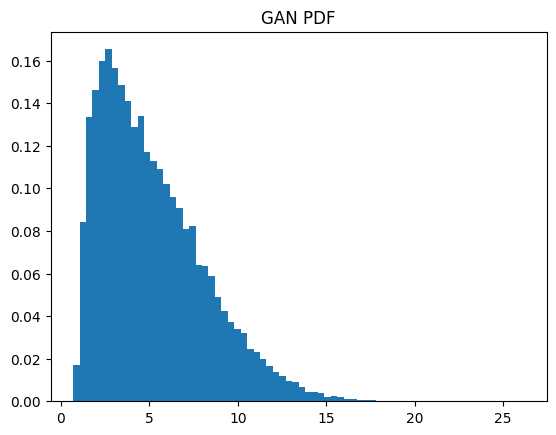

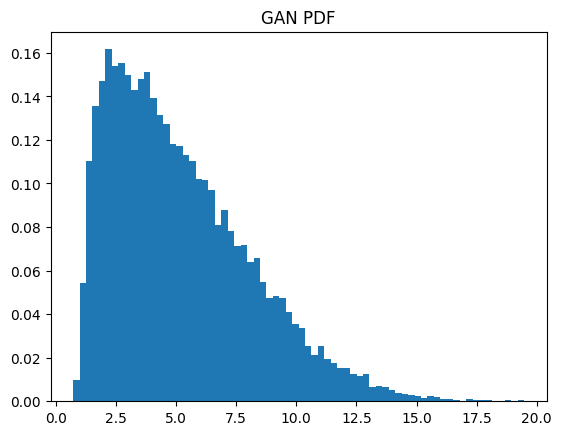

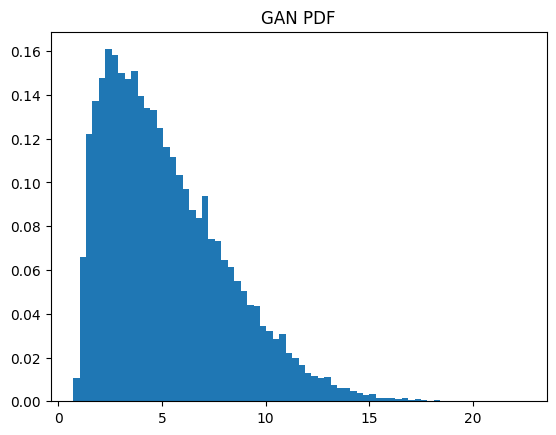

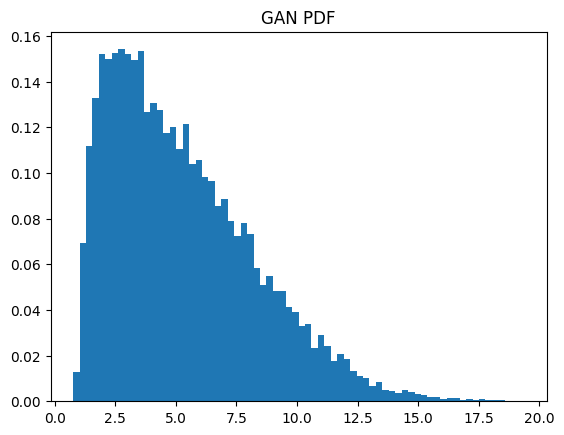

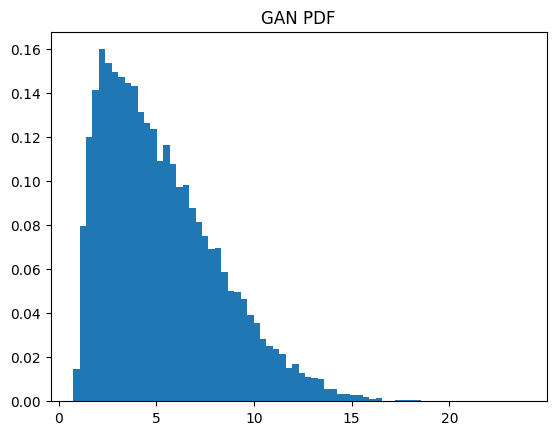

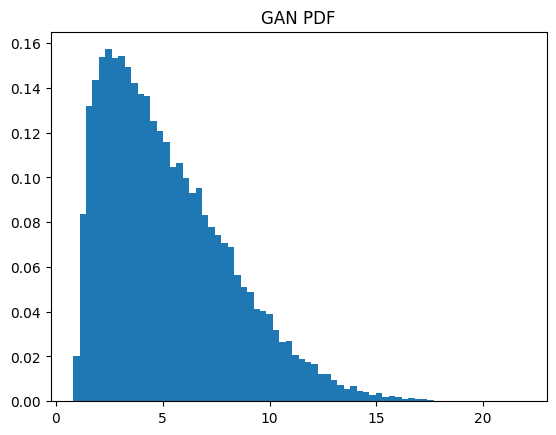

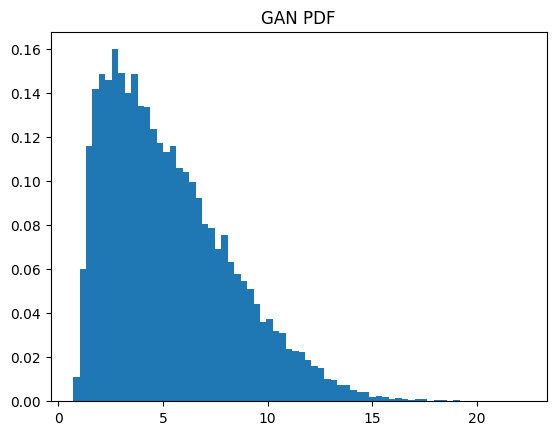

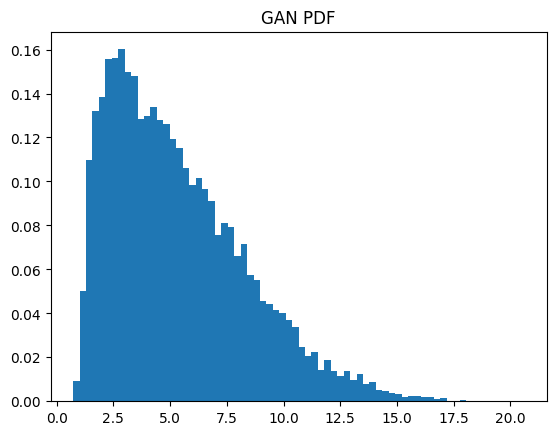

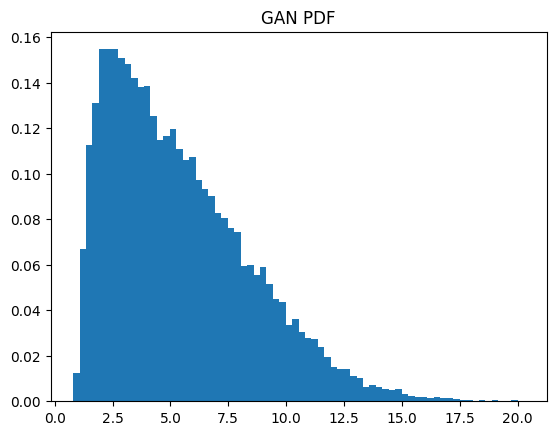

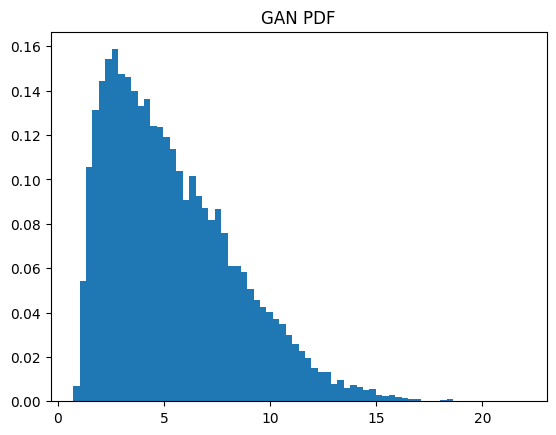

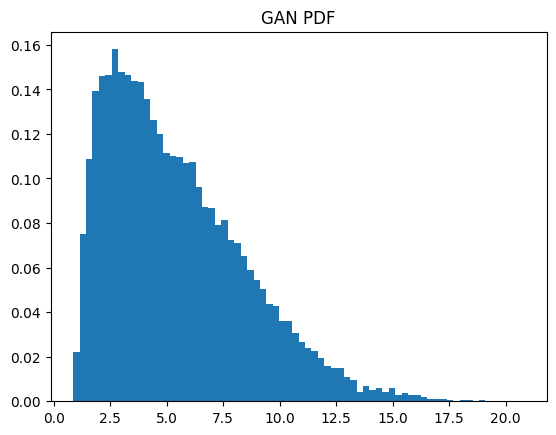

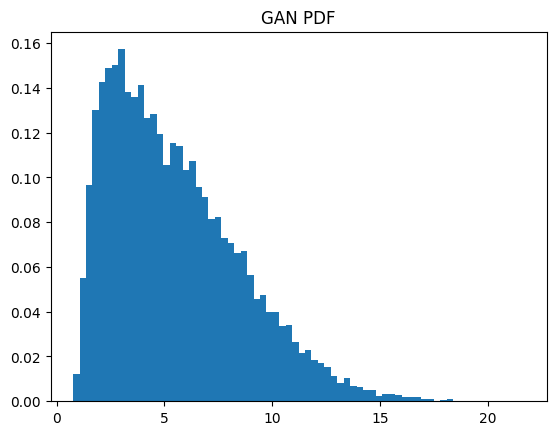

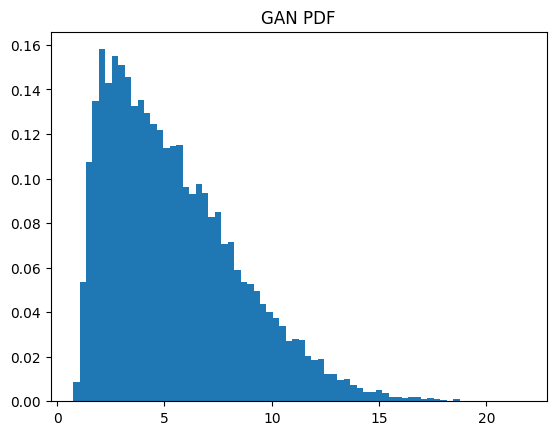

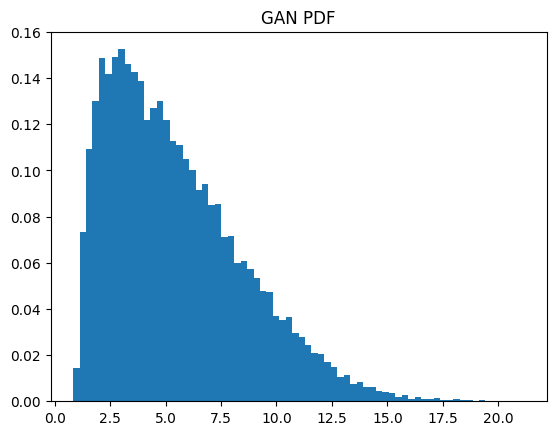

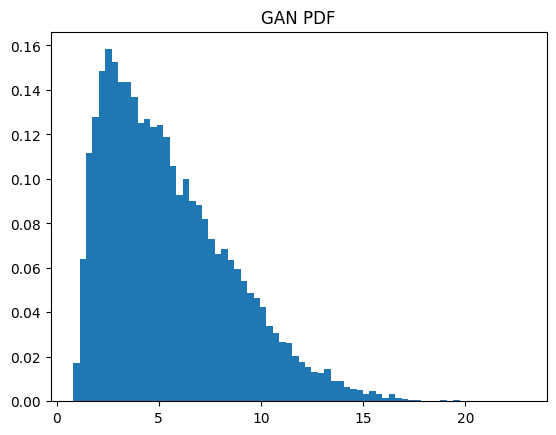

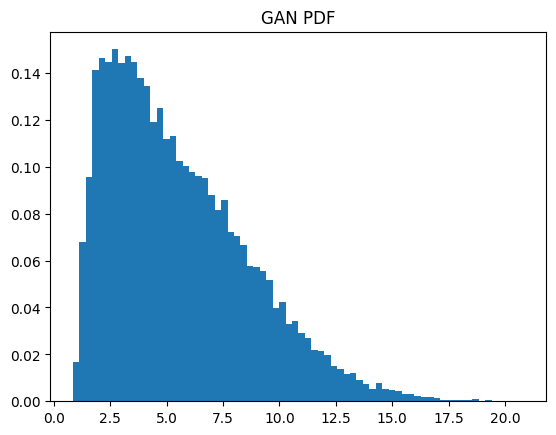

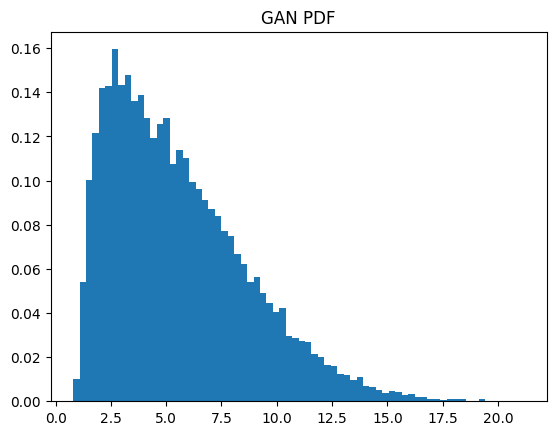

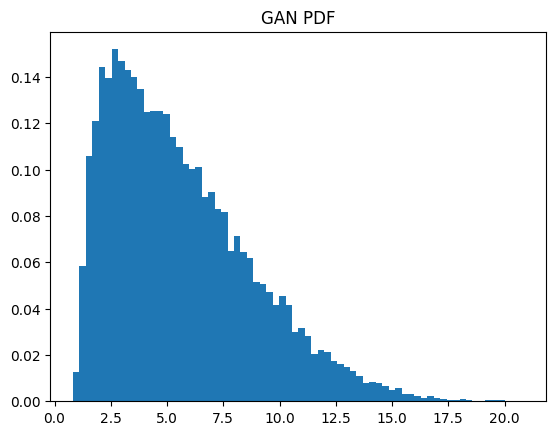

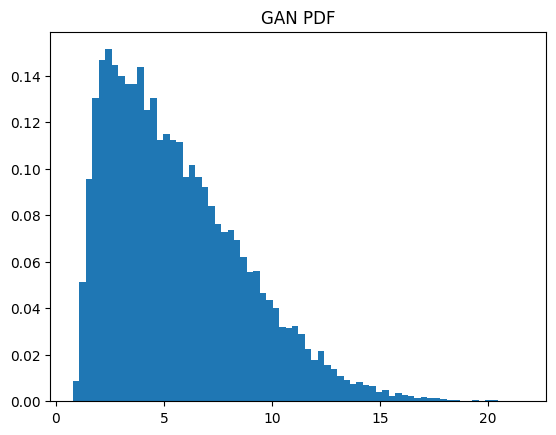

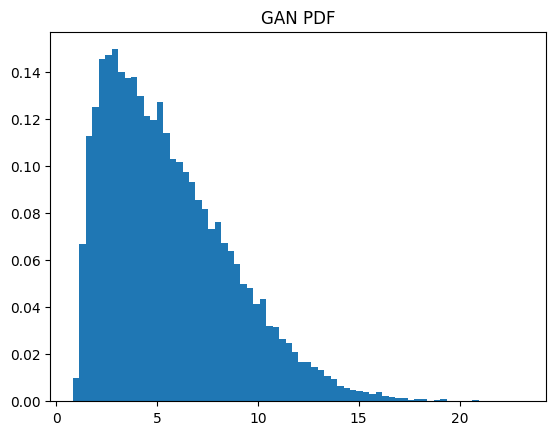

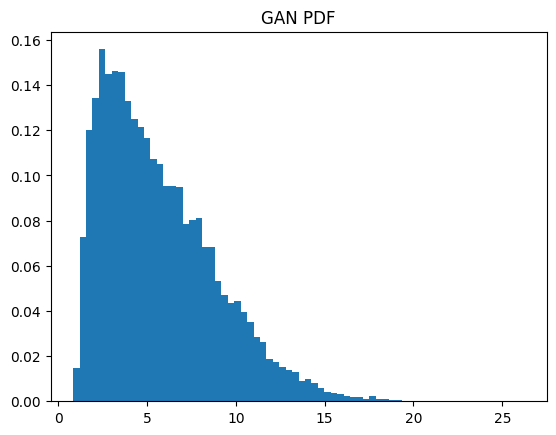

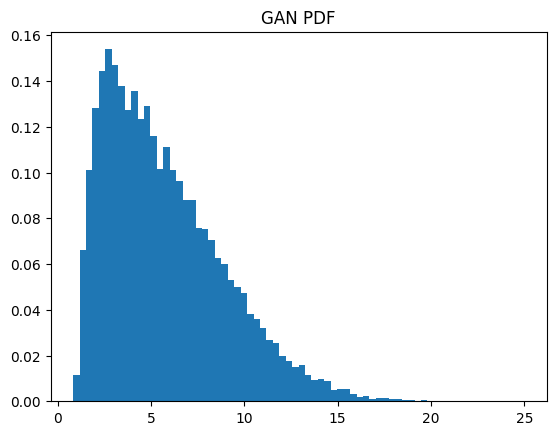

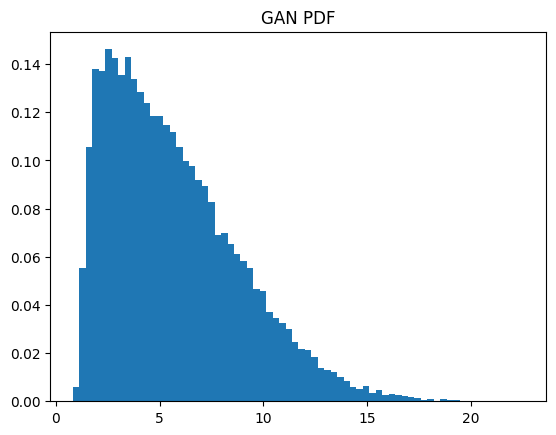

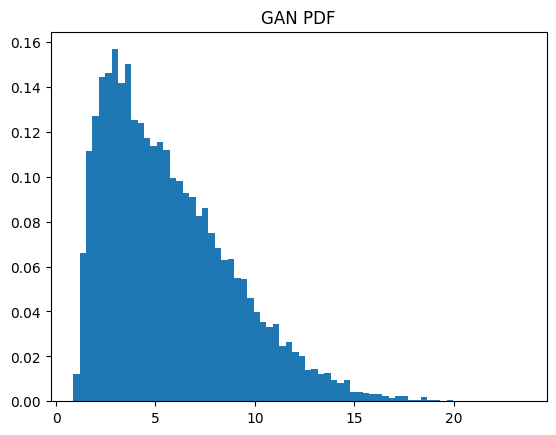

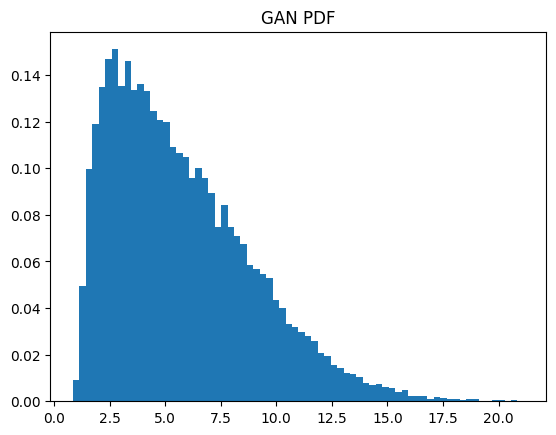

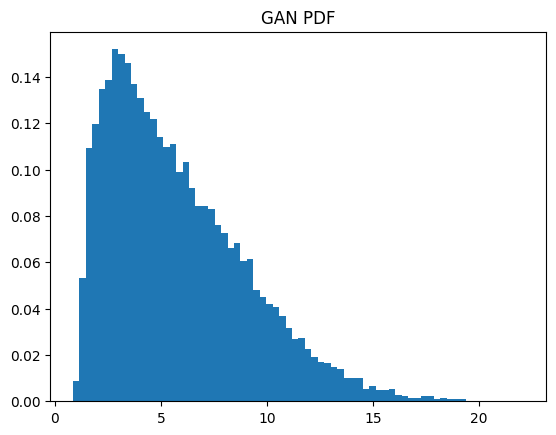

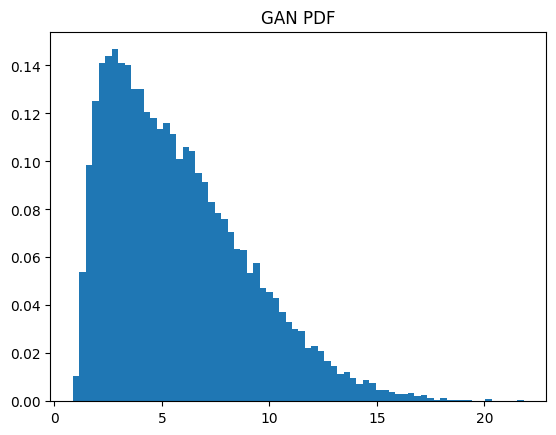

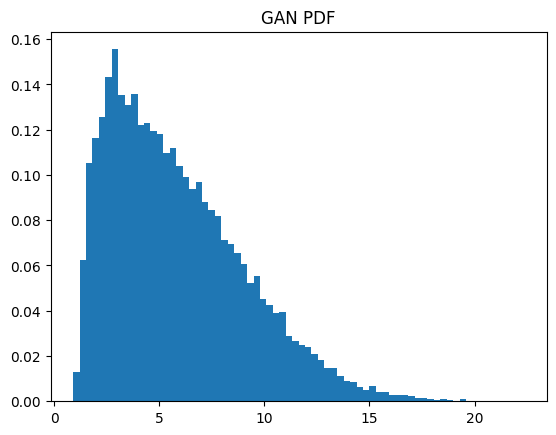

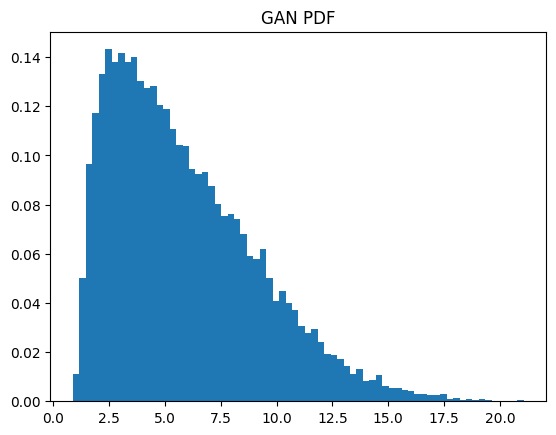

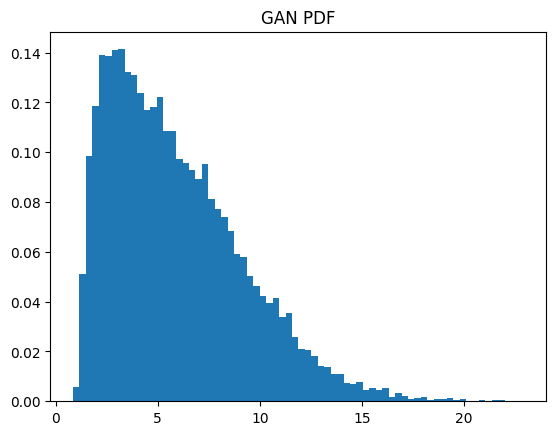

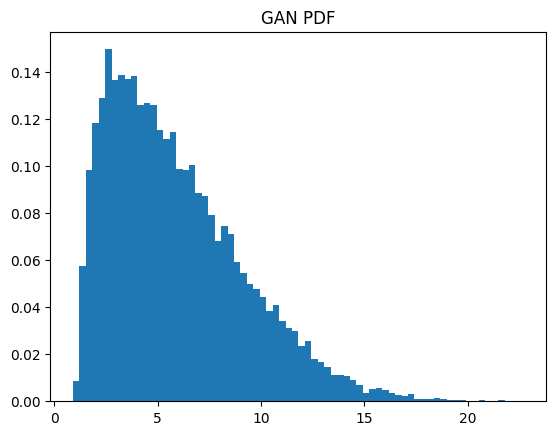

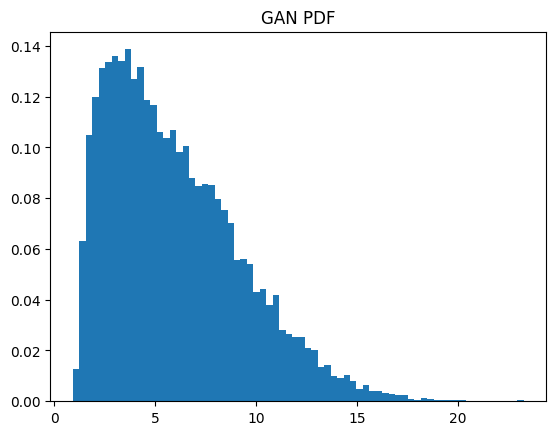

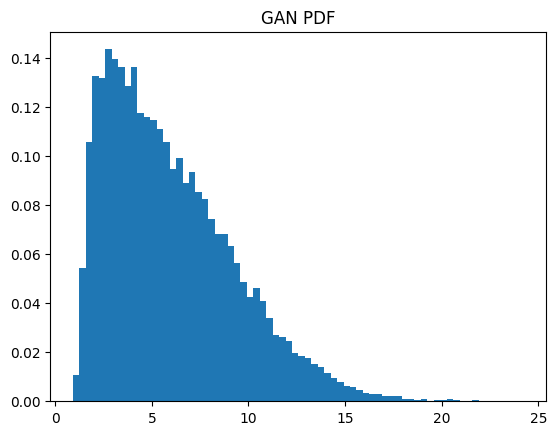

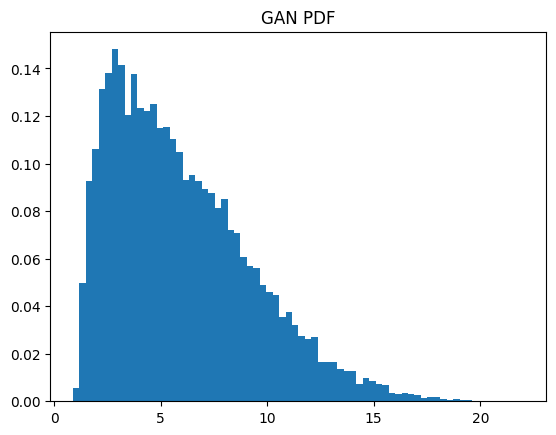

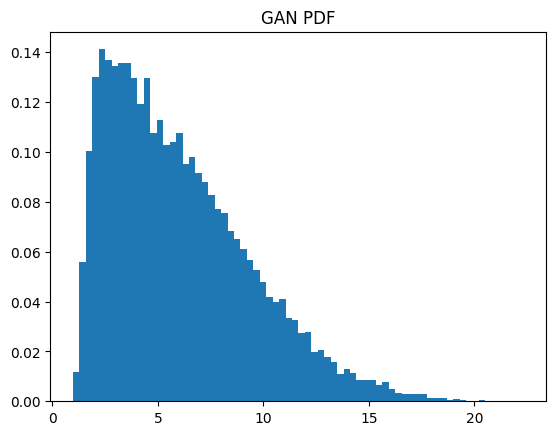

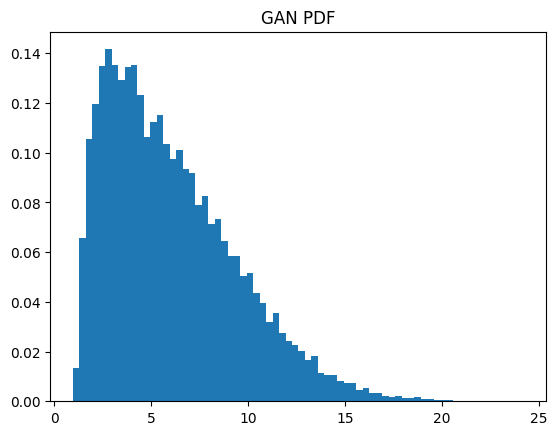

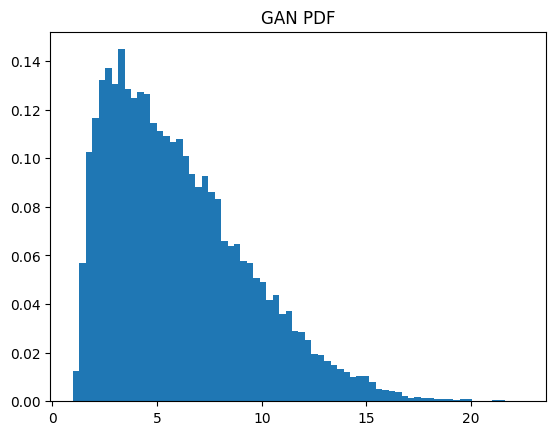

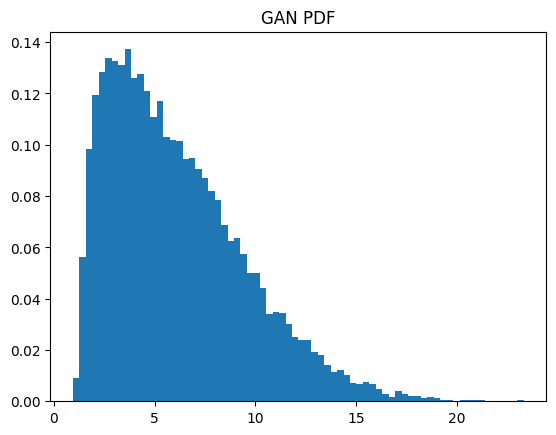

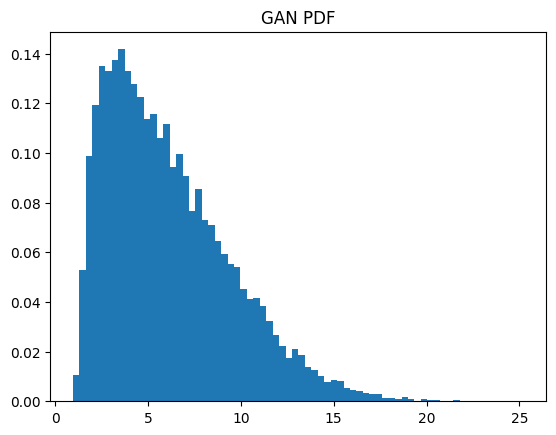

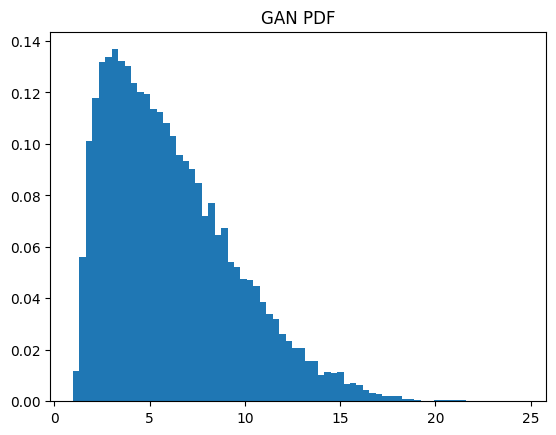

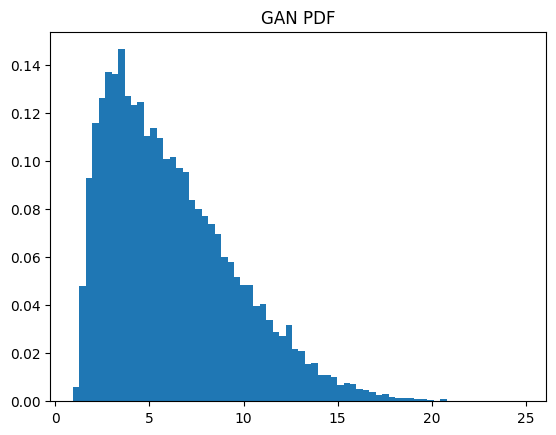

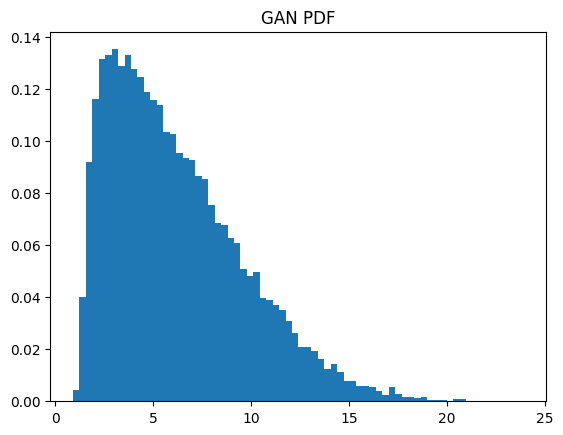

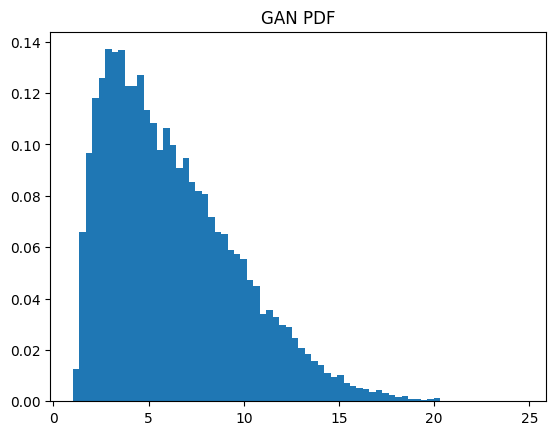

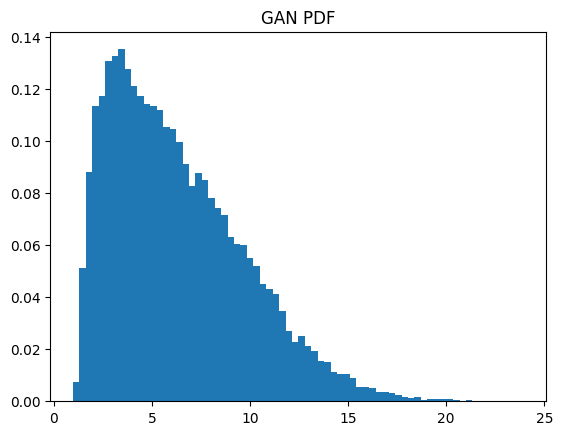

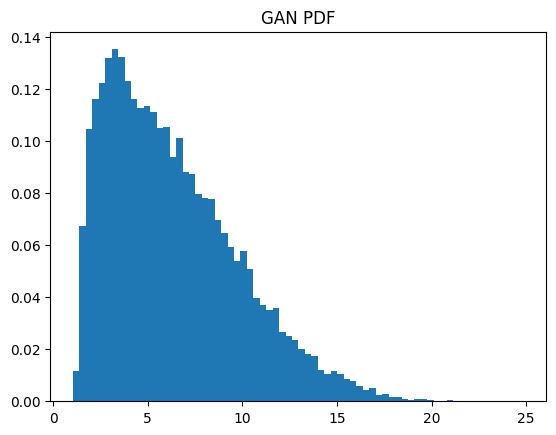

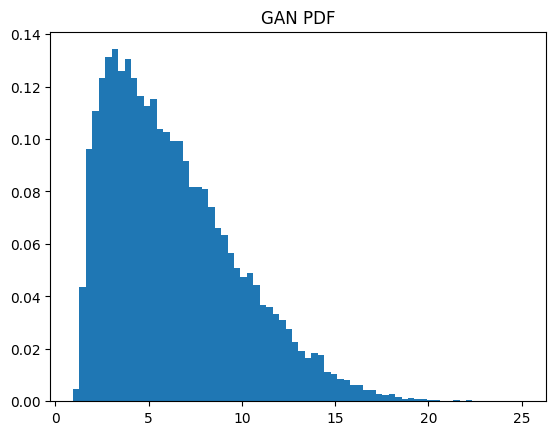

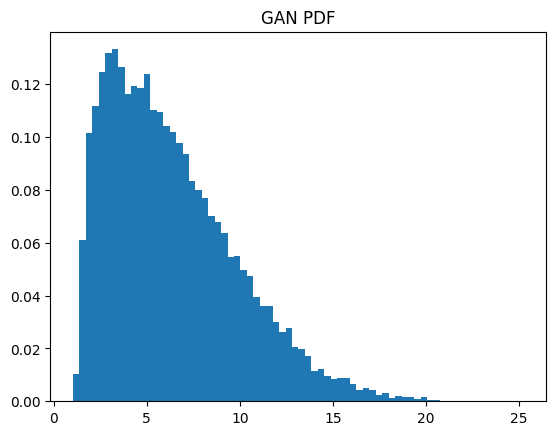

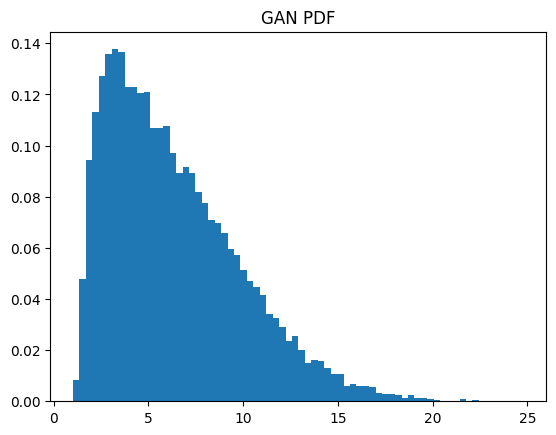

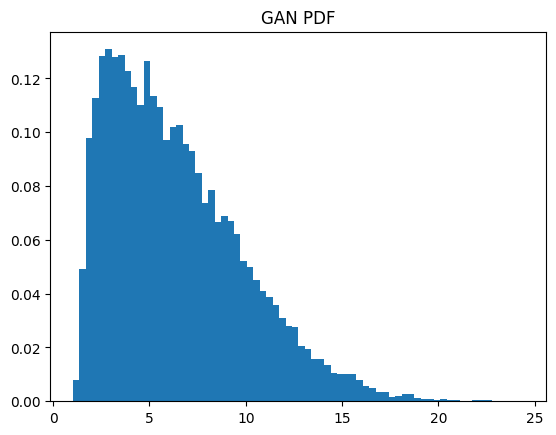

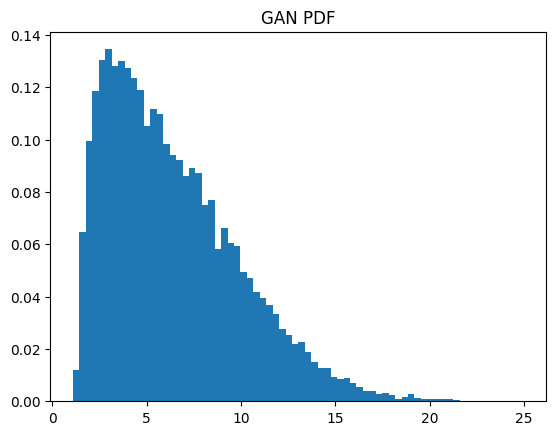

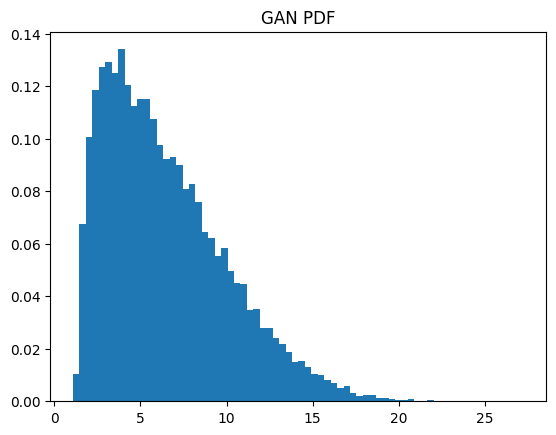

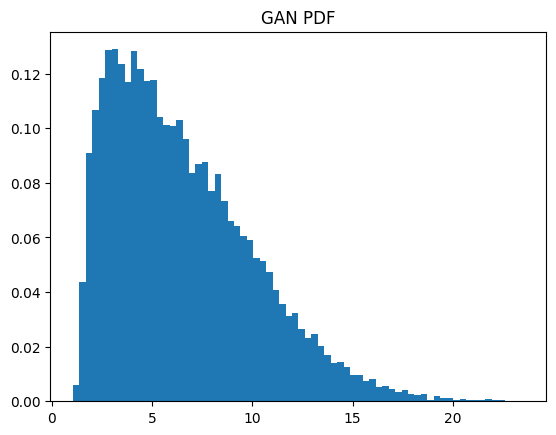

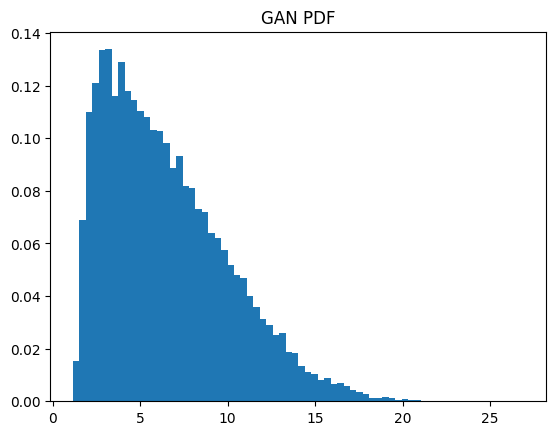

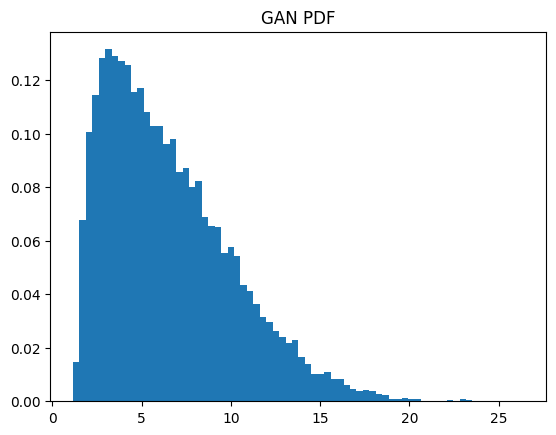

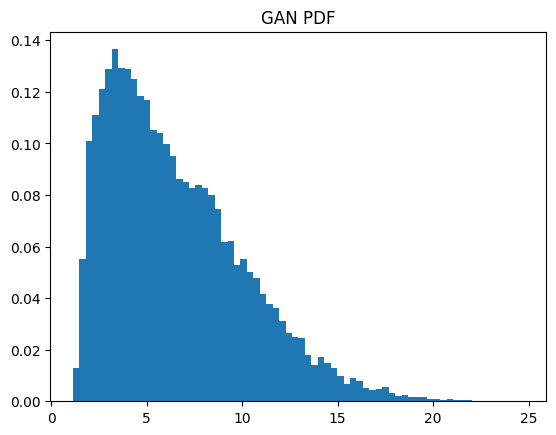

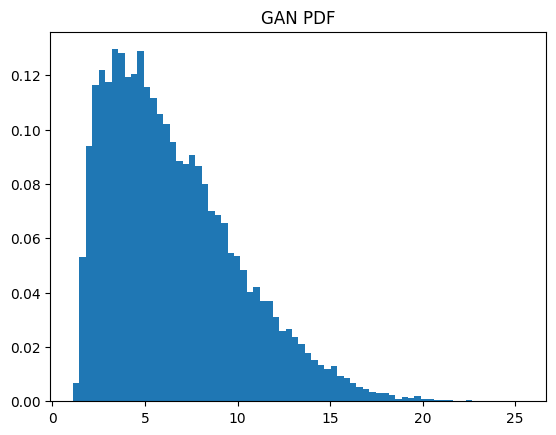

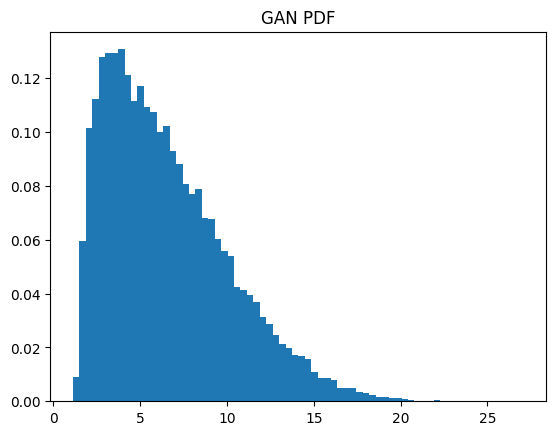

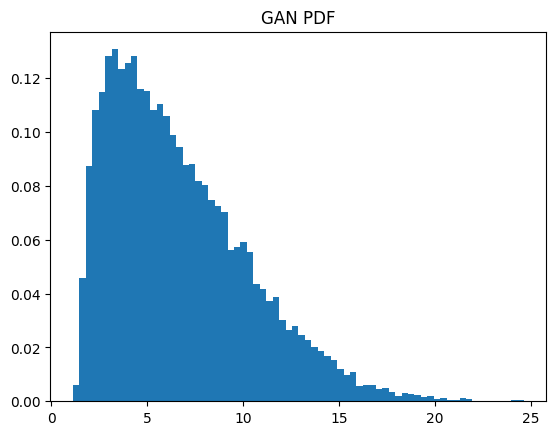

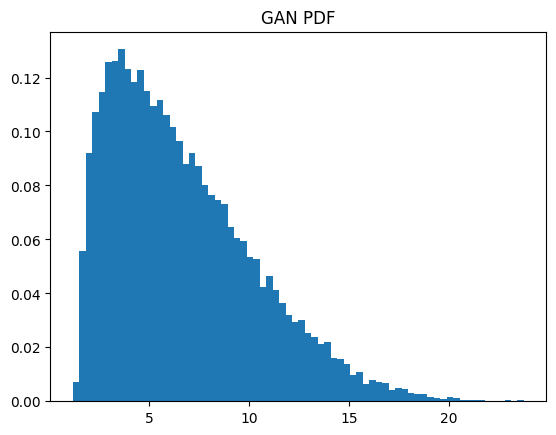

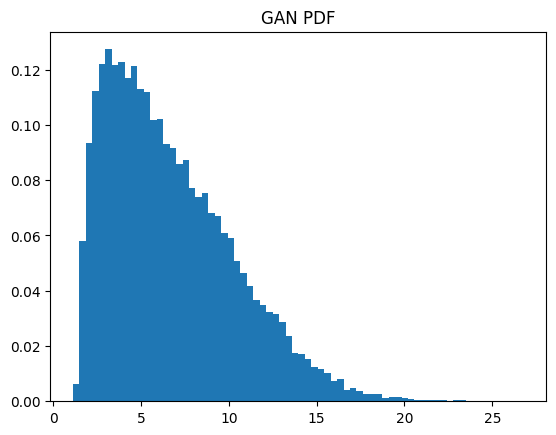

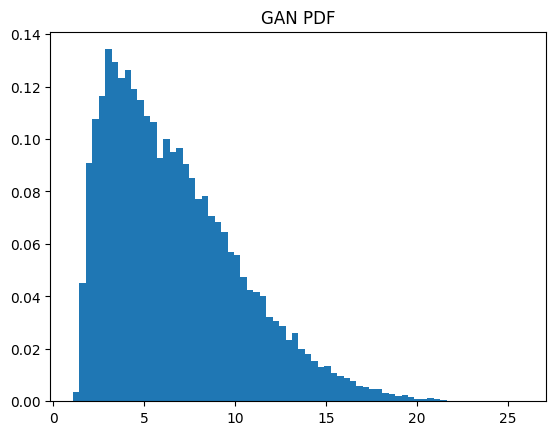

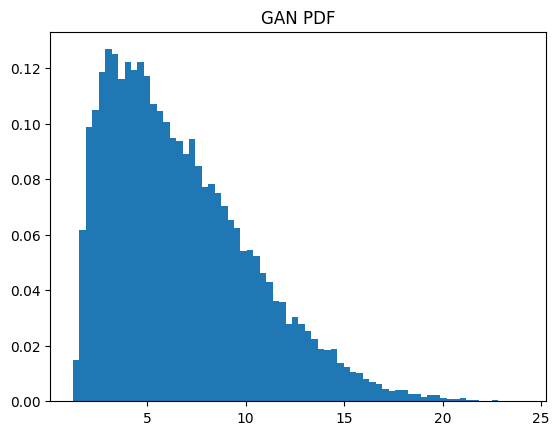

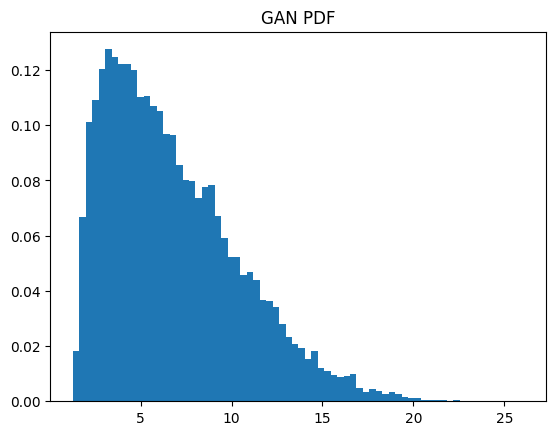

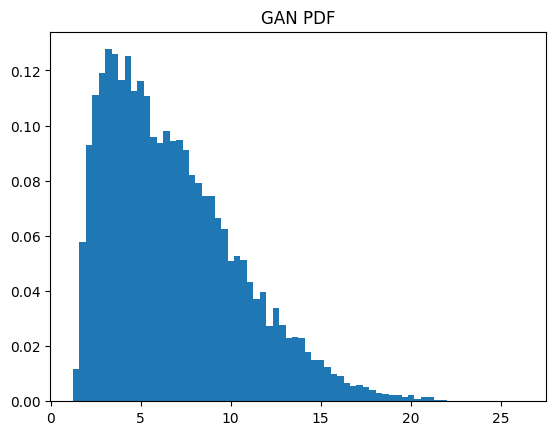

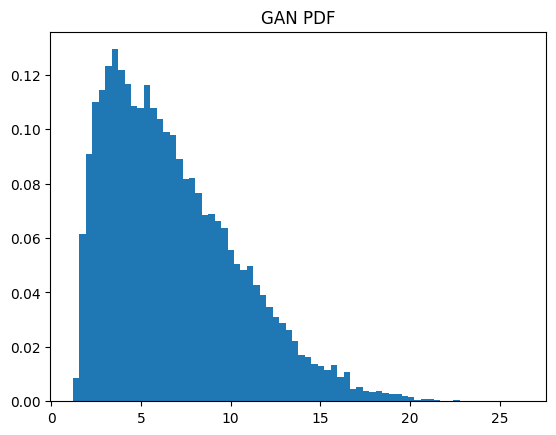

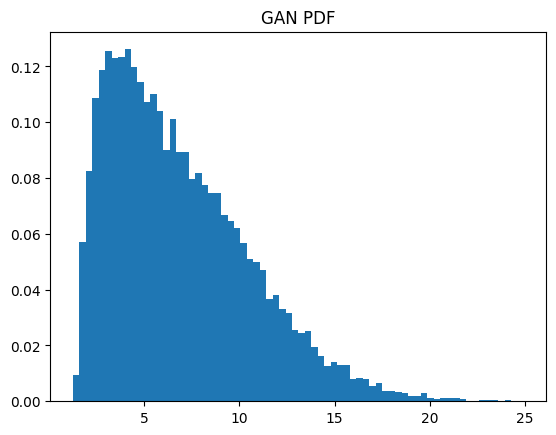

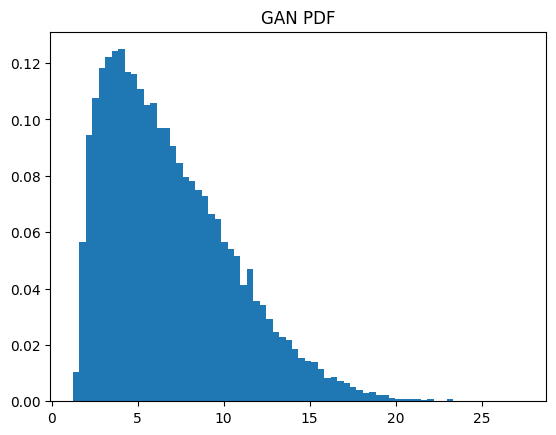

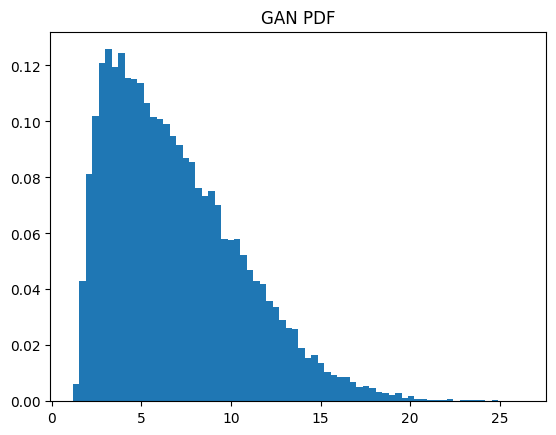

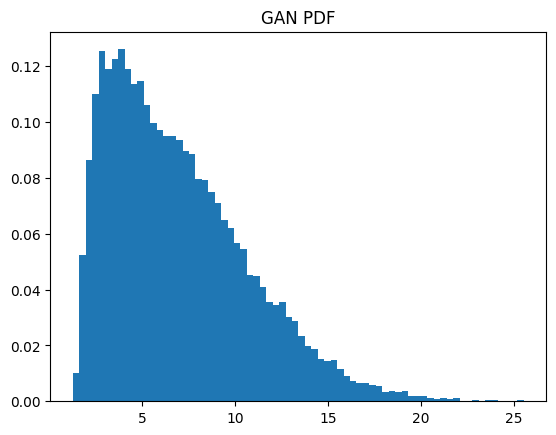

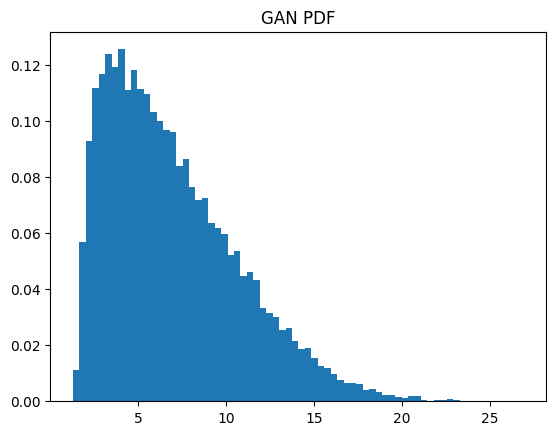

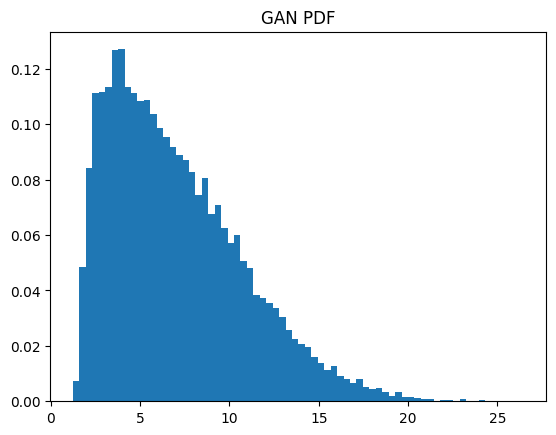

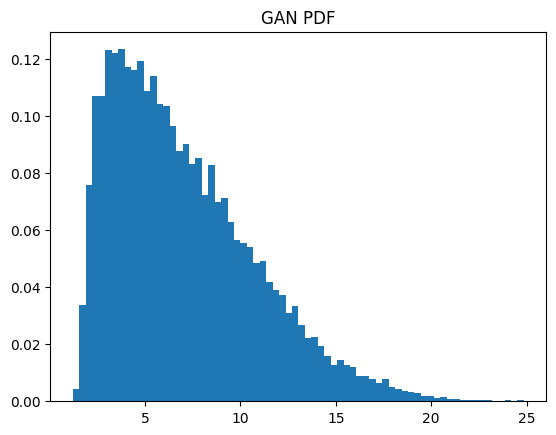

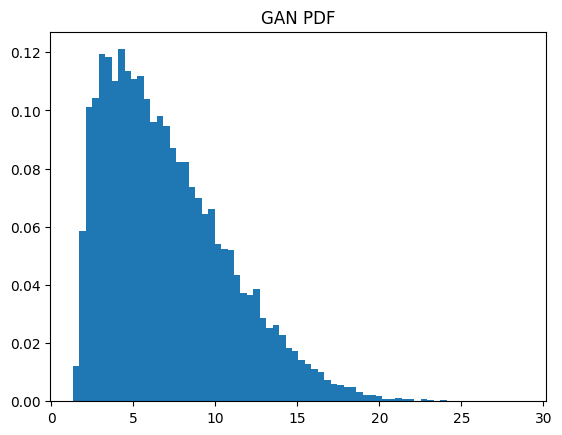

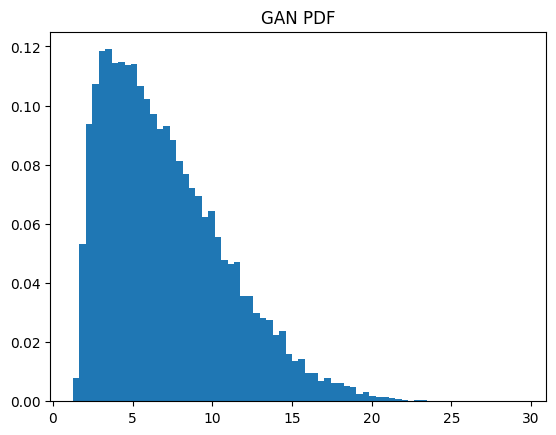

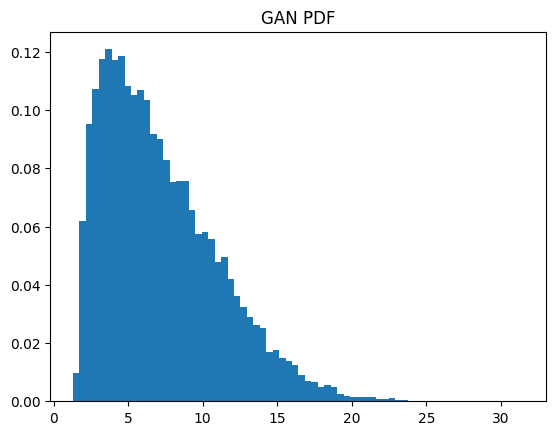

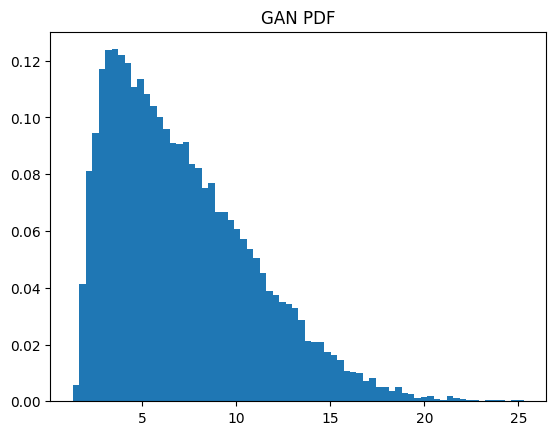

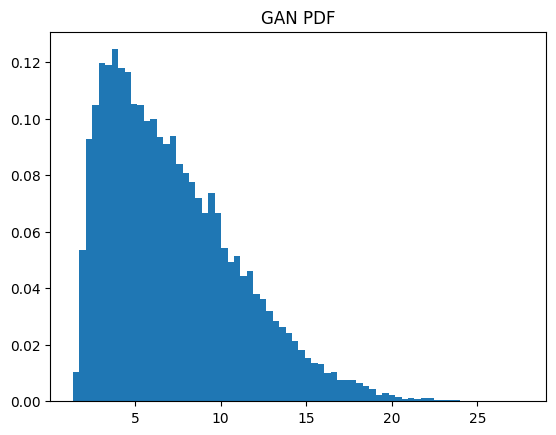

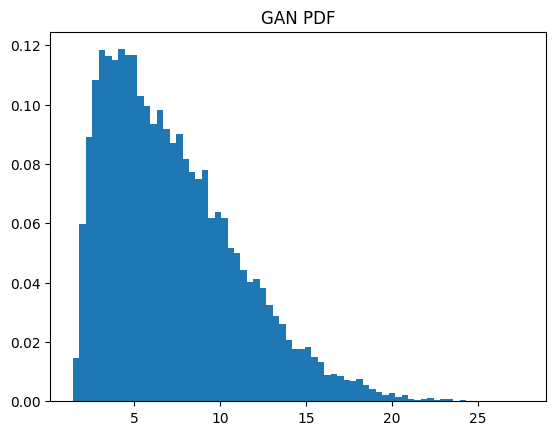

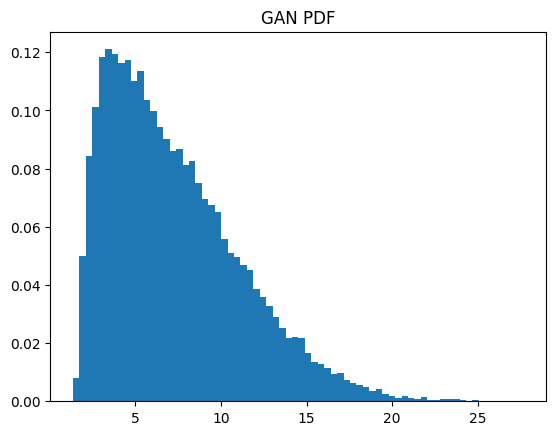

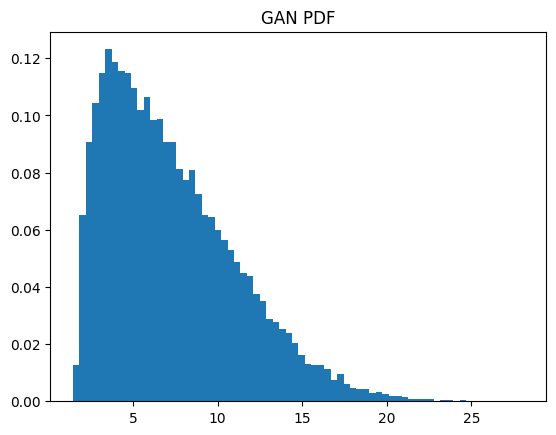

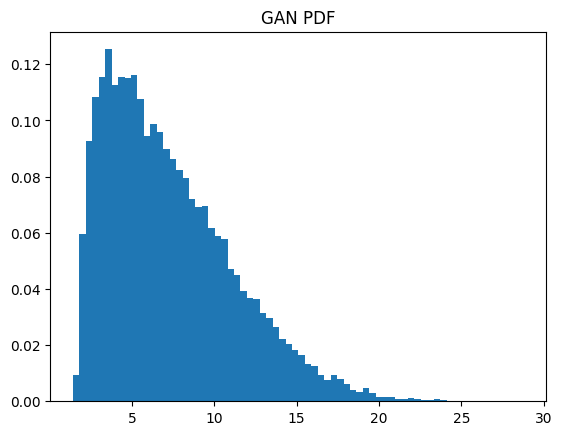

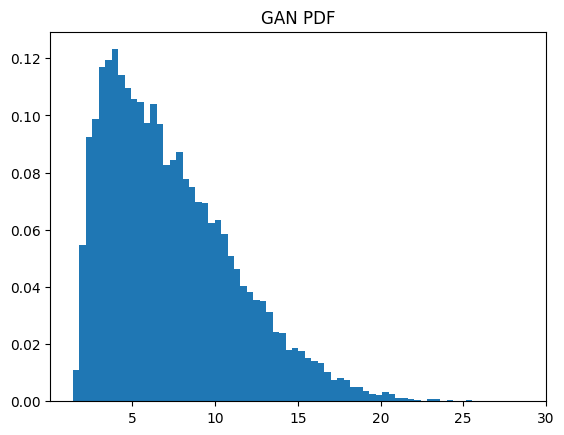

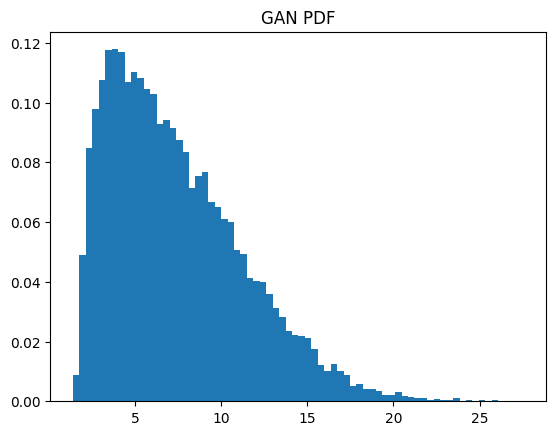

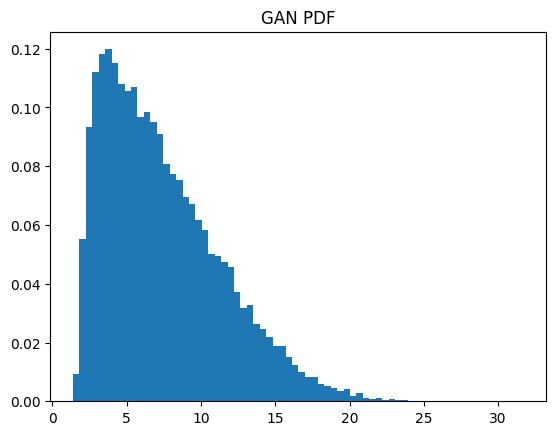

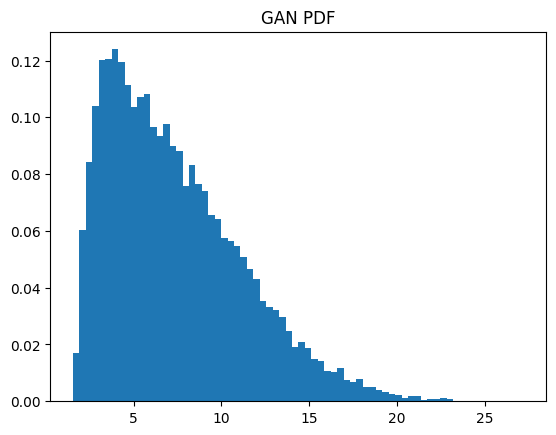

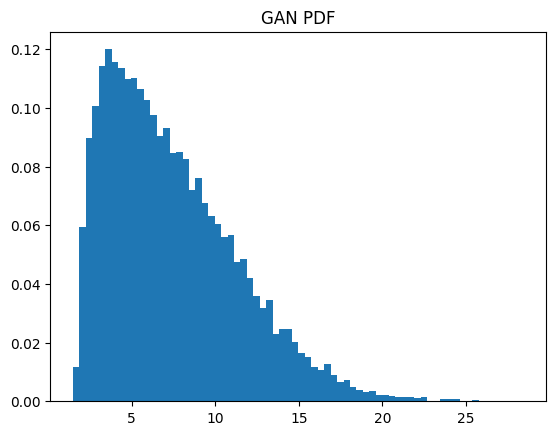

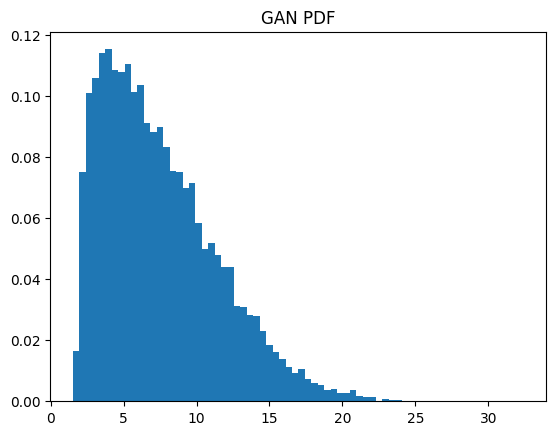

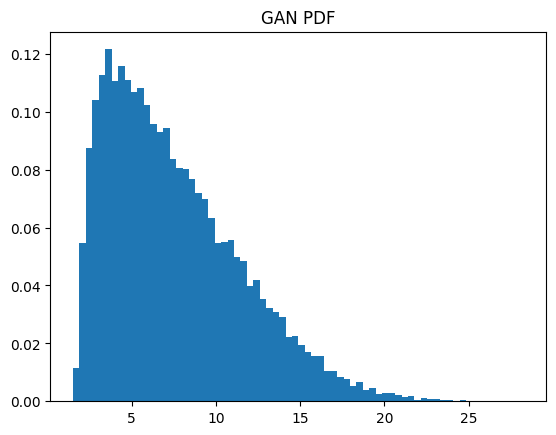

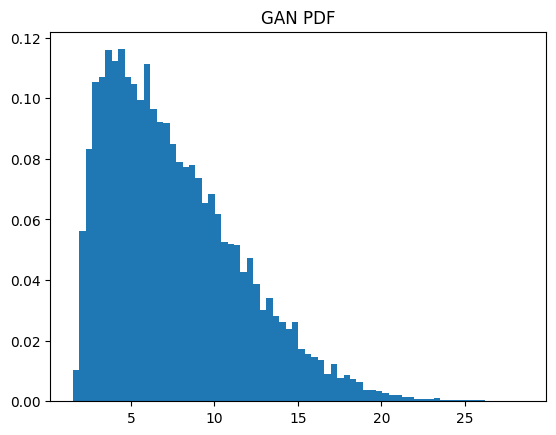

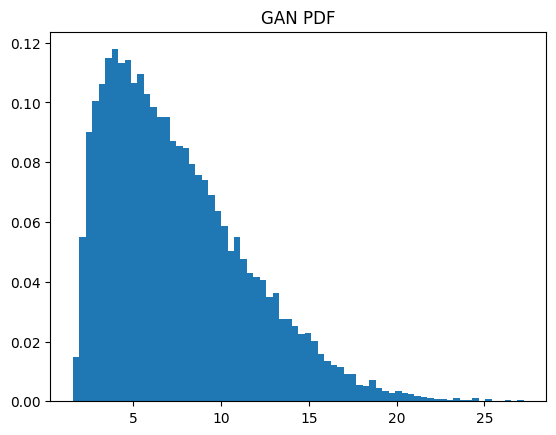

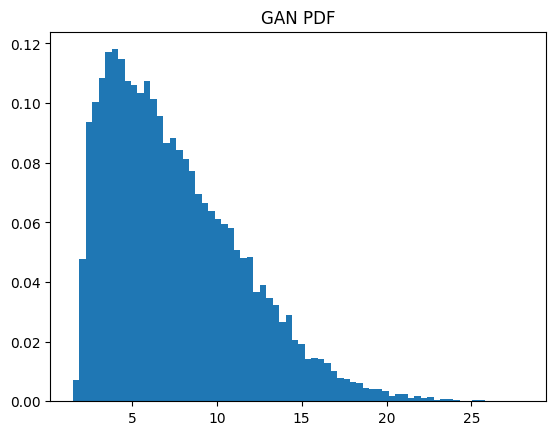

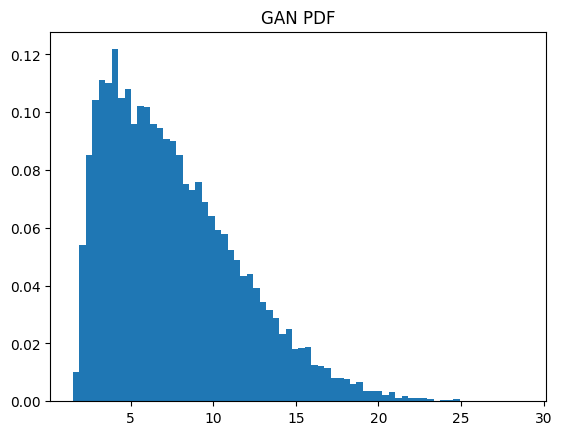

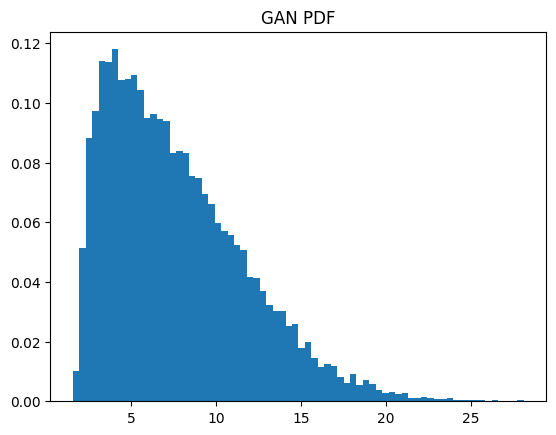

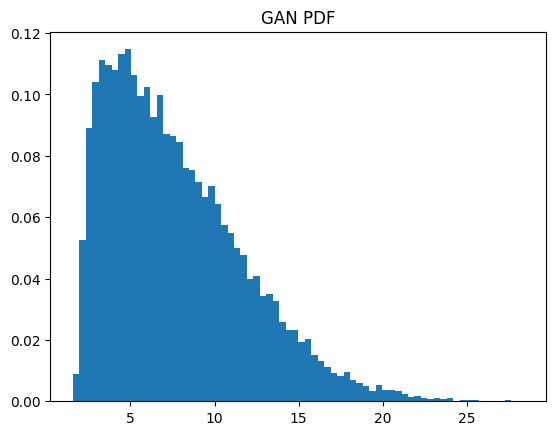

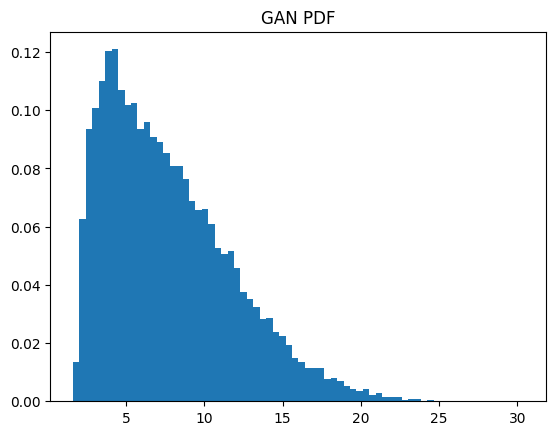

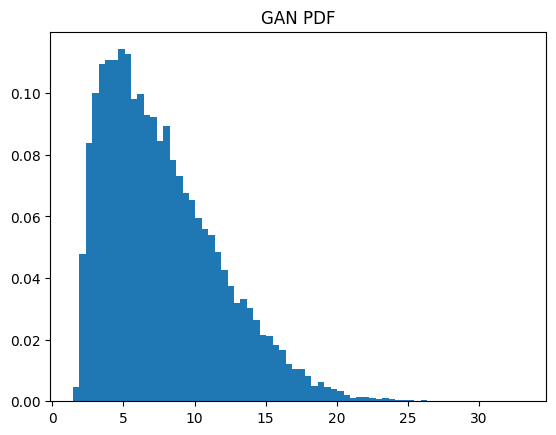

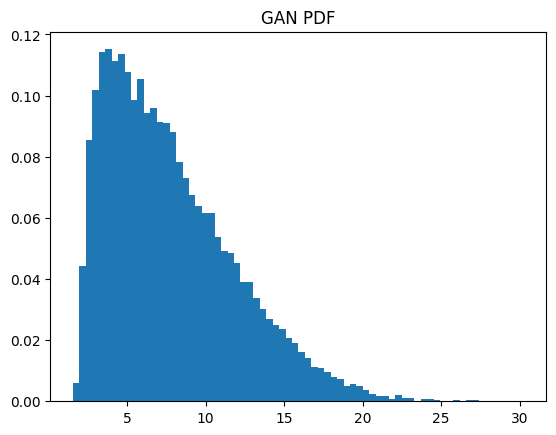

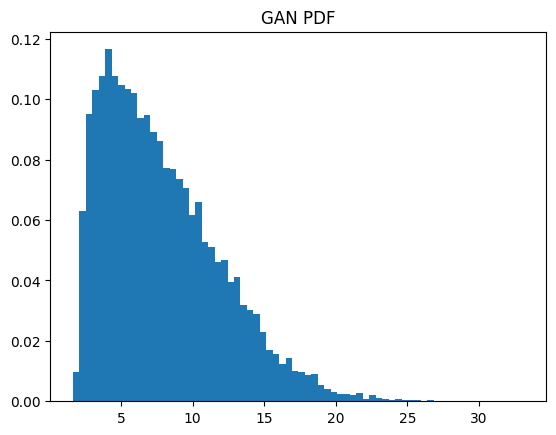

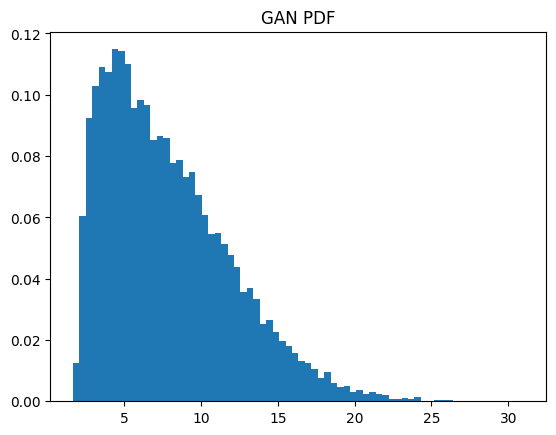

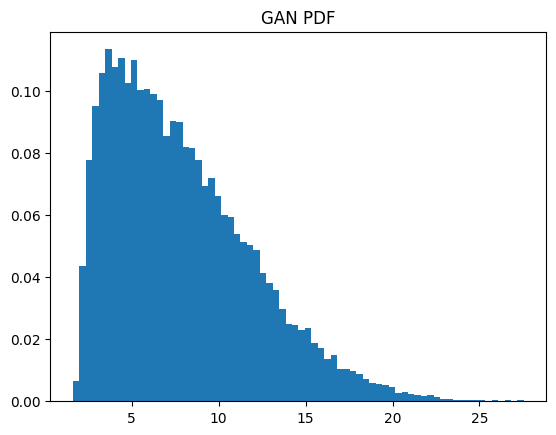

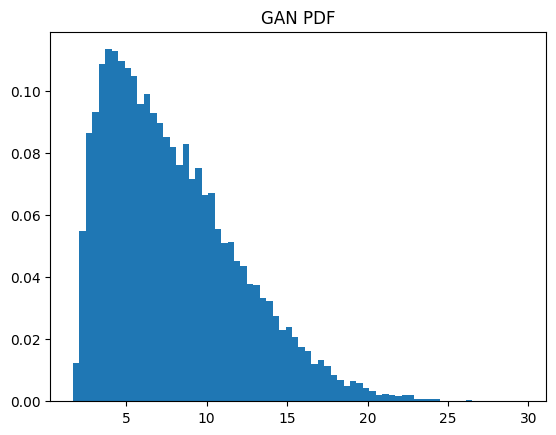

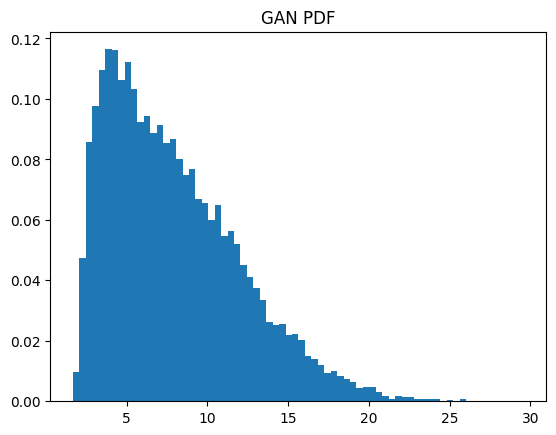

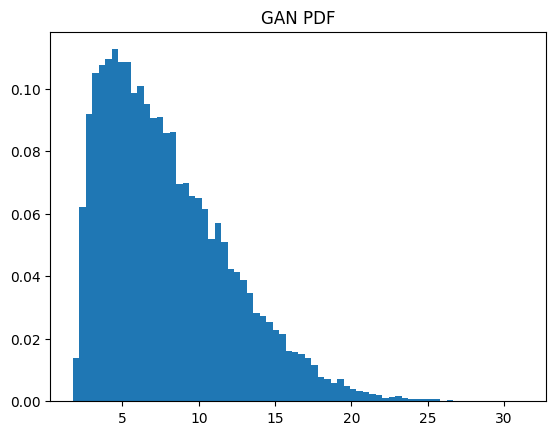

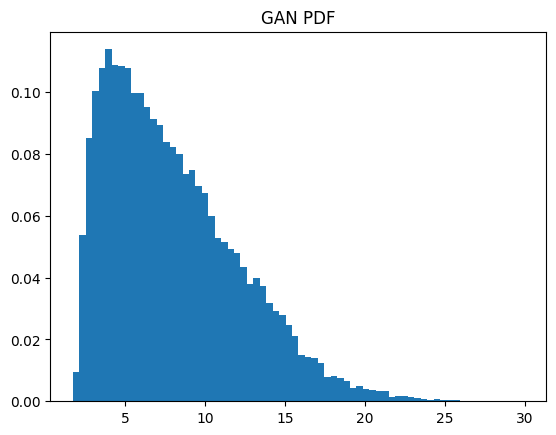

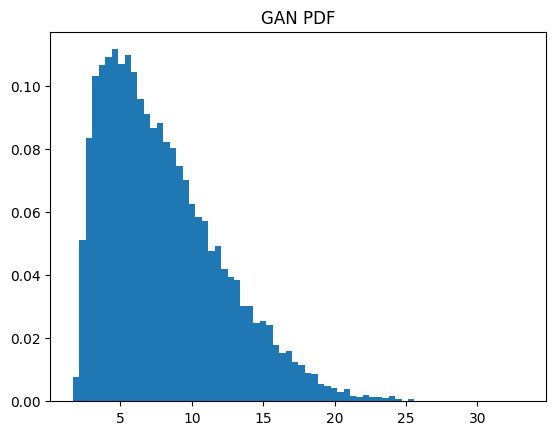

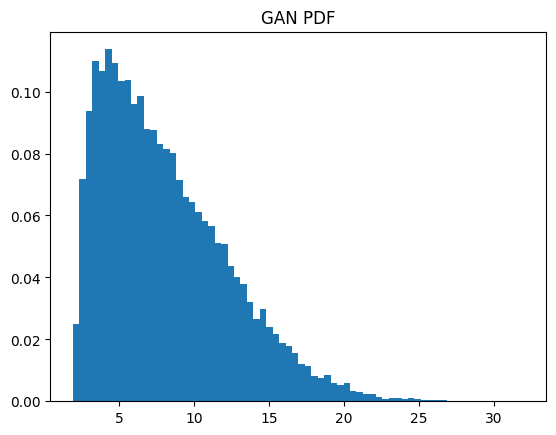

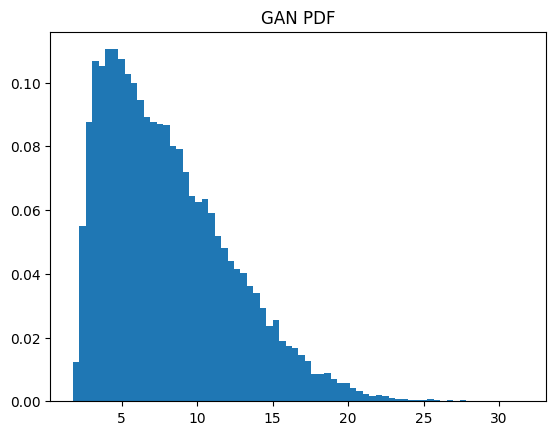

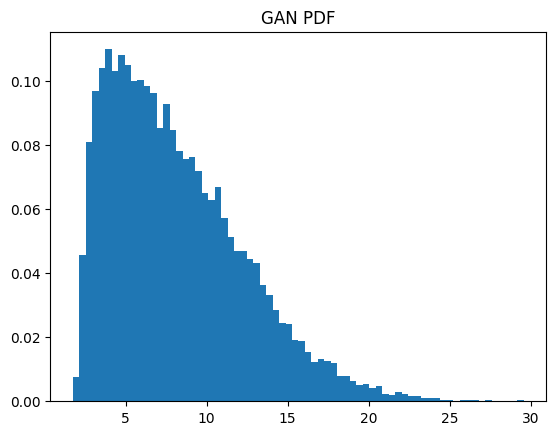

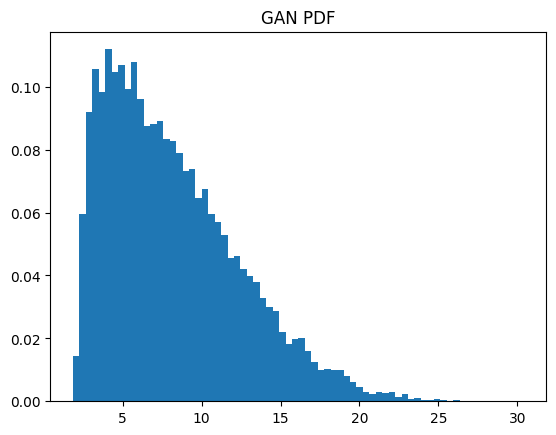

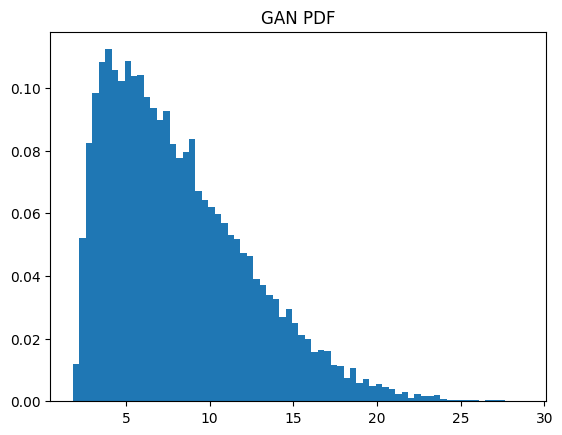

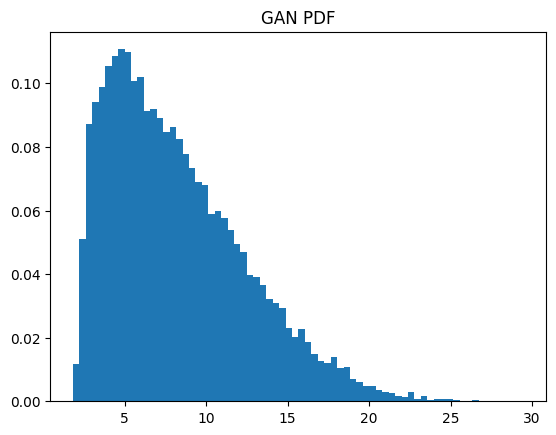

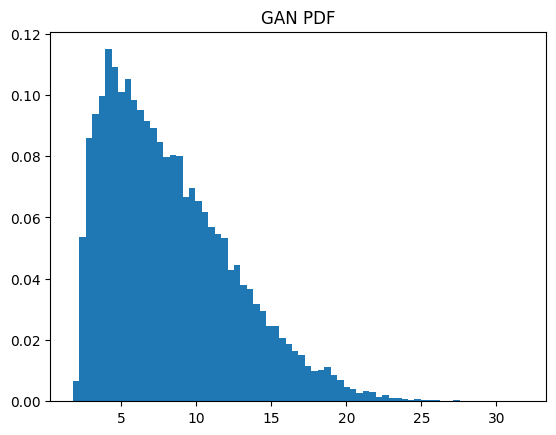

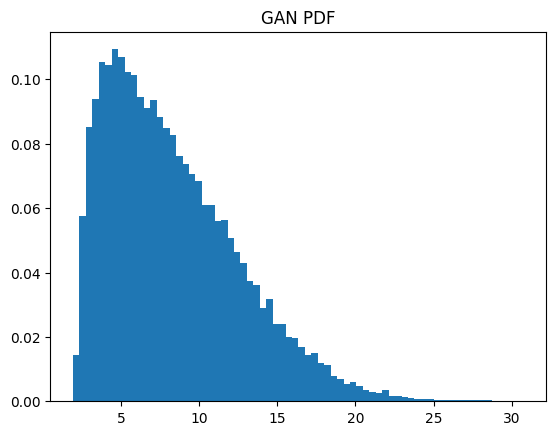

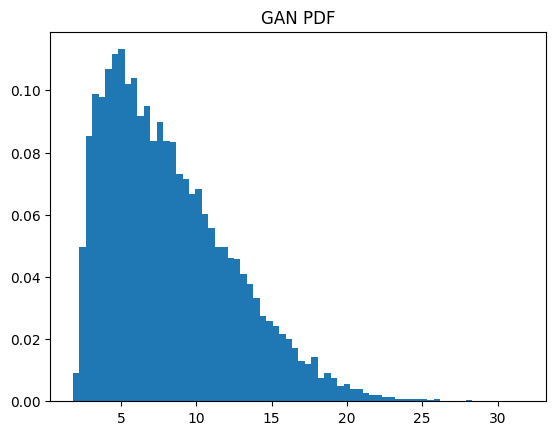

In [ ]:
for i in range(700):
  ids = np.random.randint(0,len(z),64)
  real = z[ids]

  noise = torch.randn(64,5)
  fake = G(noise).detach()

  r1 = torch.ones(64,1)
  f1 = torch.zeros(64,1)

  d_loss = loss(D(real),r1) + loss(D(fake),f1)

  do.zero_grad()
  d_loss.backward()
  do.step()

  noise = torch.randn(64,5)
  fake = G(noise)

  g_loss = loss(D(fake),r1)

  go.zero_grad()
  g_loss.backward()
  go.step()

  out = G(torch.randn(20000,5)).detach().numpy().flatten()

  plt.hist(out, bins = 70 ,density = True)
  plt.title("GAN PDF")
  plt.show()